In [3]:
import numpy as np
from scipy.signal import convolve2d
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
import matplotlib.pyplot as plt

In [5]:
# %pylab inline
%matplotlib inline

In [4]:
def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_step_2(X):
    """Game of life step using scipy tools"""

    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))
    
life_step = life_step_2

In [6]:
def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    # Zoom 10 times here for better visualization
    figsize = (X.shape[1] * 1. / dpi * 10, X.shape[0] * 1. / dpi * 10)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)

### Random Case


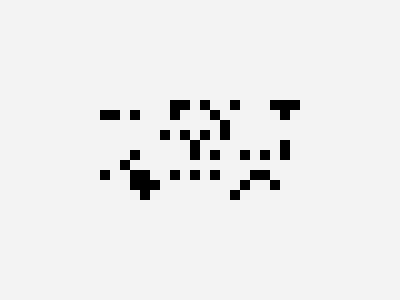
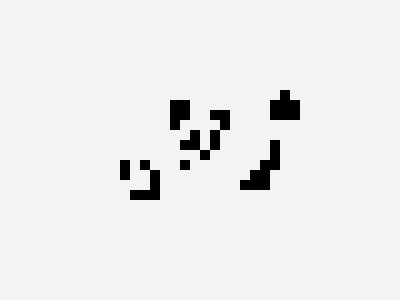
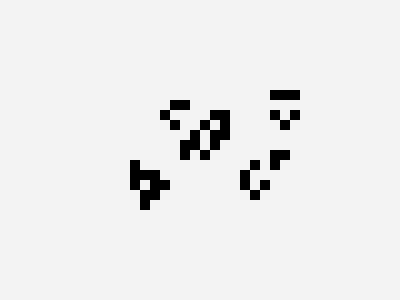
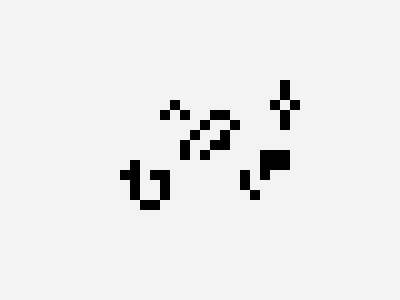
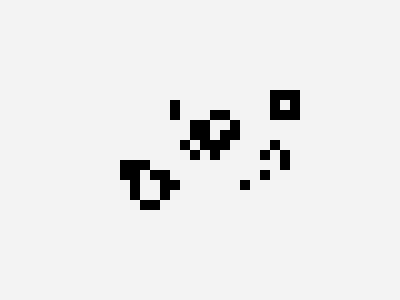
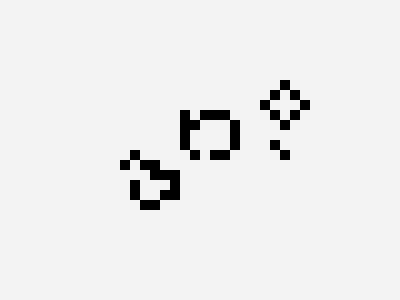
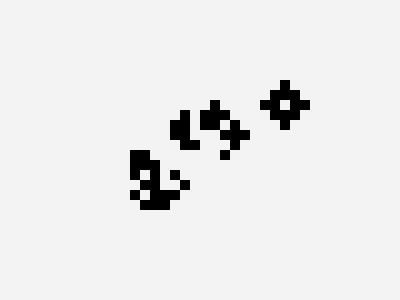
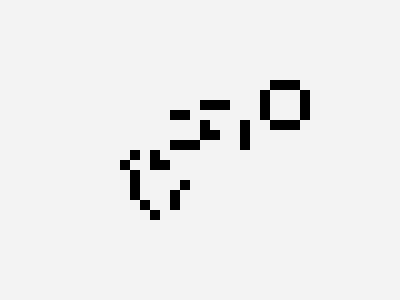
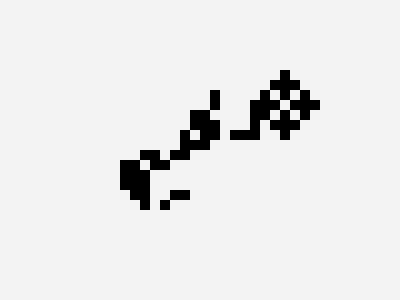
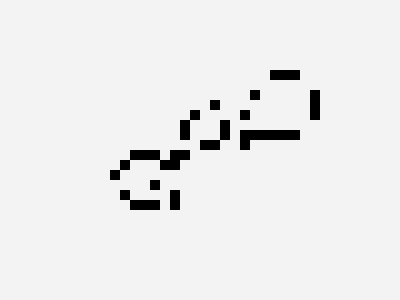
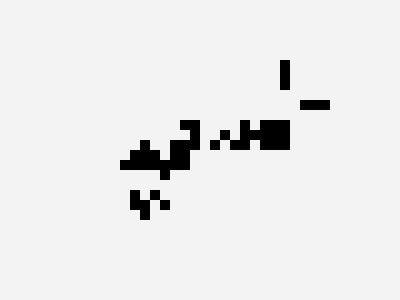
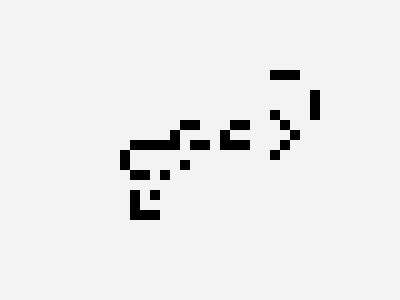
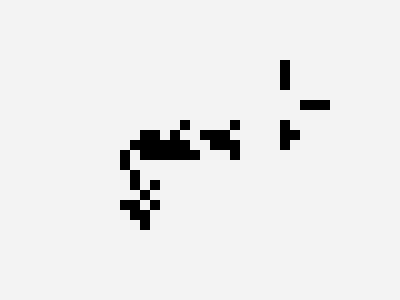
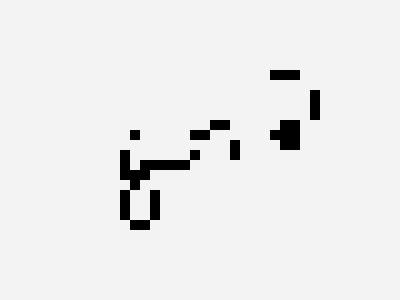
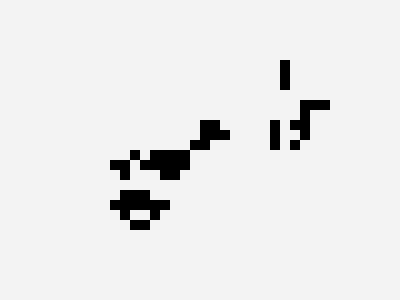
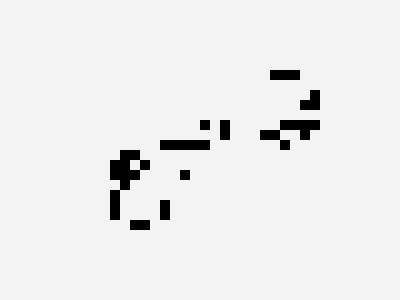
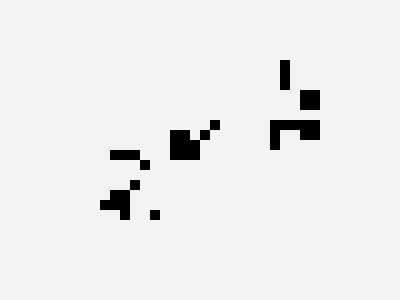
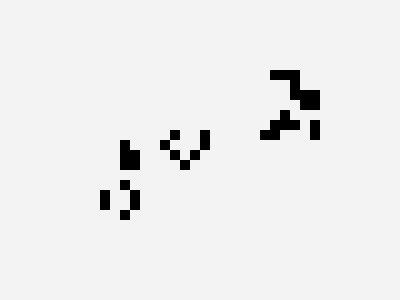
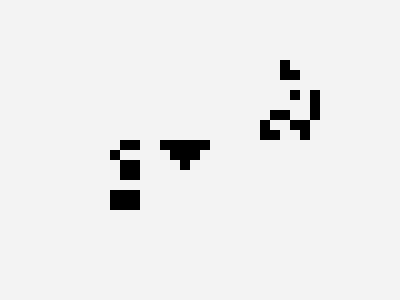
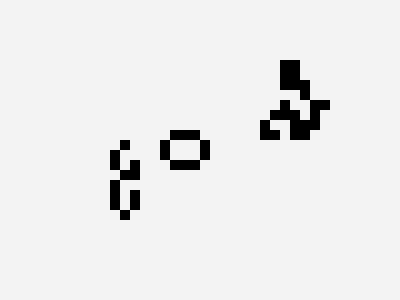
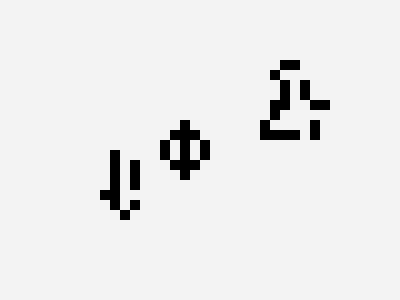
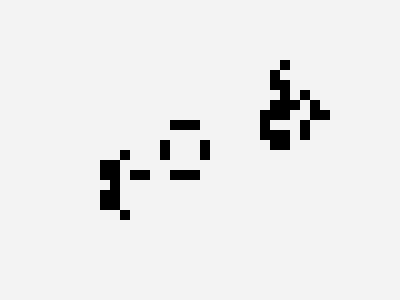
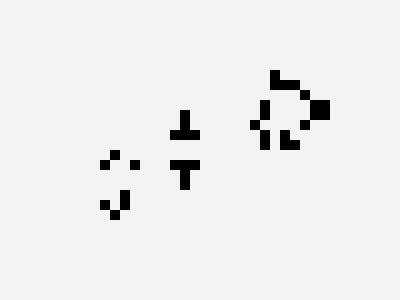
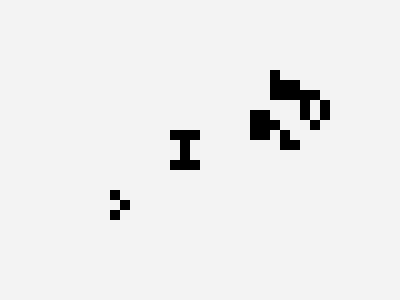
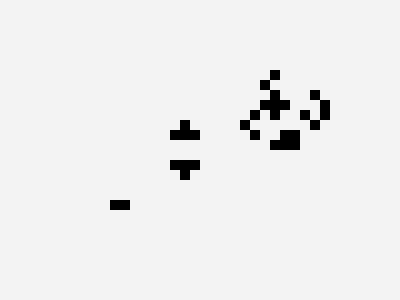
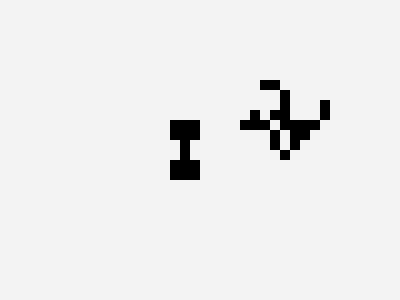
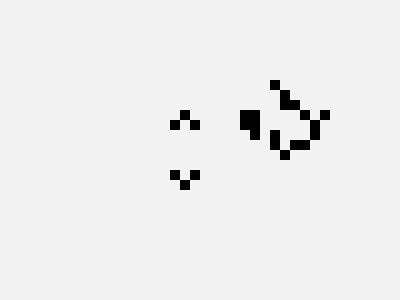
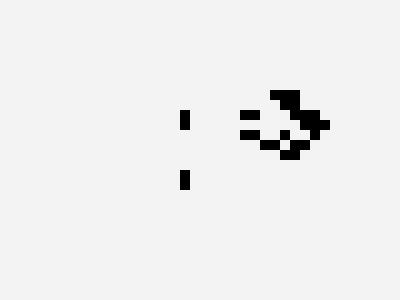
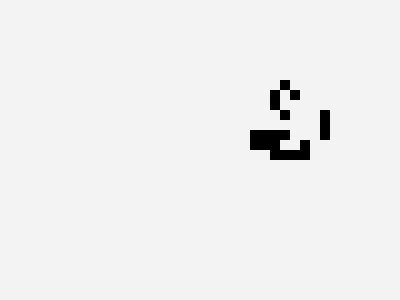
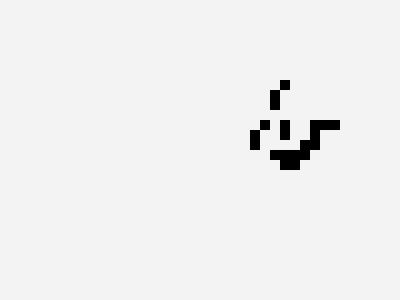
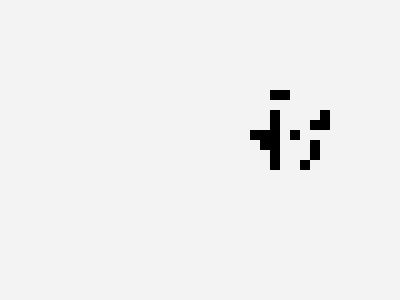
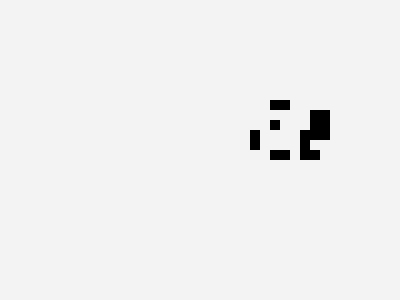
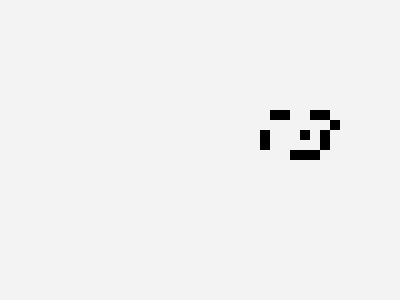
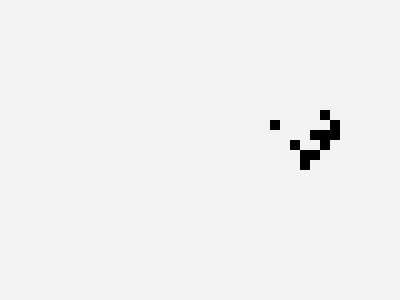
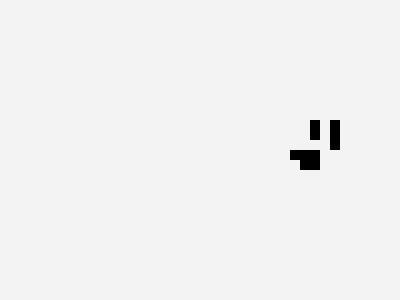
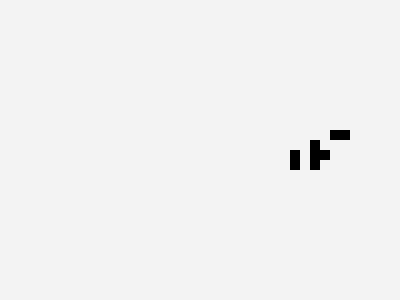
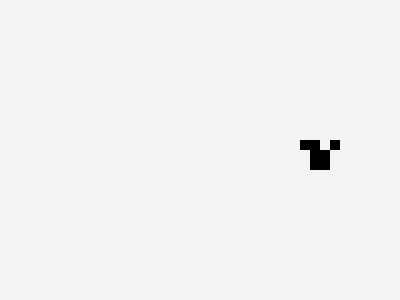
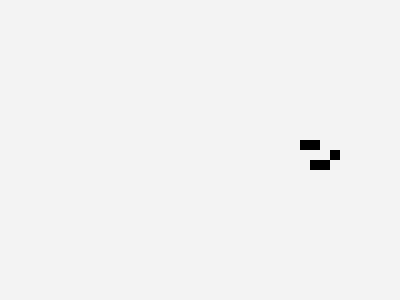
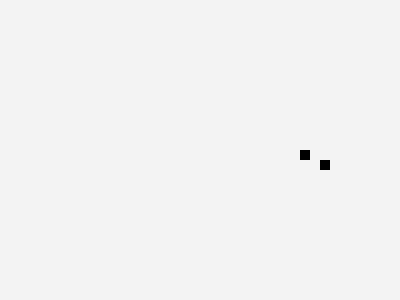
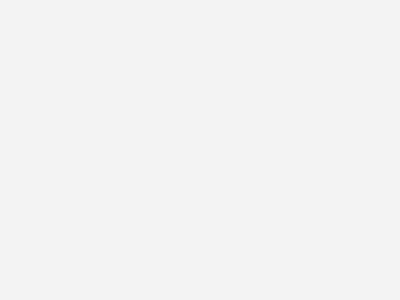

In [7]:
np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
life_animation(X, dpi=1, frames=40, mode='once')

### Still Life 


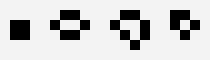
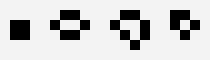
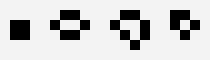
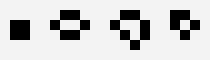
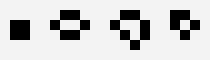
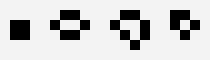
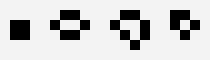
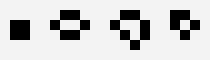
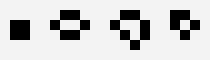
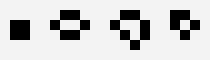
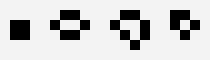
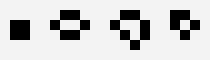
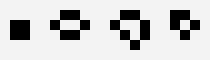
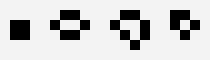
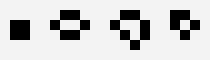
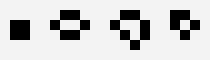
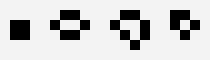
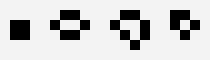
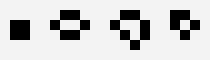
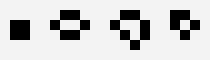
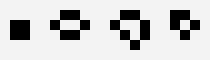
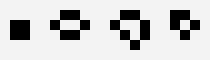
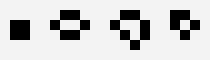
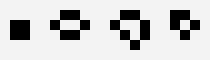
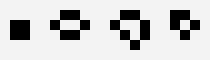
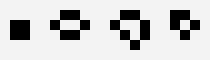
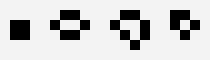
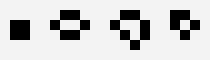
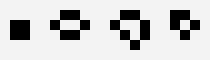
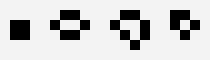

In [9]:
X = np.zeros((6, 21))
X[2:4, 1:3] = 1
X[1:4, 5:9] = [[0, 1, 1, 0],
               [1, 0, 0, 1],
               [0, 1, 1, 0]]
X[1:5, 11:15] = [[0, 1, 1, 0],
                 [1, 0, 0, 1],
                 [0, 1, 0, 1],
                 [0, 0, 1, 0]]
X[1:4, 17:20] = [[1, 1, 0],
                 [1, 0, 1],
                 [0, 1, 0]]

life_animation(X, dpi=5, frames=30)

### Blinker


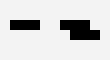
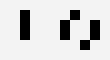
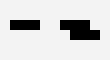
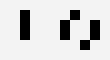
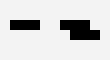
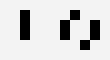
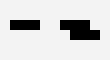
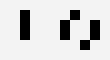
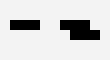
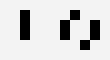
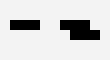
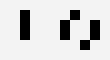
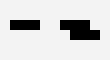
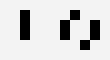
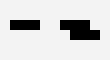
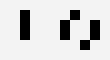
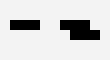
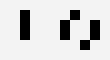
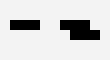
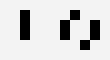
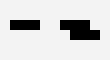
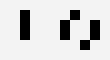
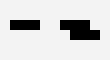
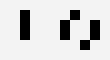
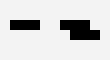
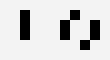
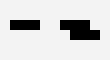
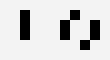
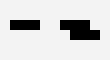
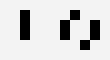
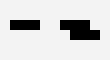
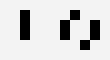
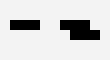
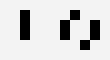
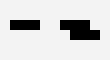
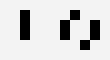
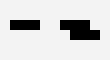
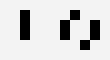
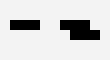
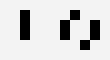

In [10]:
blinker = [1, 1, 1]
toad = [[1, 1, 1, 0],
        [0, 1, 1, 1]]

X = np.zeros((6, 11))
X[2, 1:4] = blinker
X[2:4, 6:10] = toad
life_animation(X, dpi=5, frames=40)

### Glider Gun


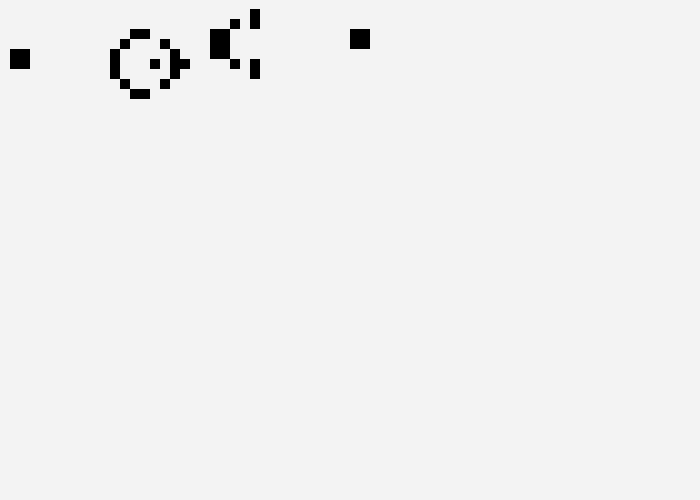
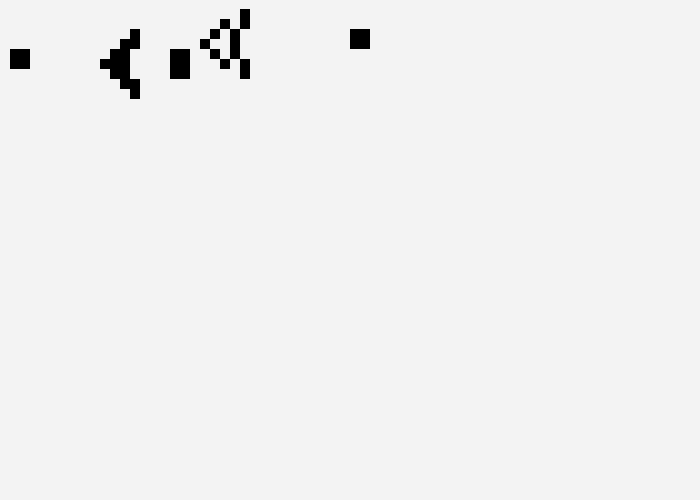
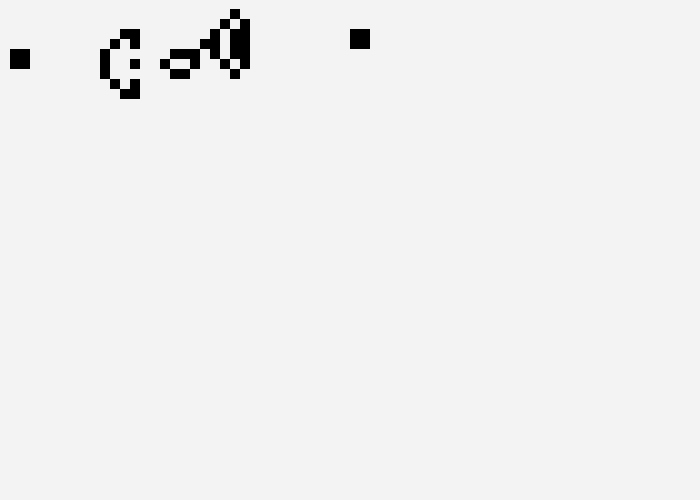
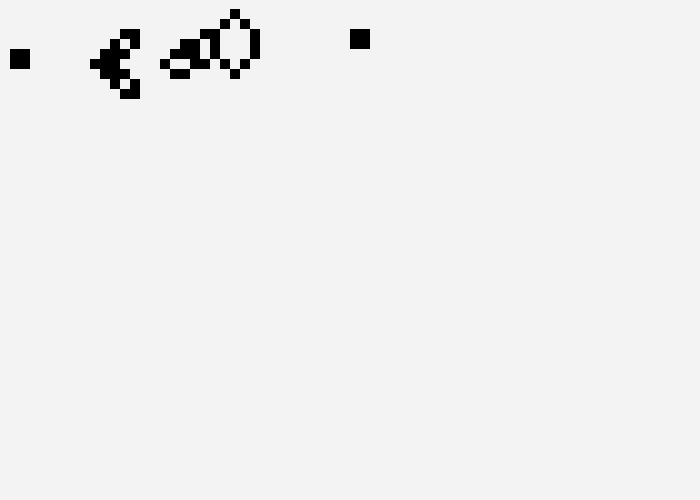
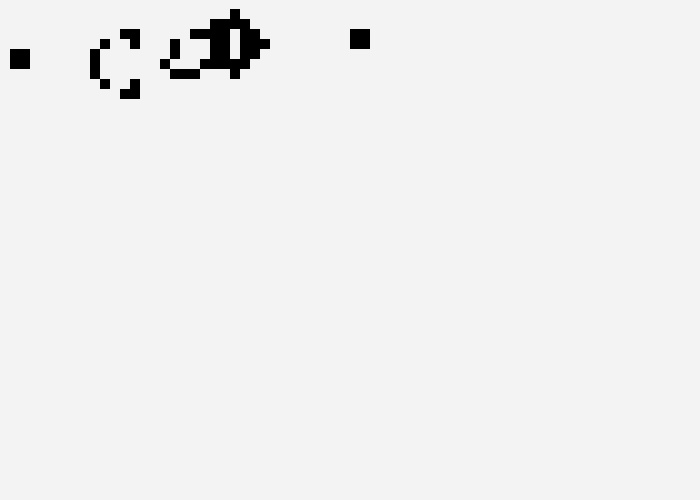
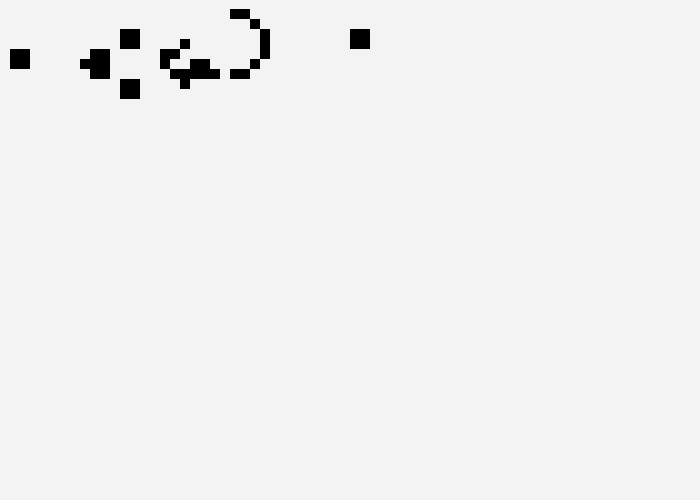
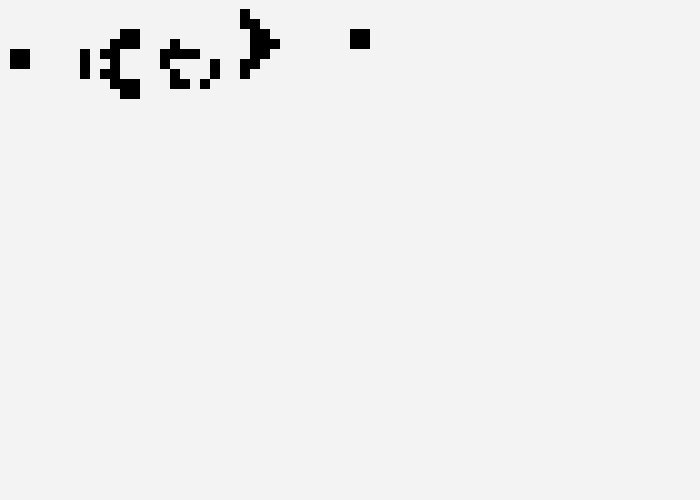
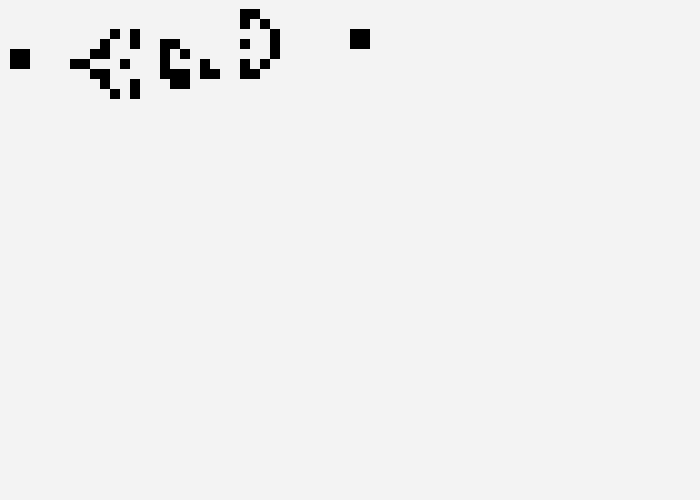
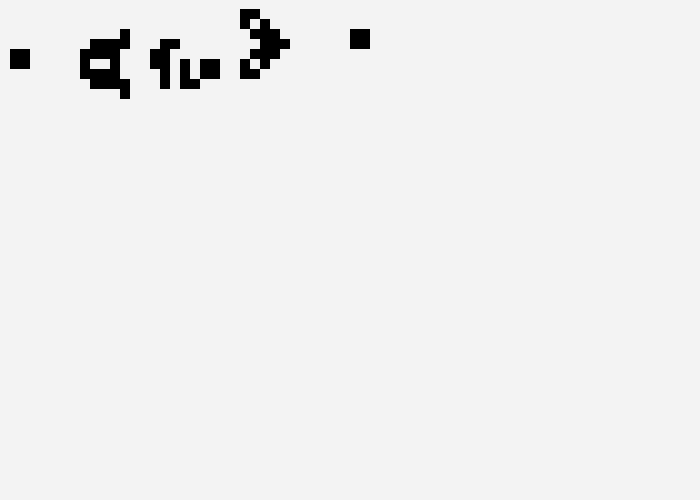
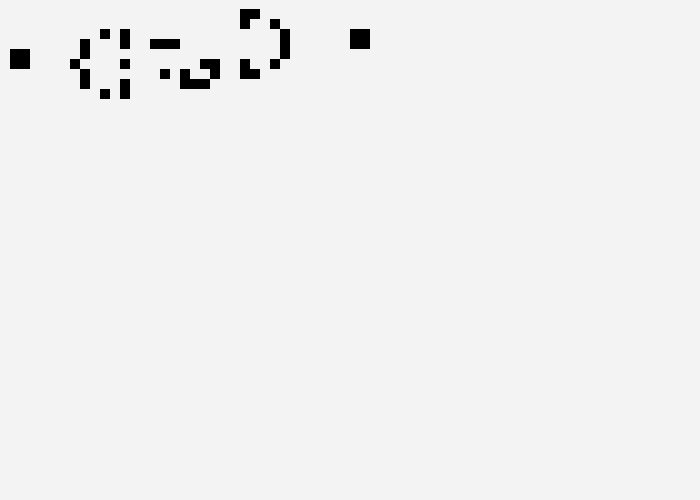
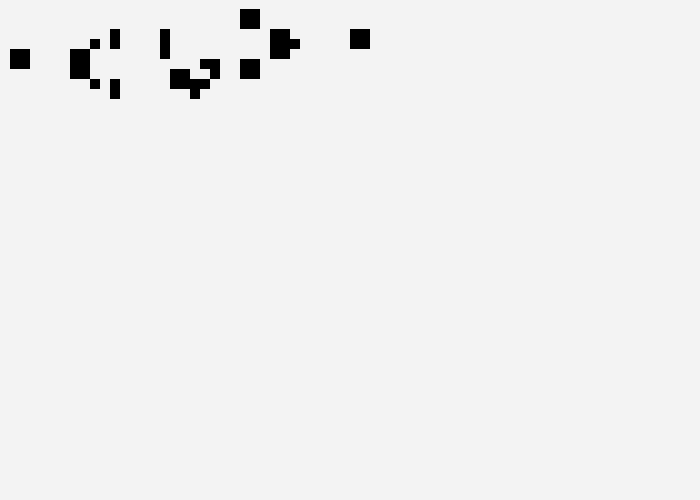
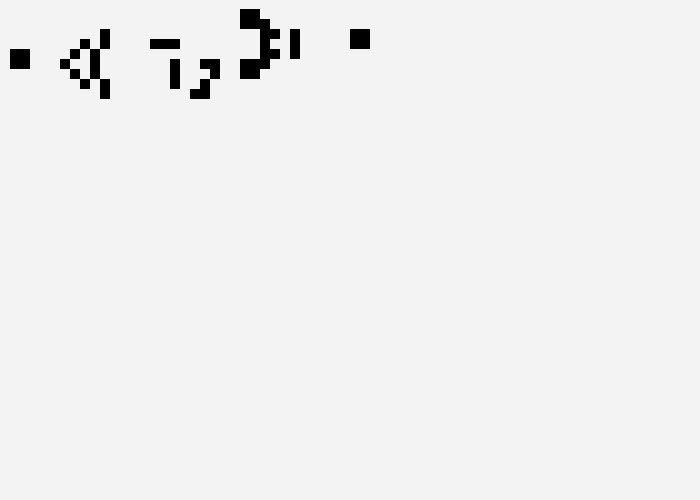
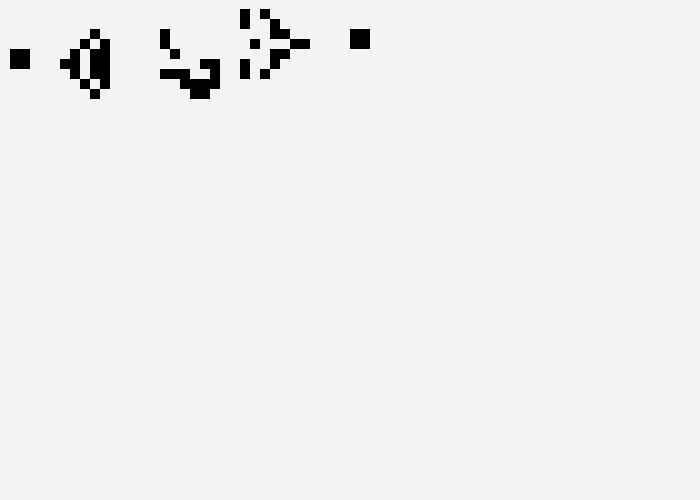
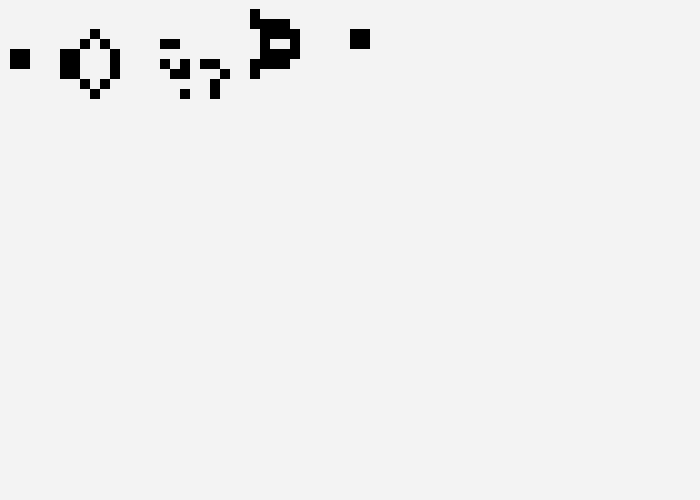
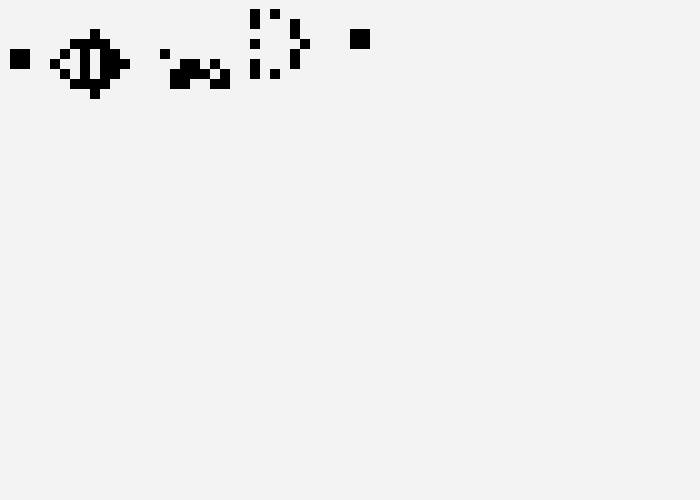
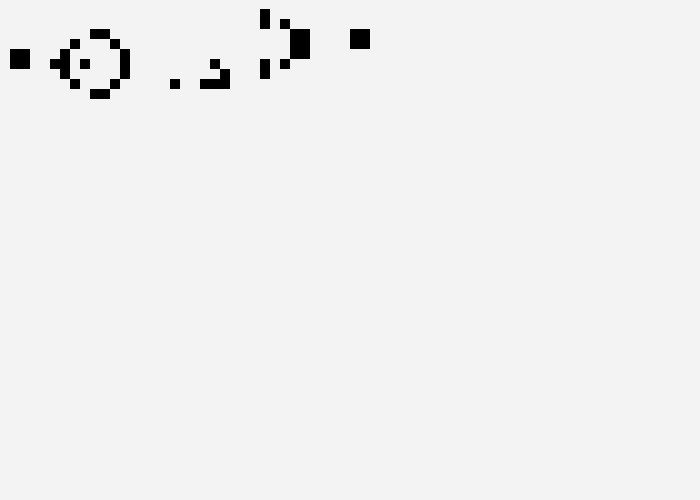
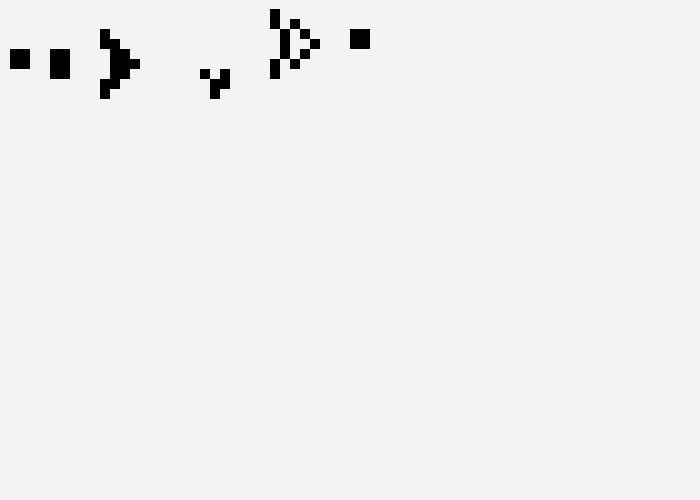
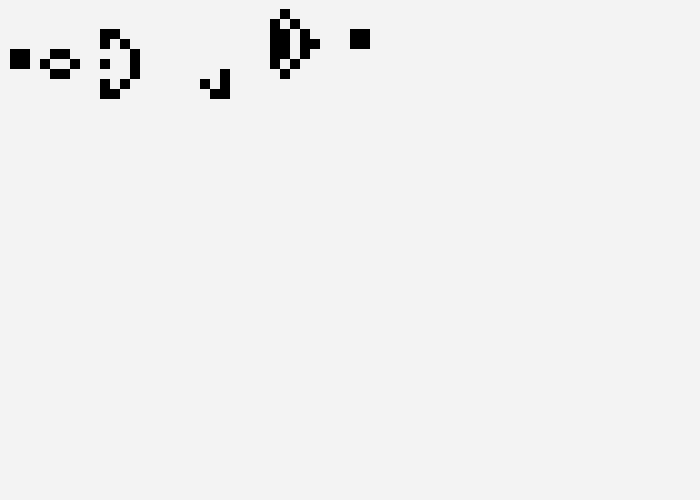
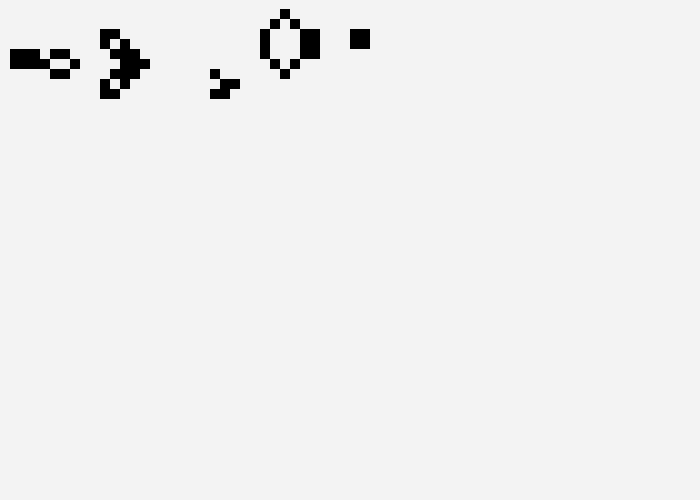
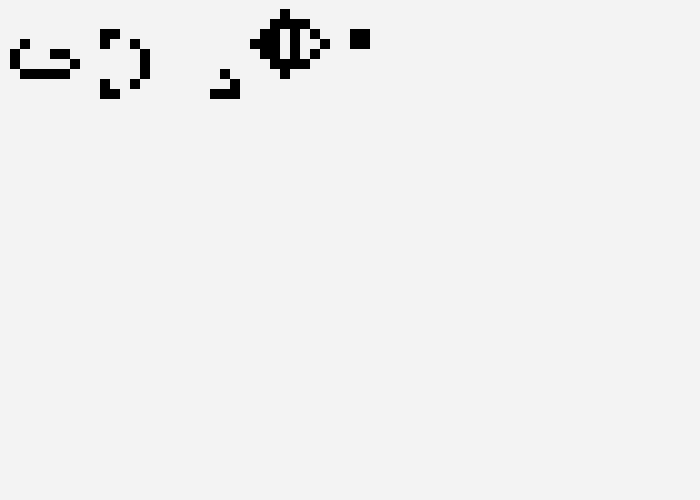
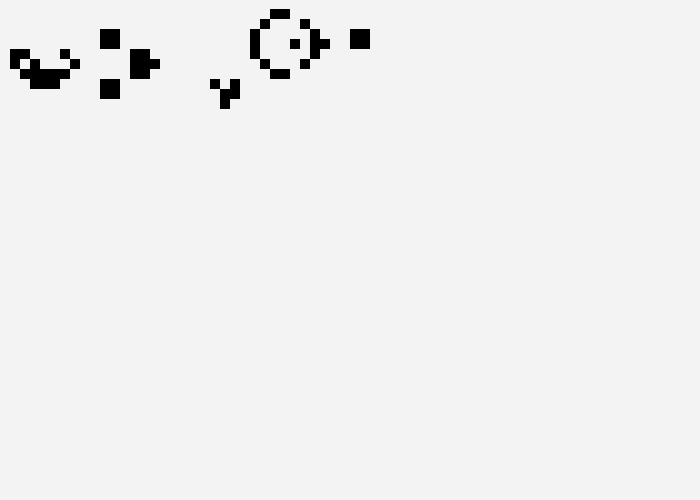
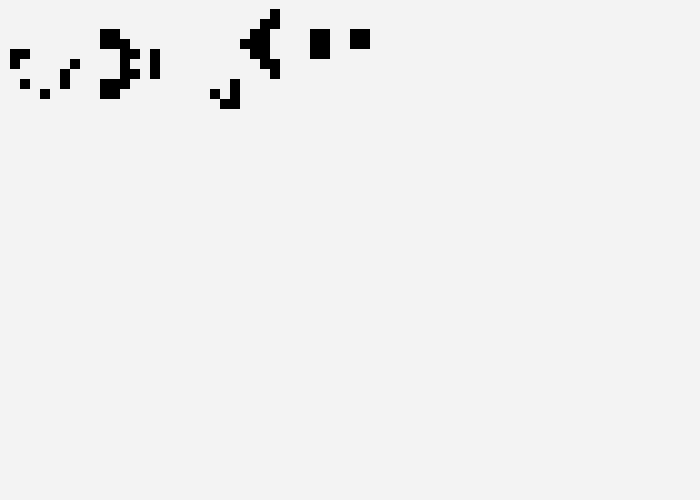
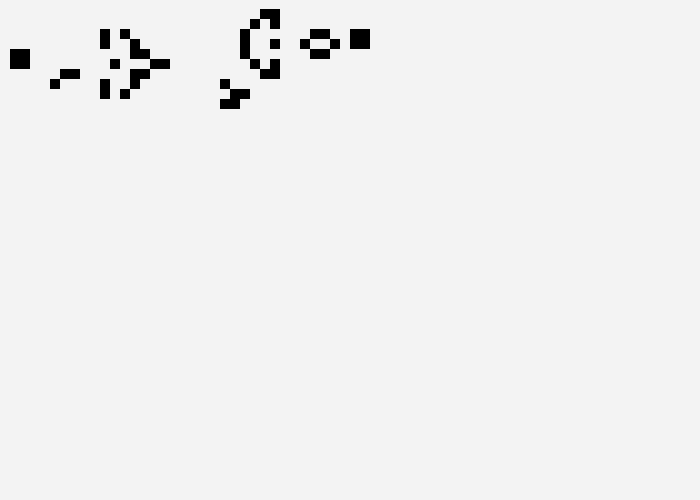
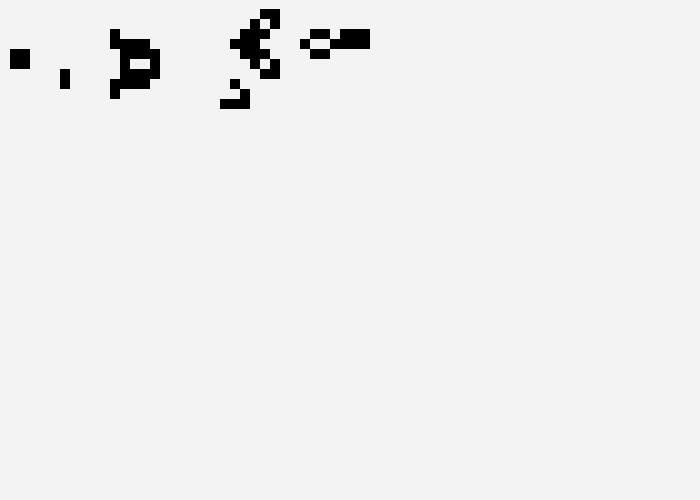
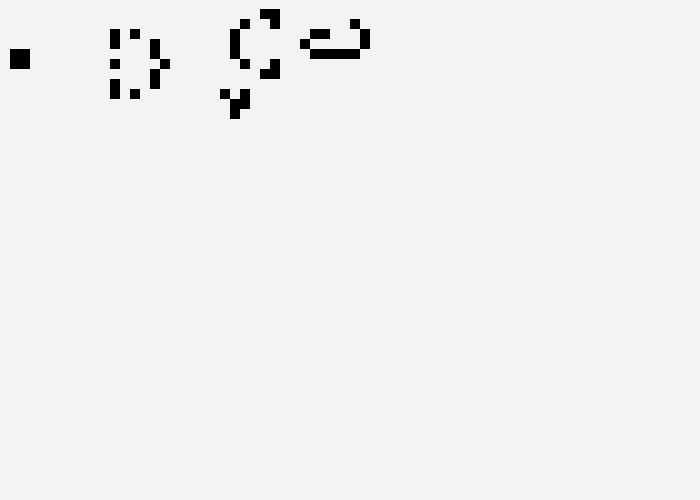
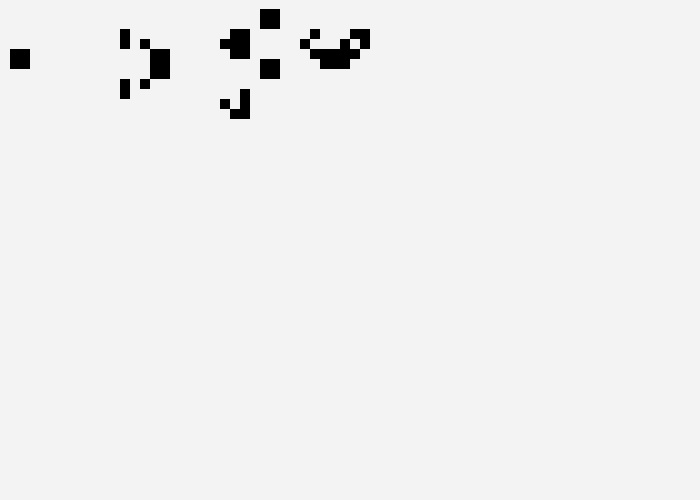
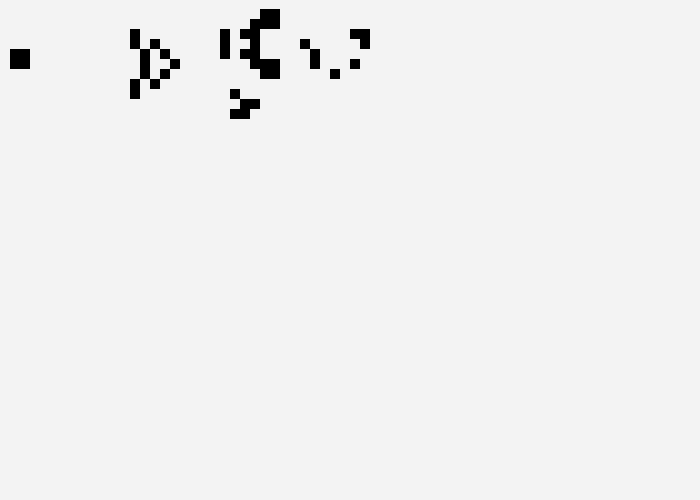
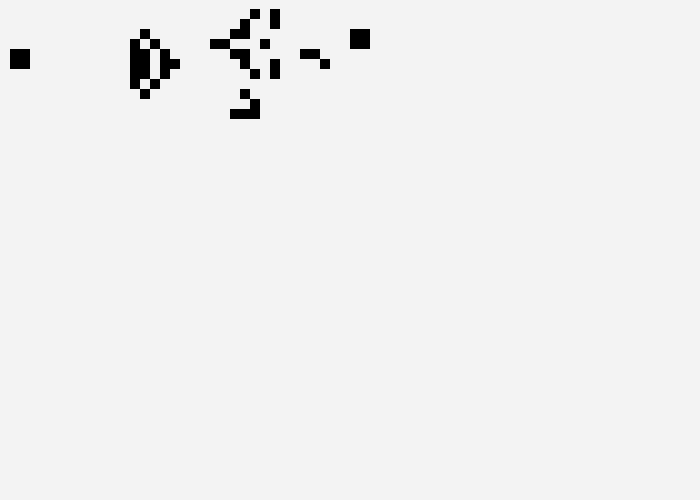
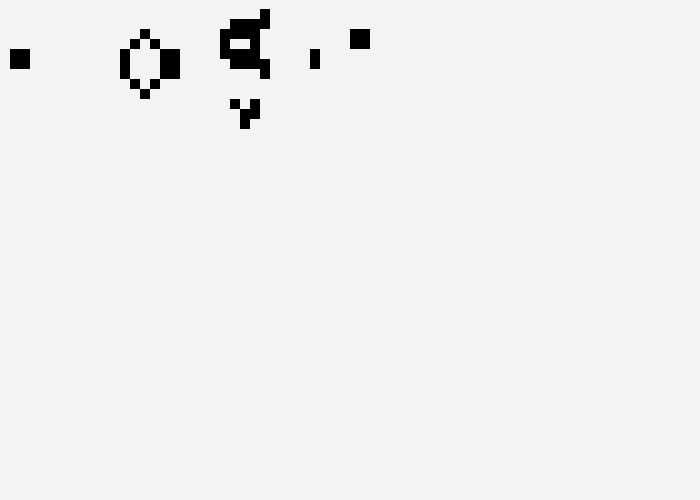
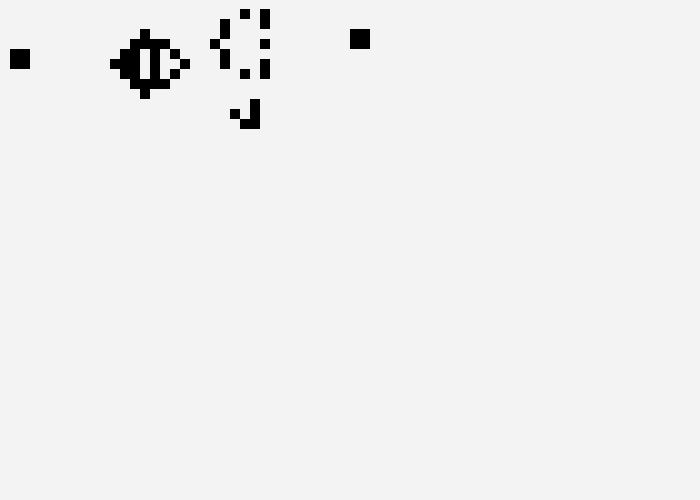
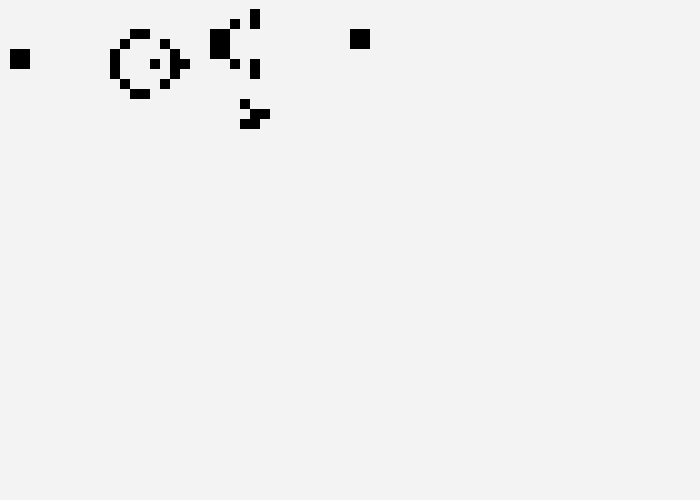
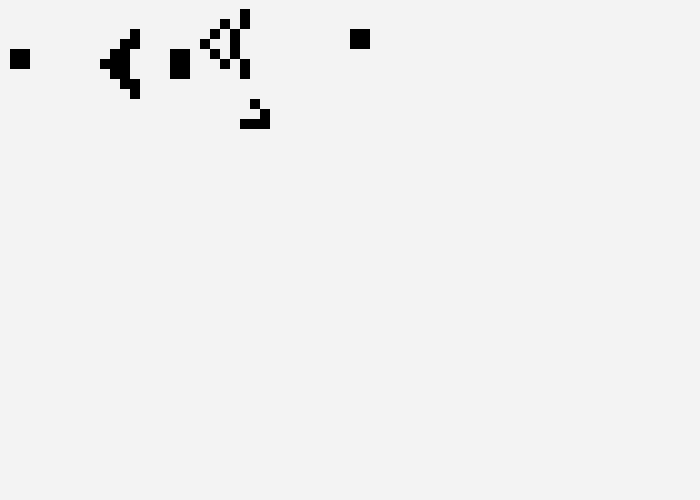
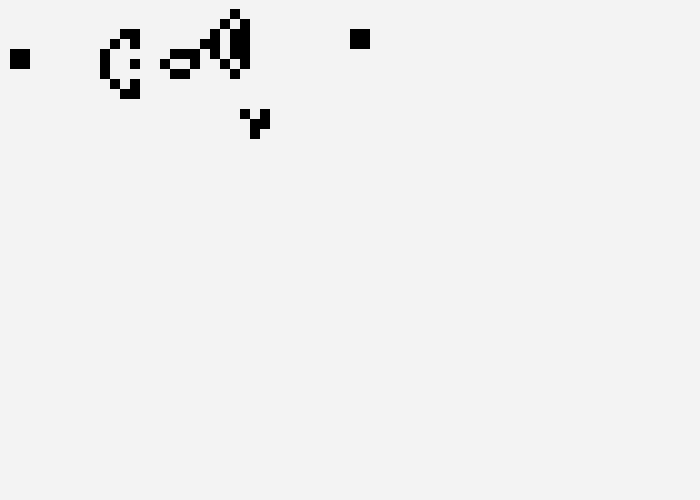
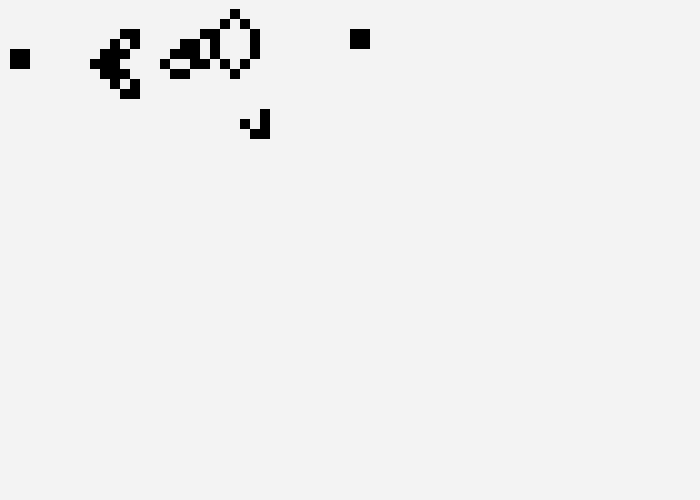
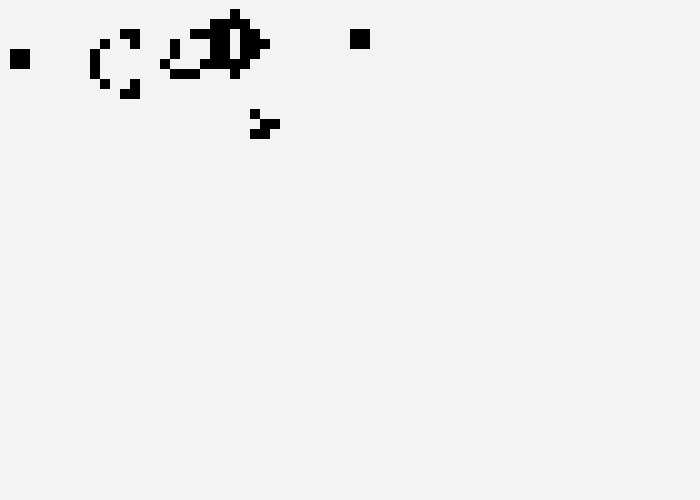
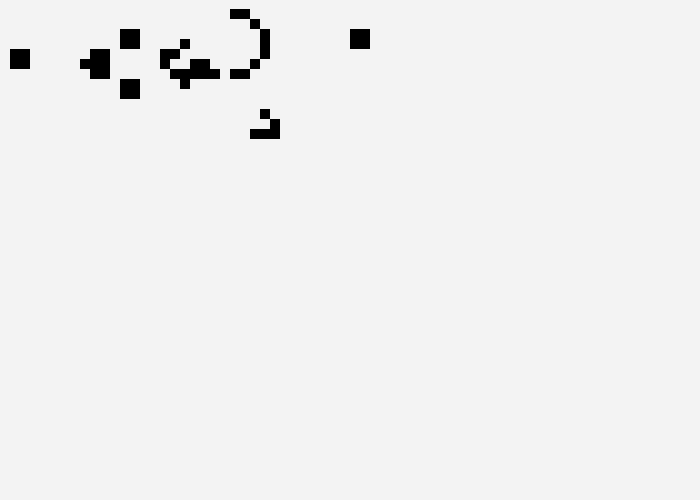
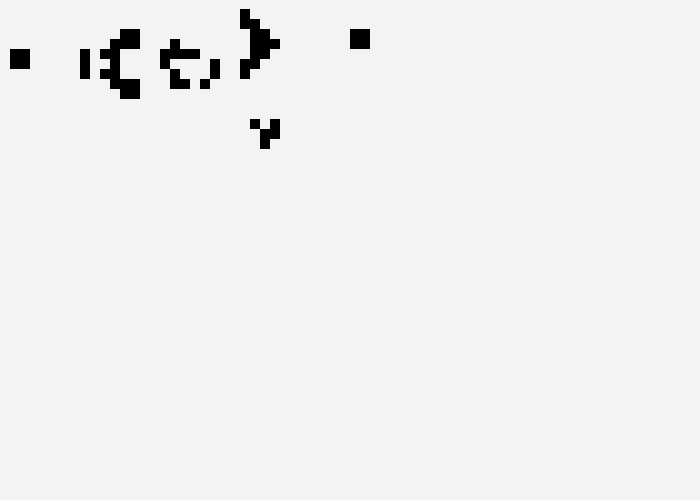
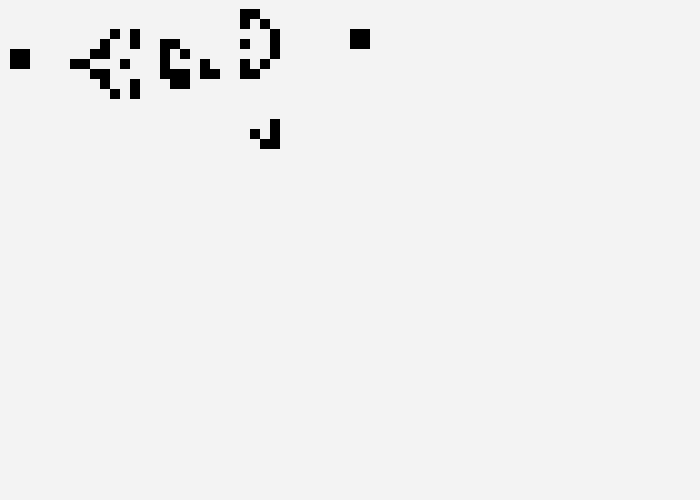
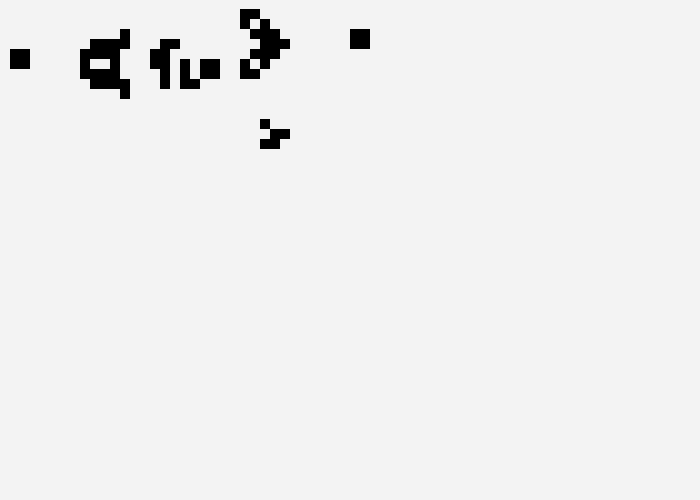
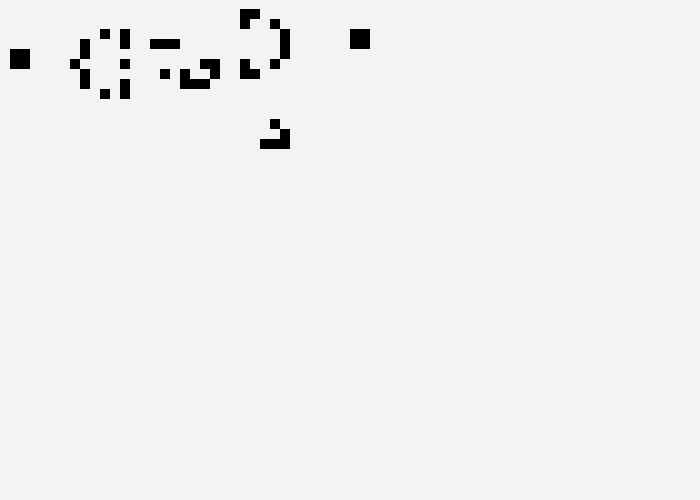
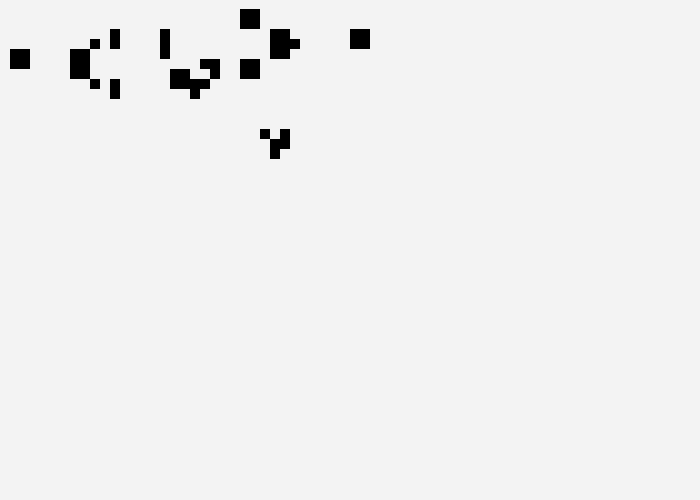
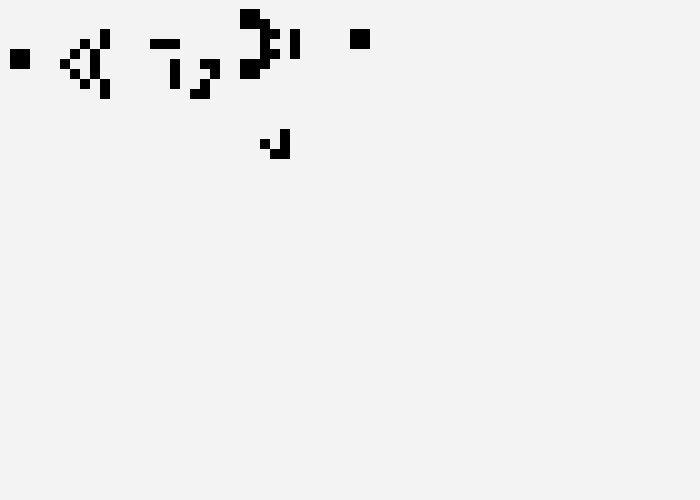
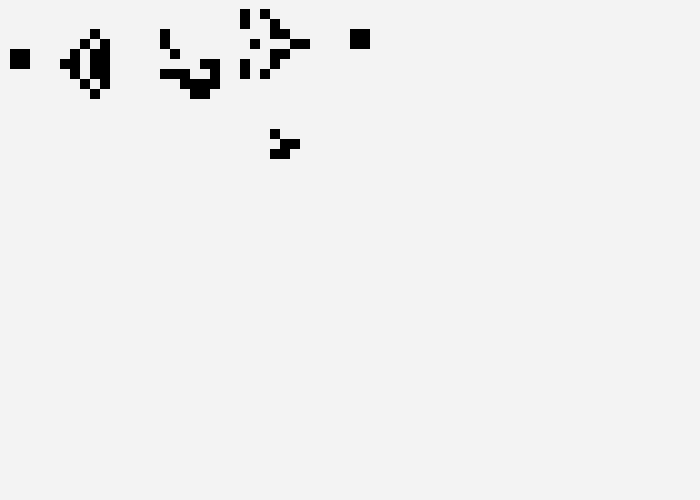
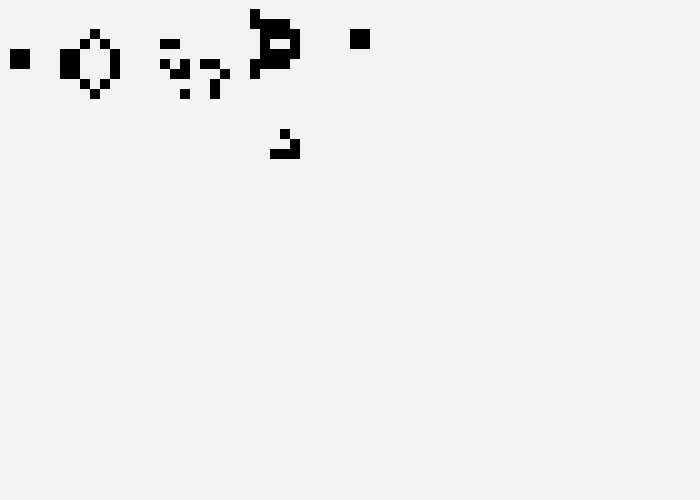
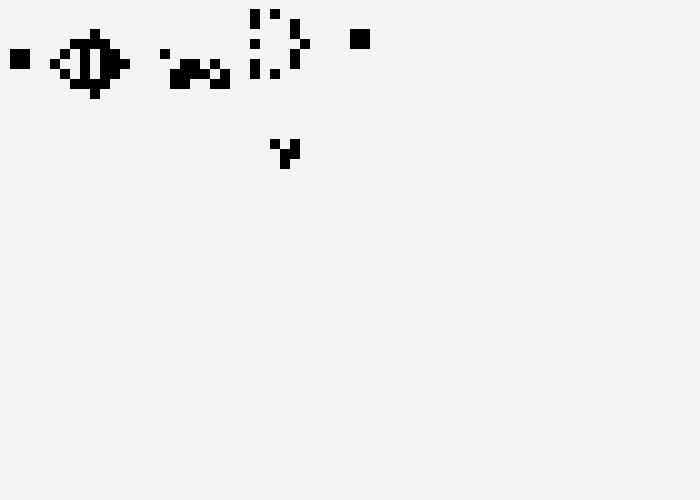
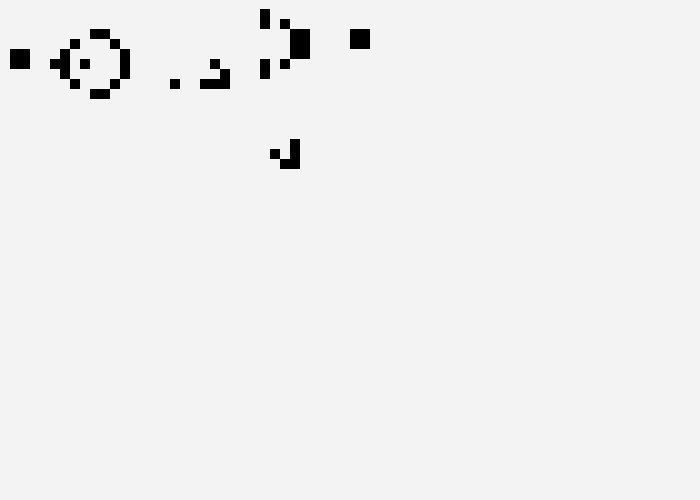
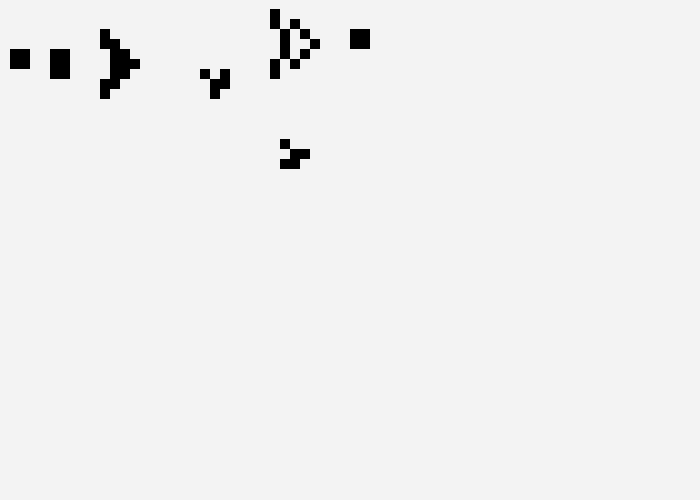
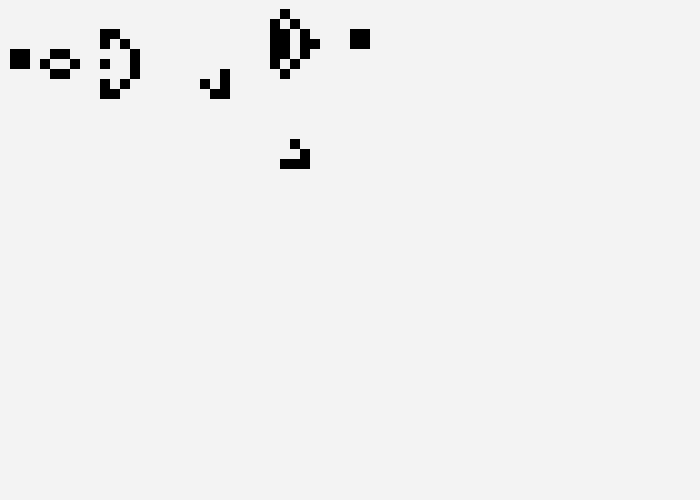
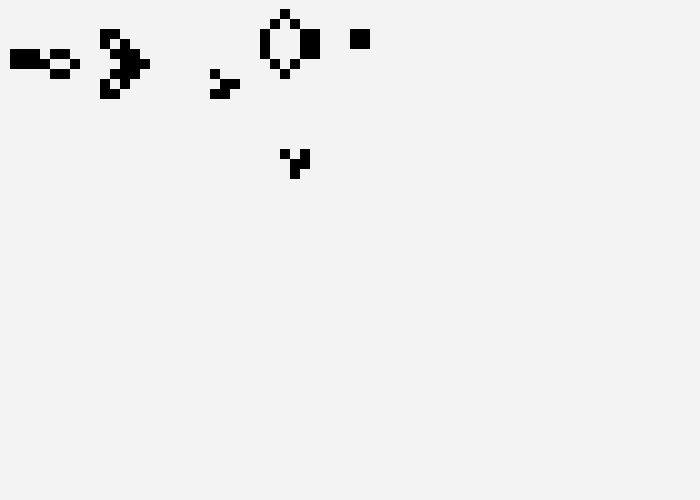
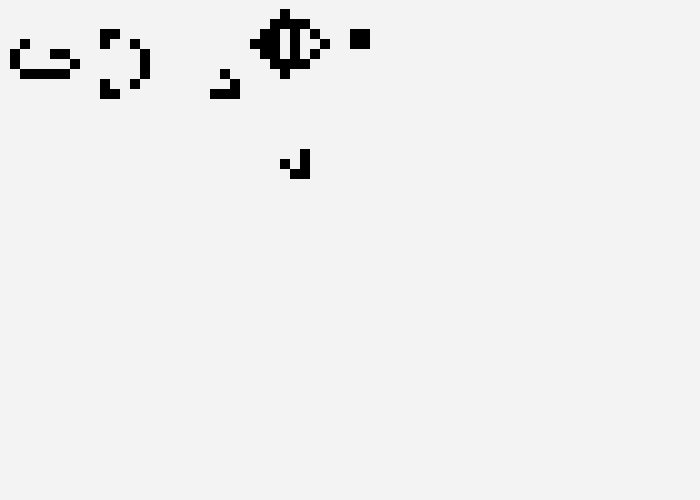
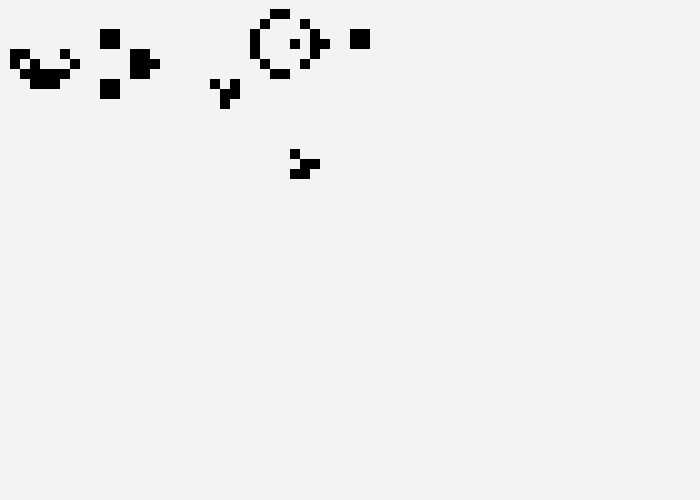
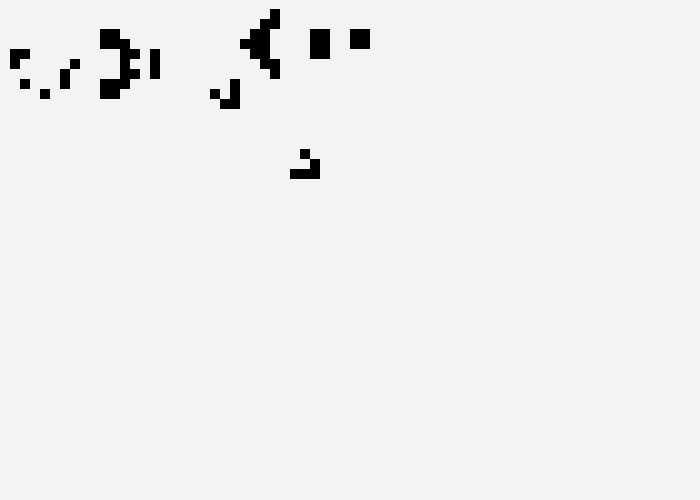
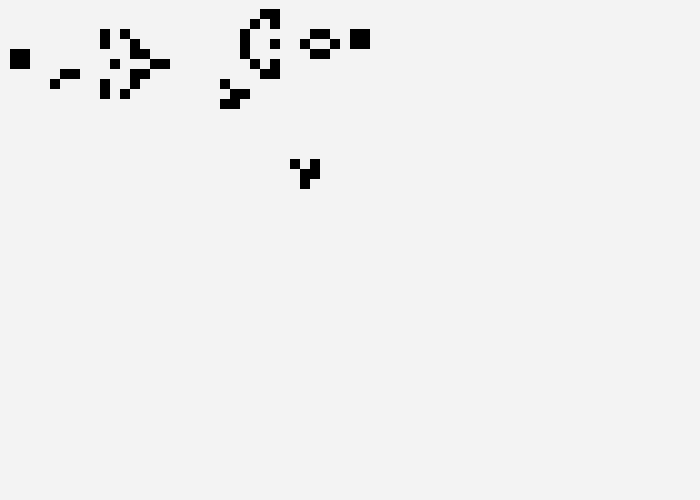
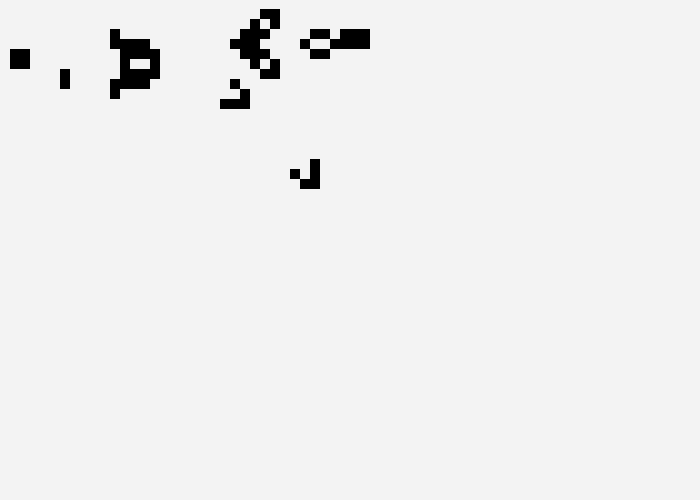
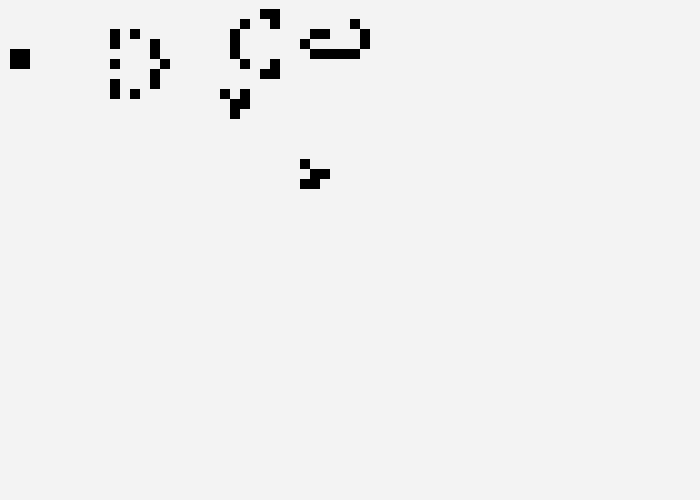
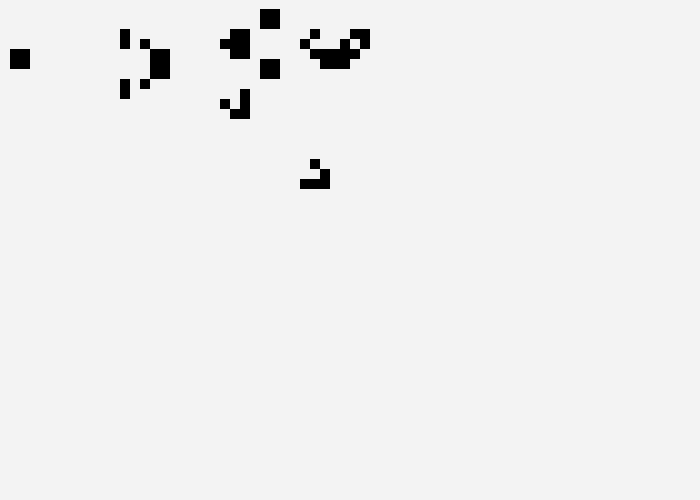
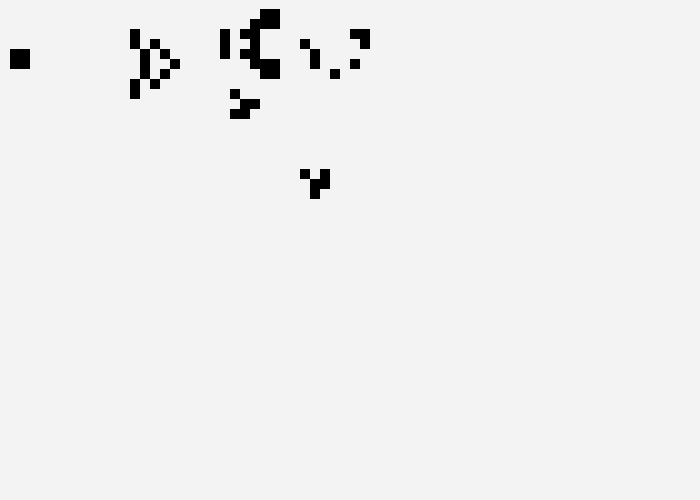
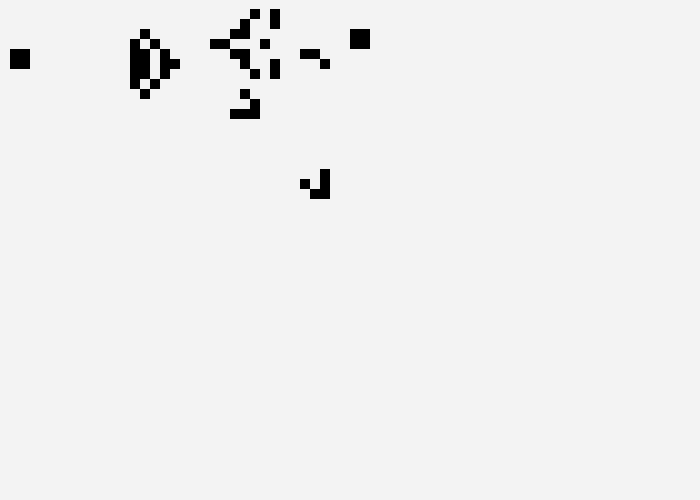
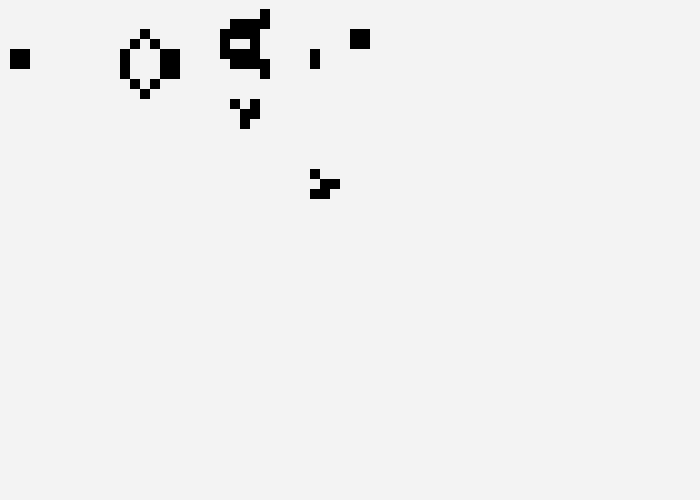
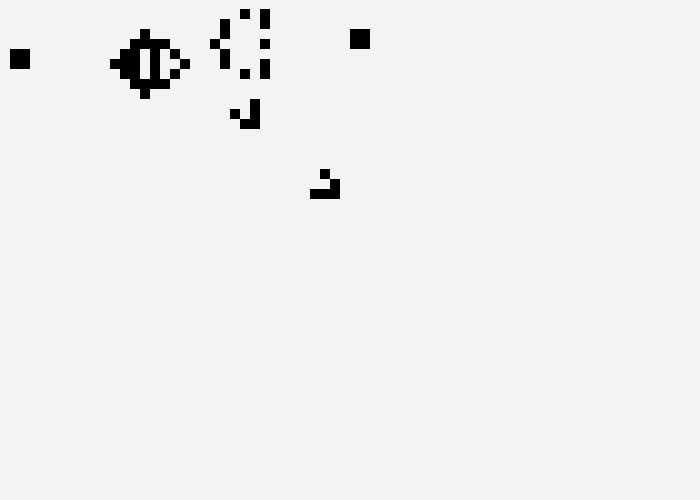
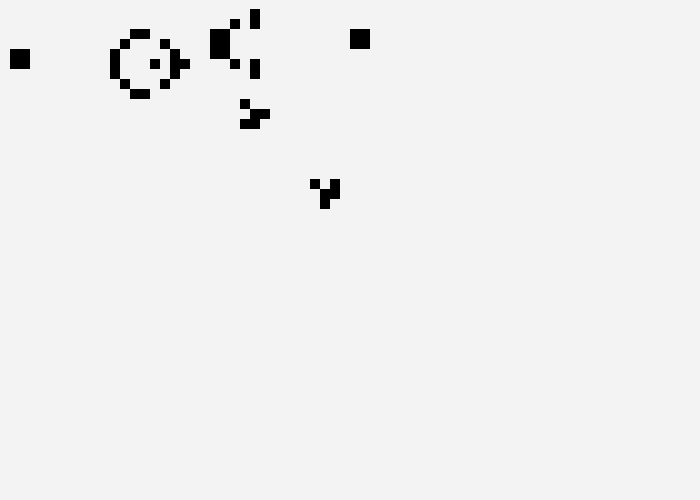
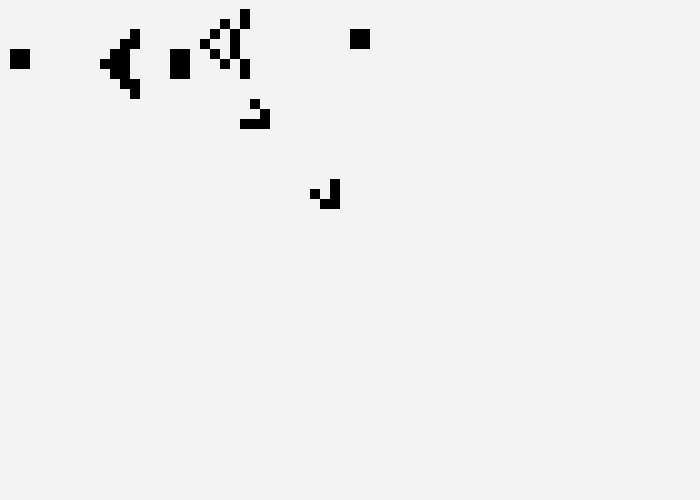
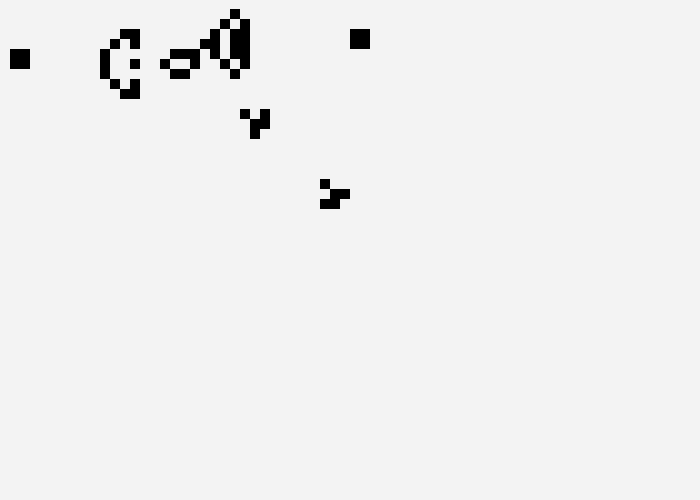
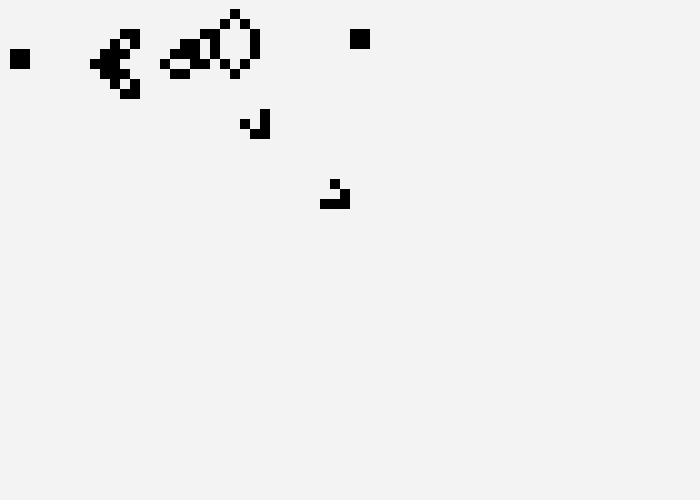
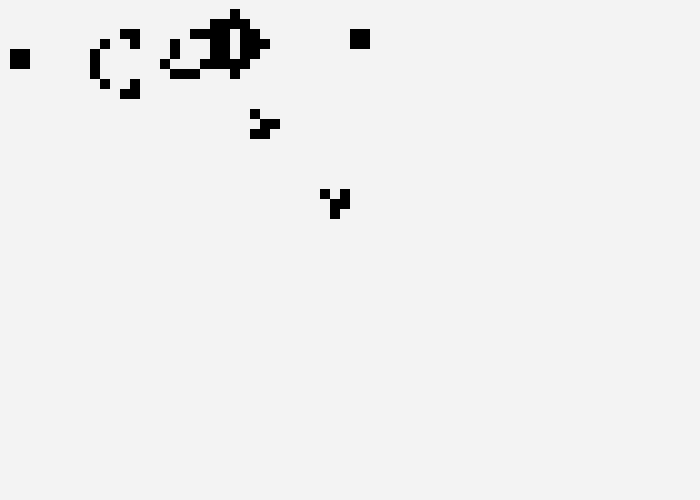
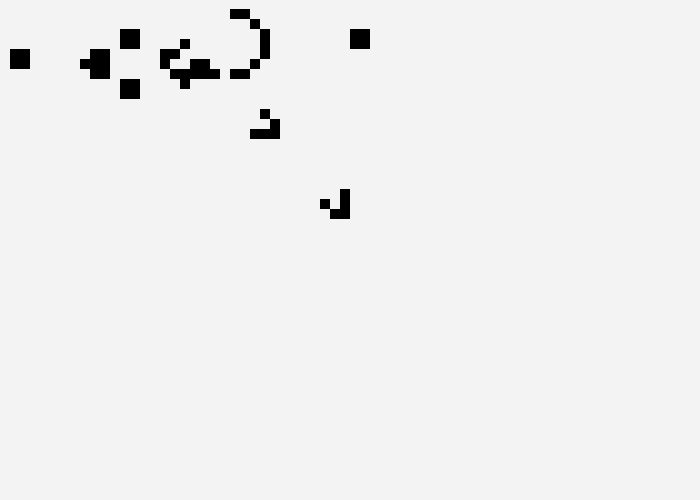
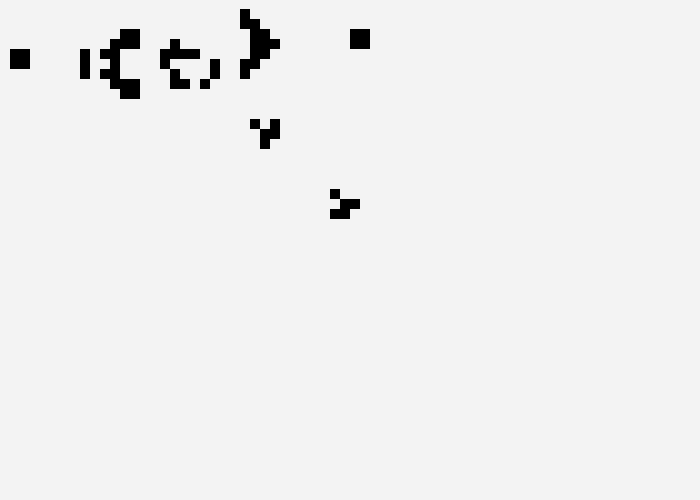
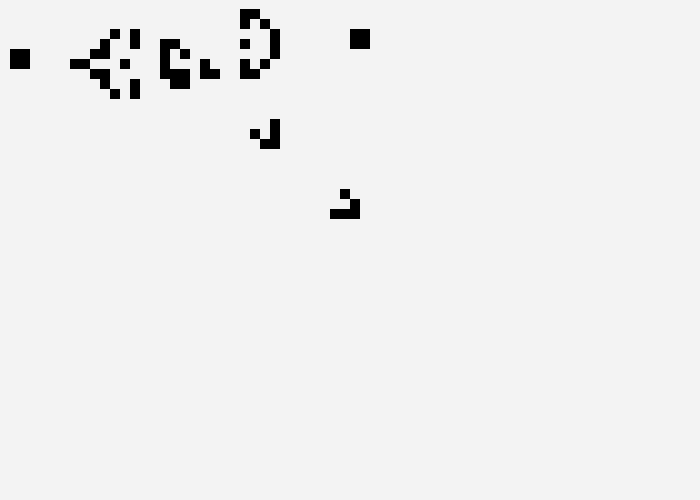
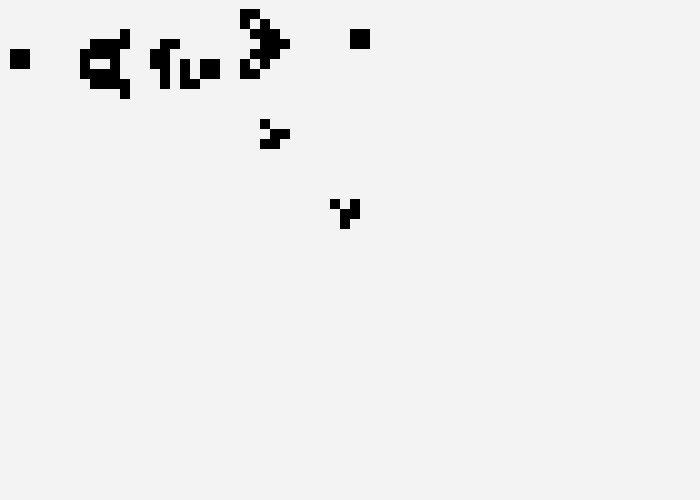
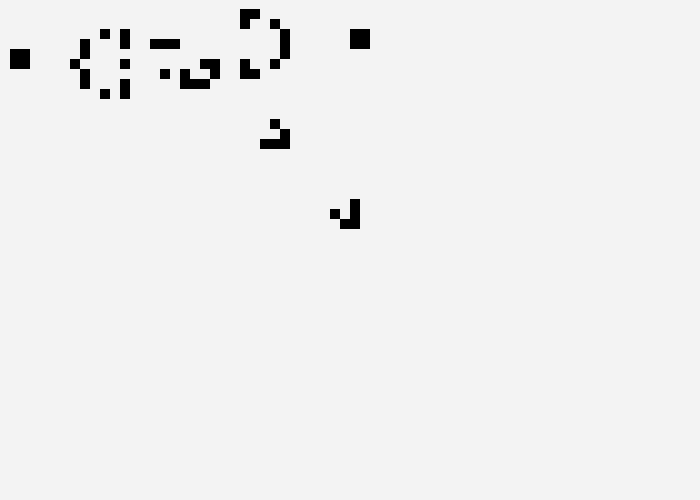
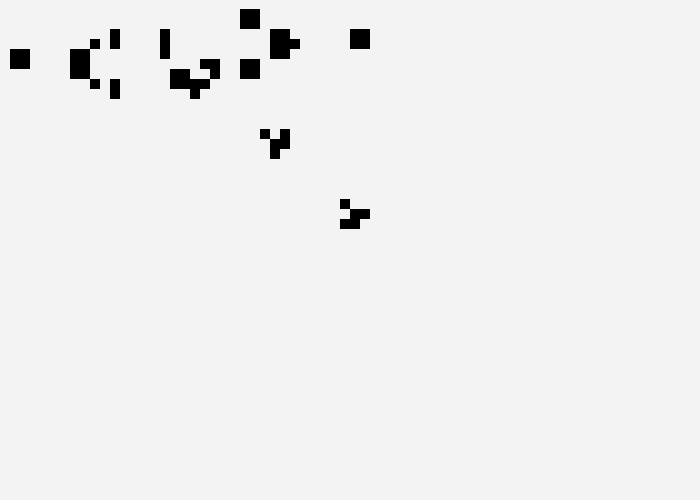
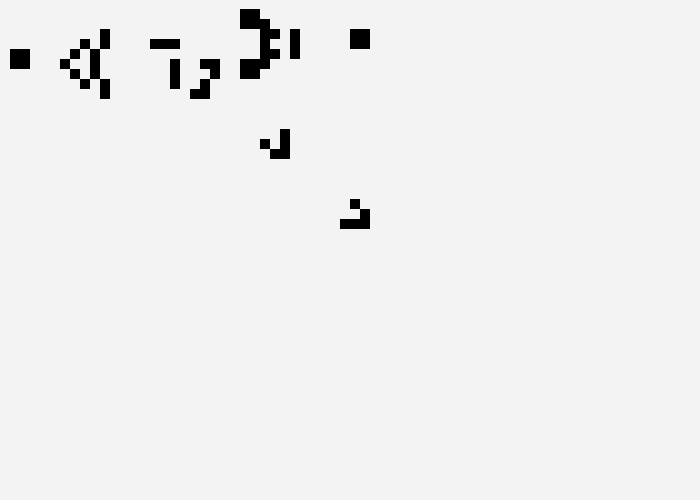
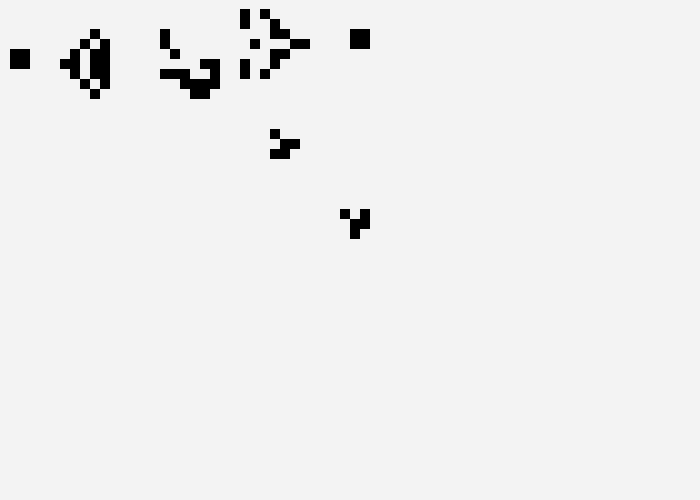
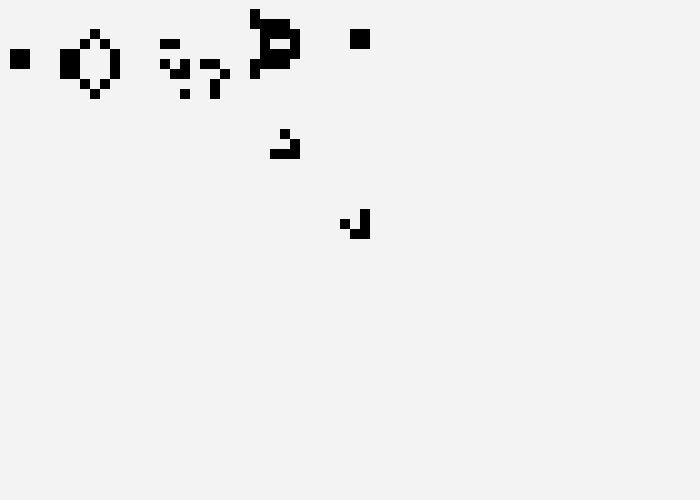
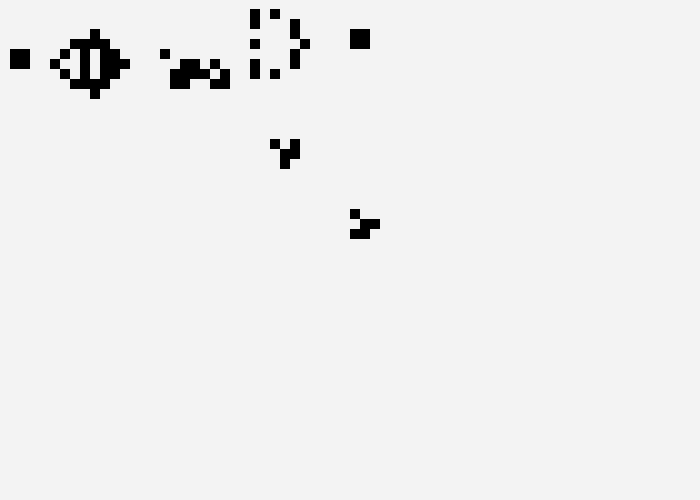
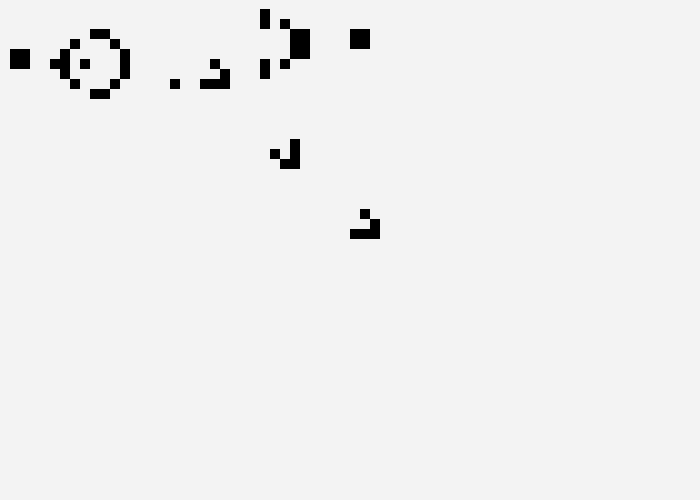
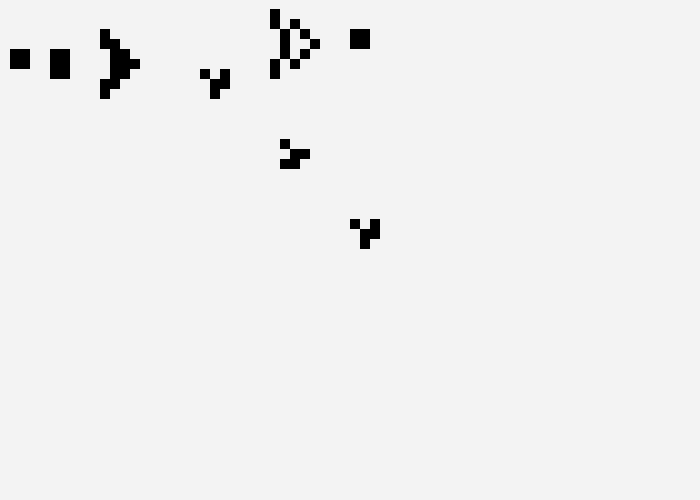
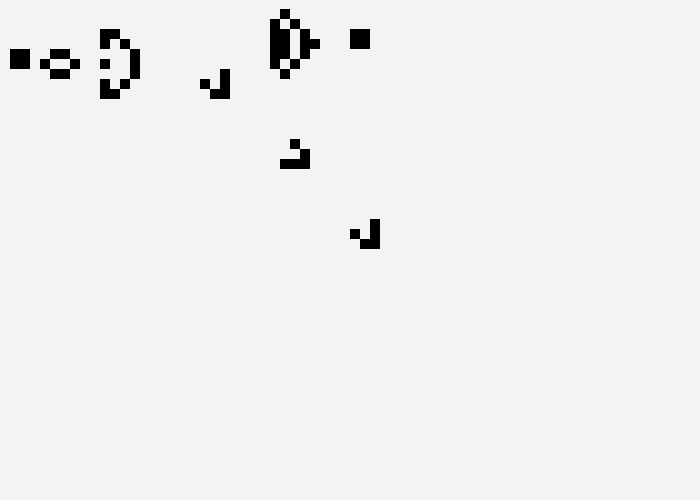
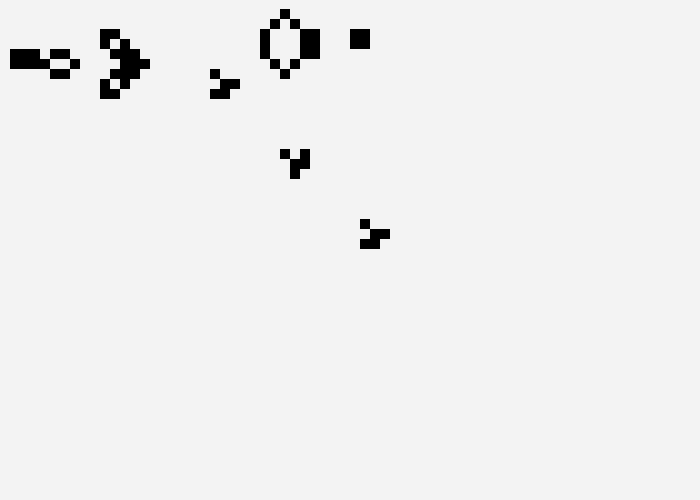
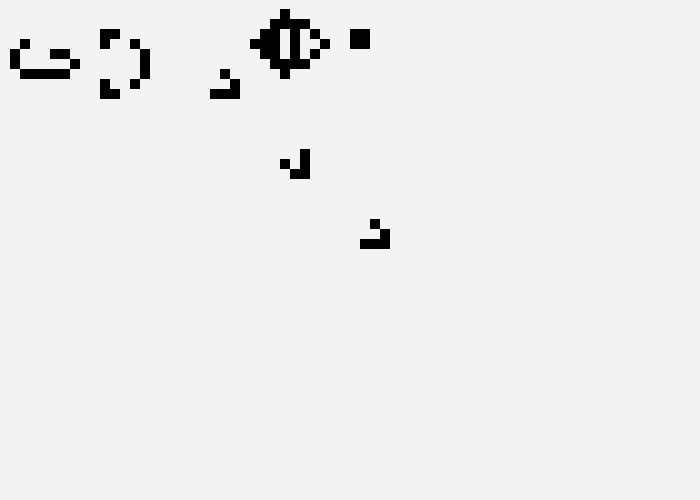
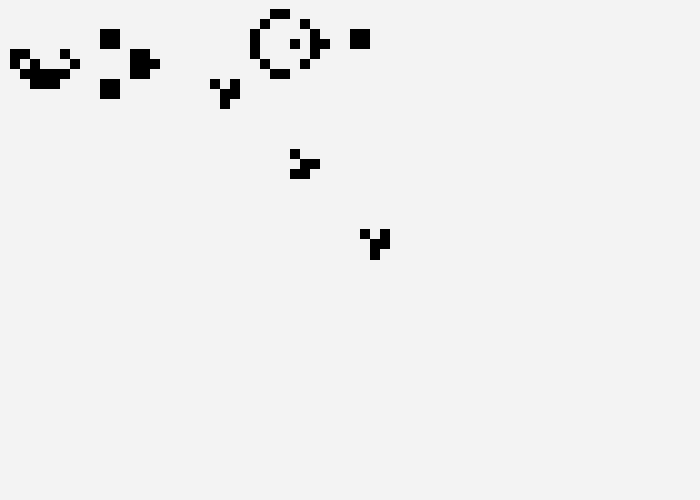
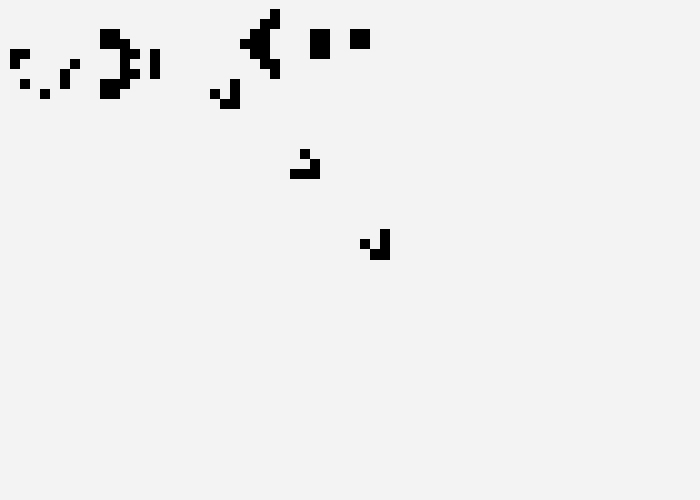
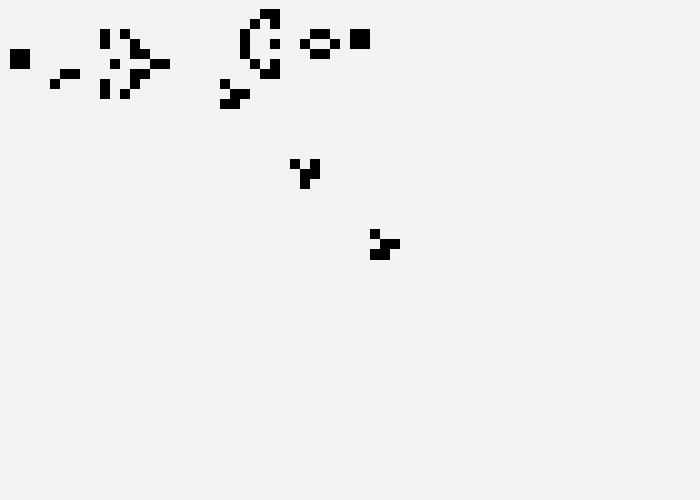
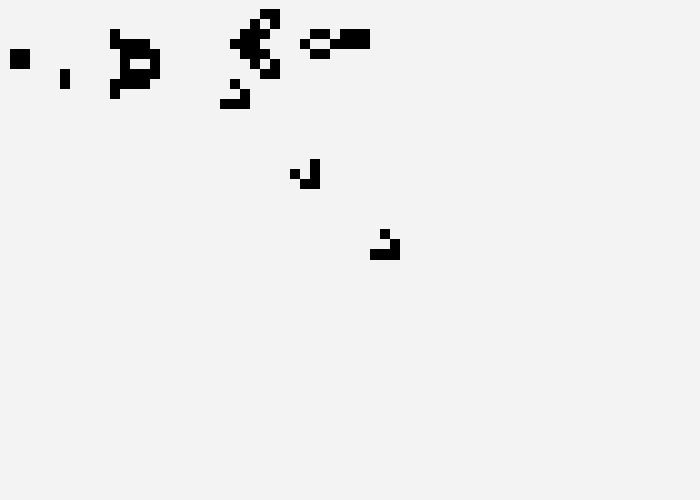
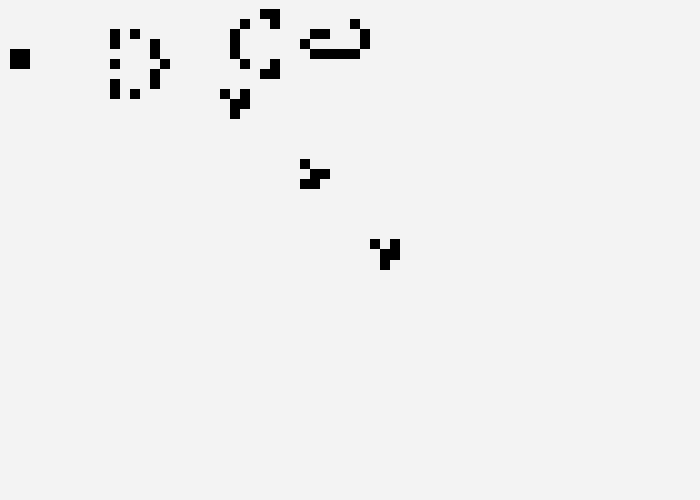
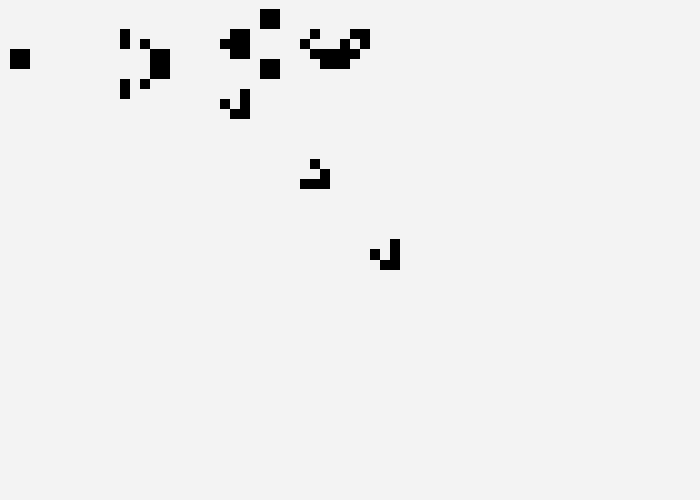
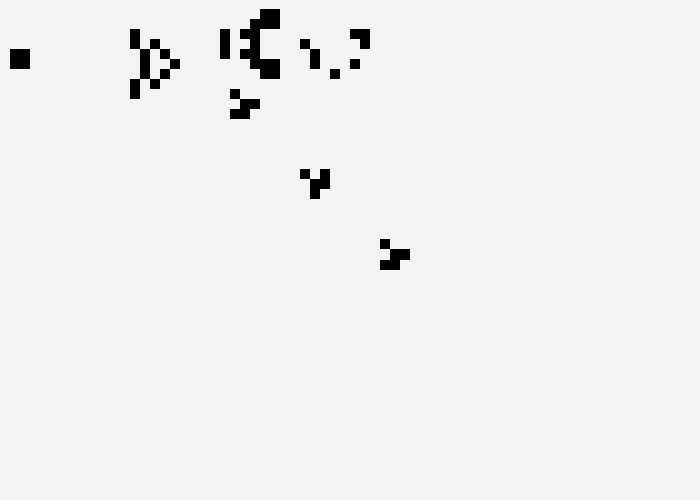
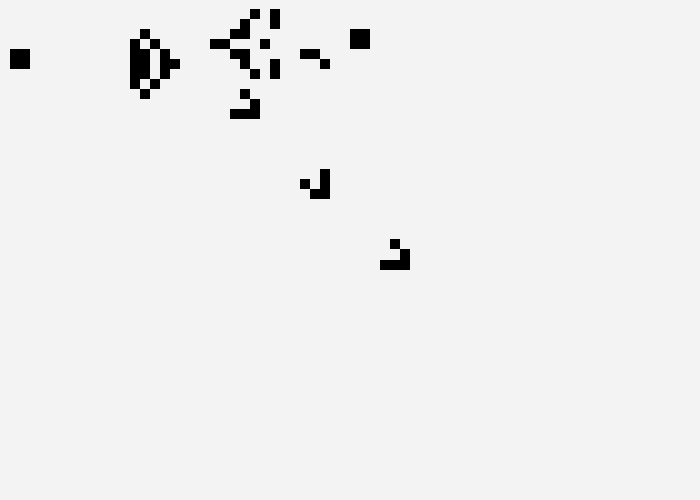
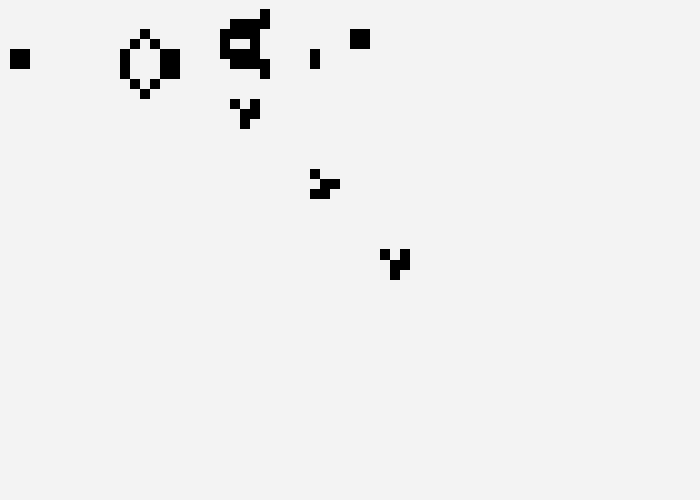
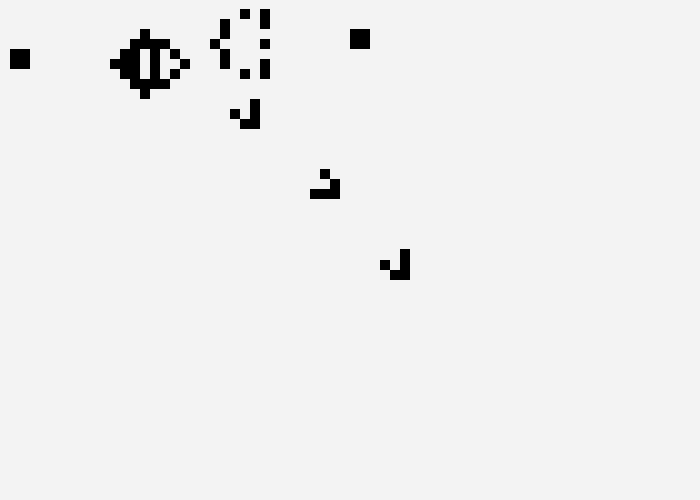
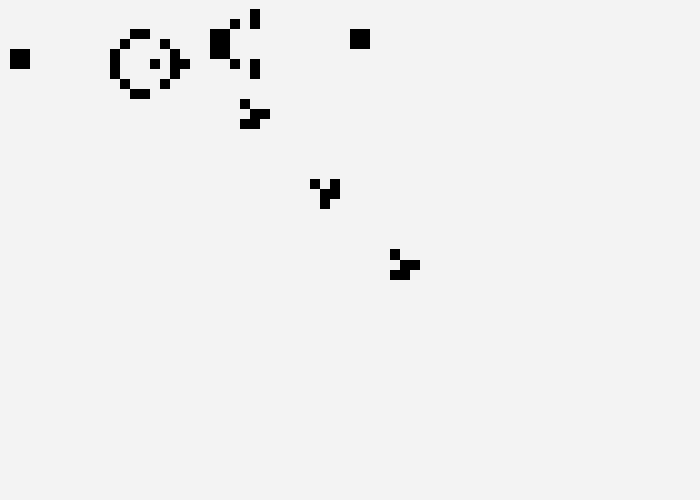
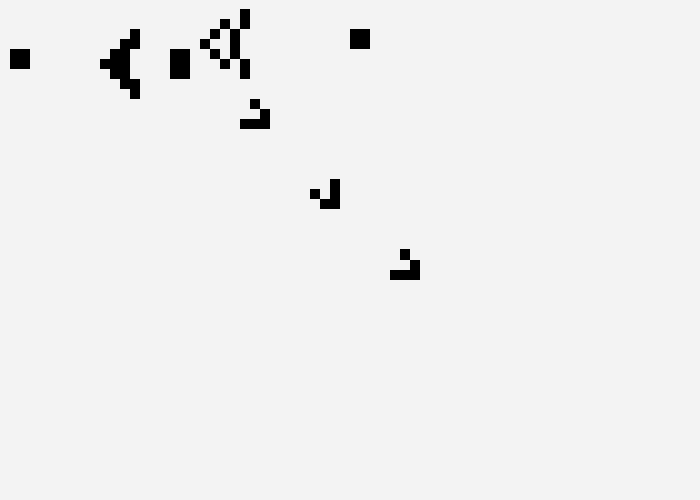
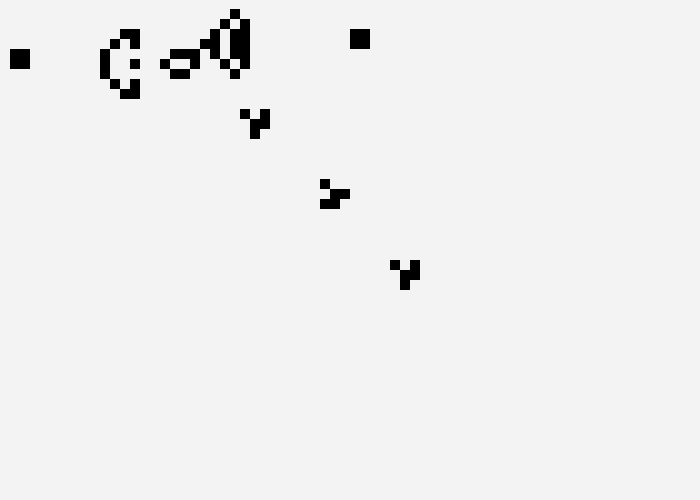
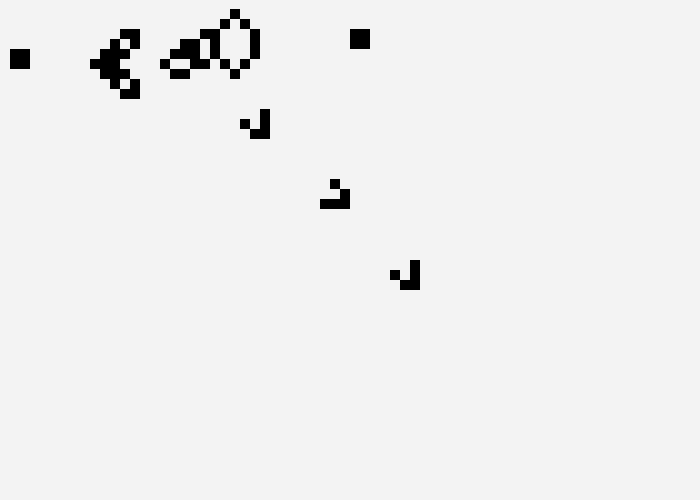
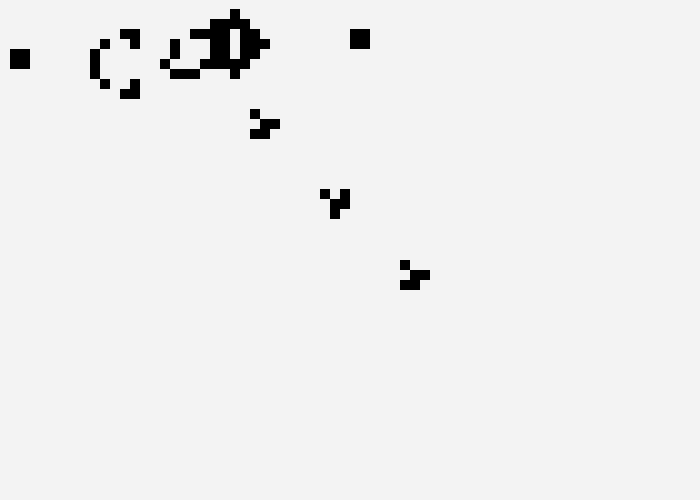
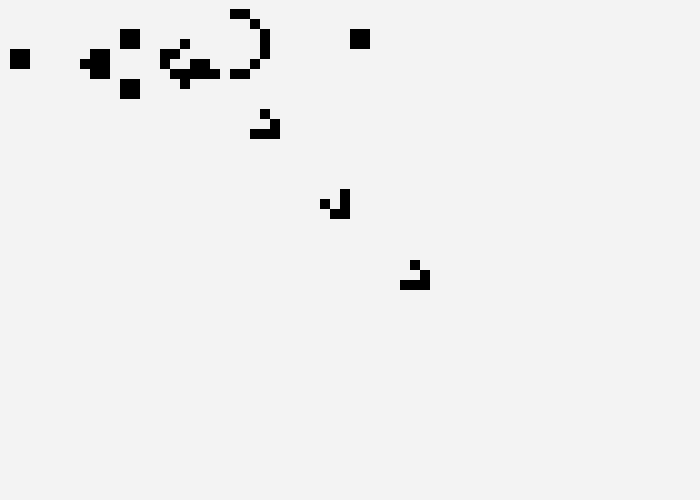
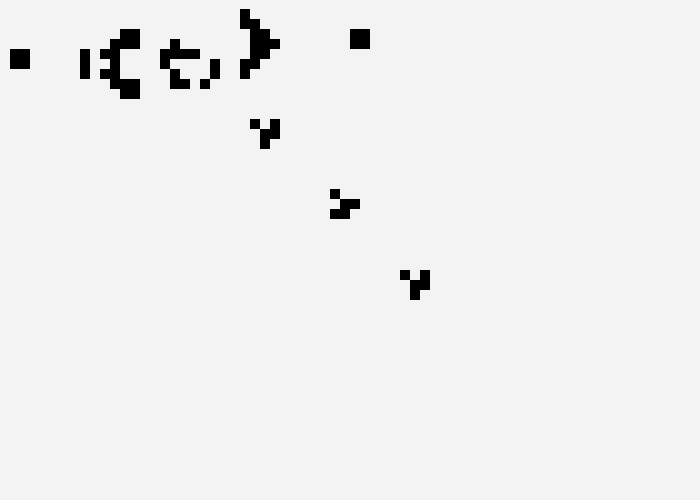
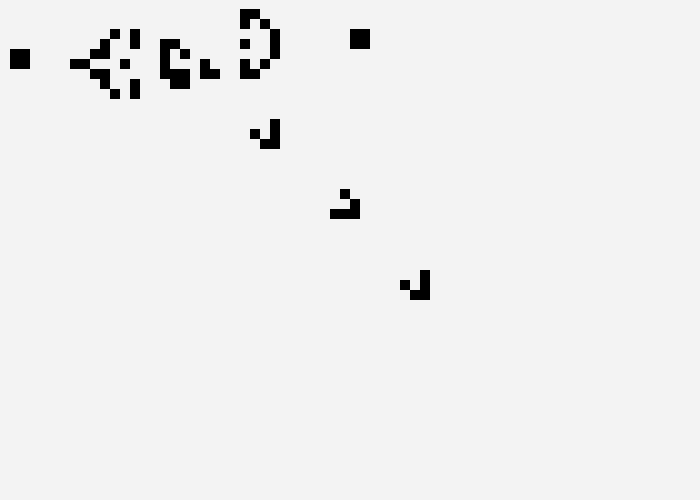
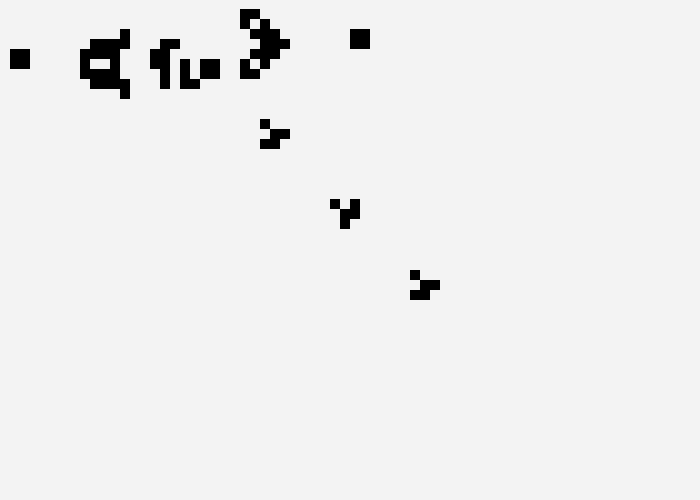
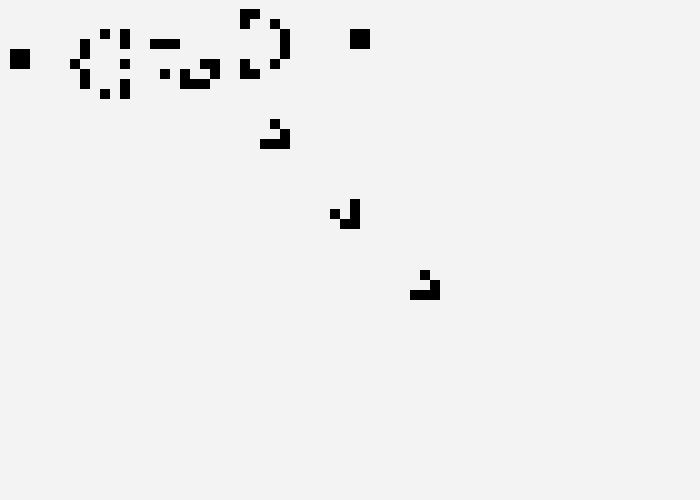
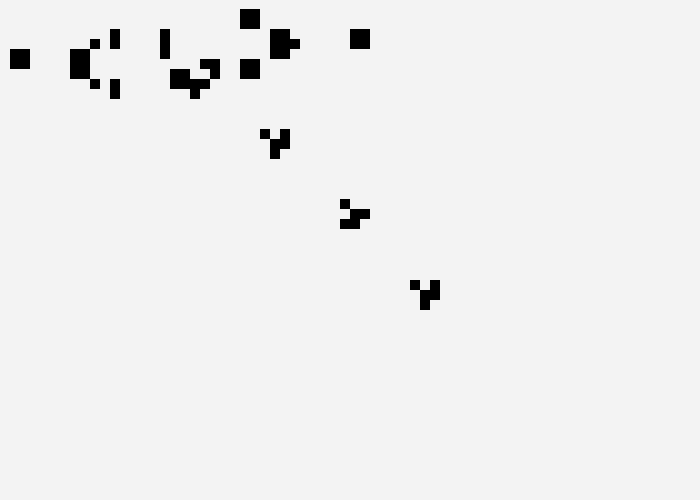
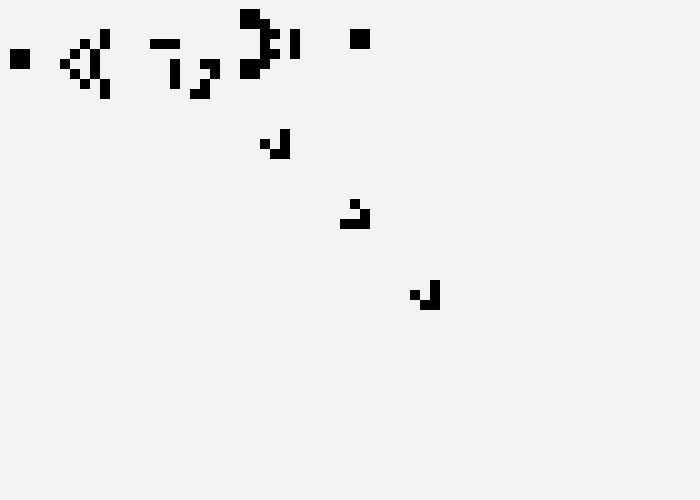
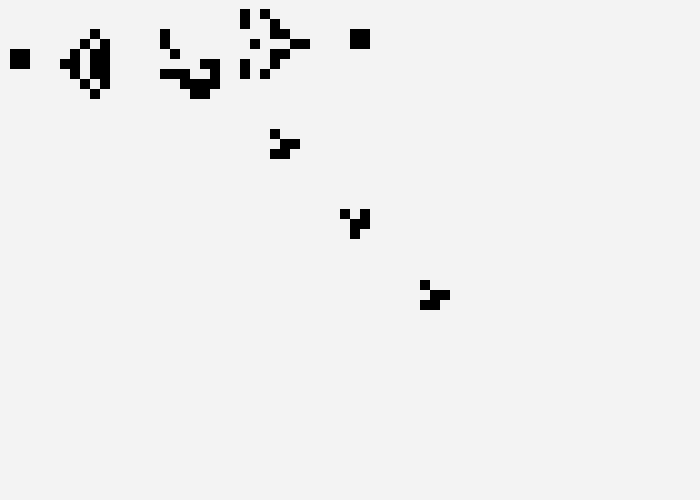
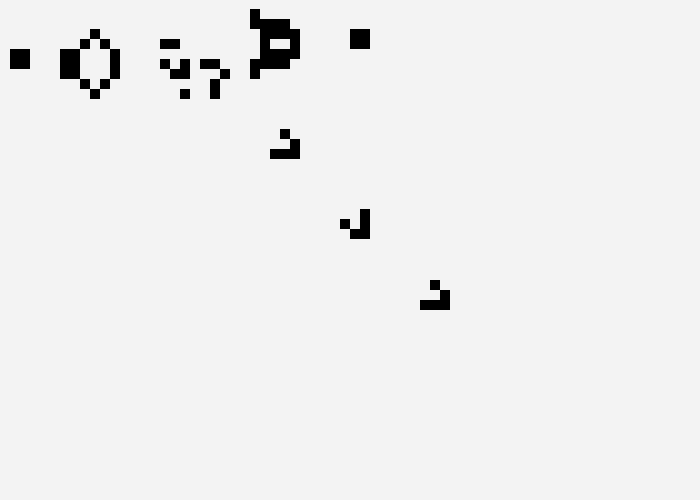
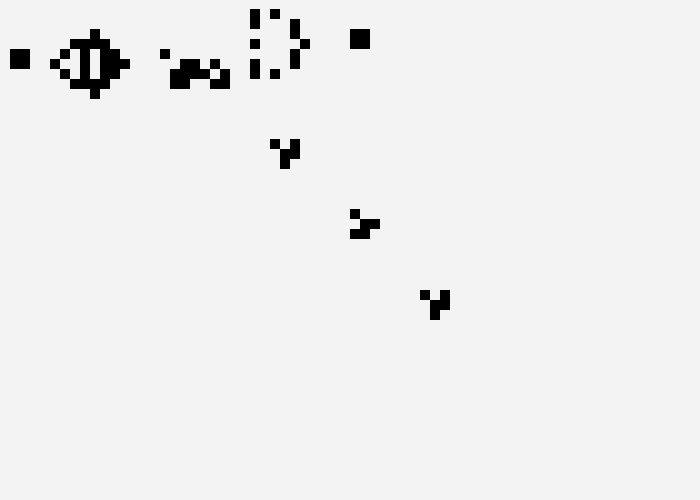
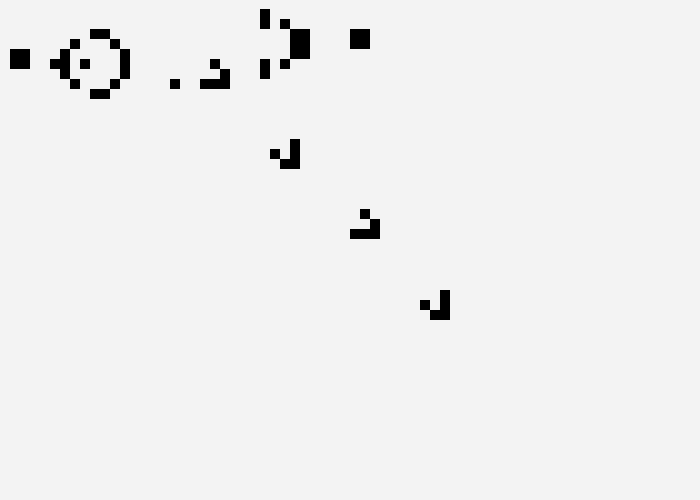
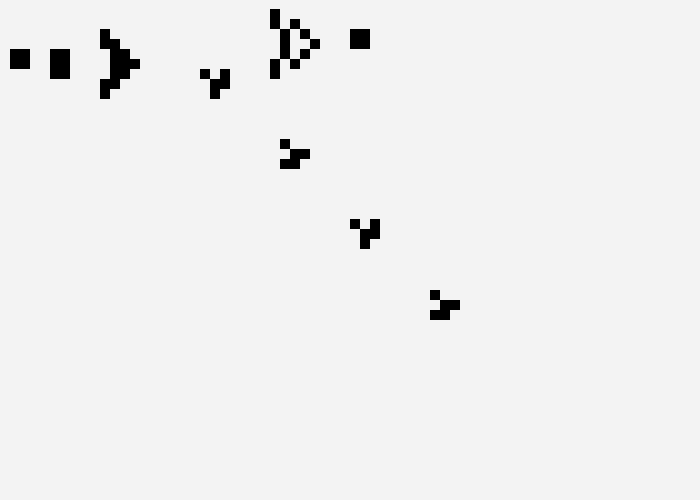
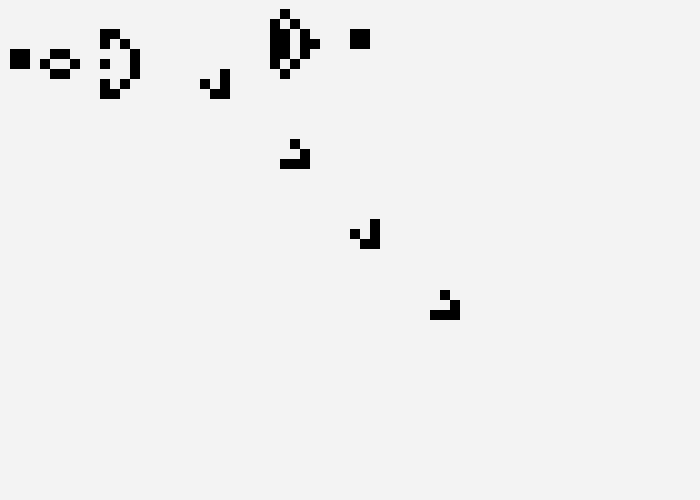
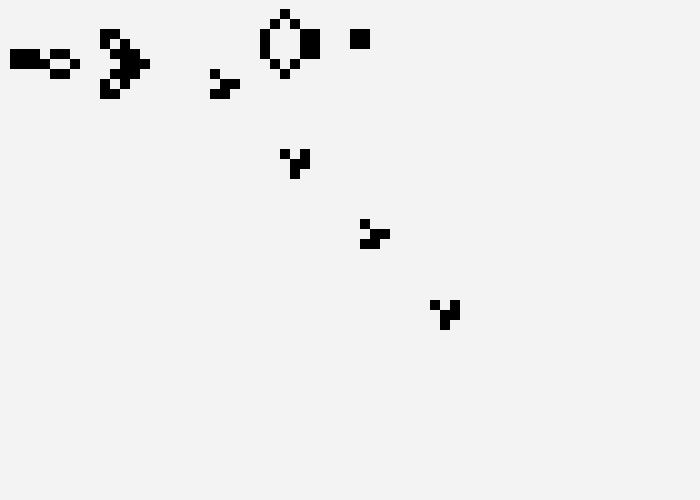
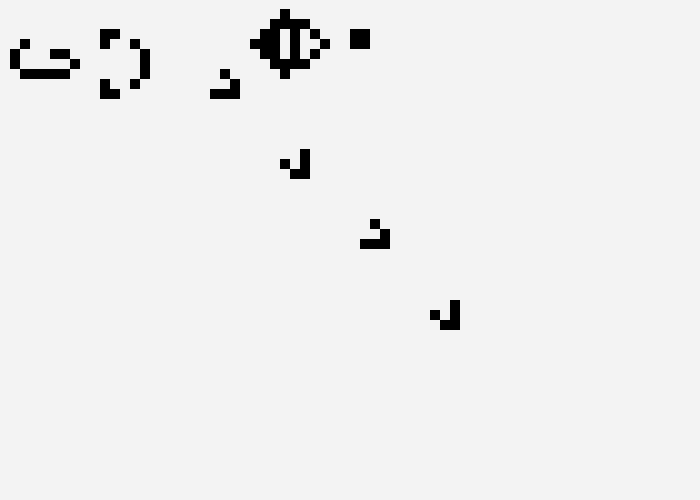
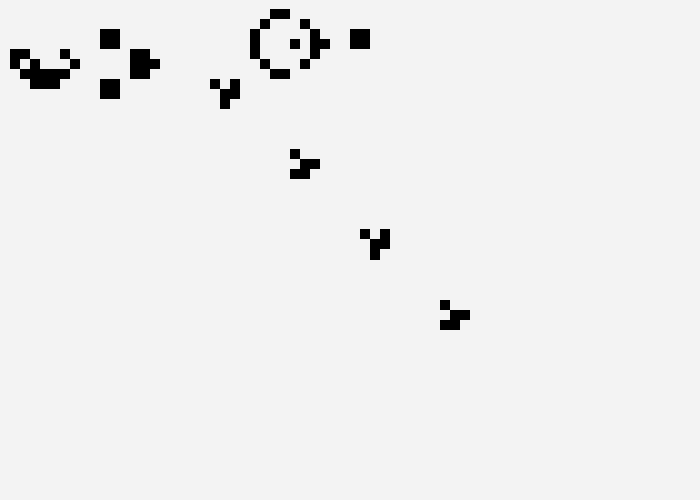
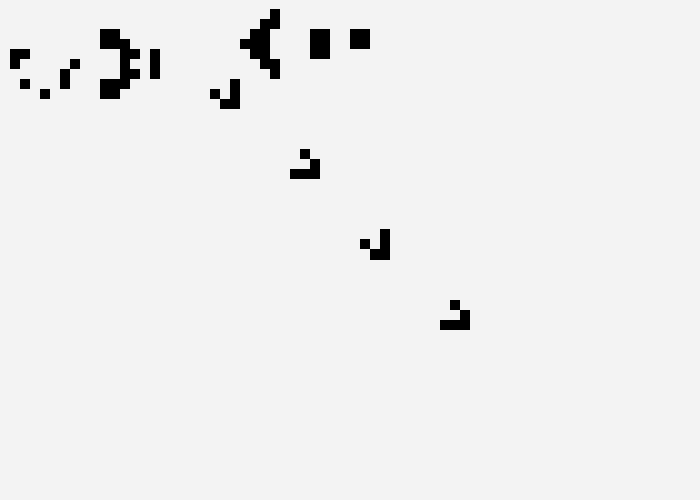
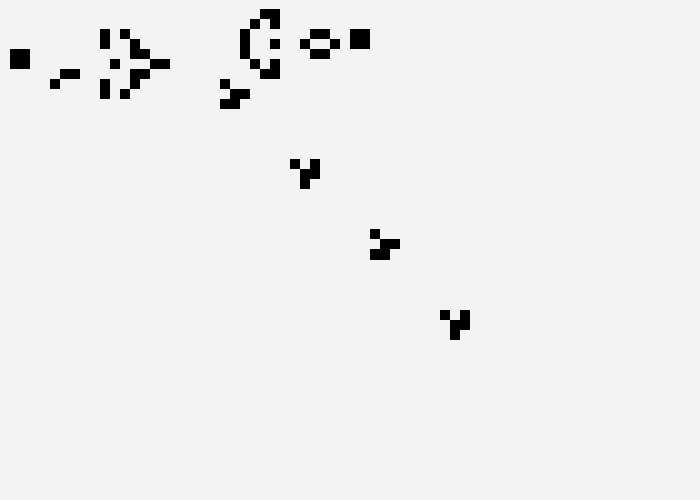
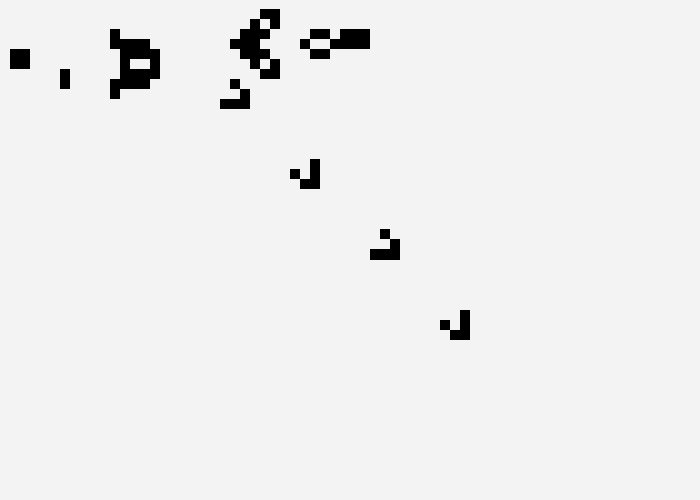
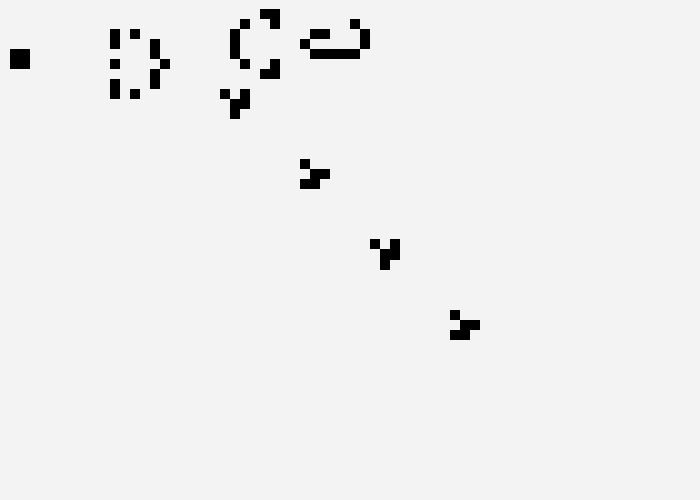
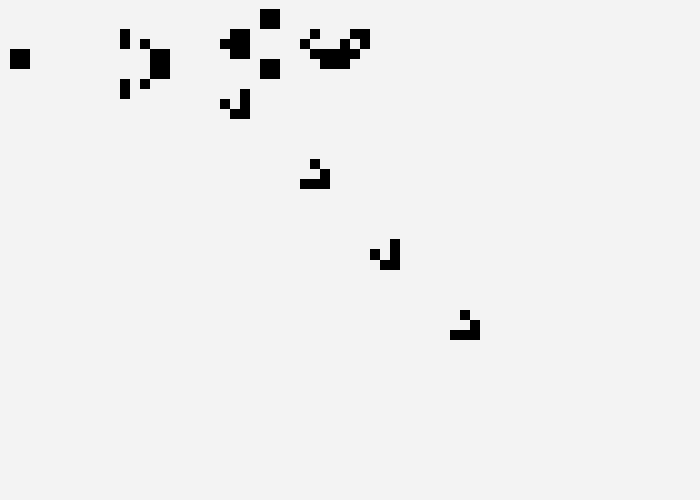
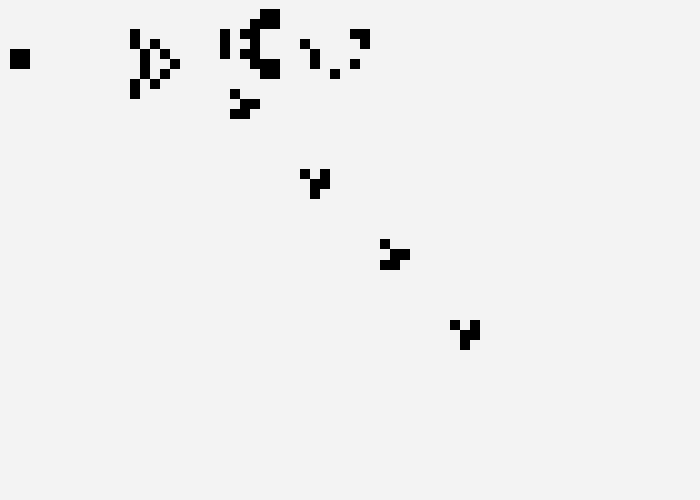
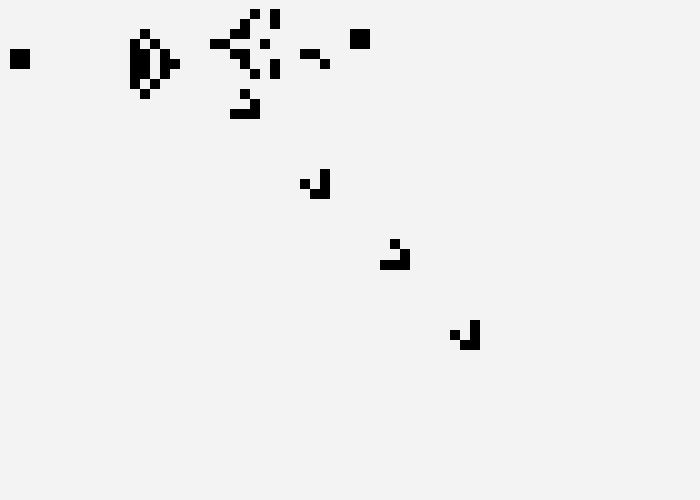
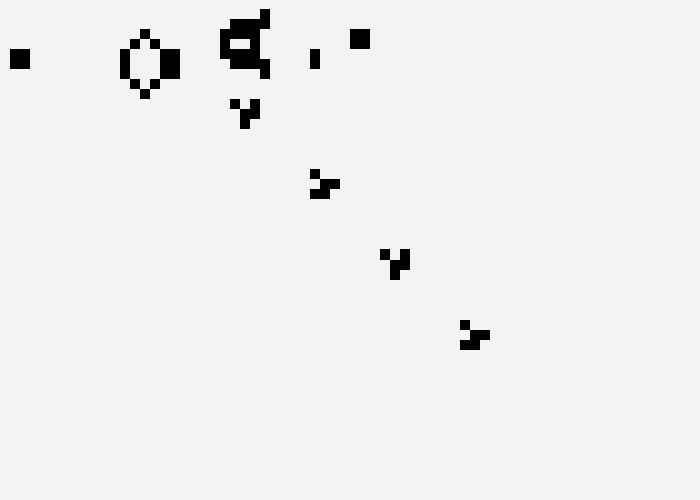
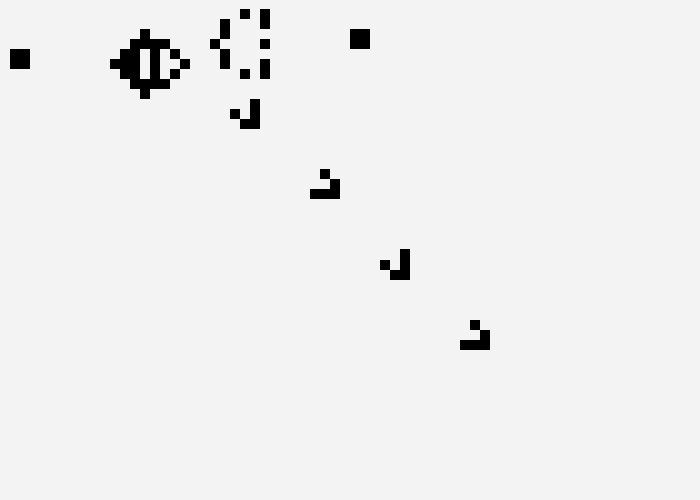
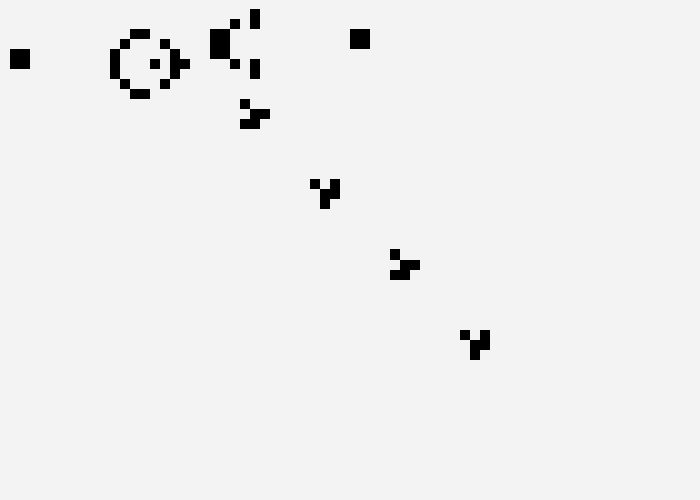
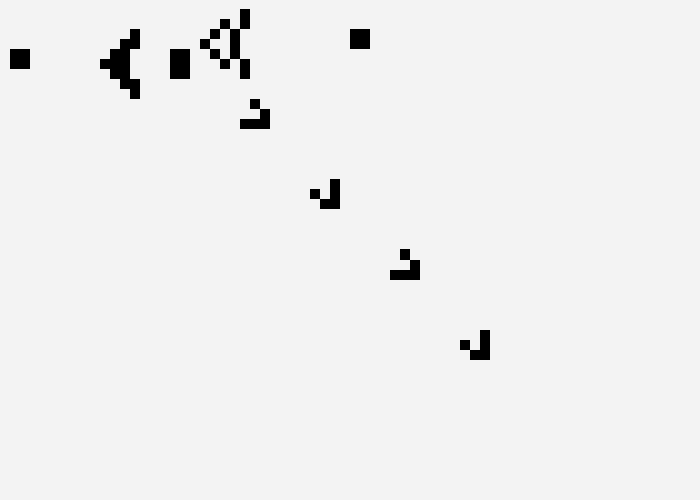
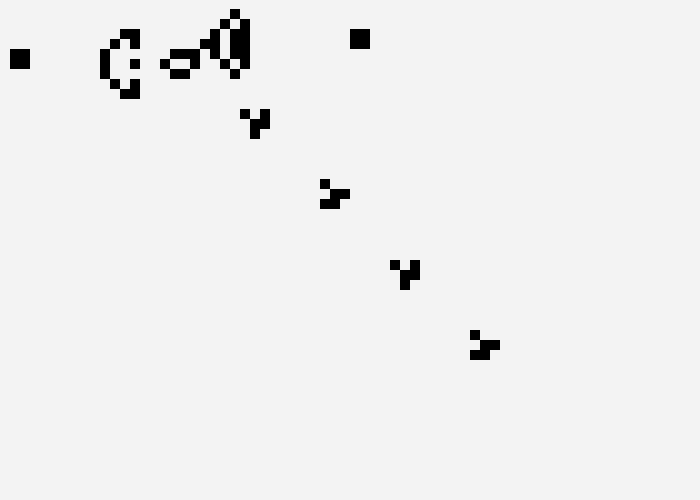
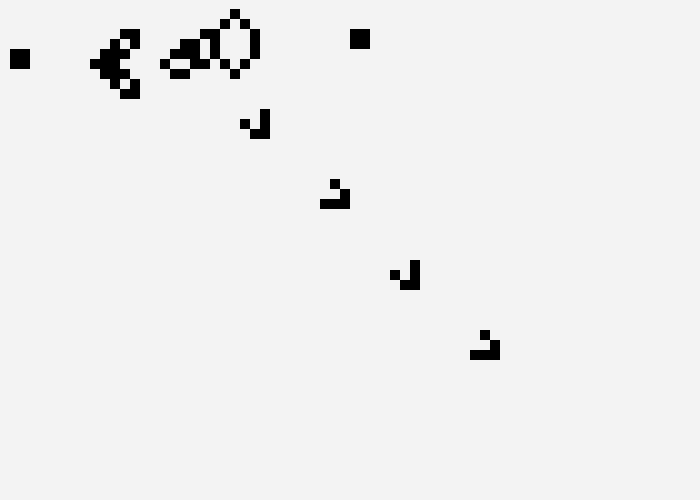
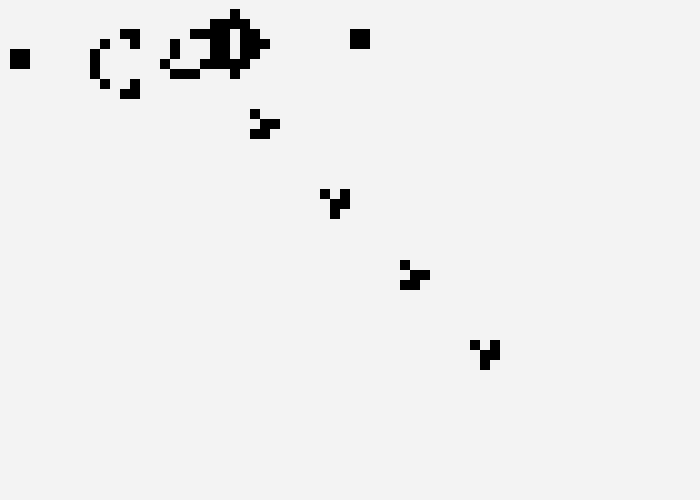
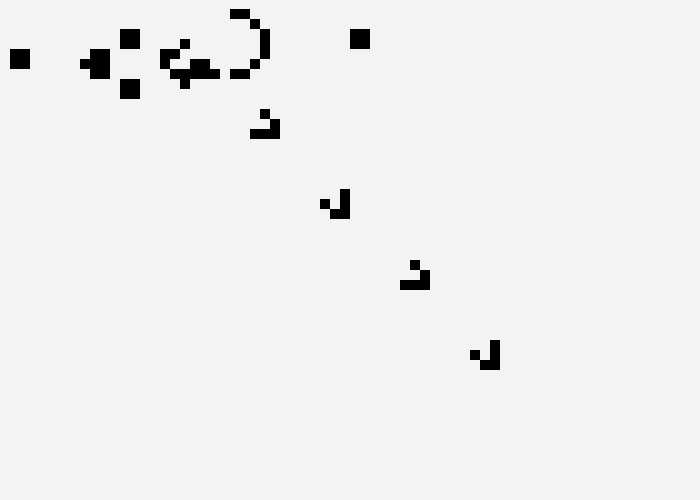
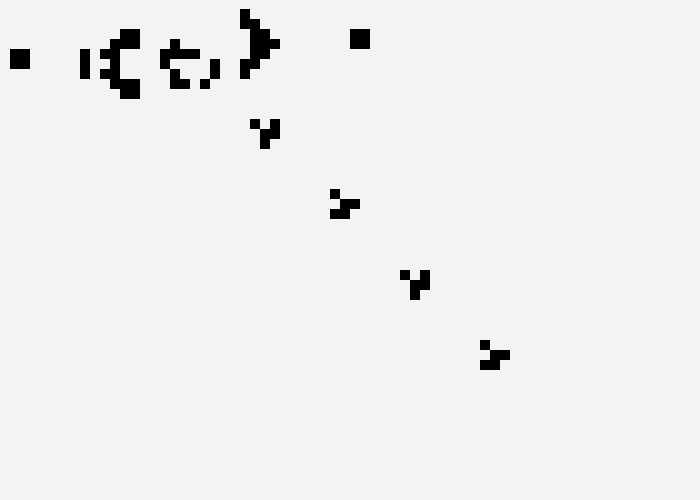
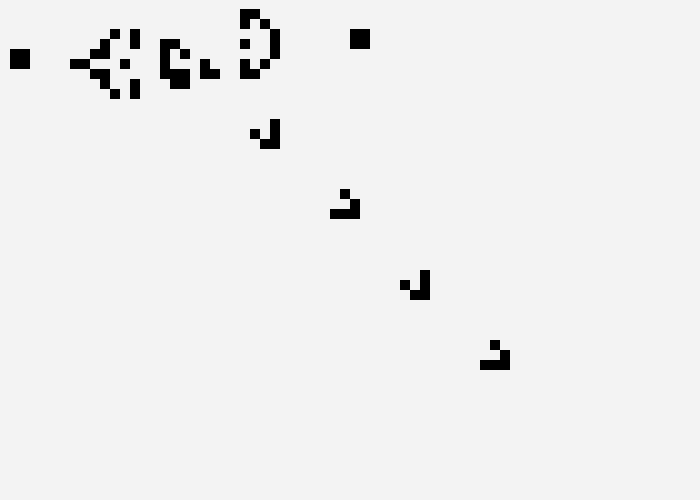
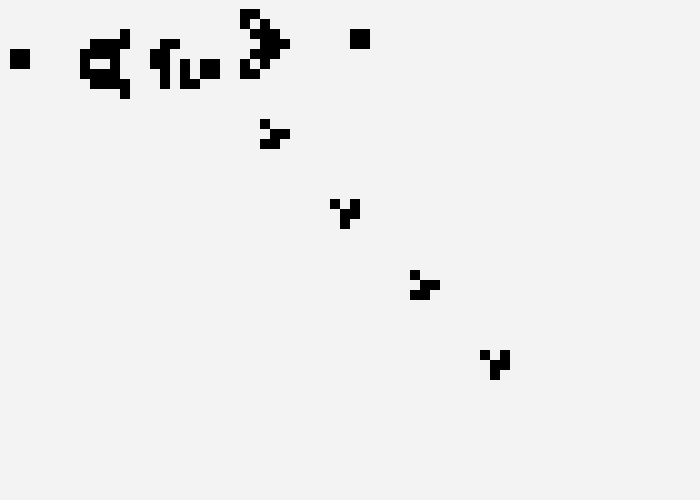
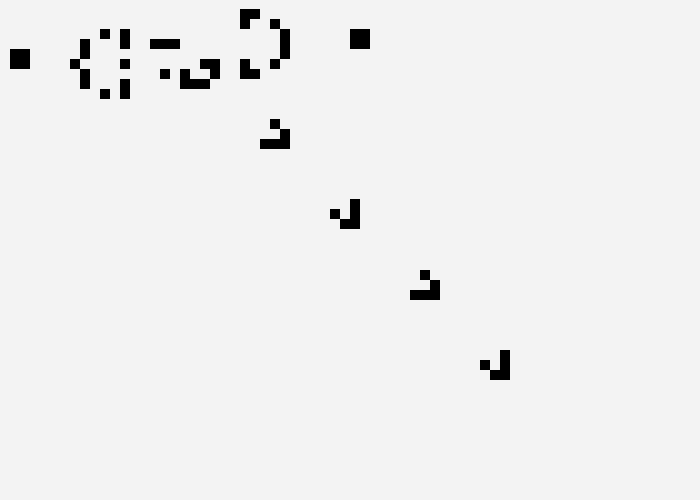
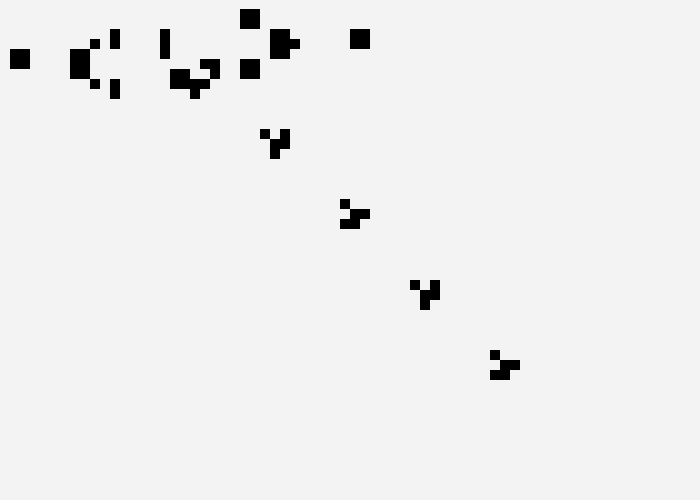
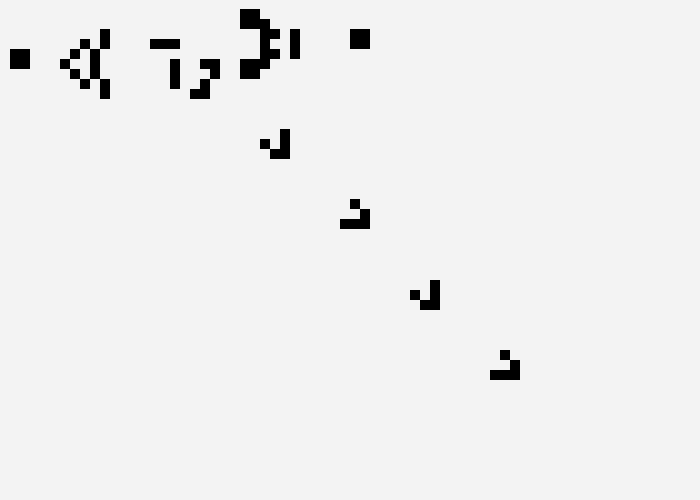
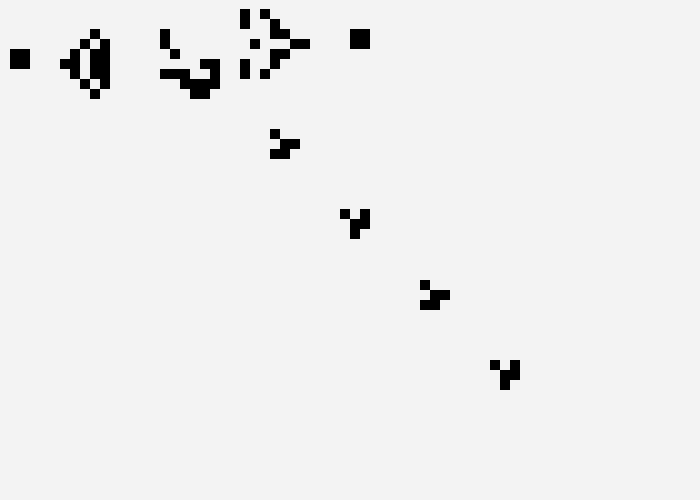
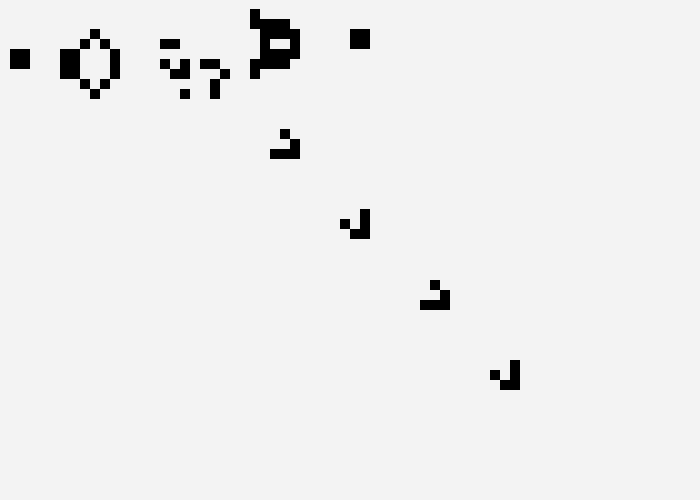
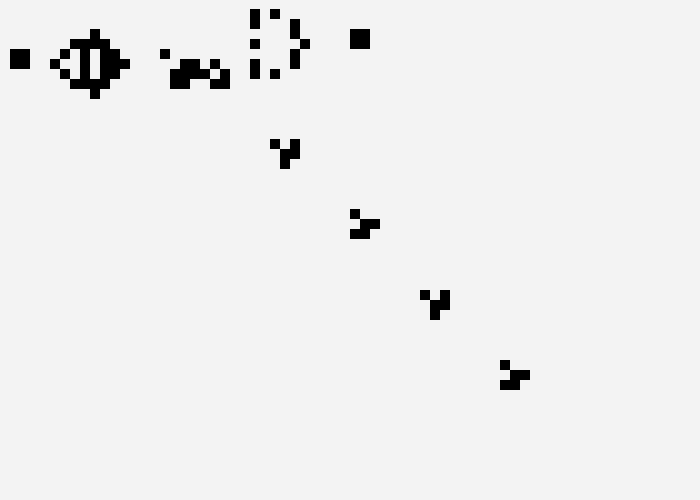
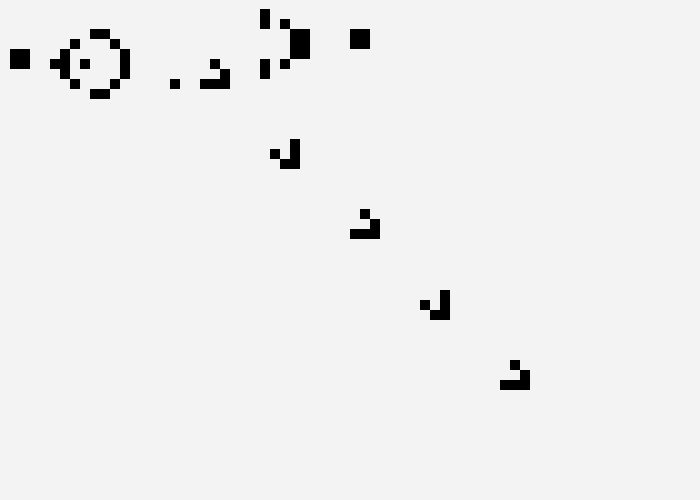
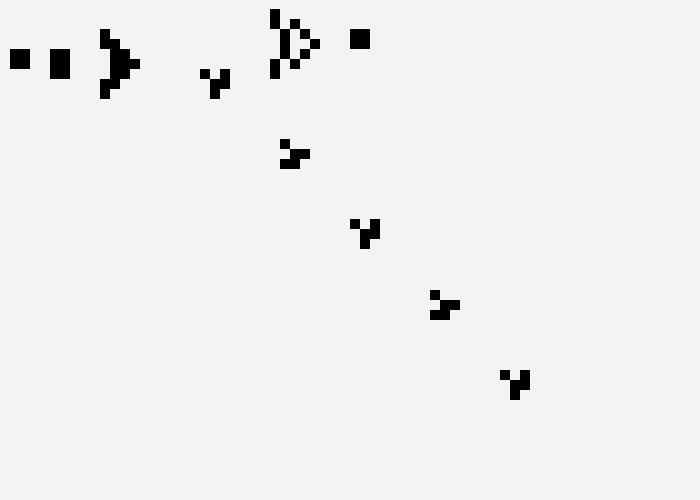
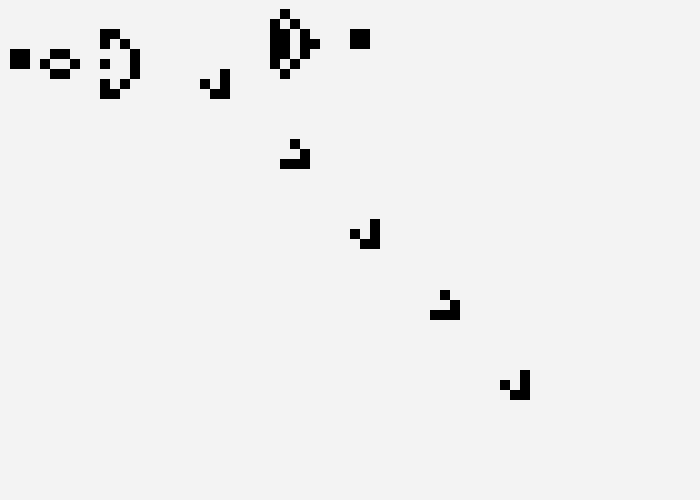
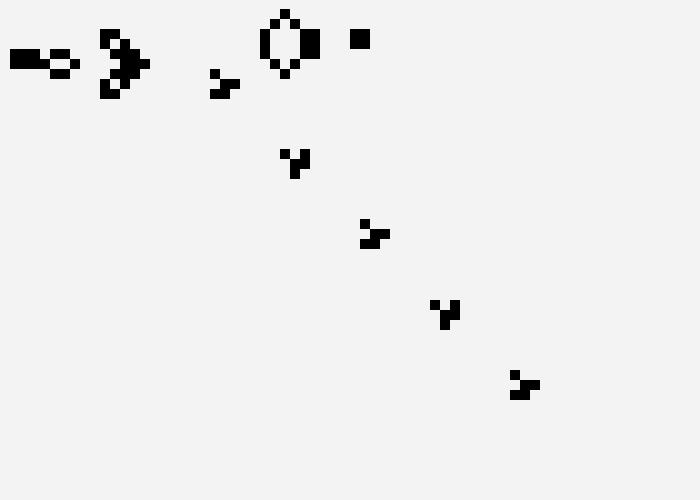
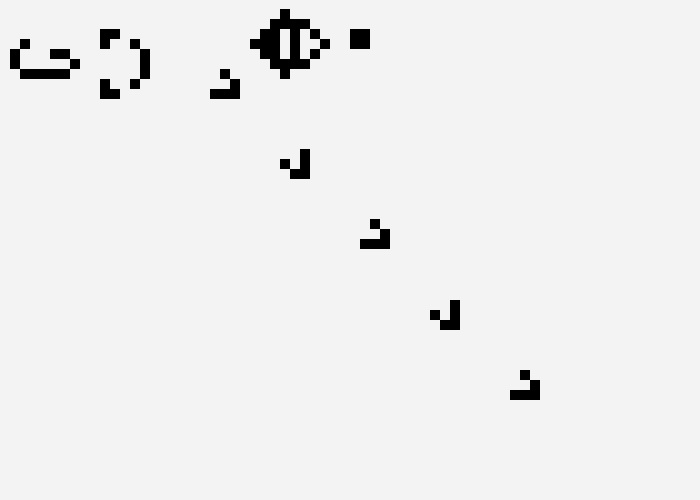
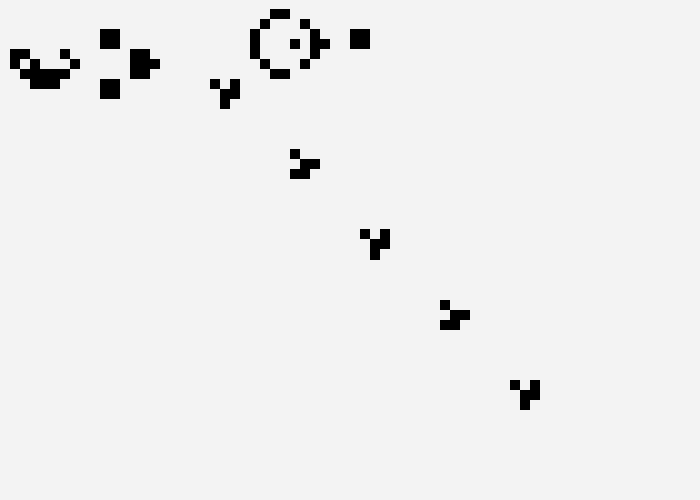
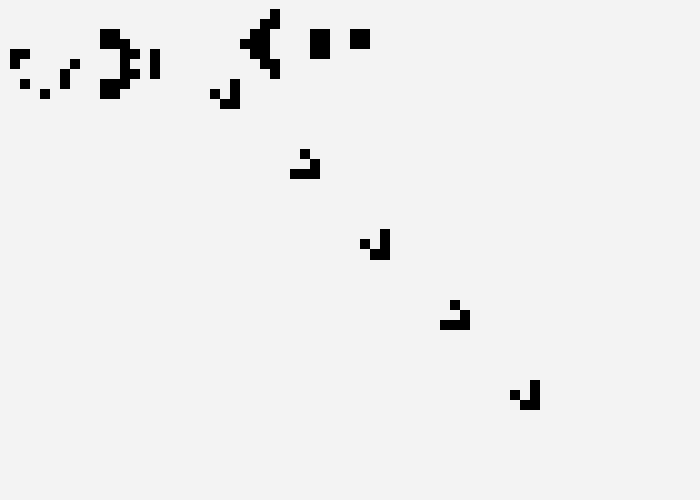
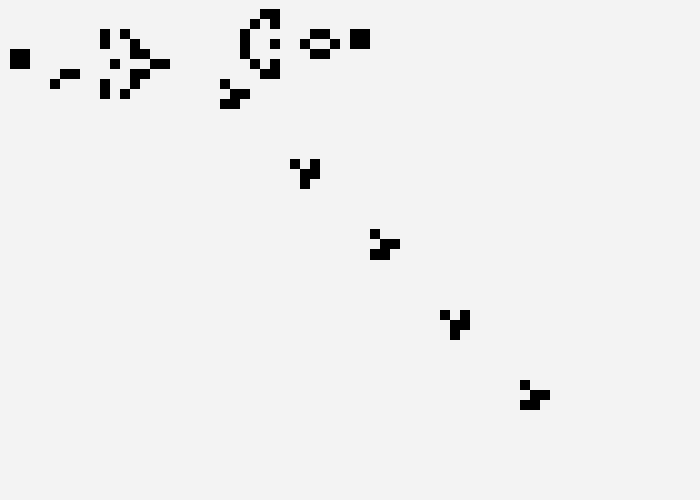
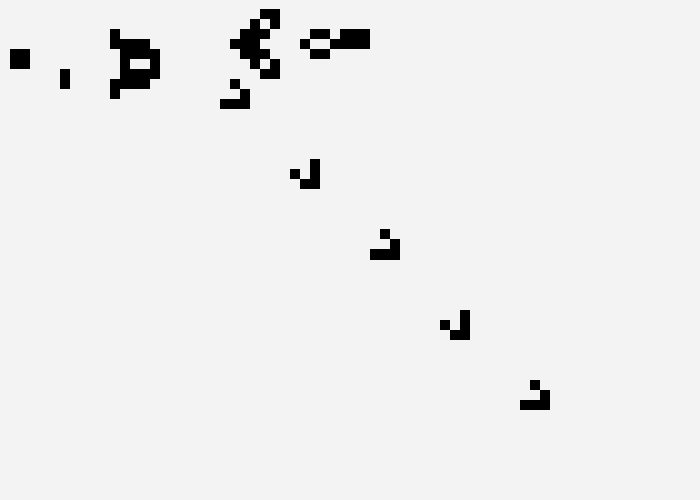
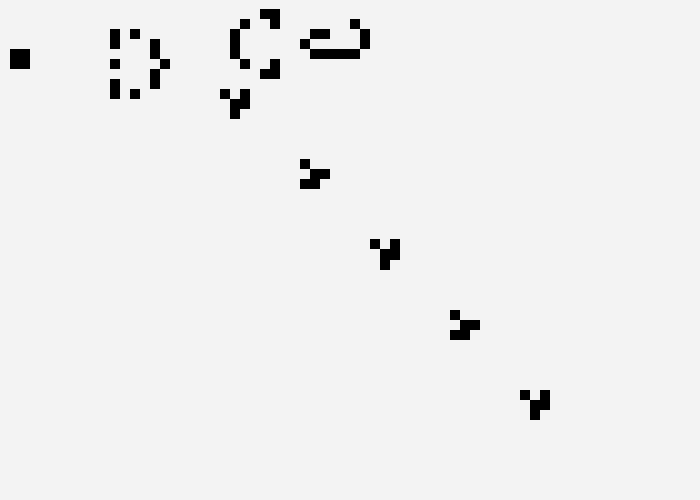
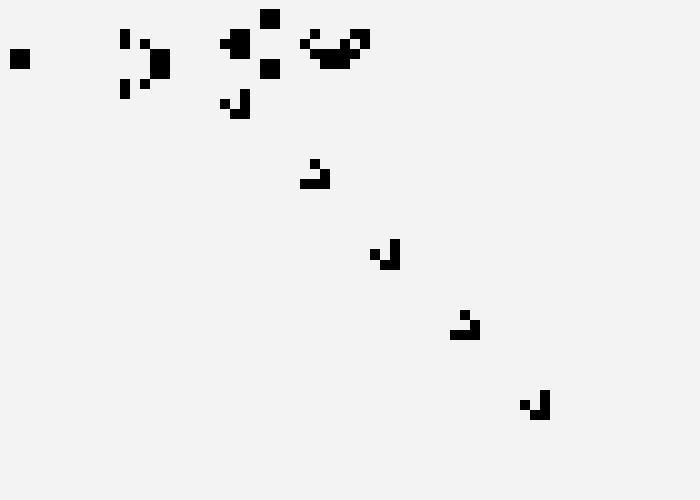
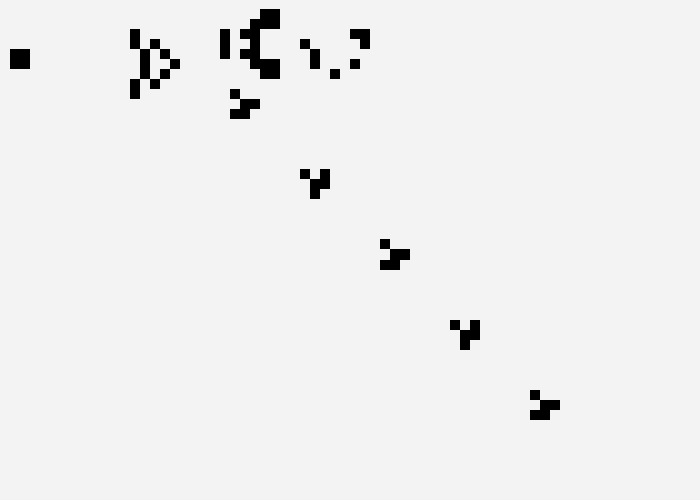
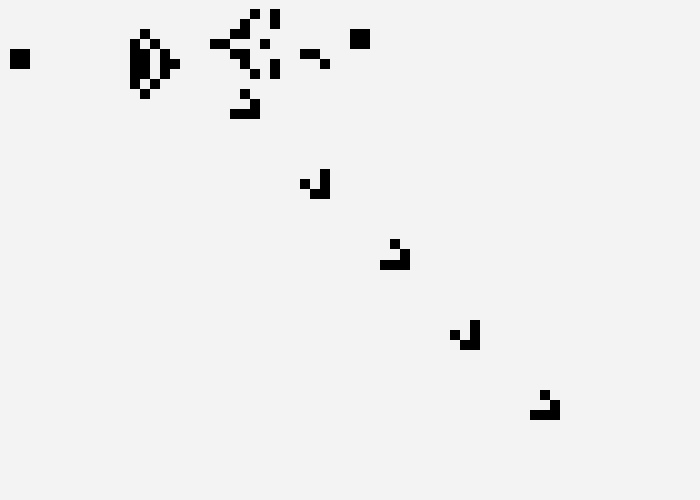
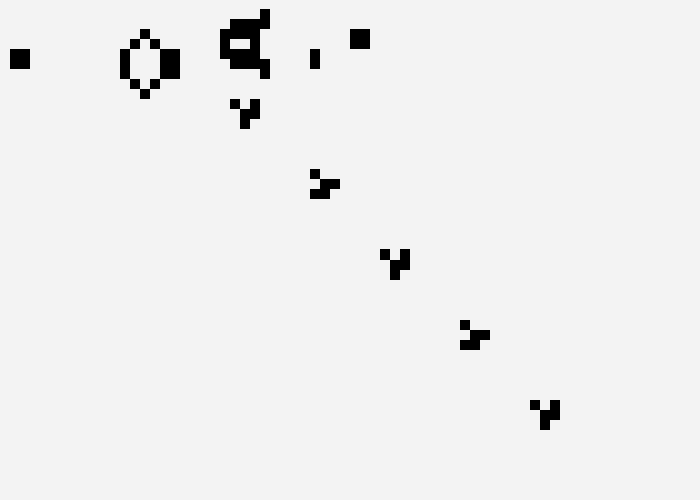
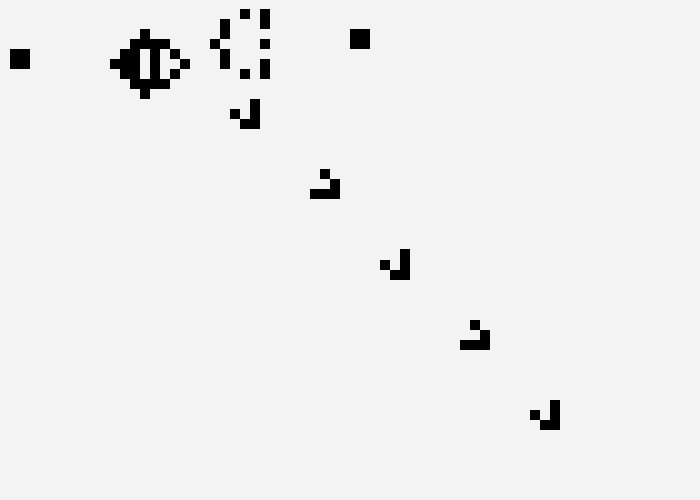
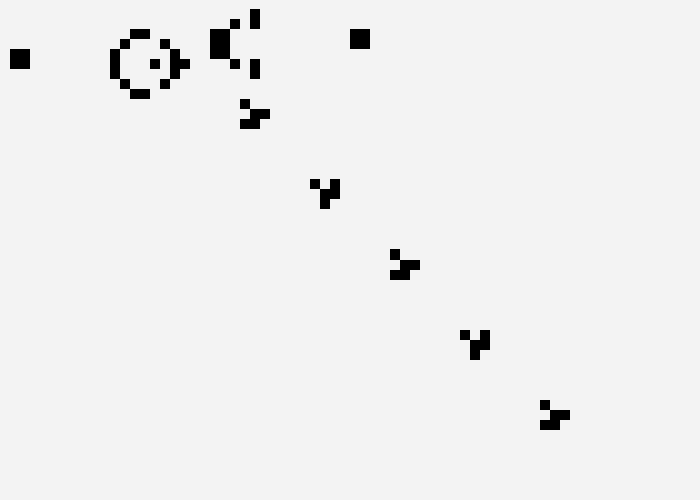
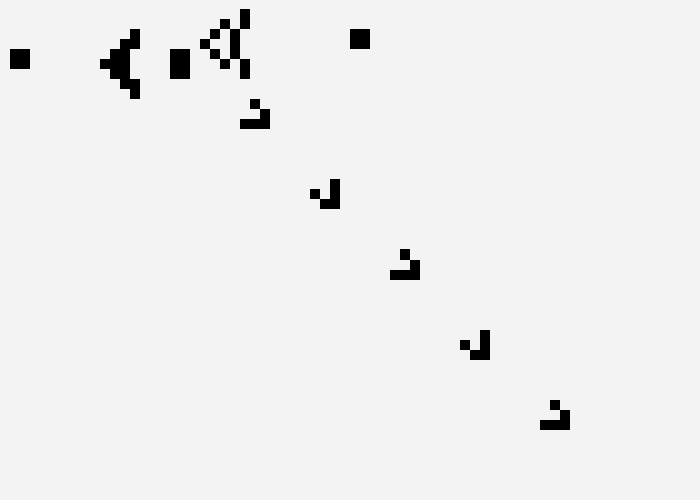
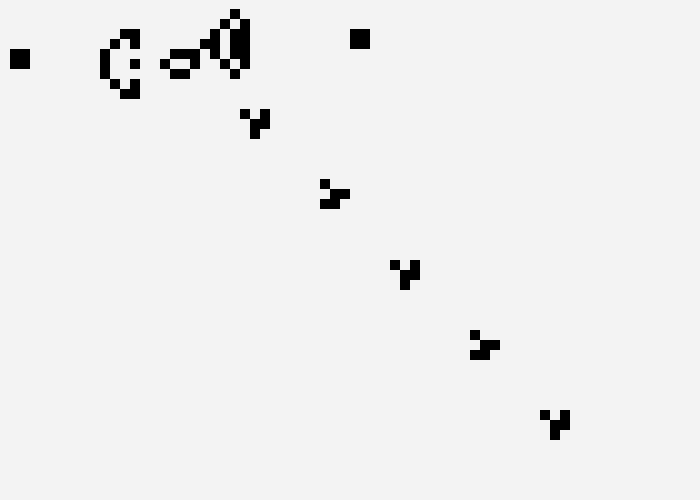
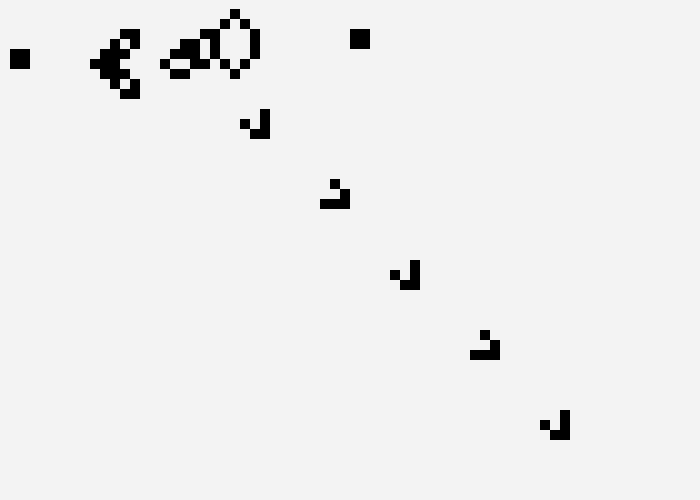
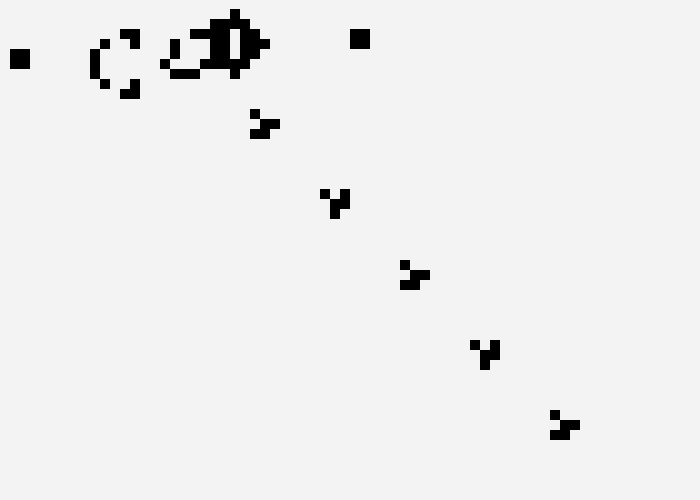
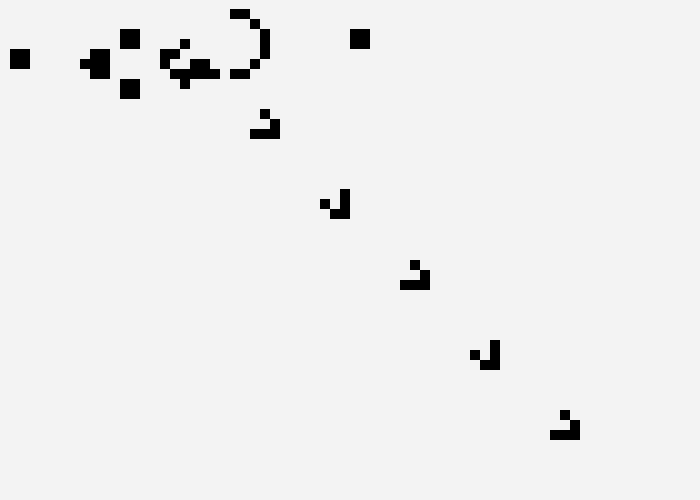
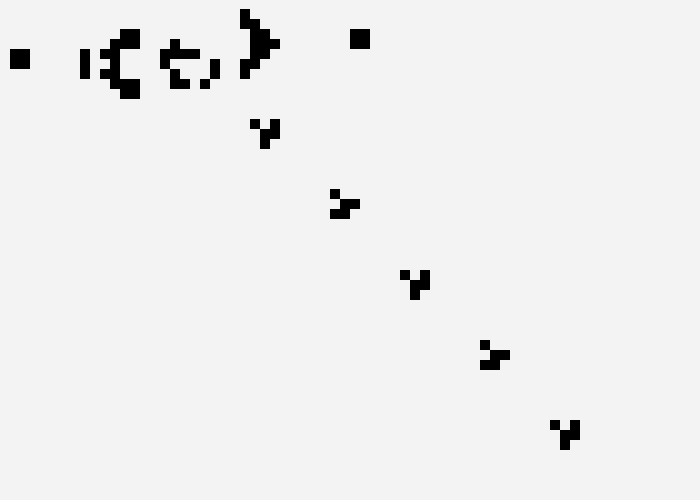
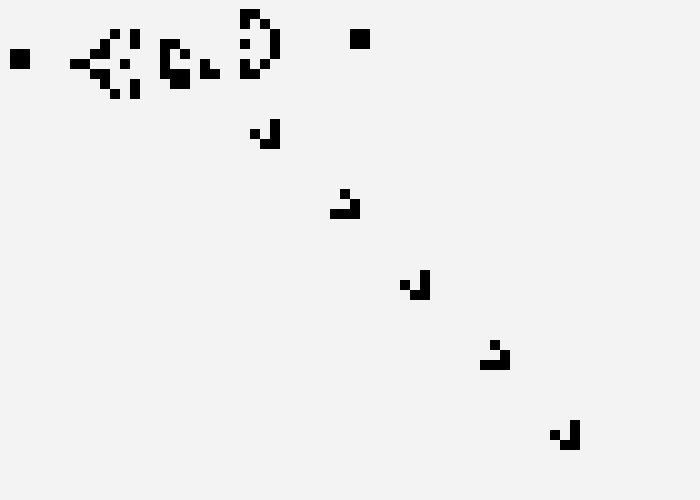
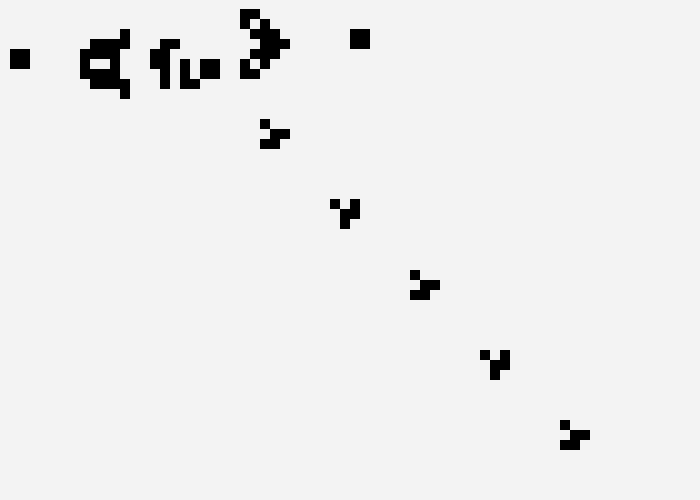
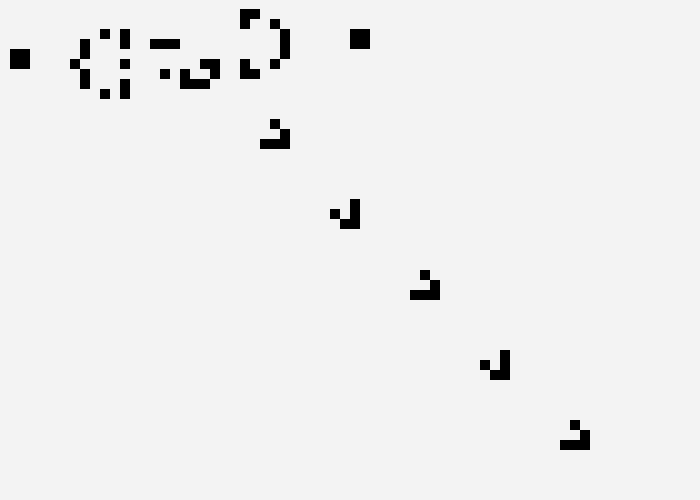
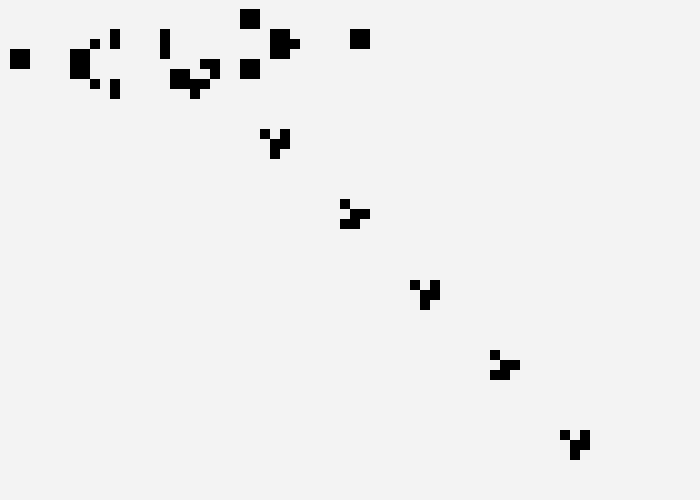
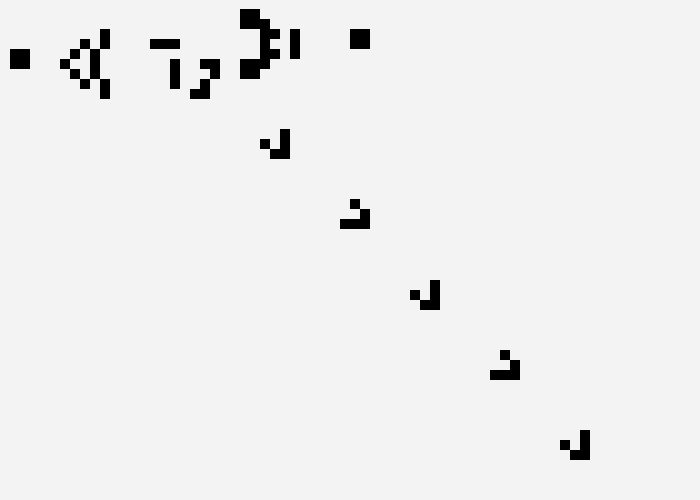
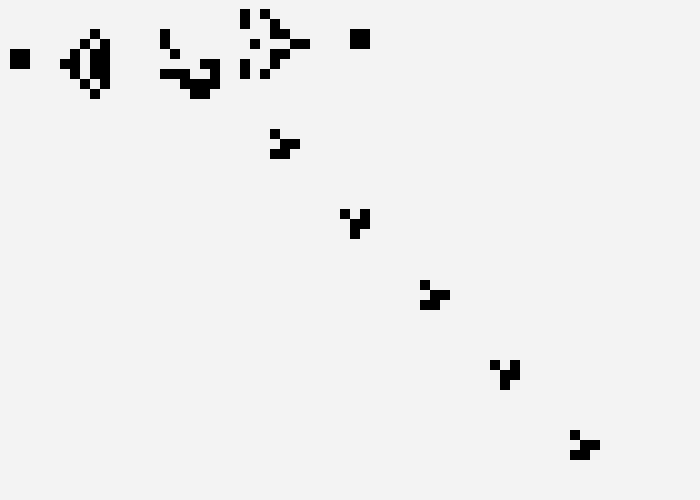
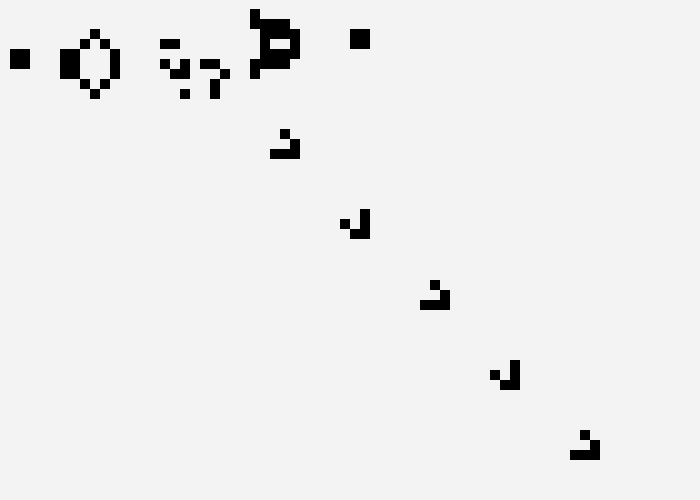
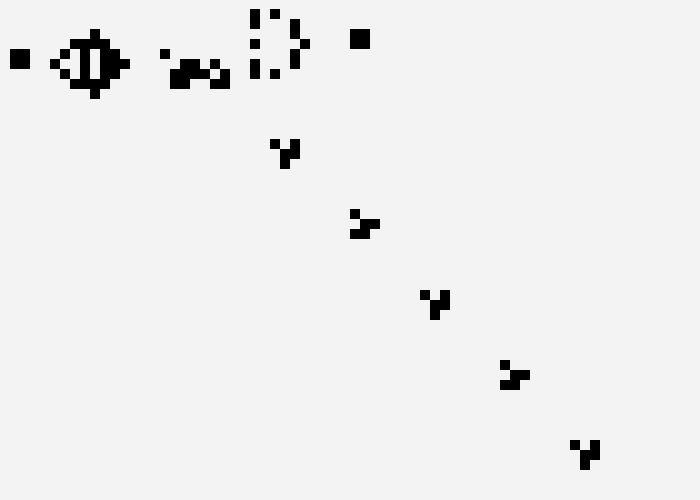
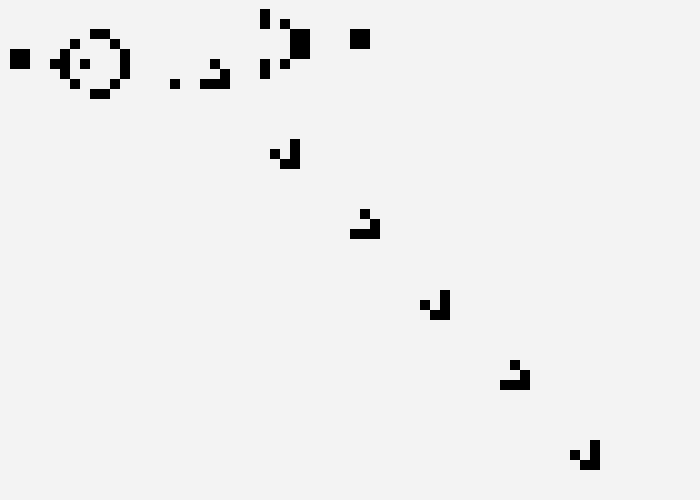
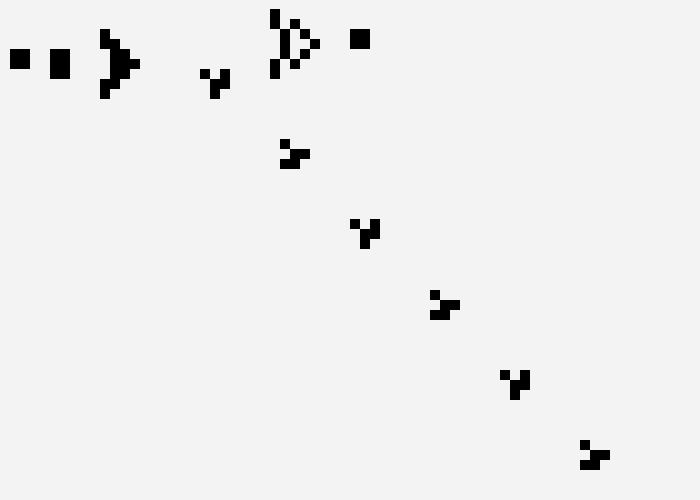
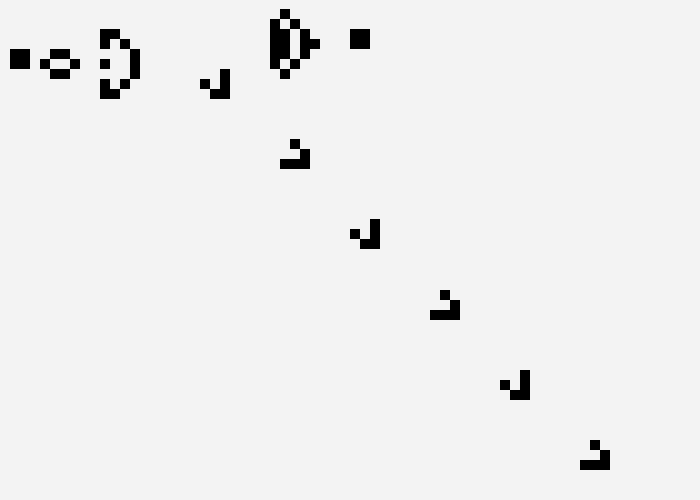
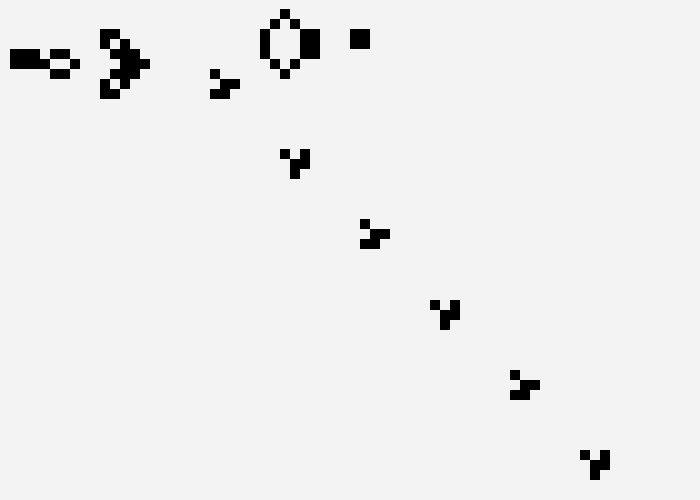
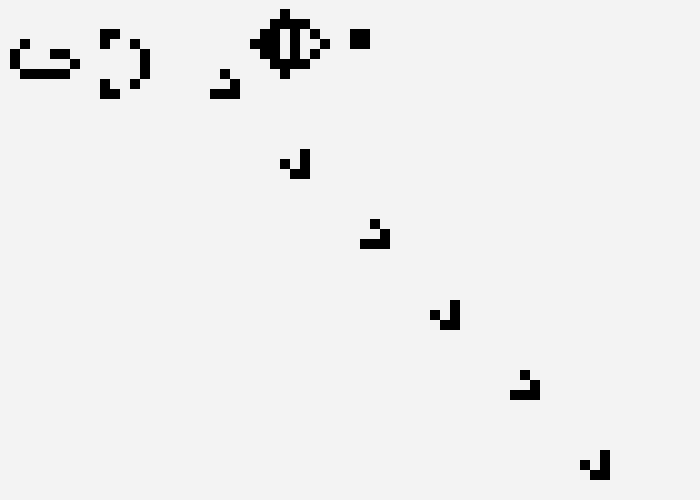
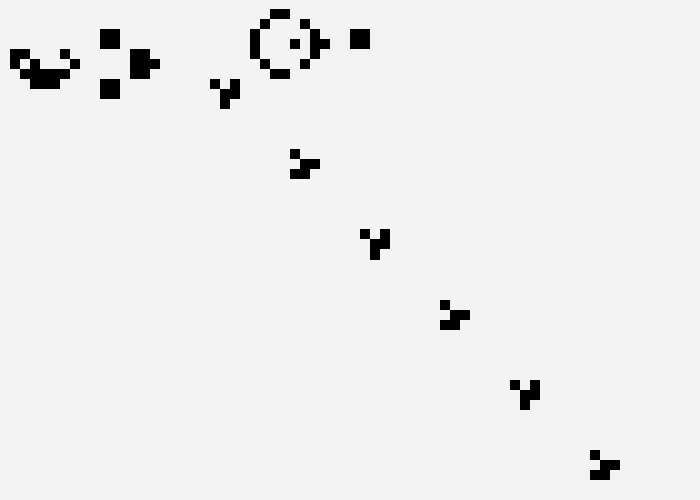
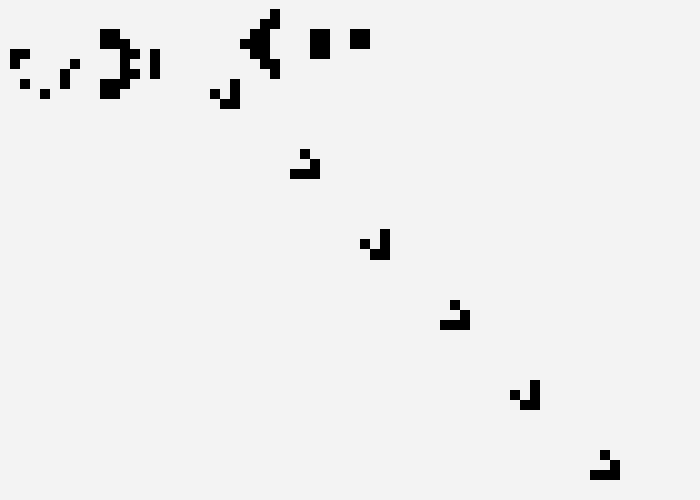
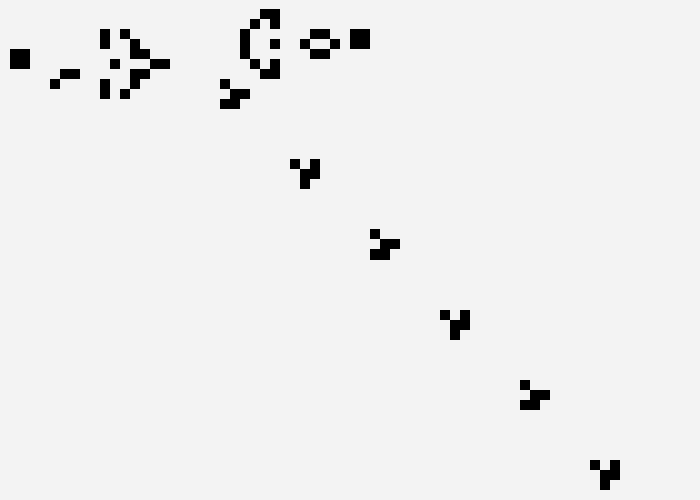
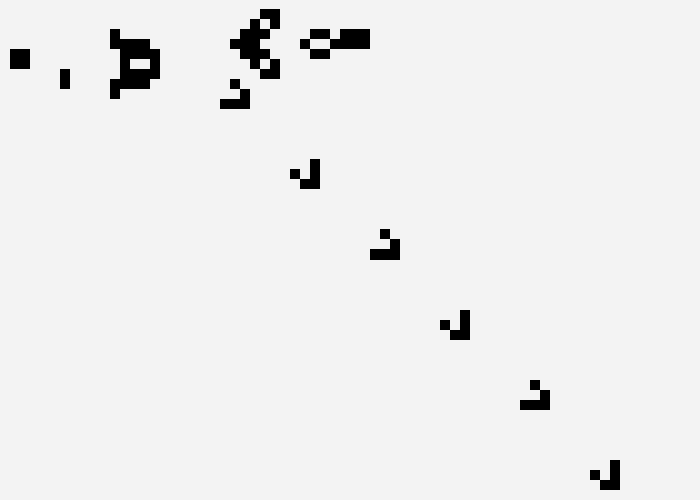
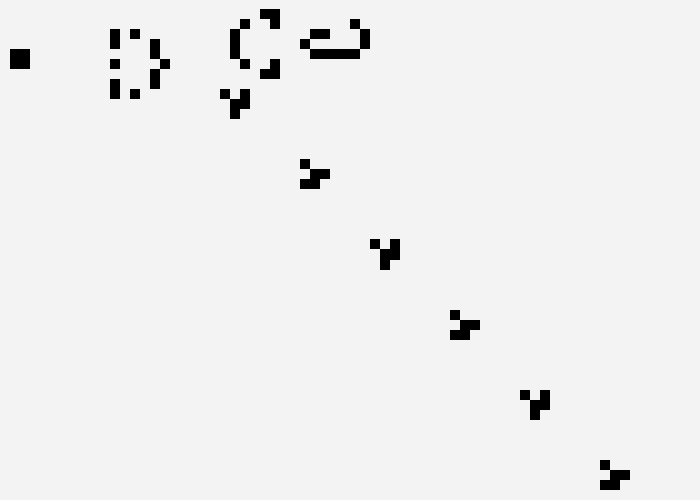
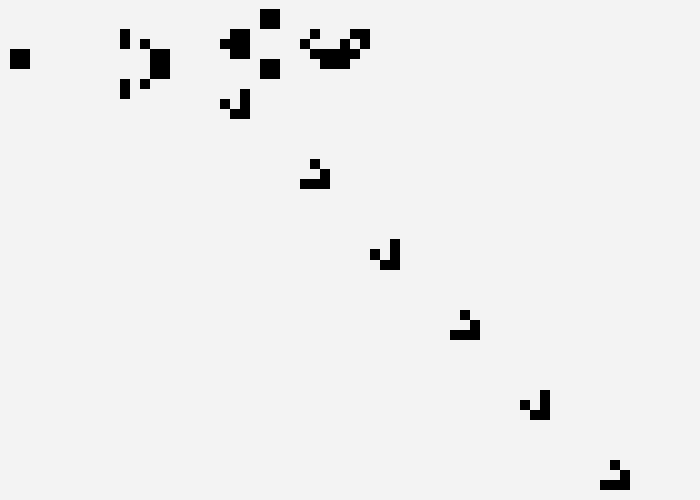
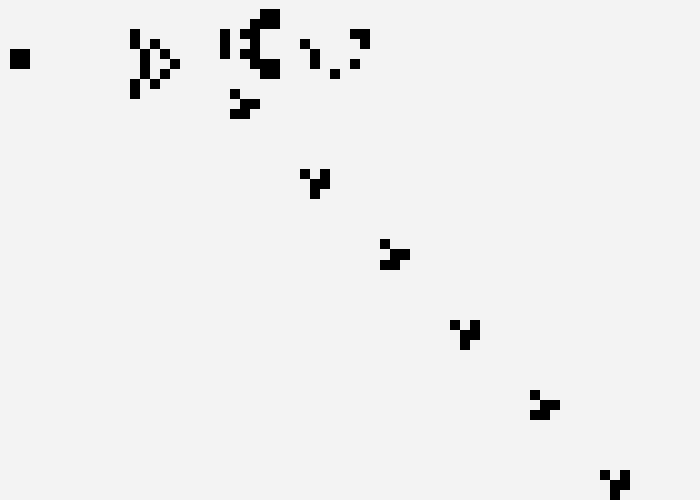
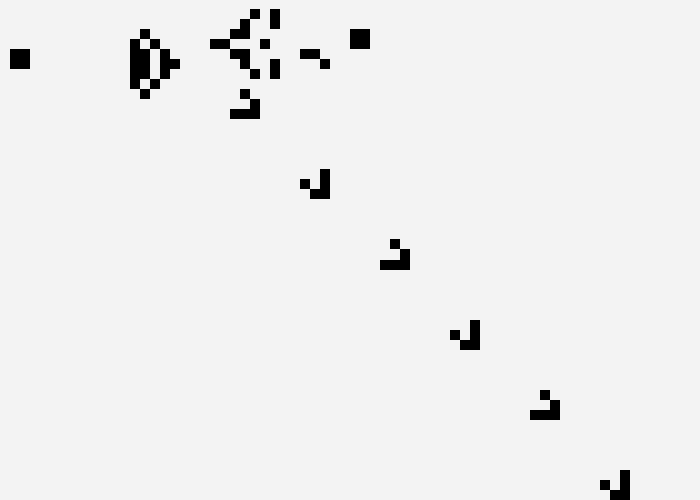
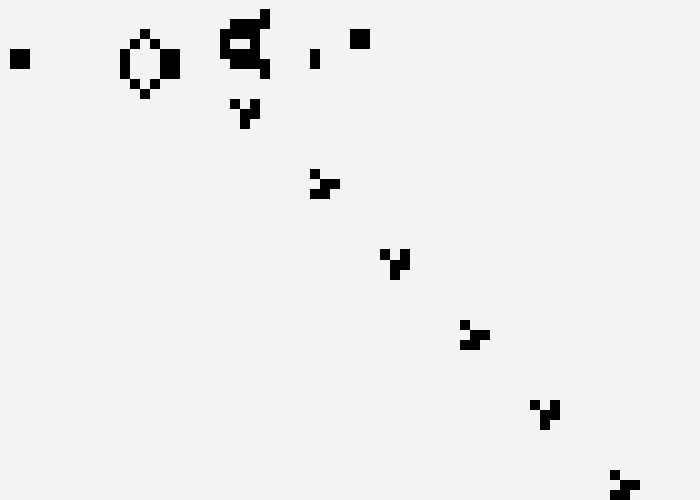
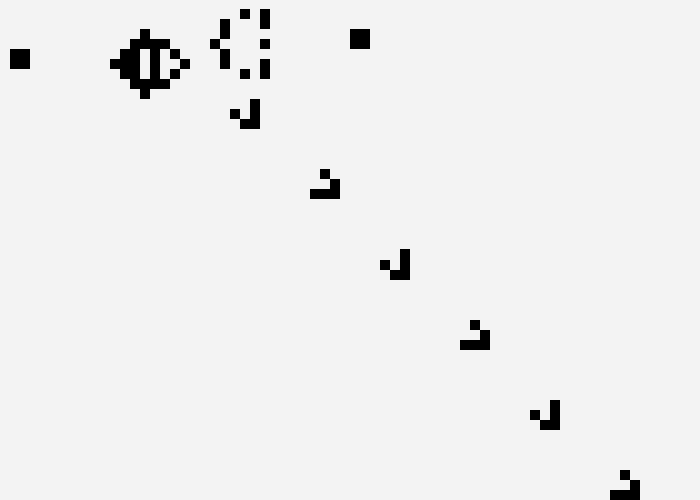
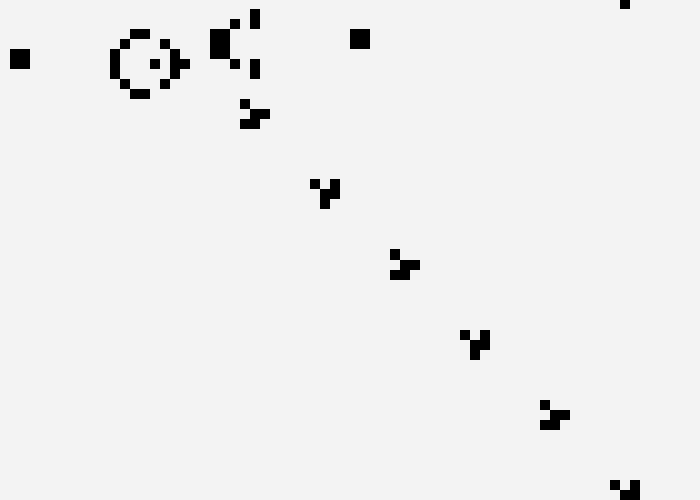
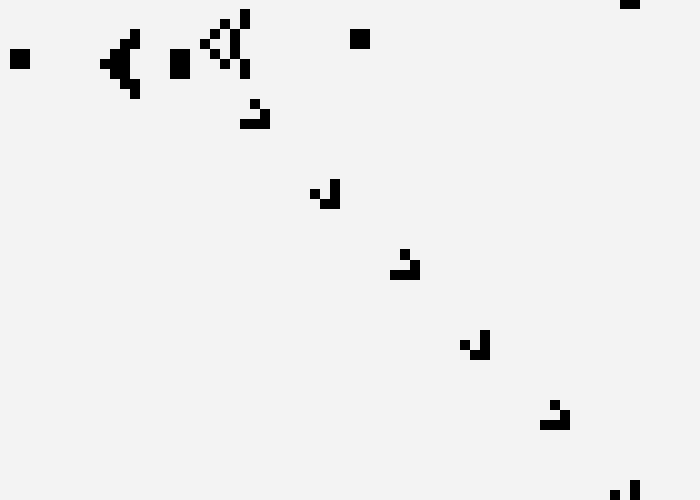
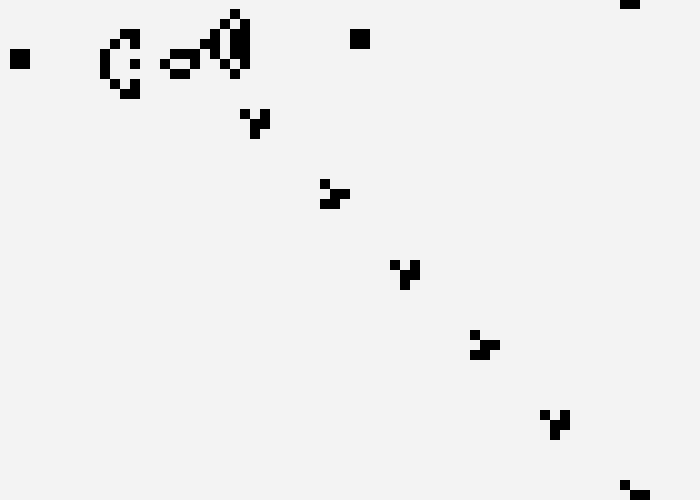
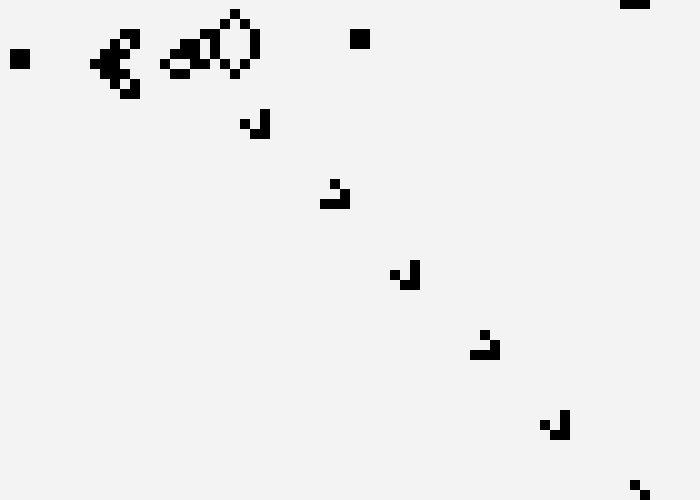
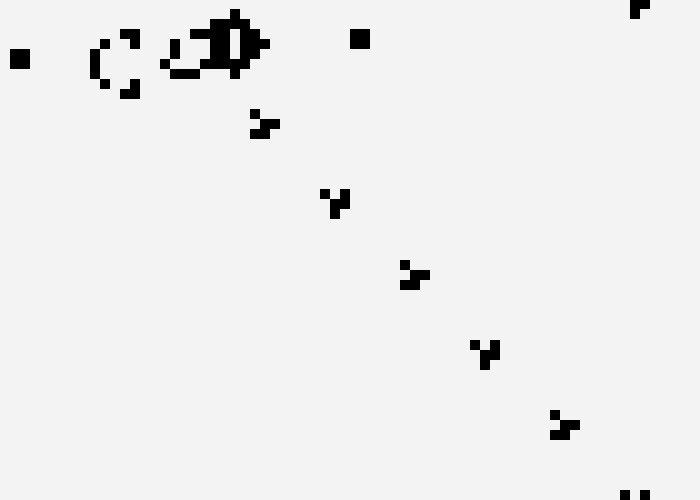
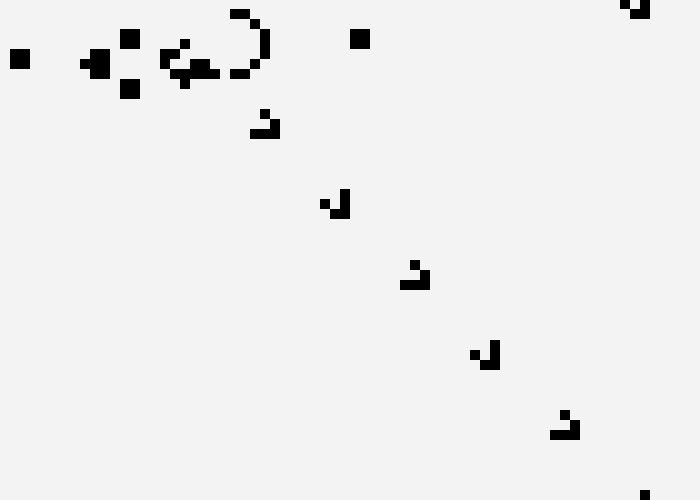
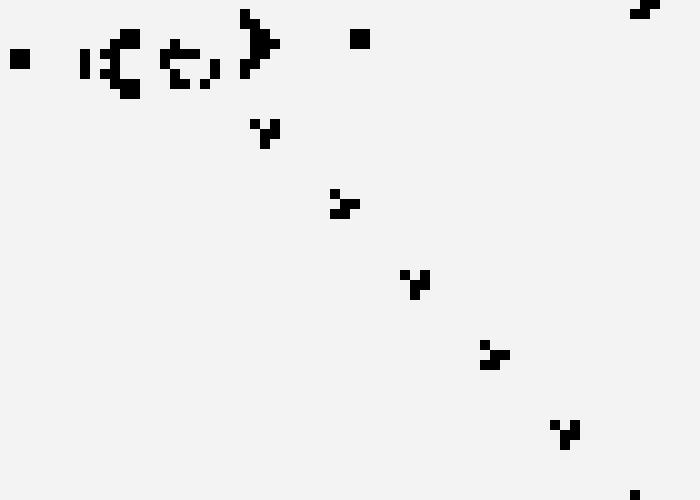
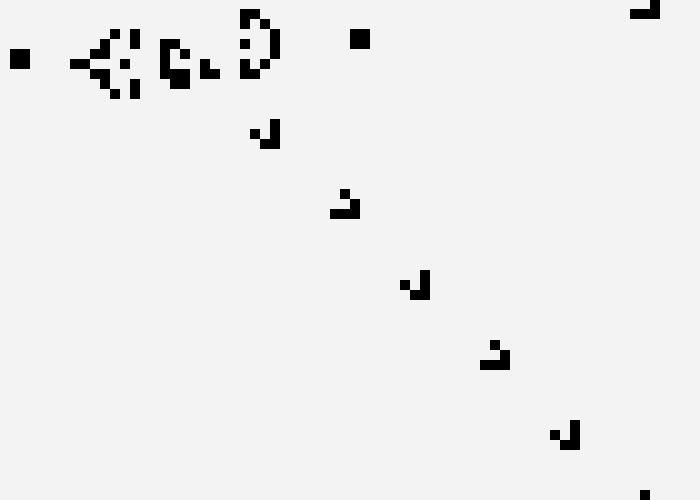
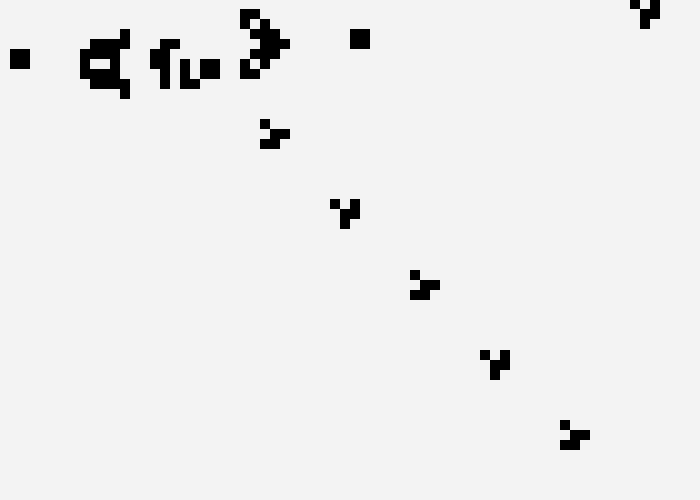
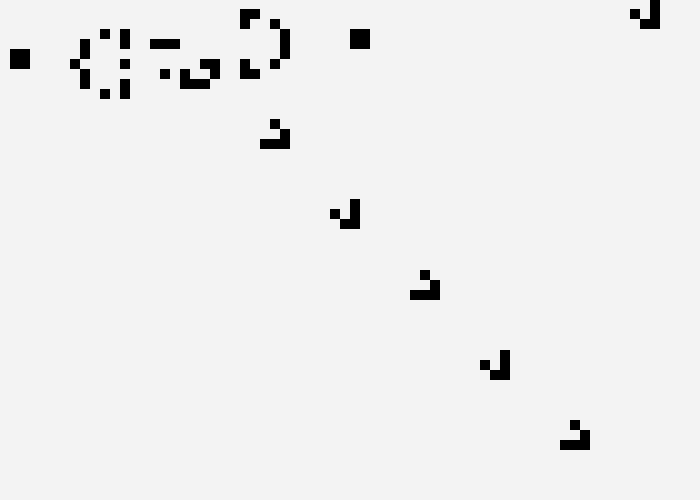
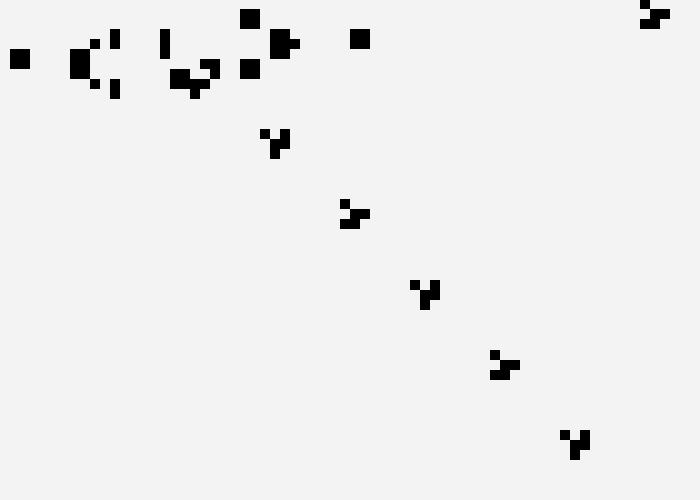
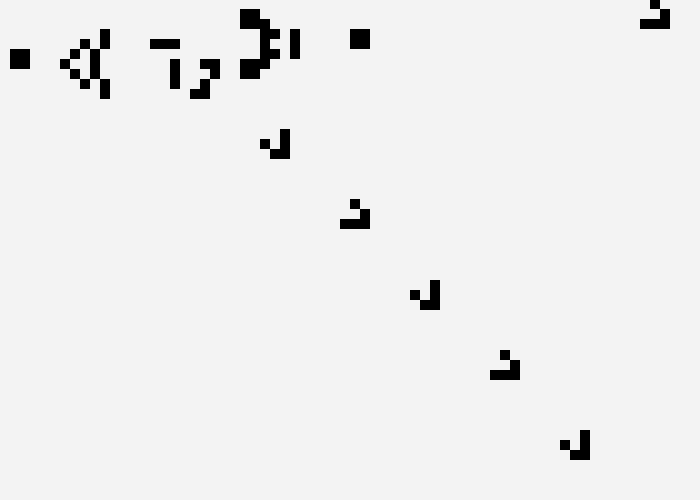
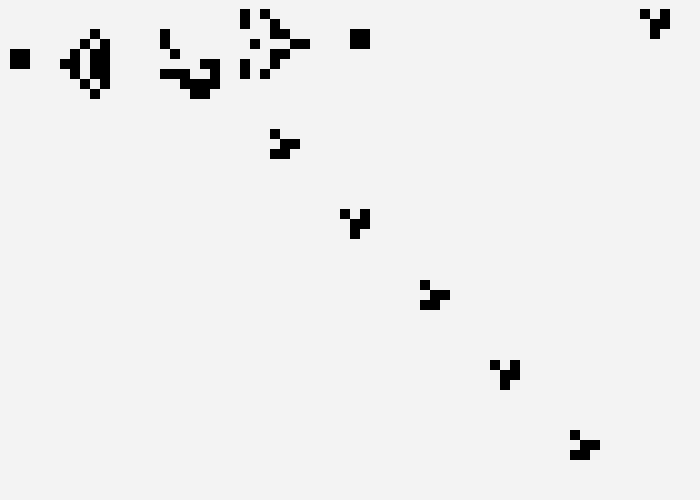
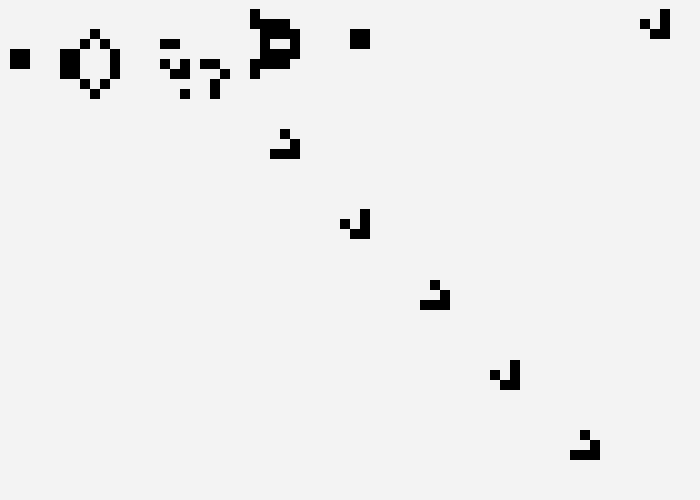
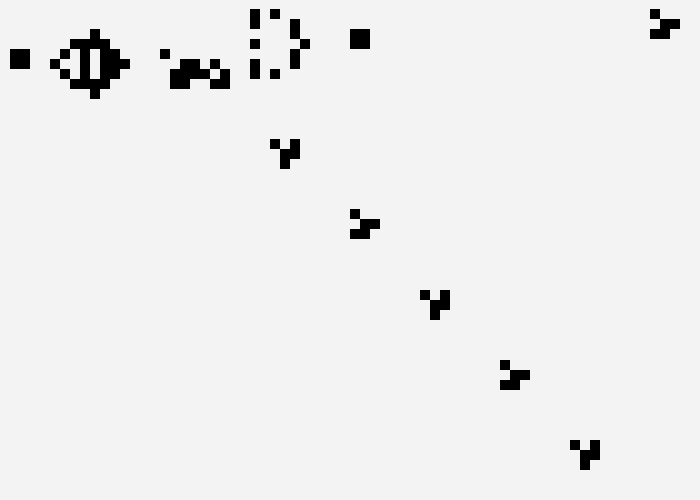
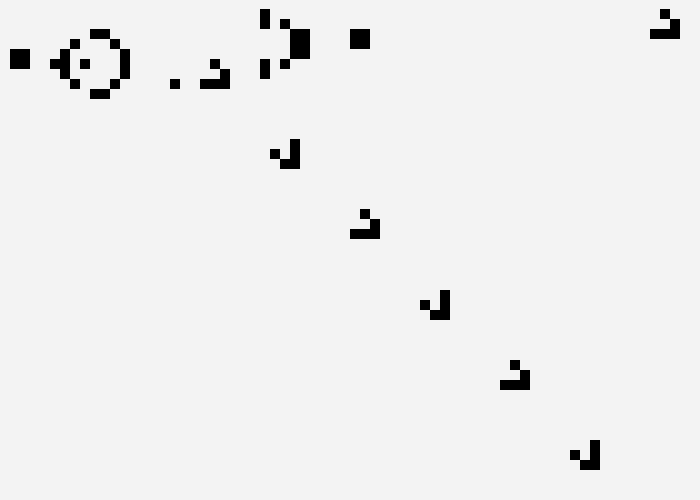
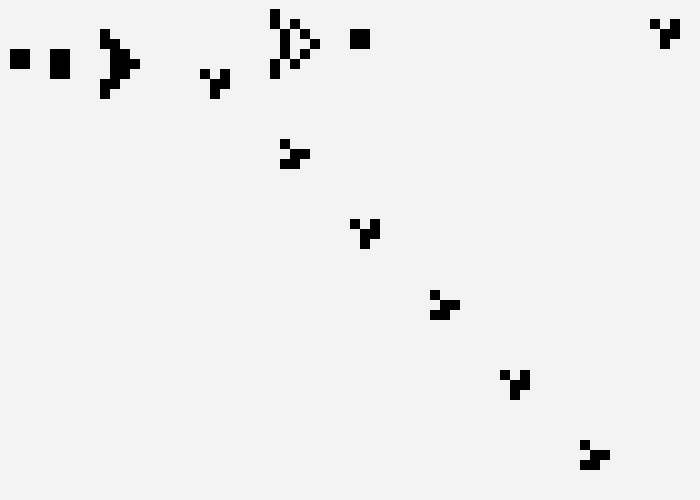
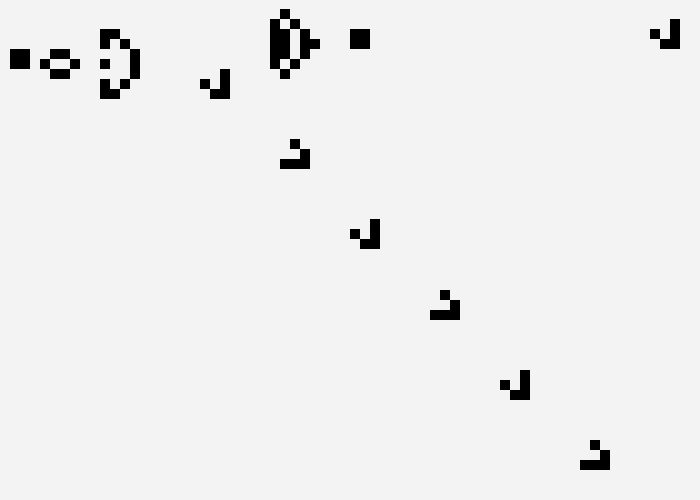
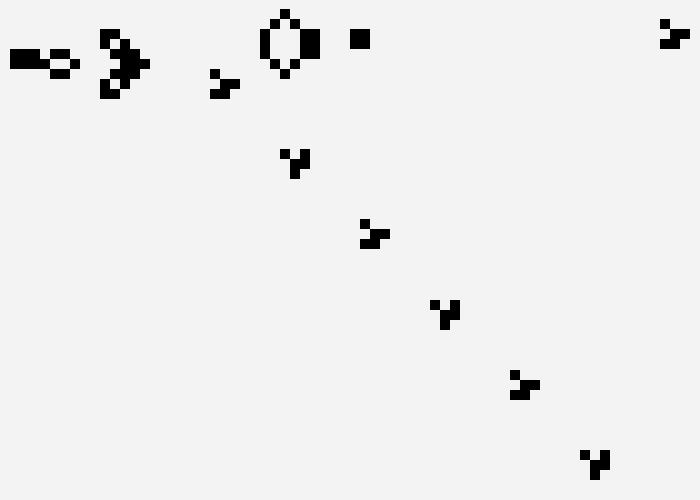
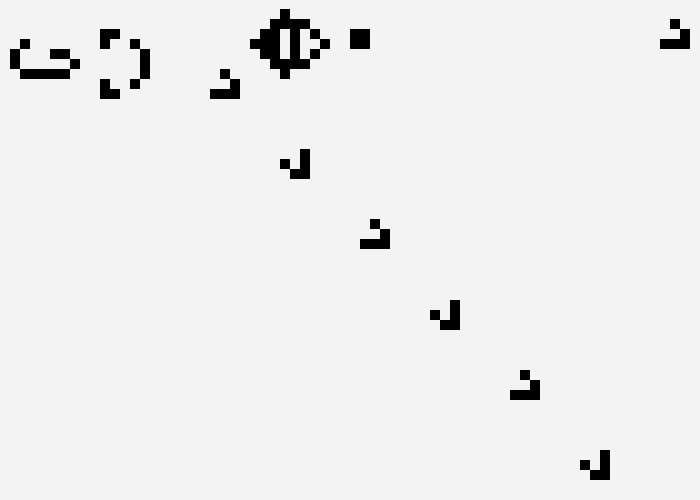
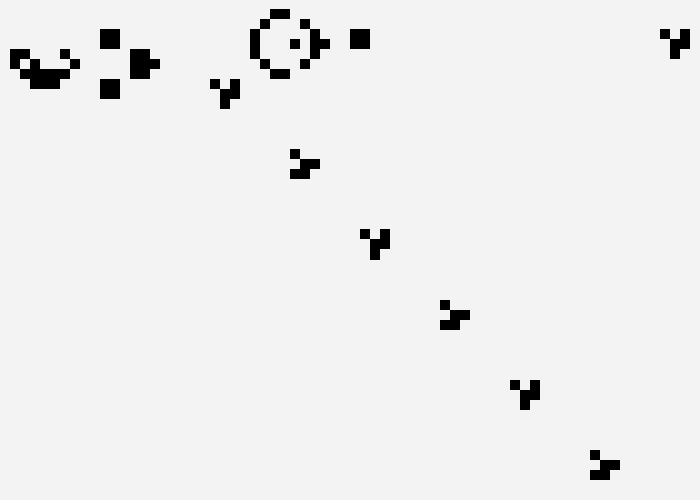
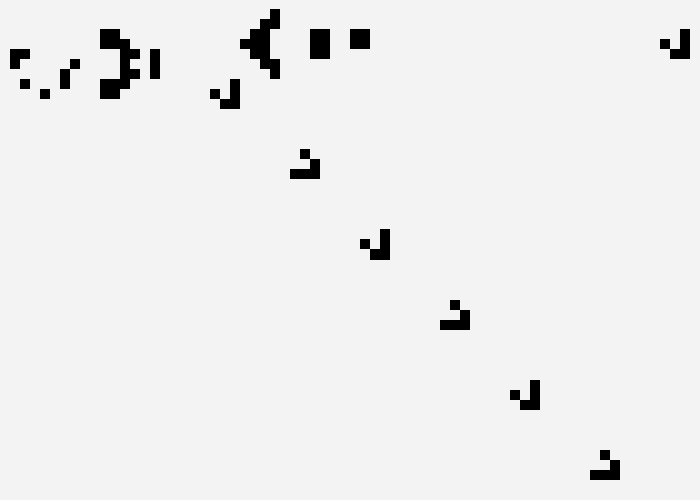
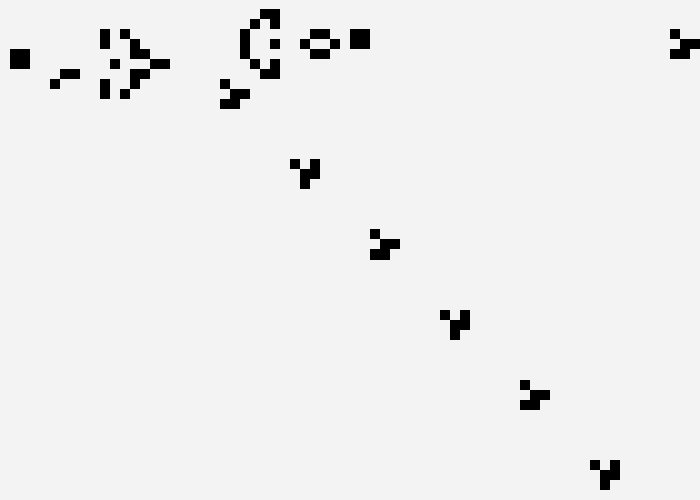
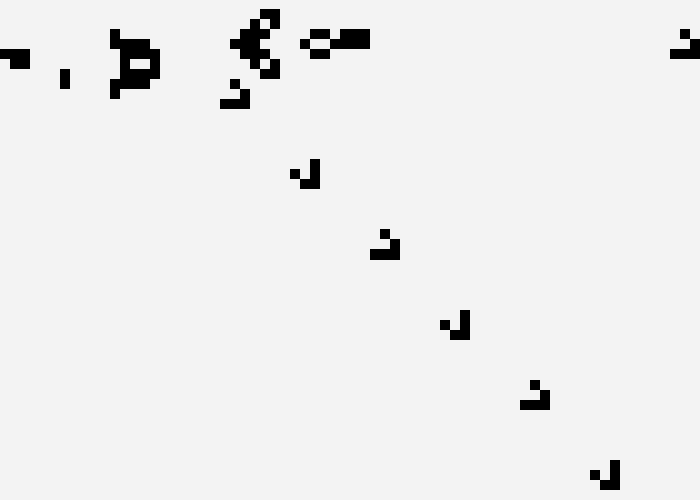
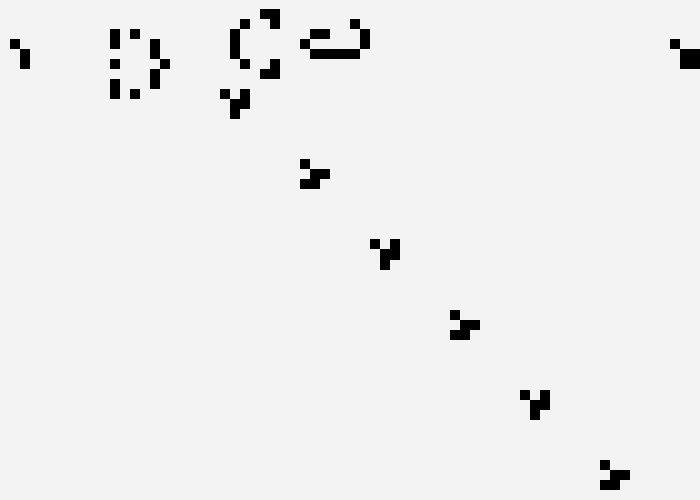
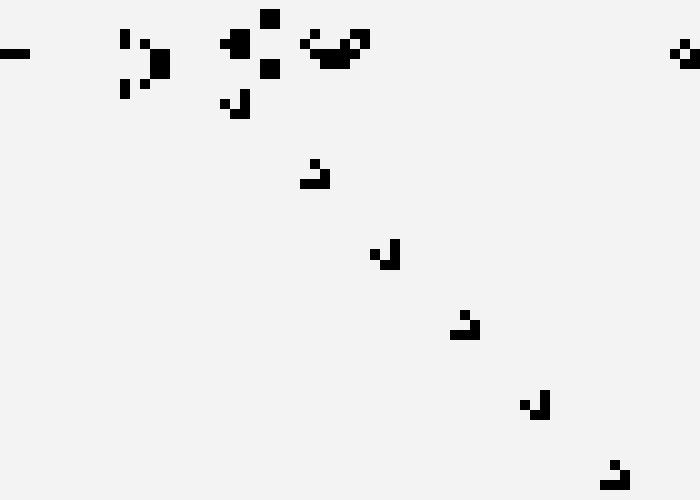
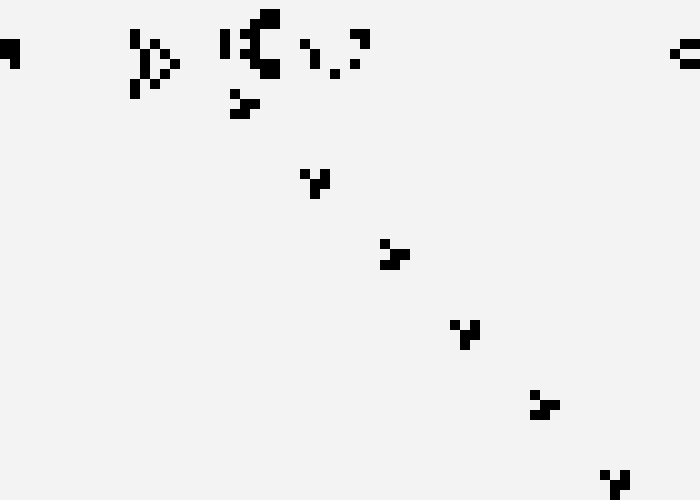
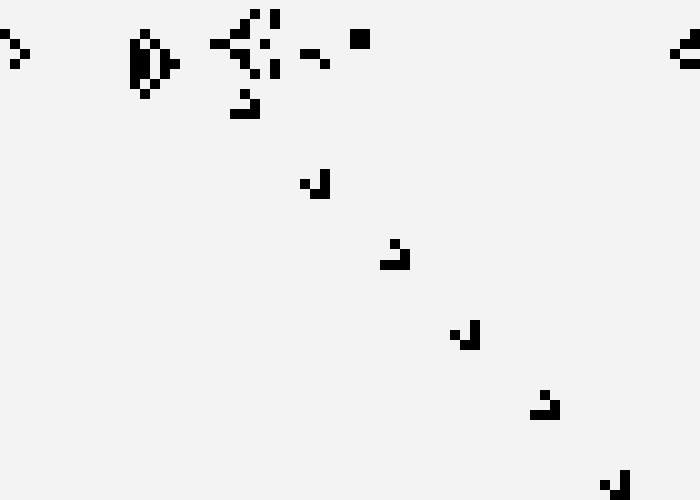
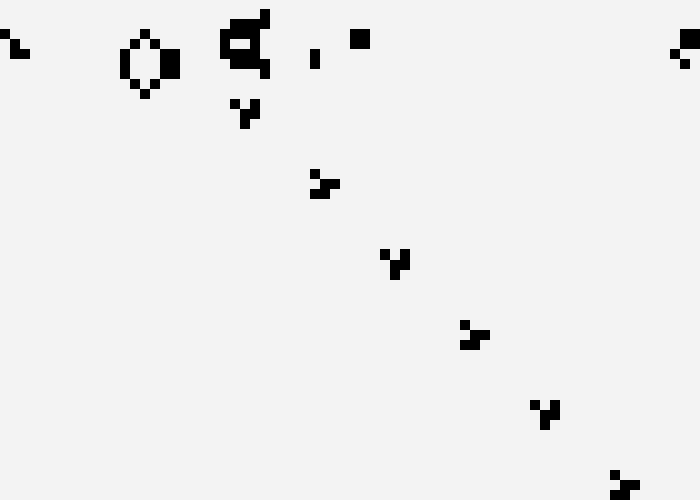
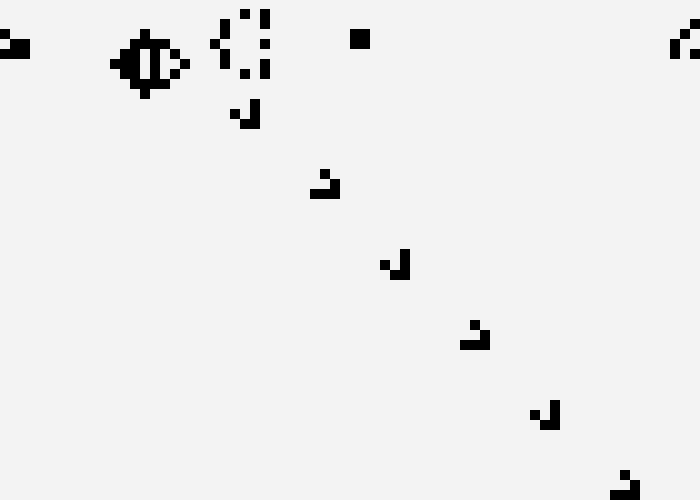
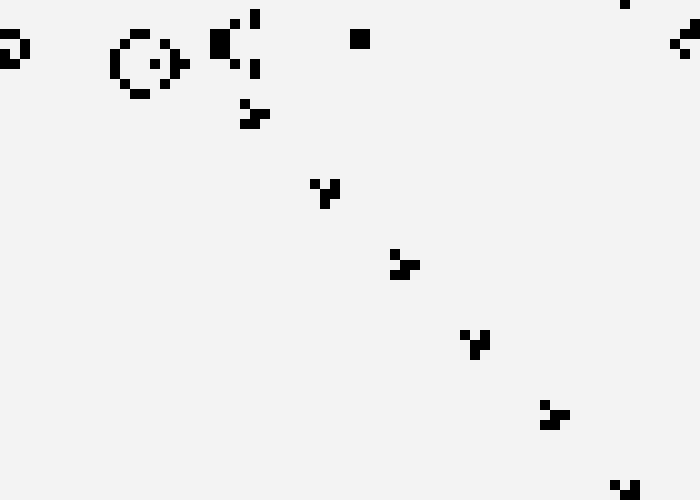
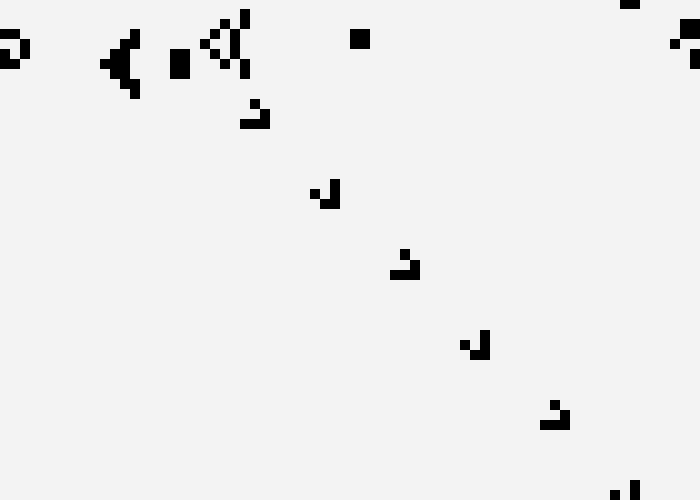
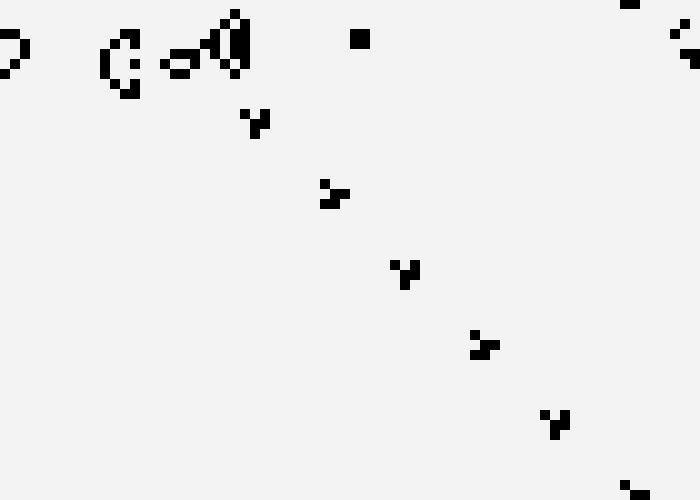
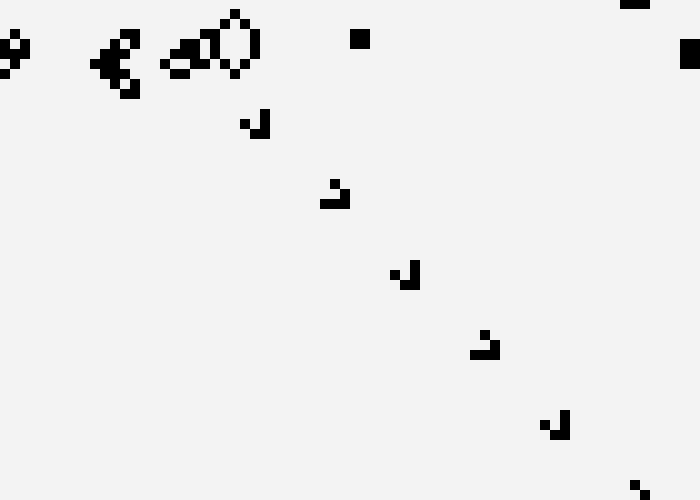
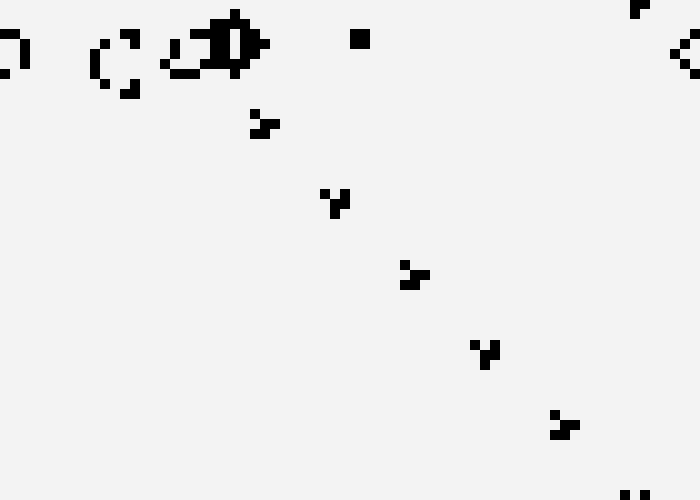
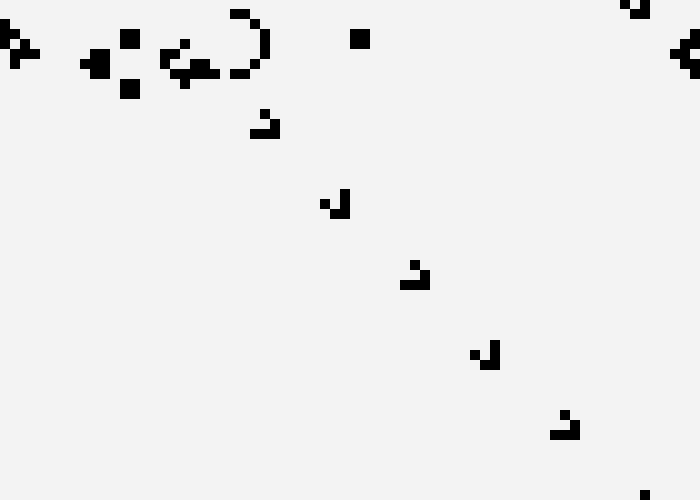
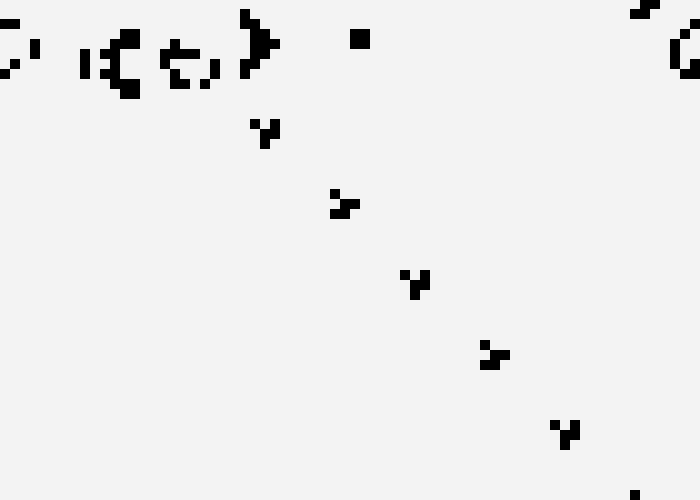
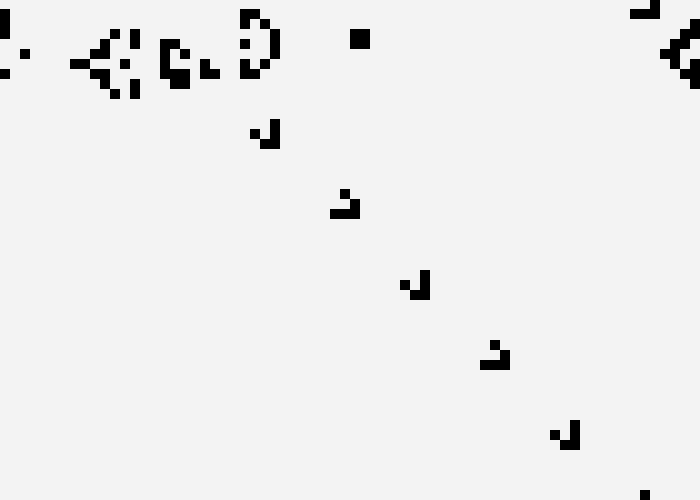
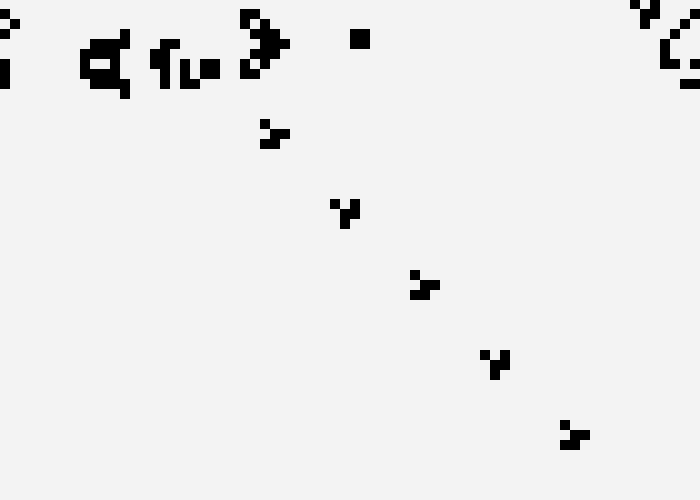
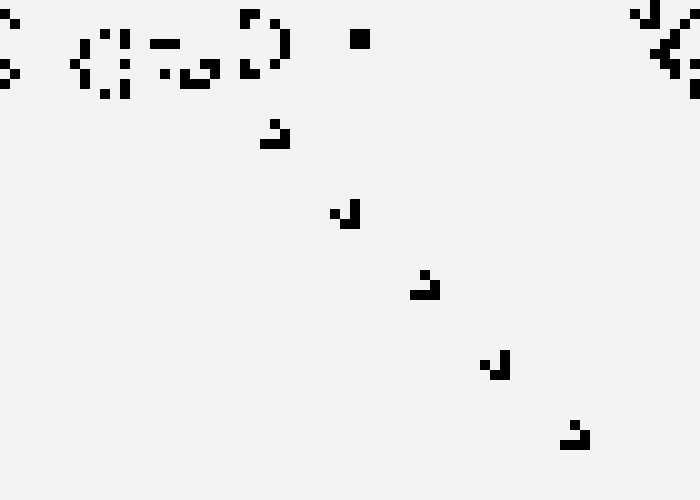
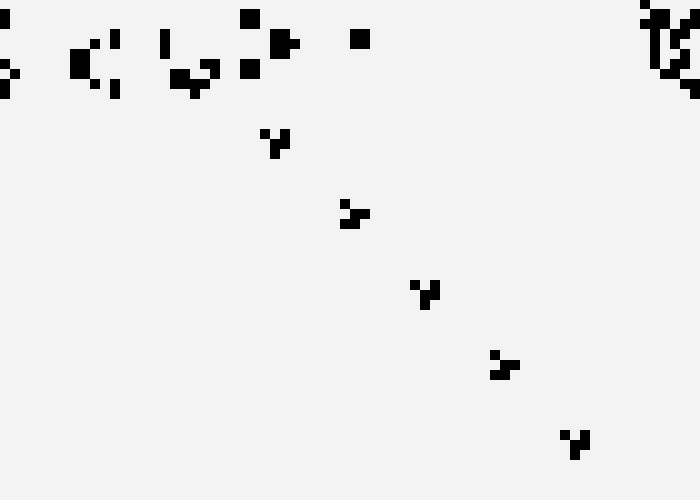
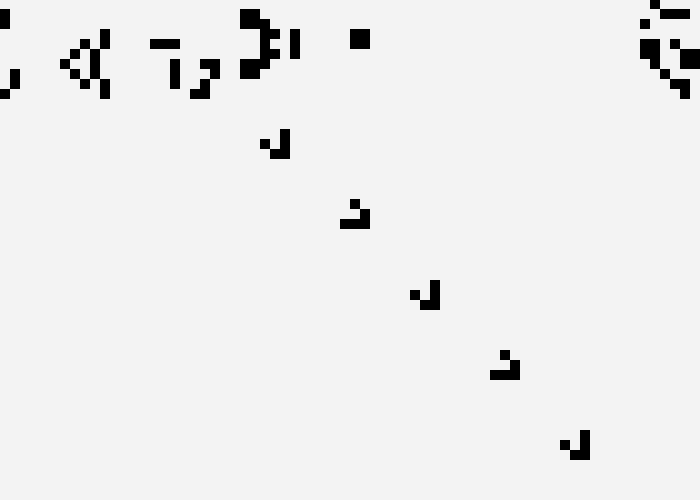
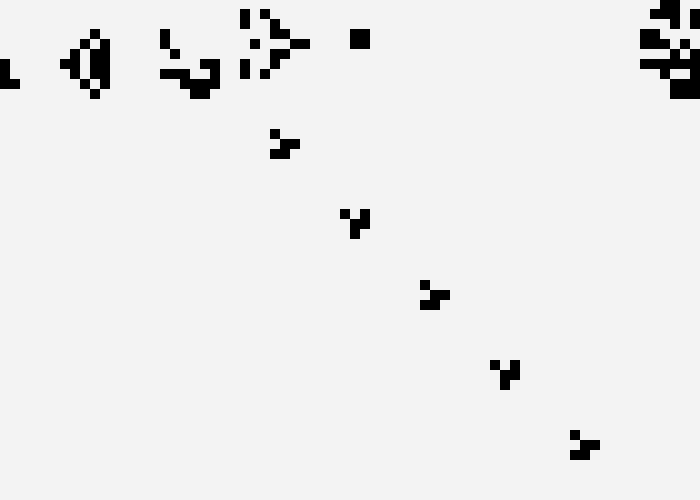
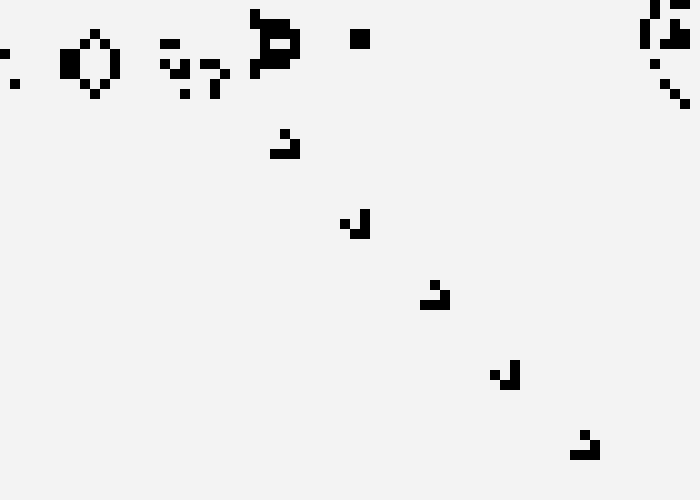
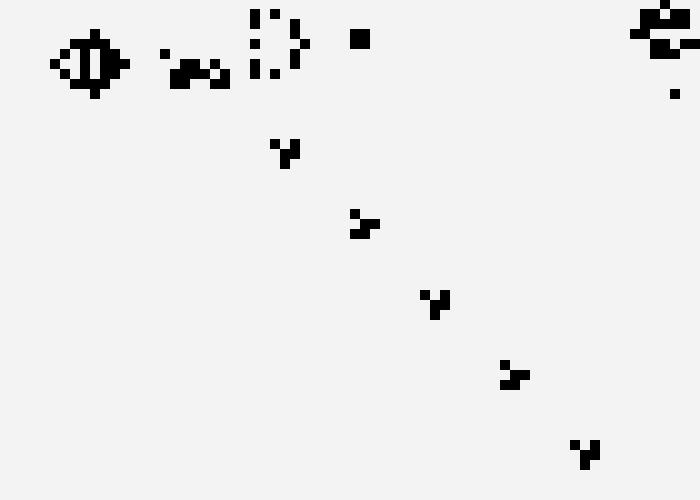
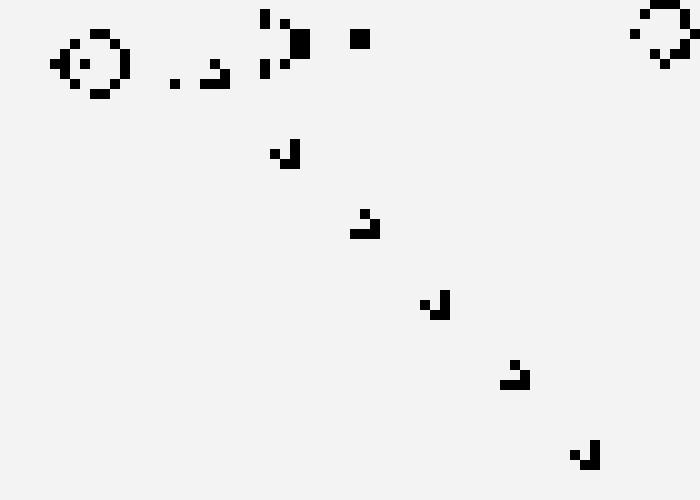
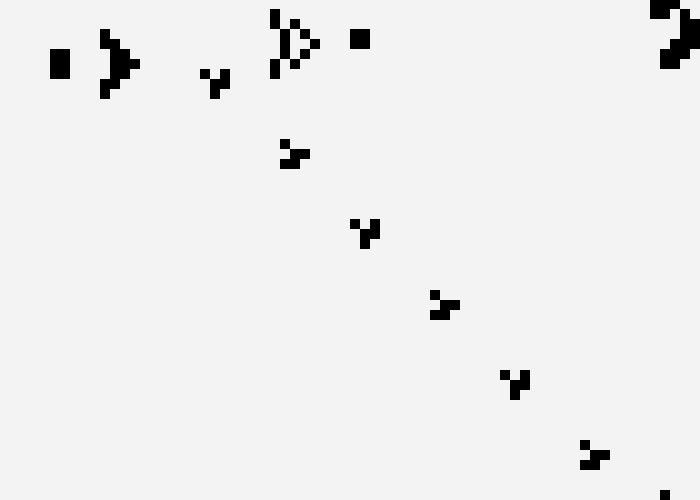
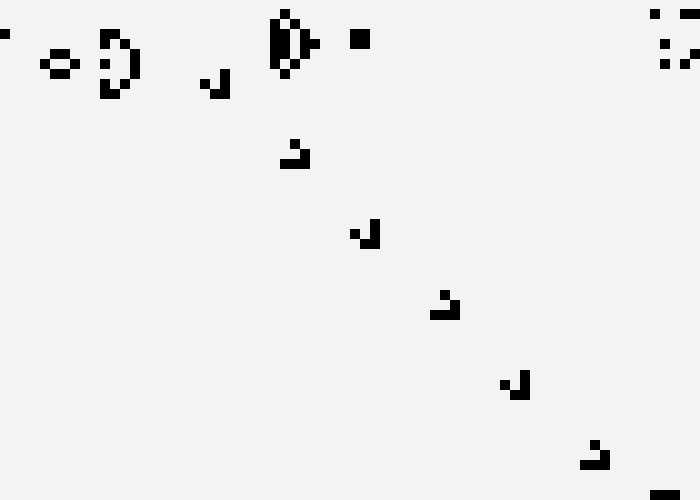
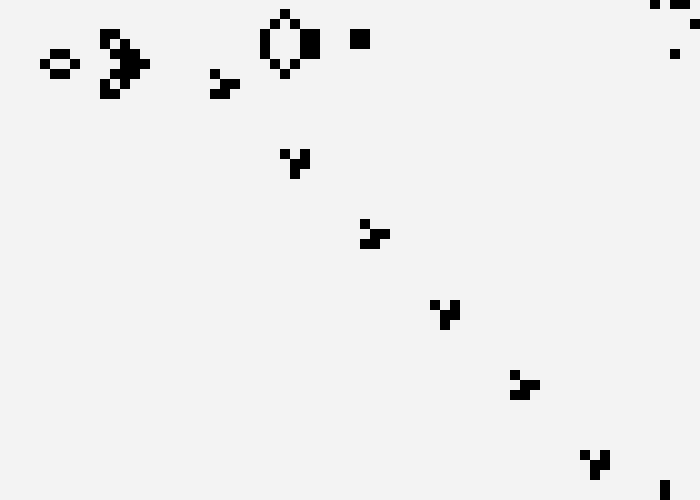
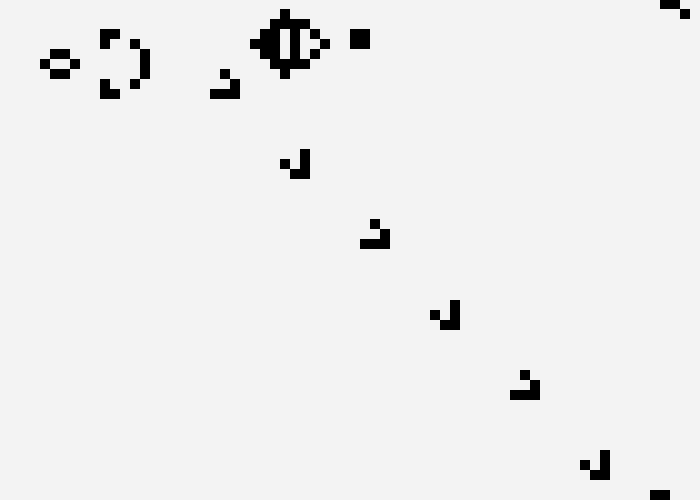
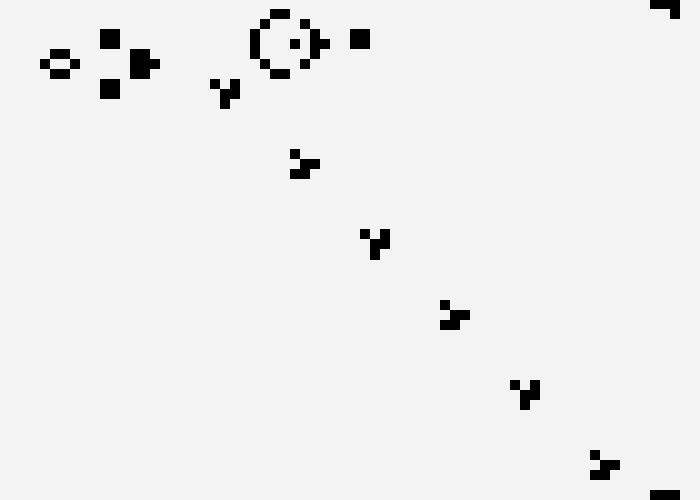
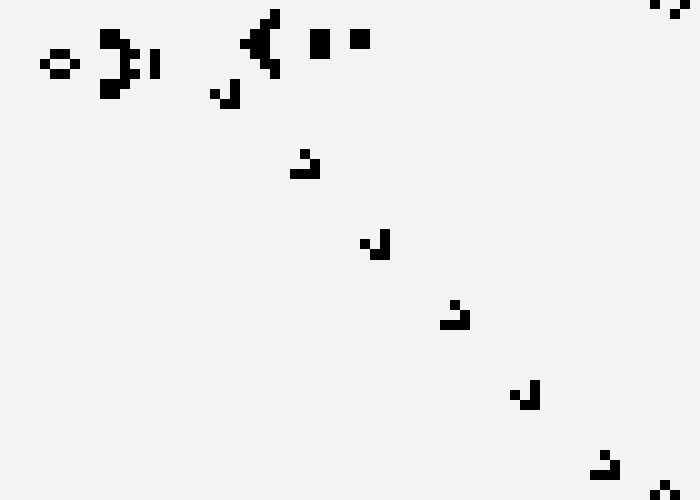
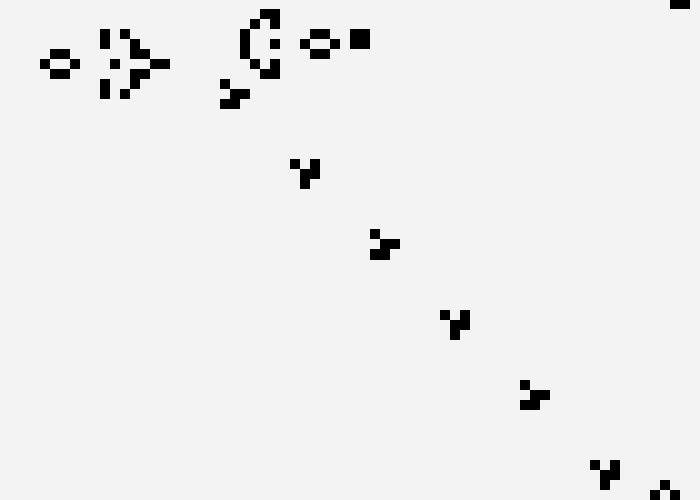
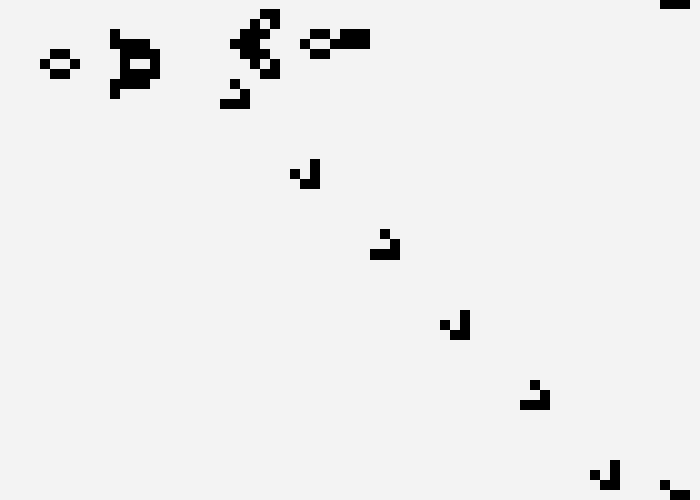
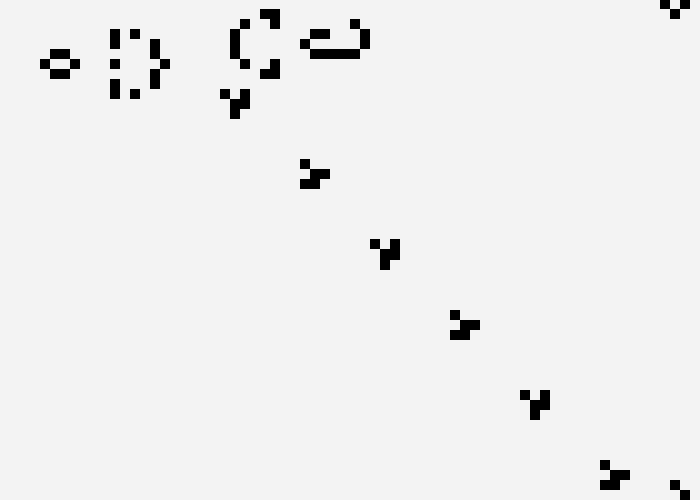
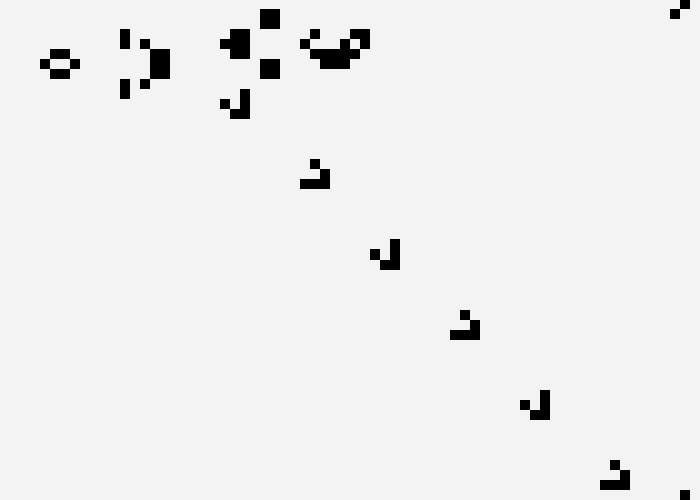
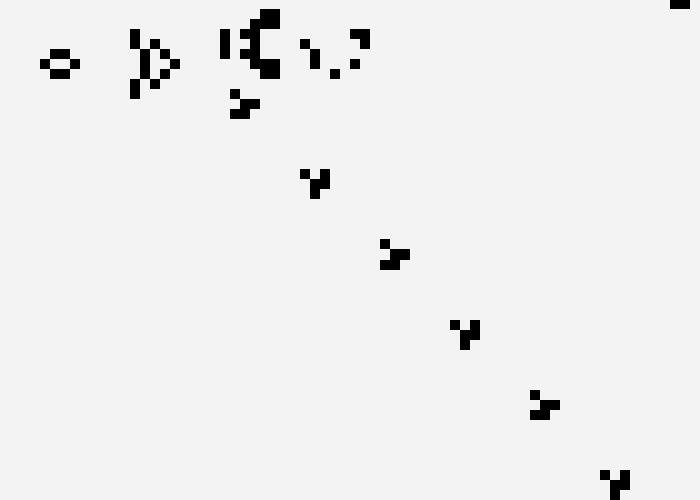
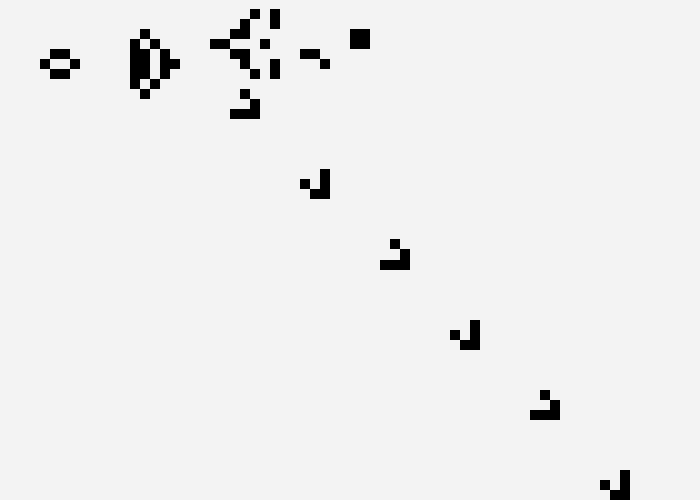
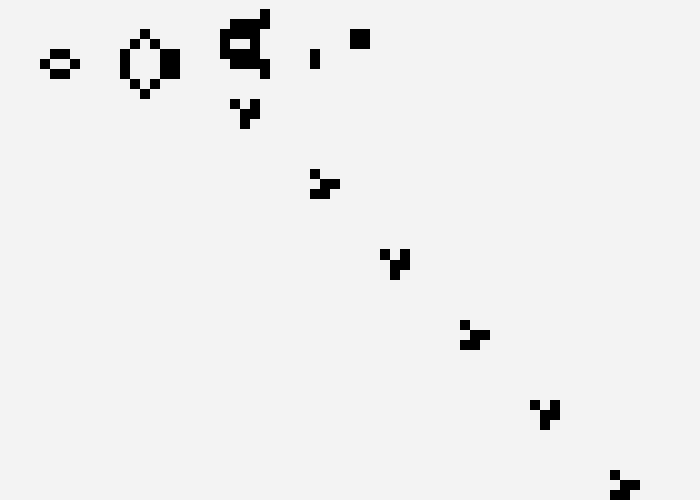
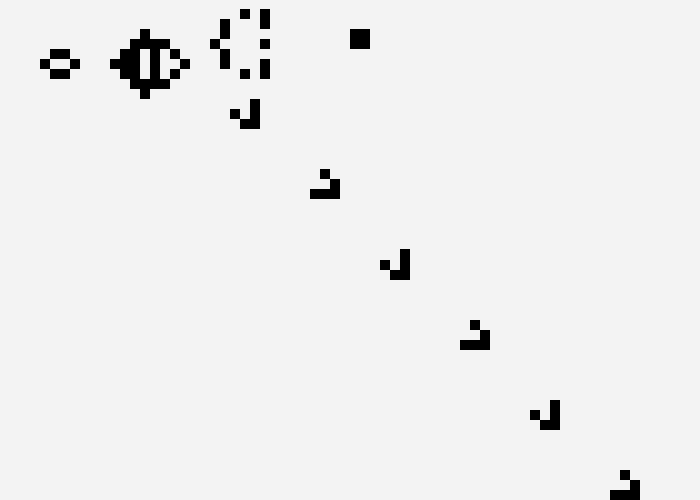
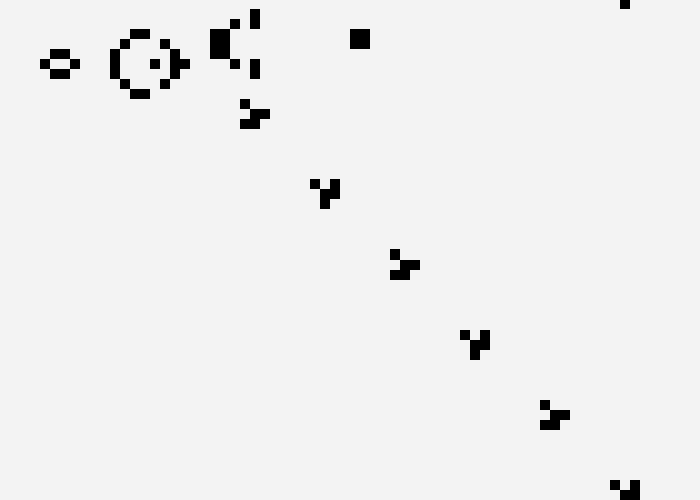
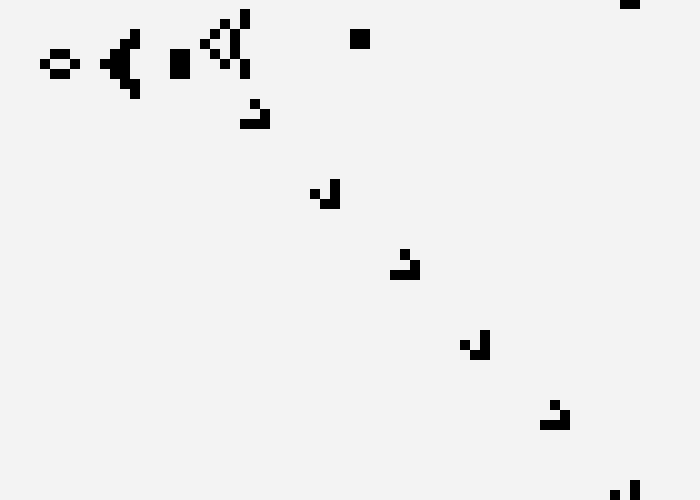
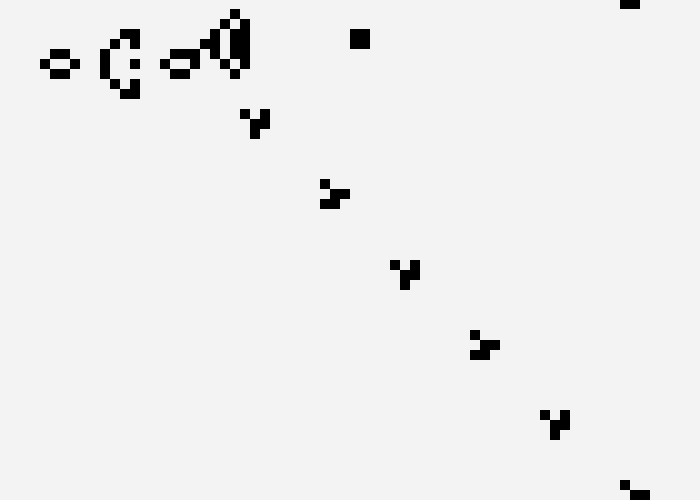
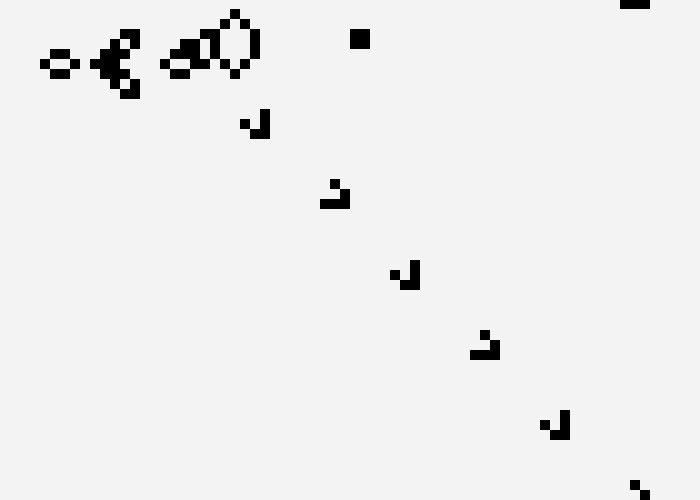
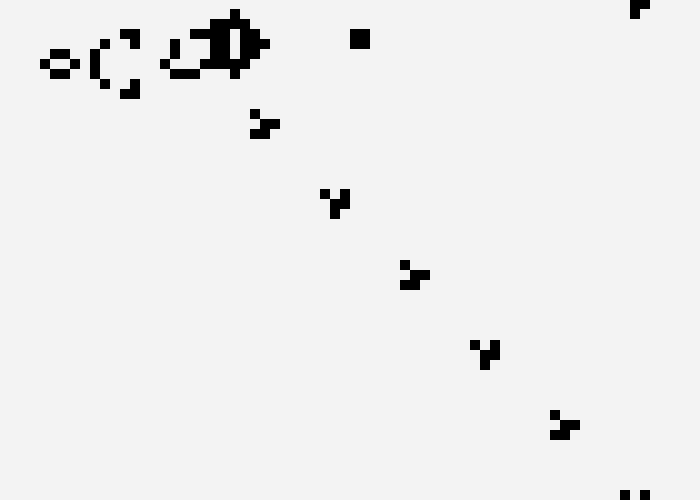
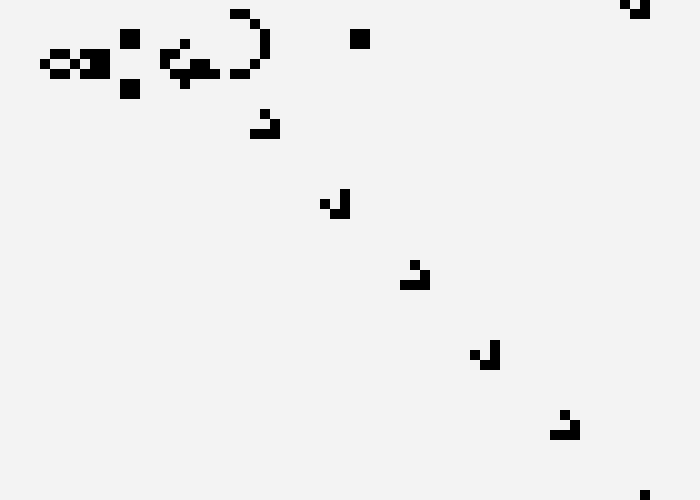
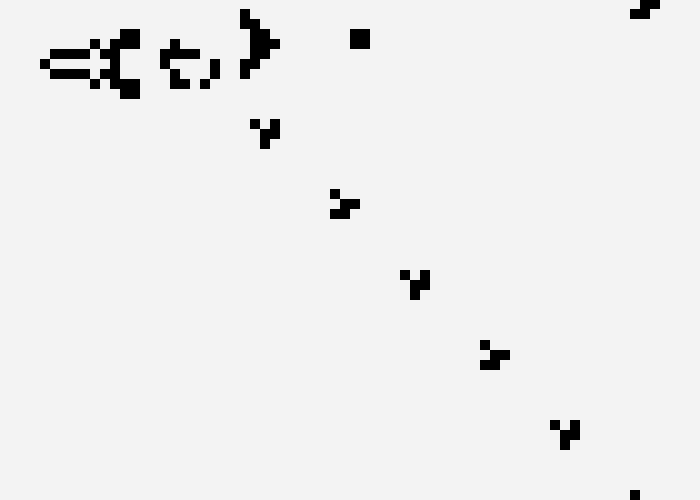
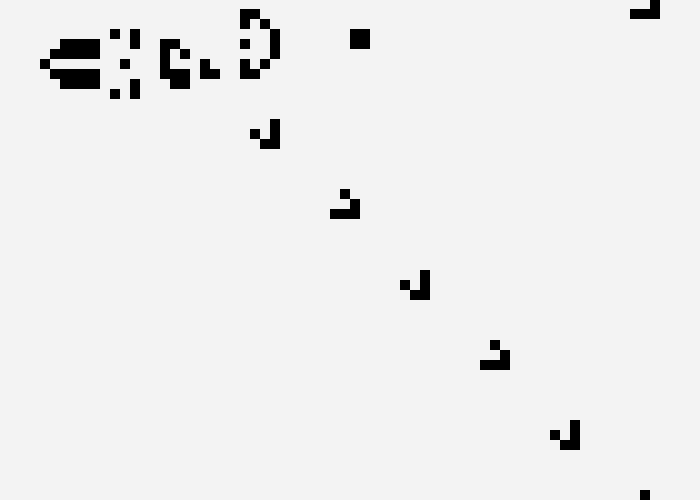
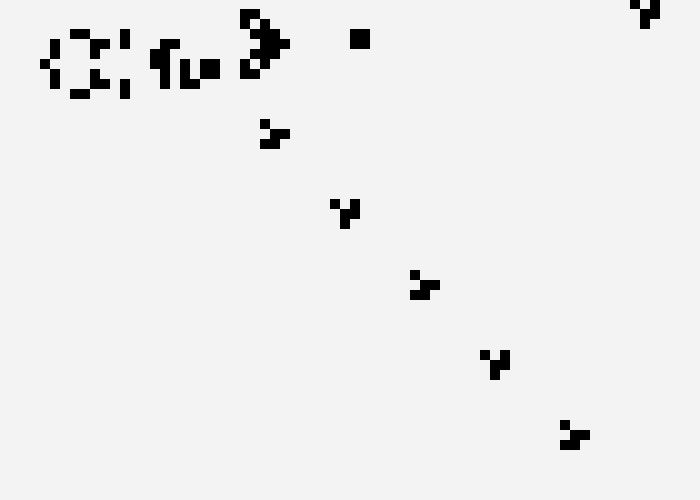
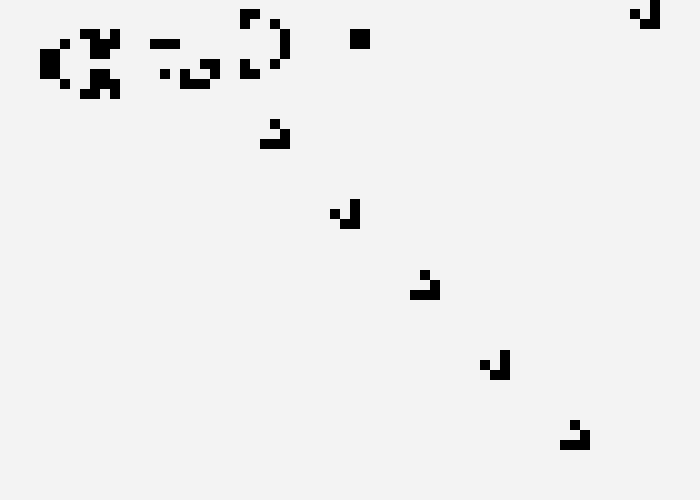

In [11]:
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((50, 70))
X[1:10,1:37] = glider_gun

life_animation(X, dpi=15, frames=250, interval=50, mode='once')

### Diehard


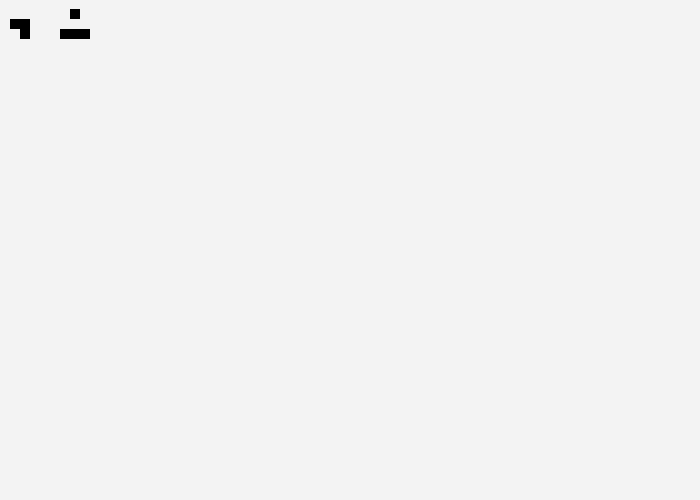
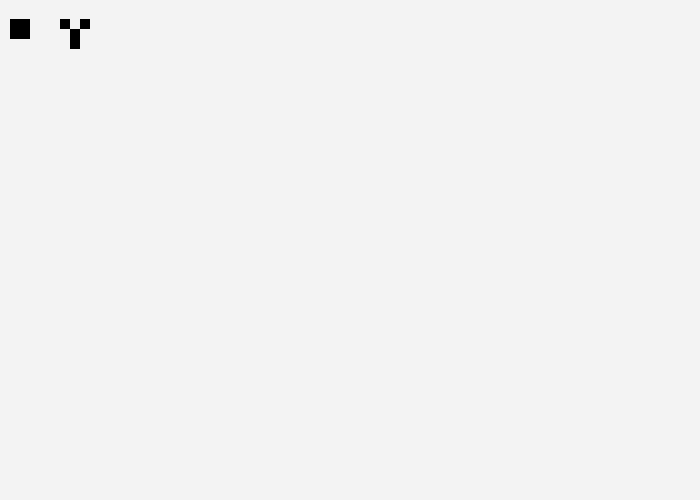
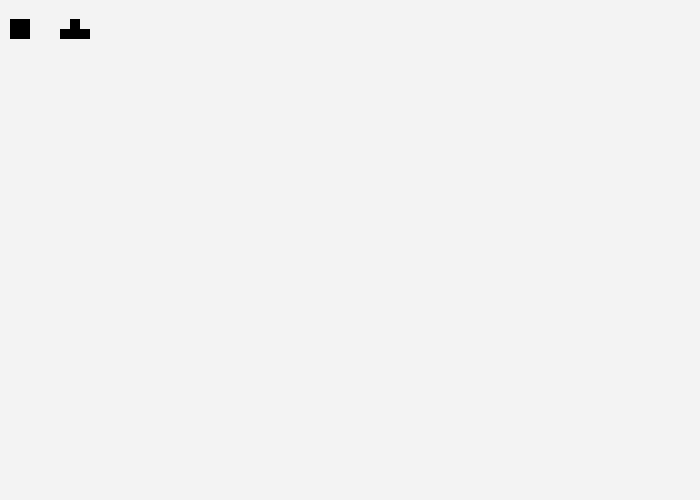
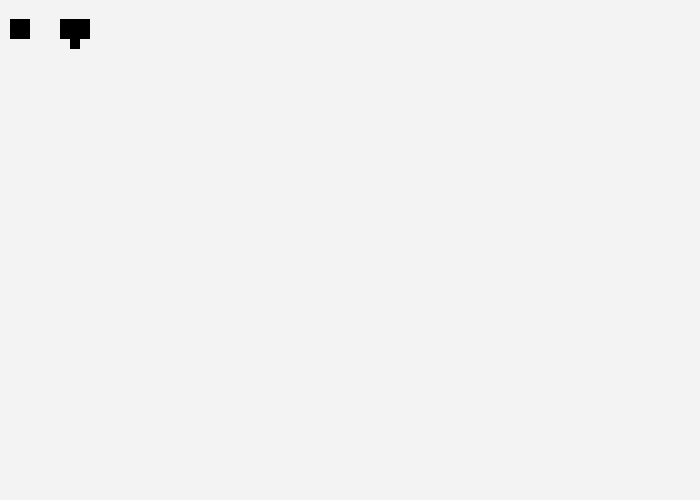
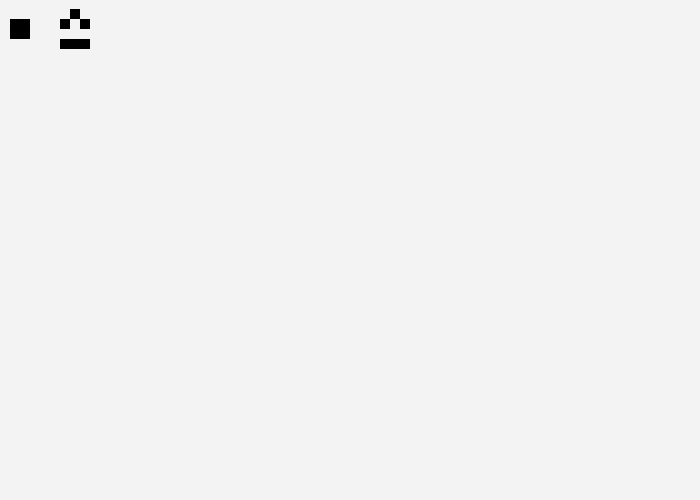
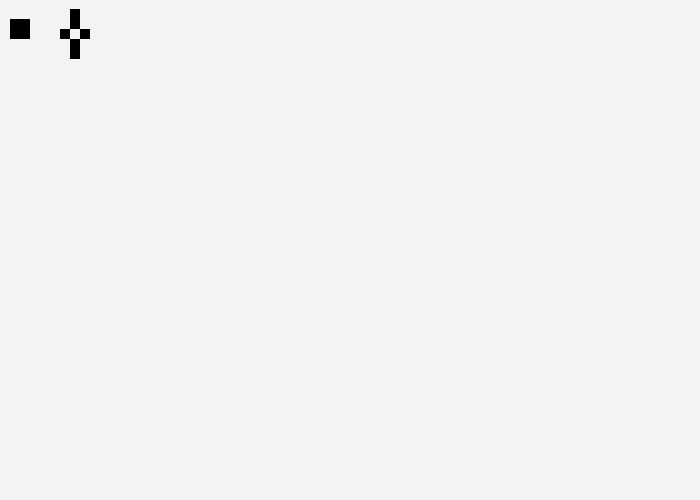
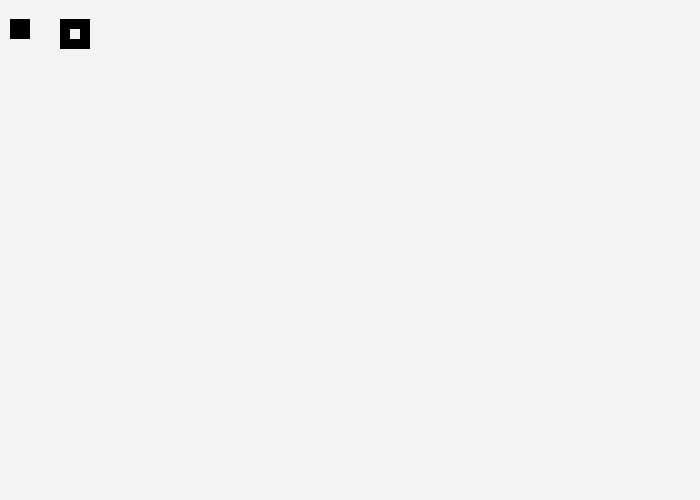
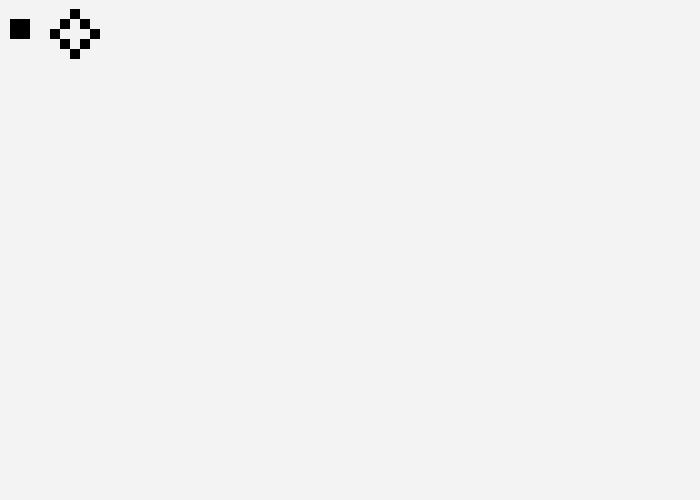
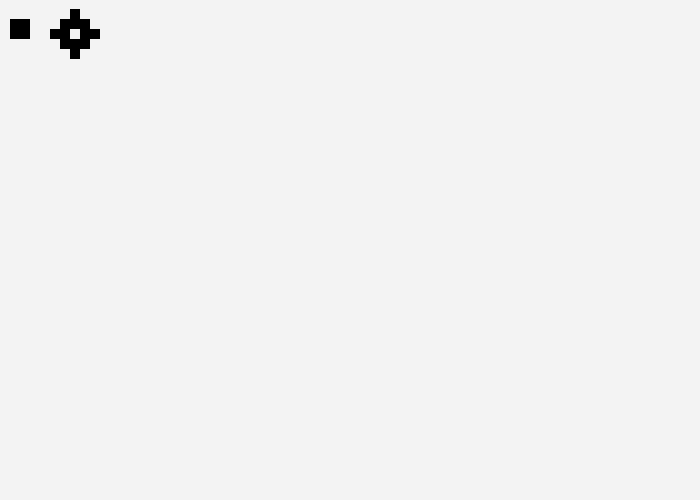
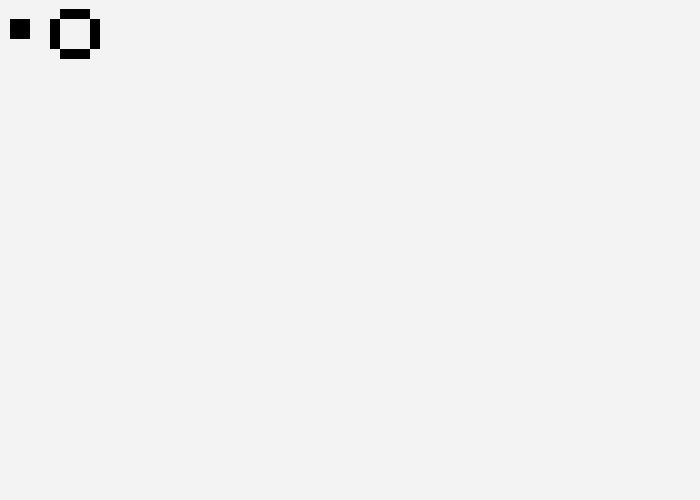
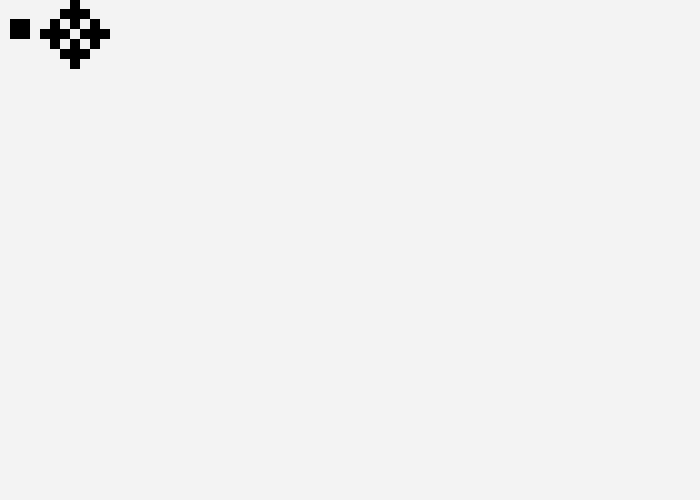
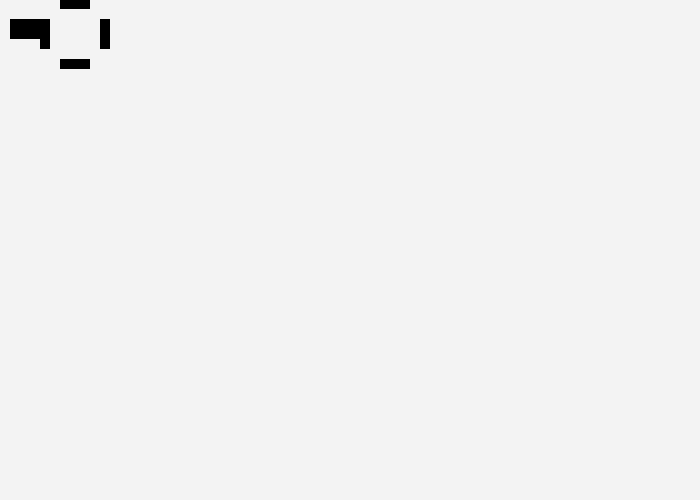
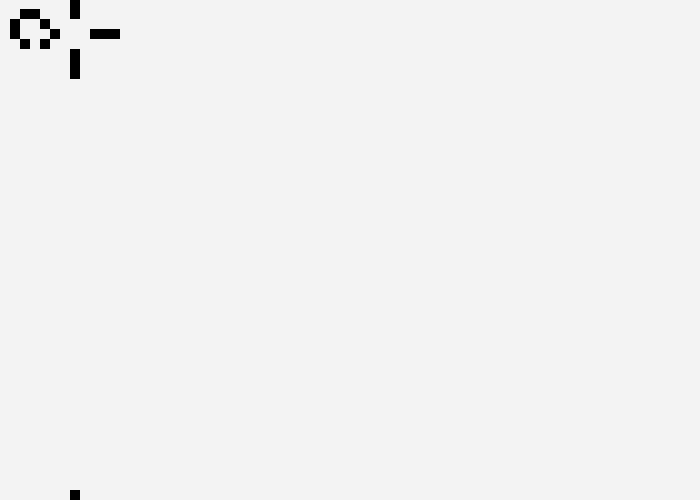
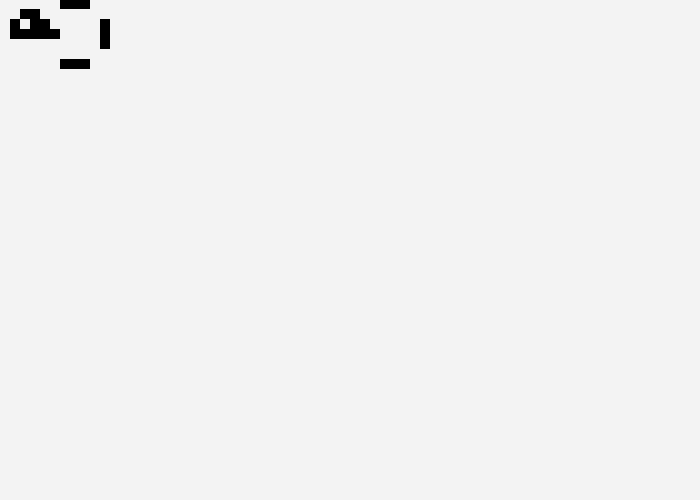
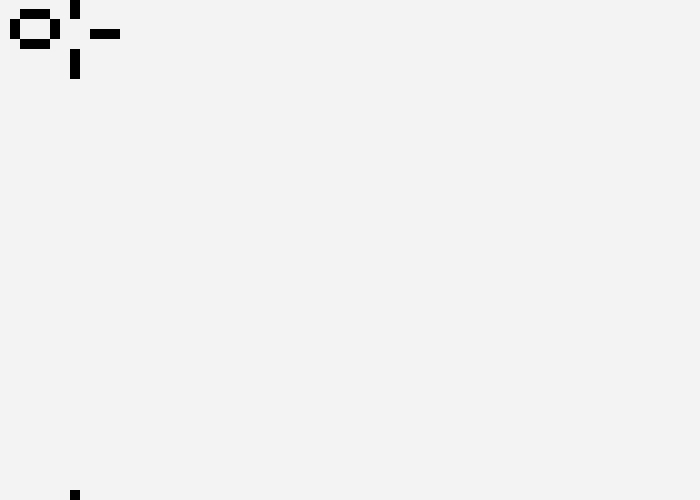
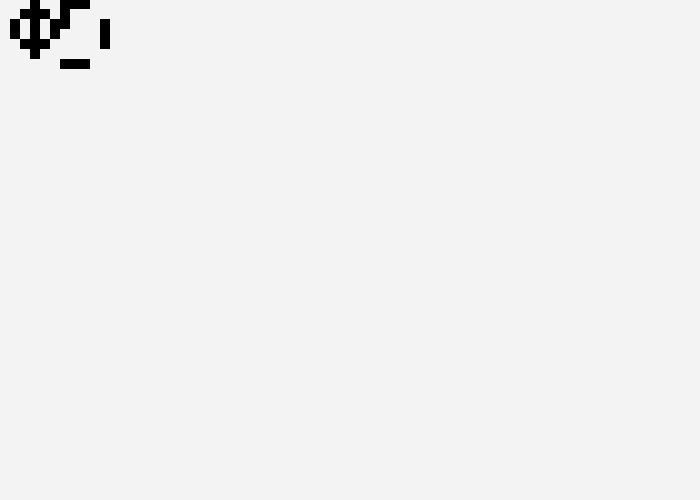
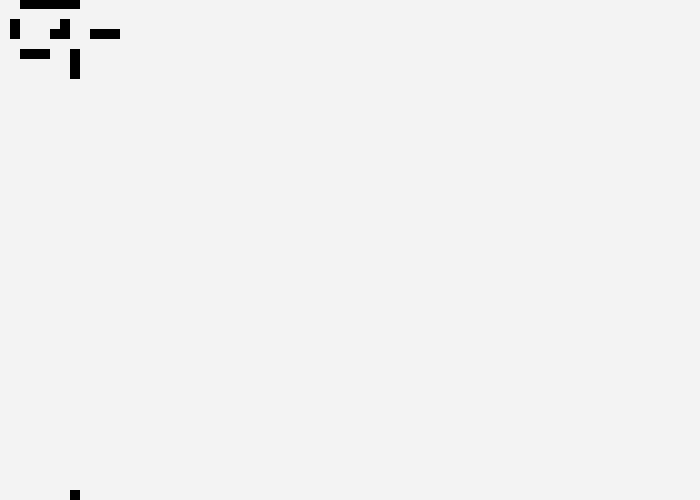
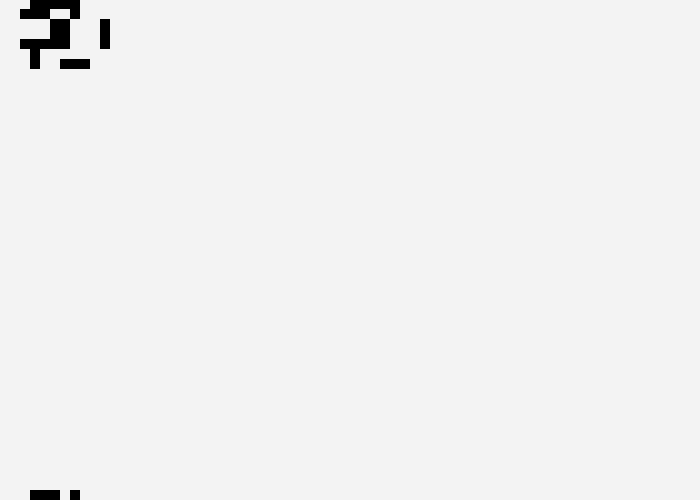
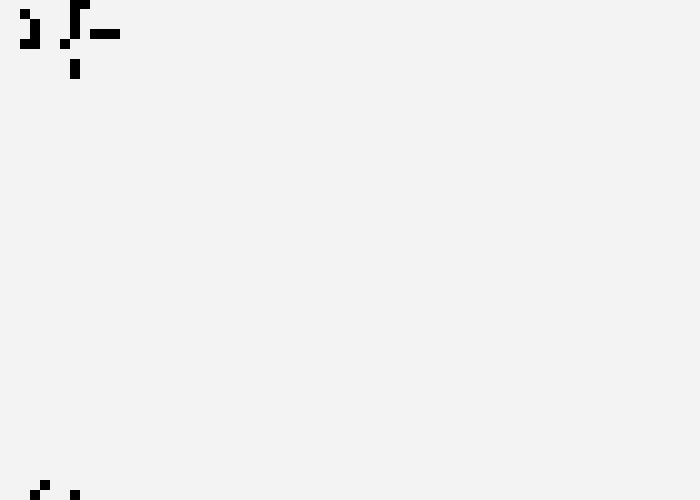
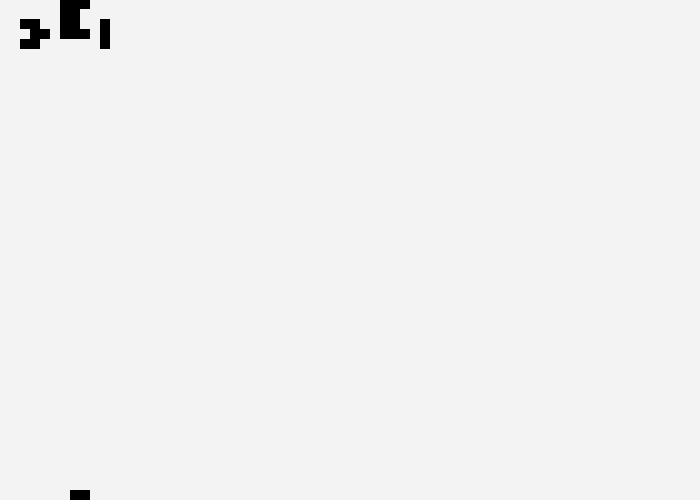
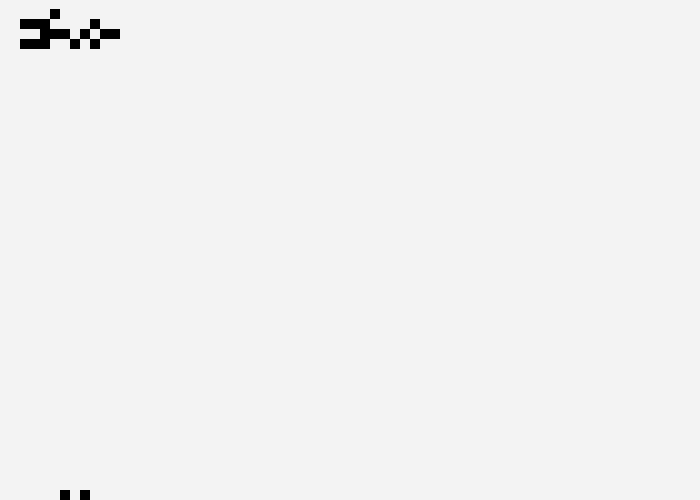
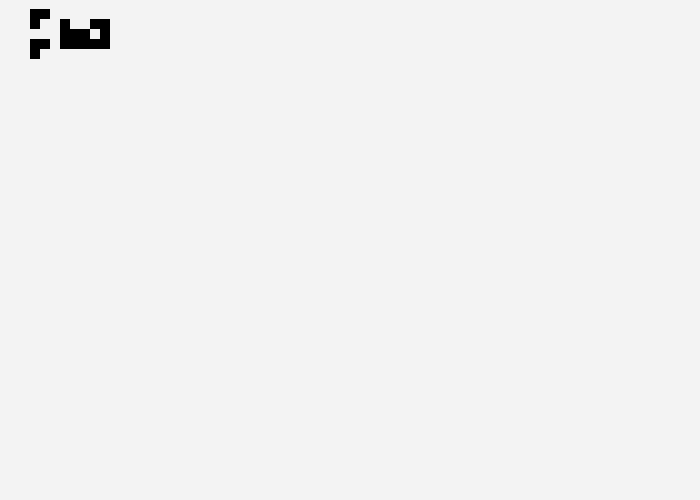
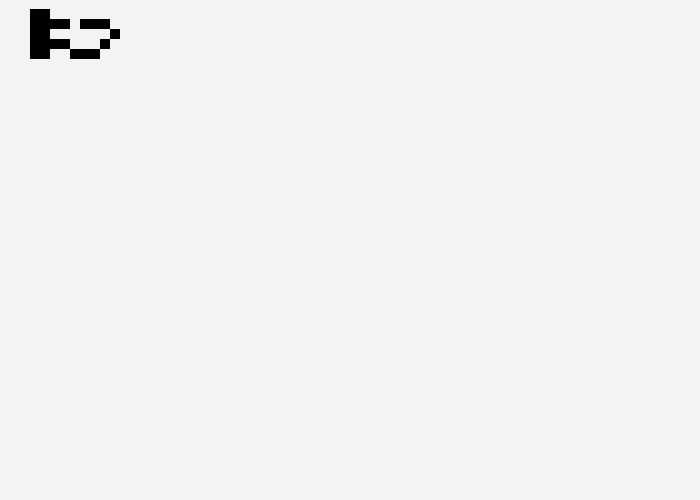
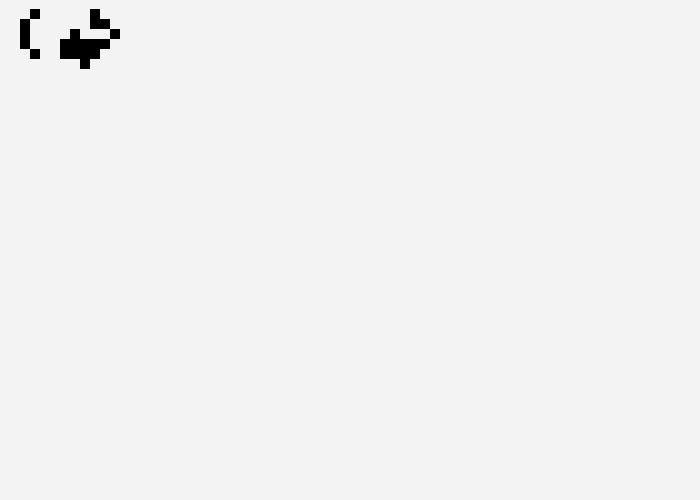
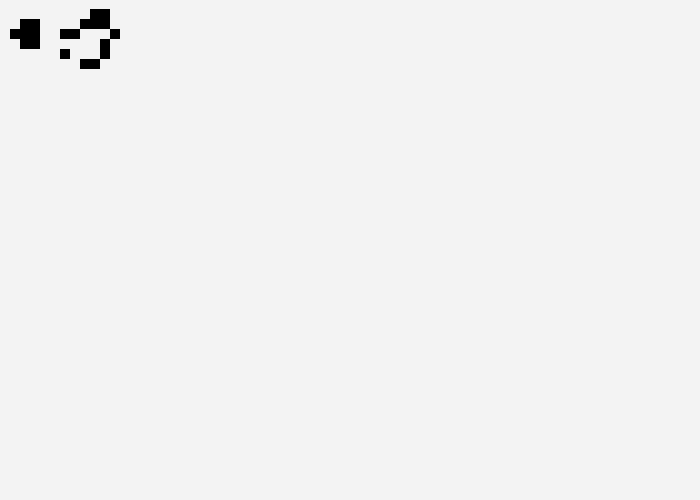
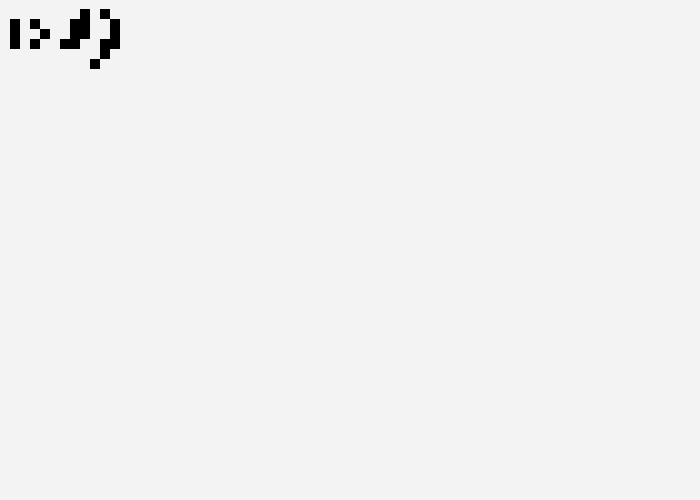
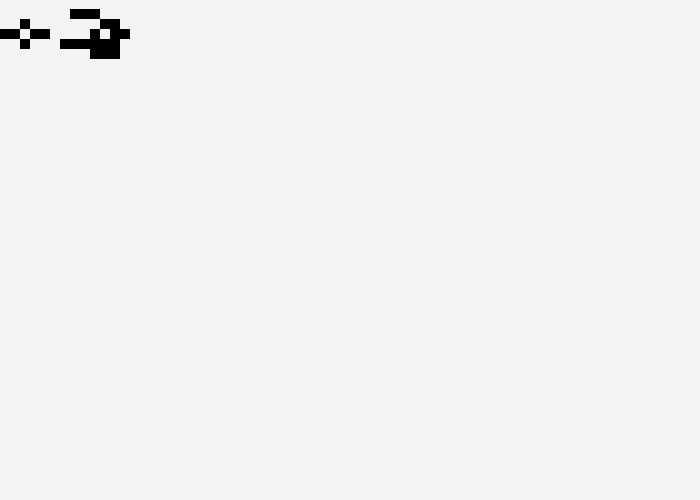
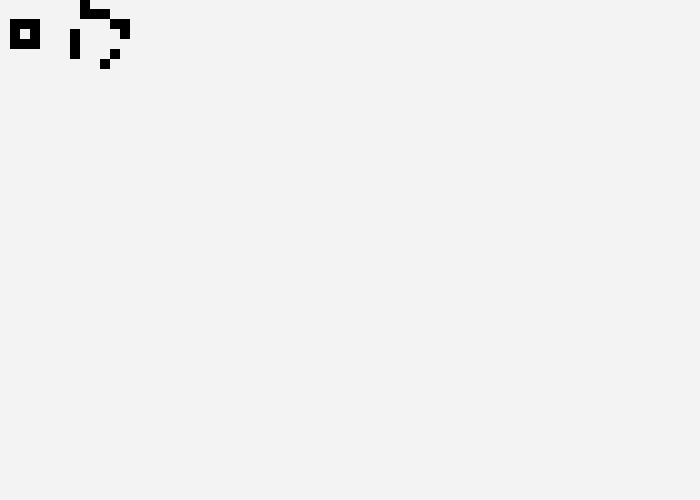
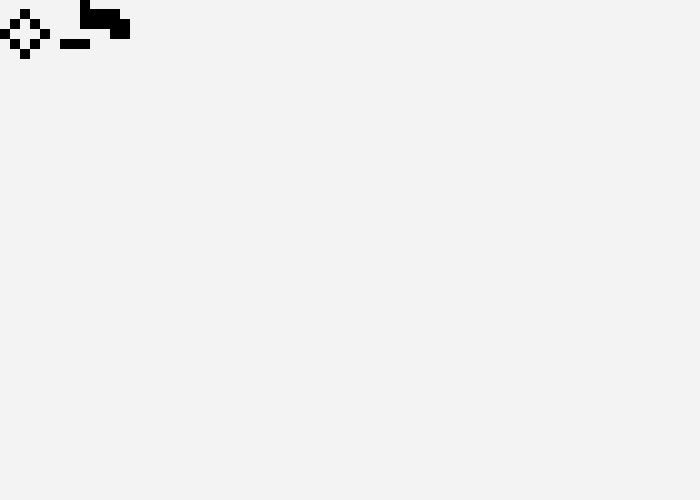
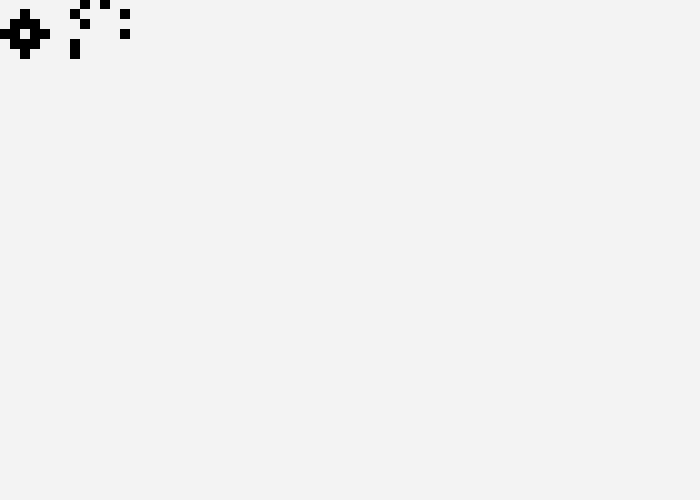
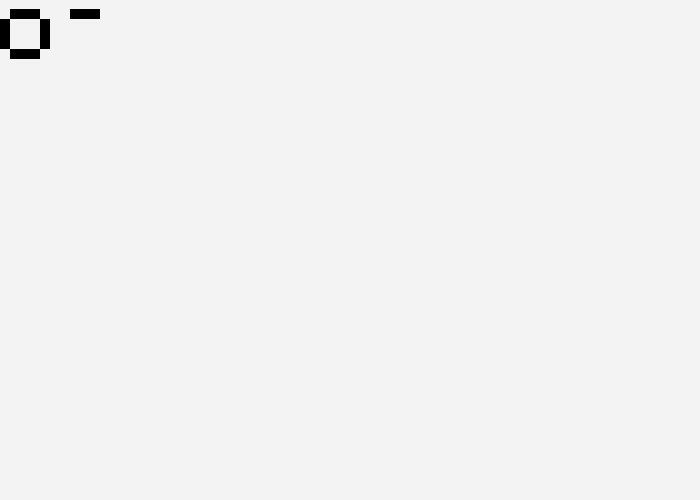
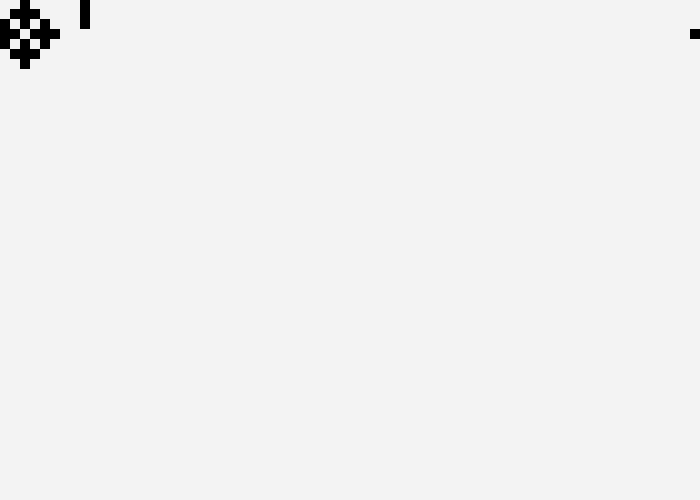
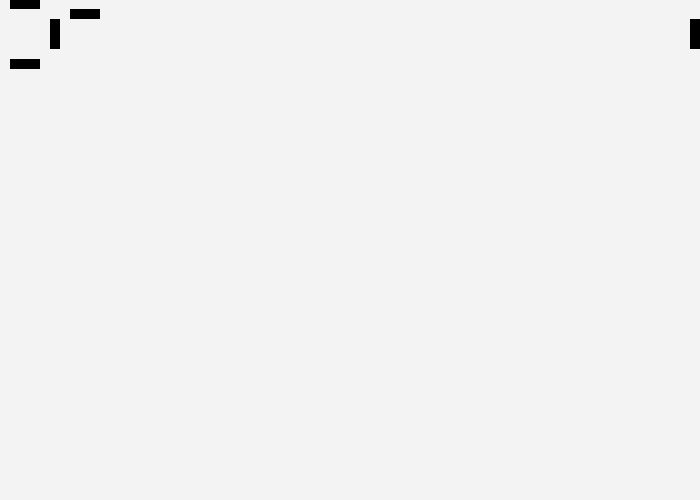
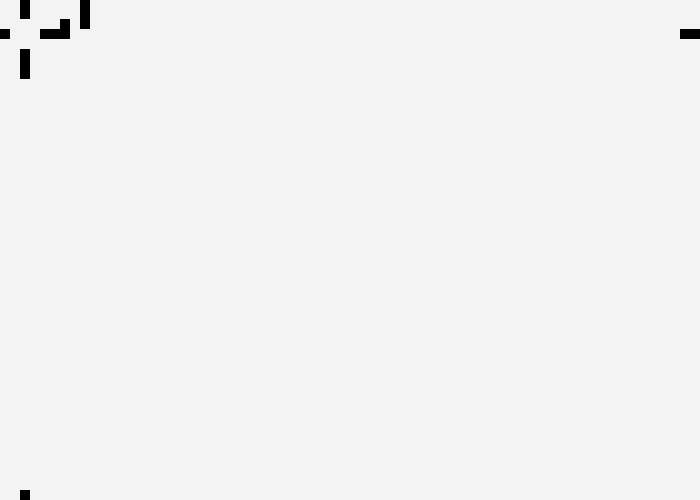
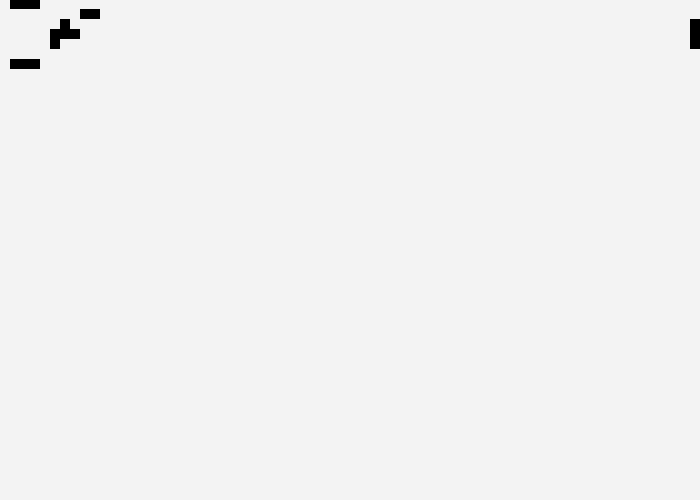
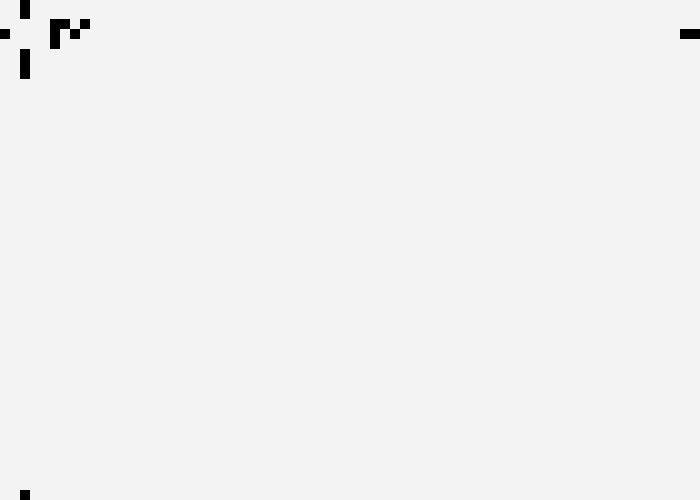
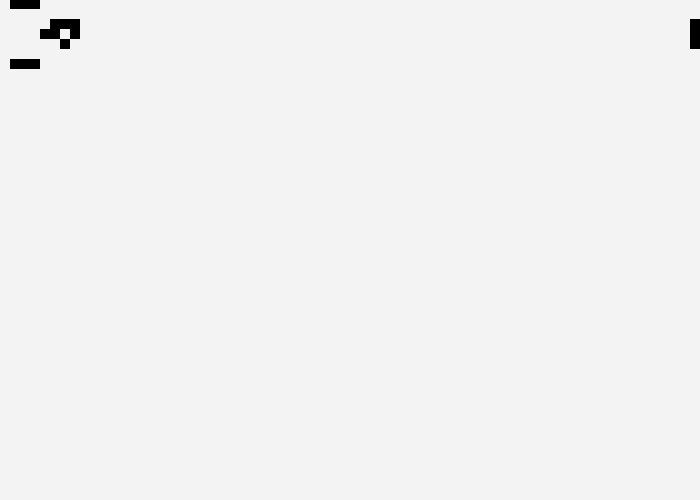
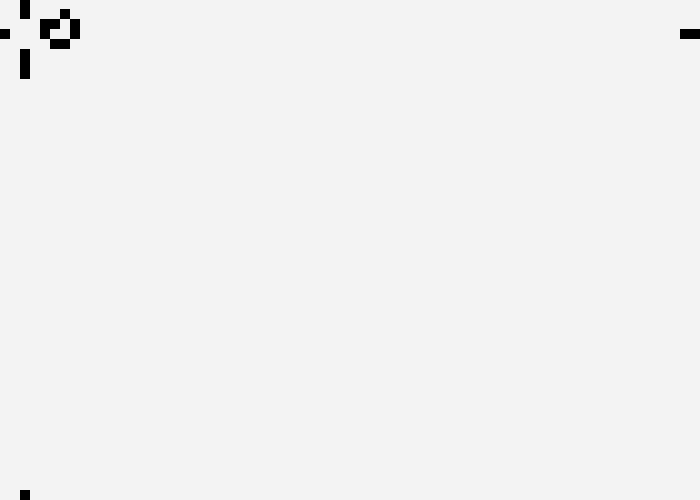
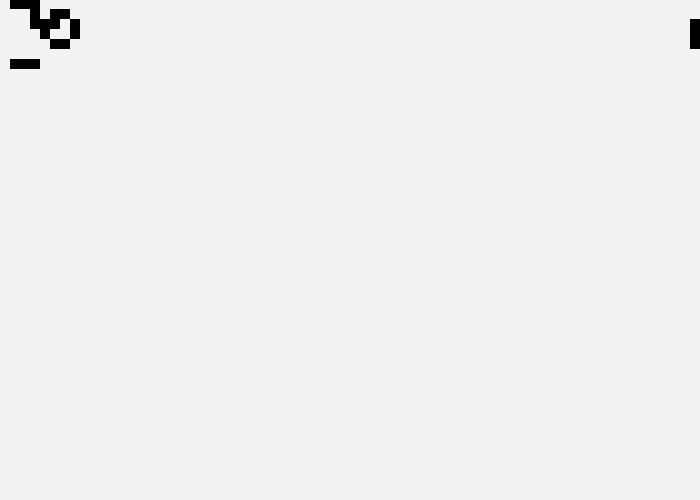
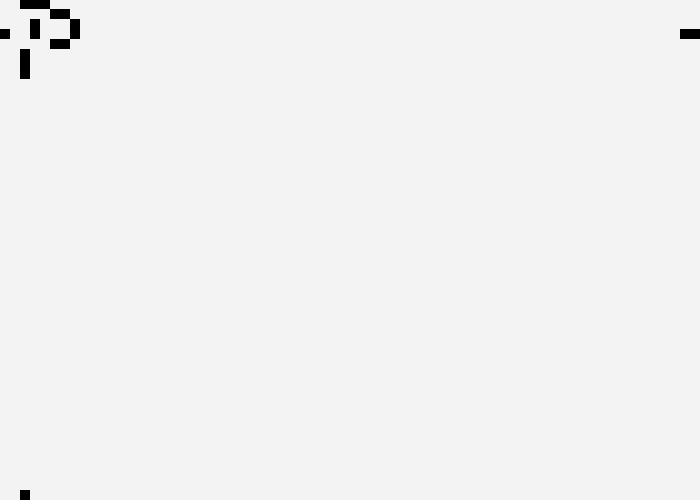
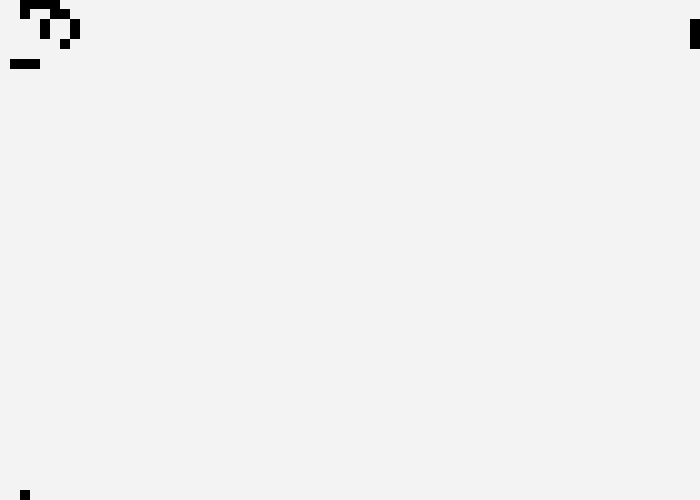
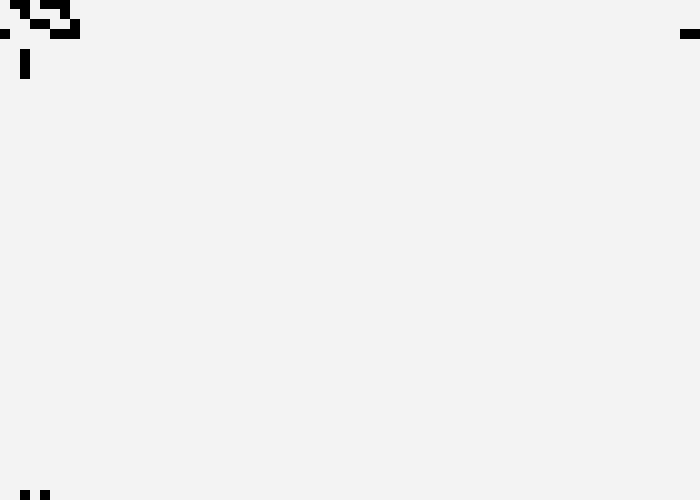
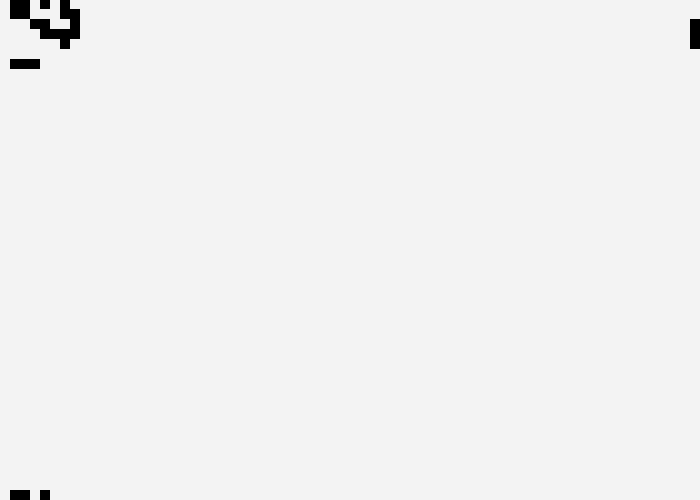
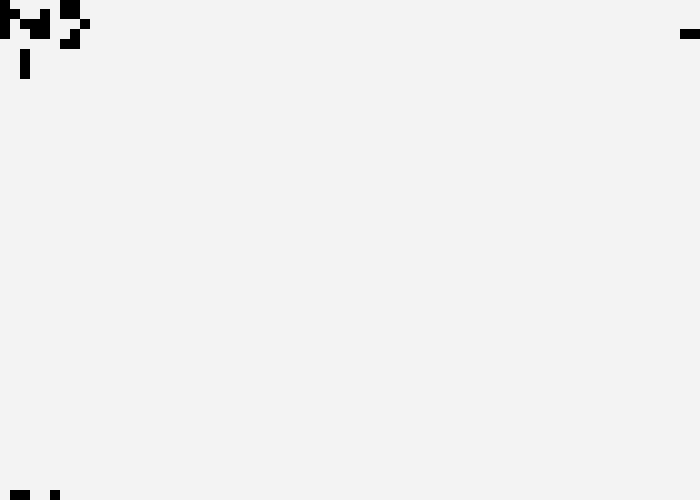
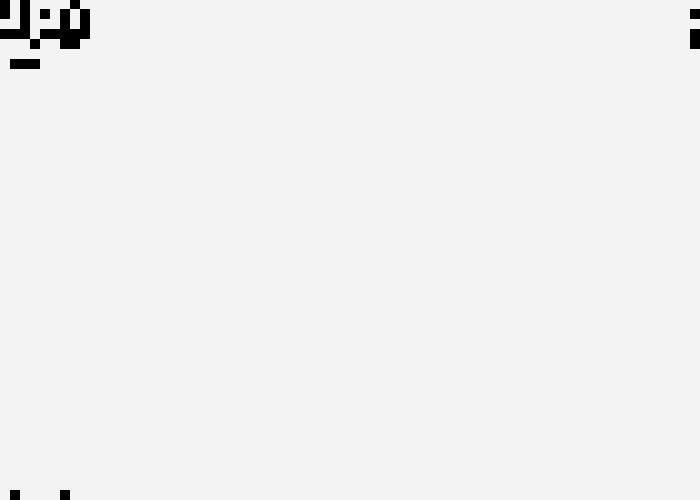
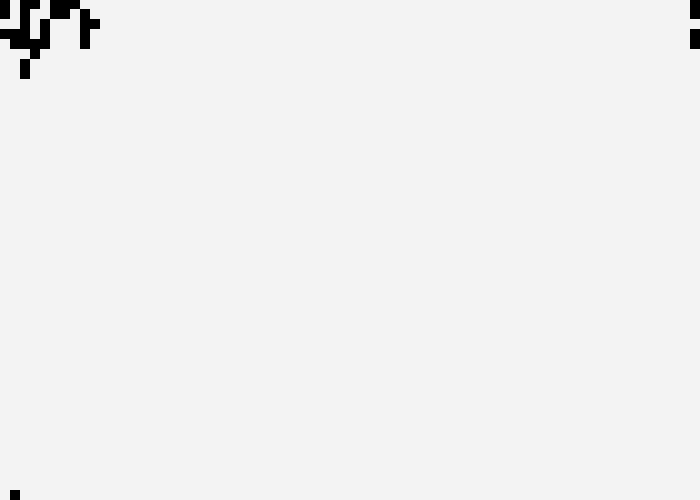
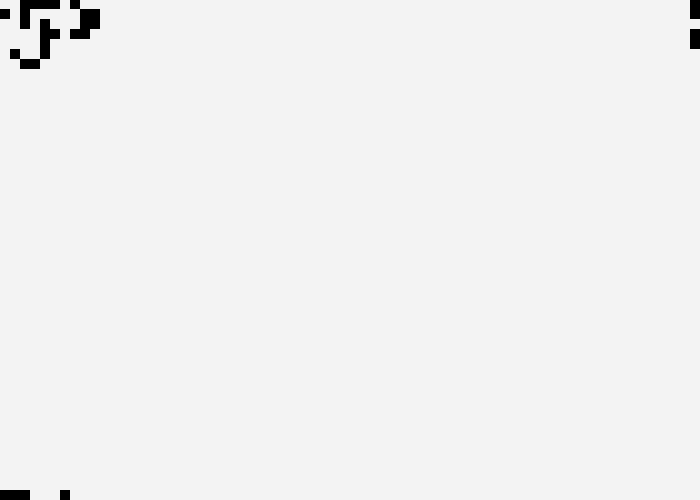
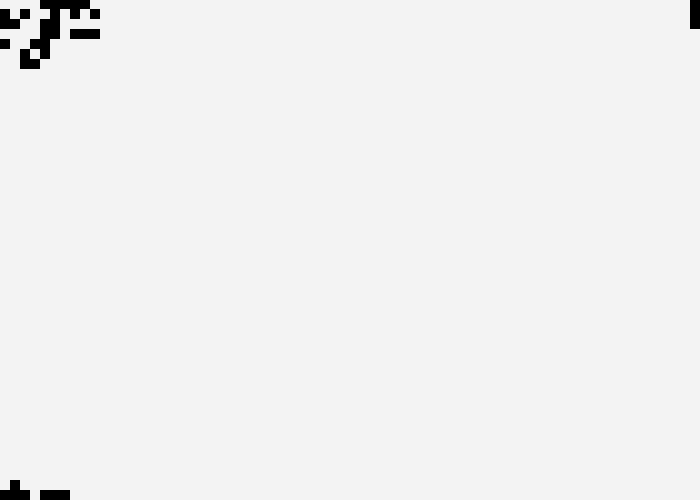
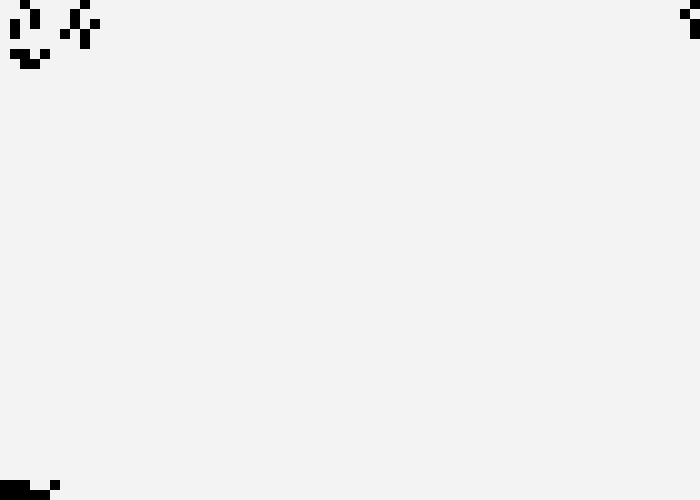
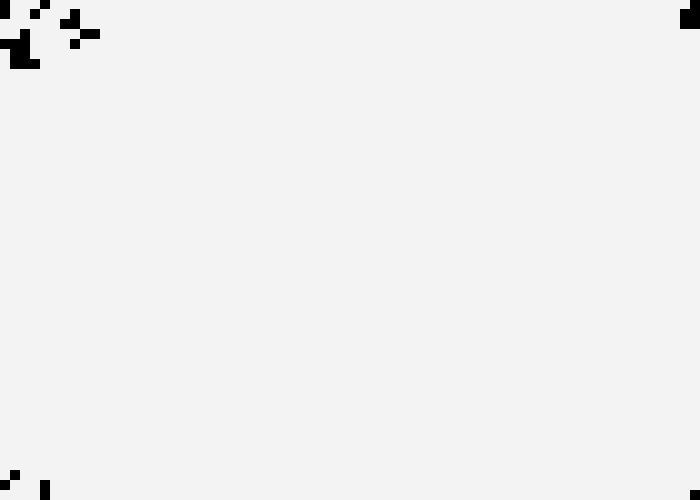
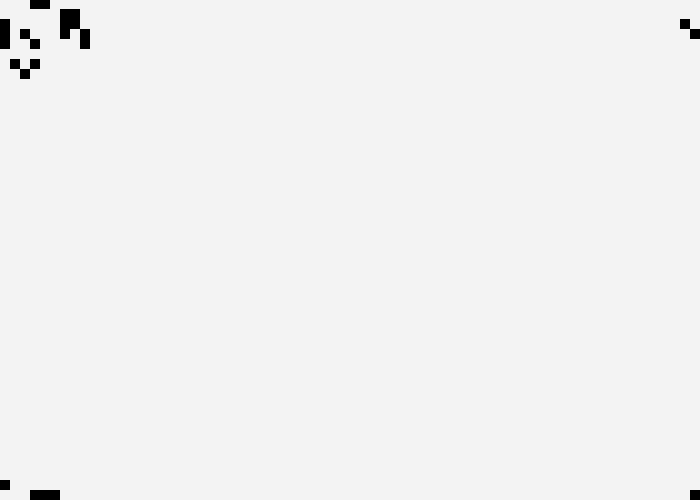
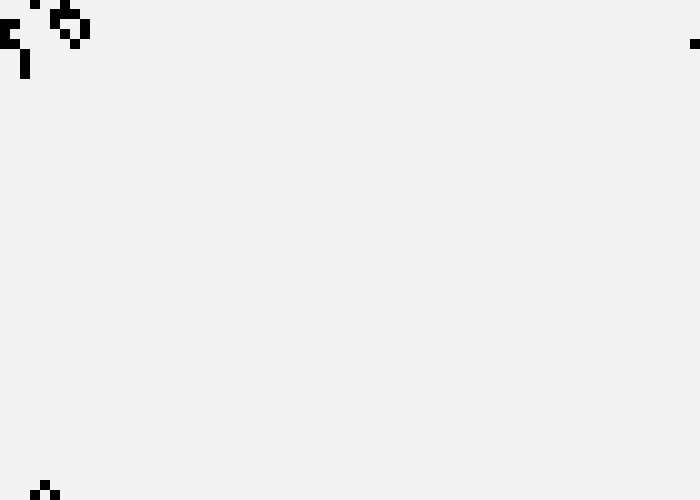
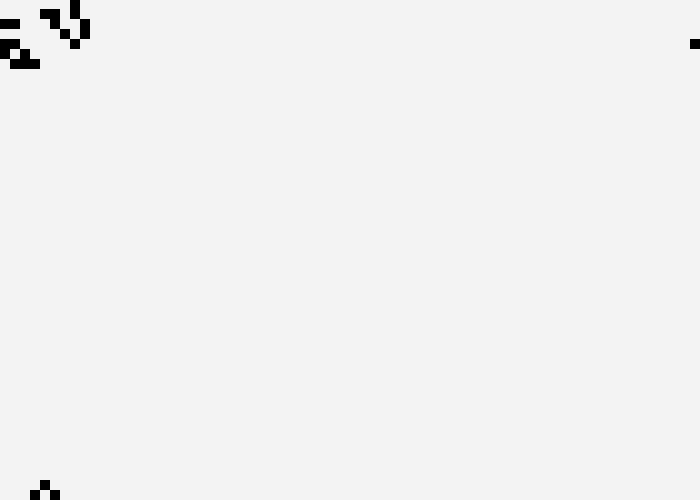
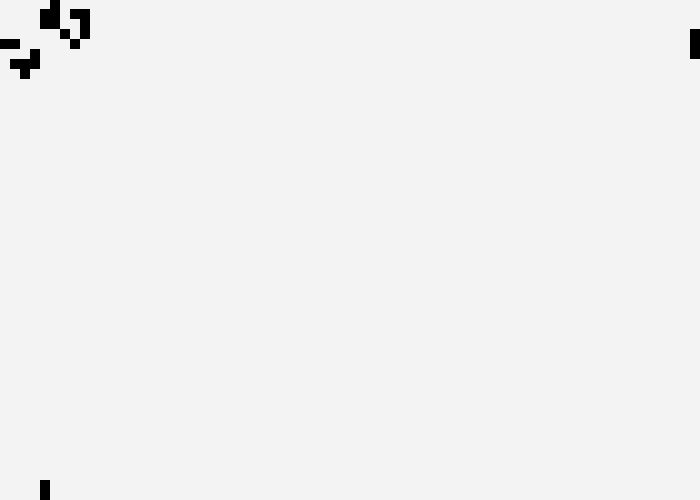
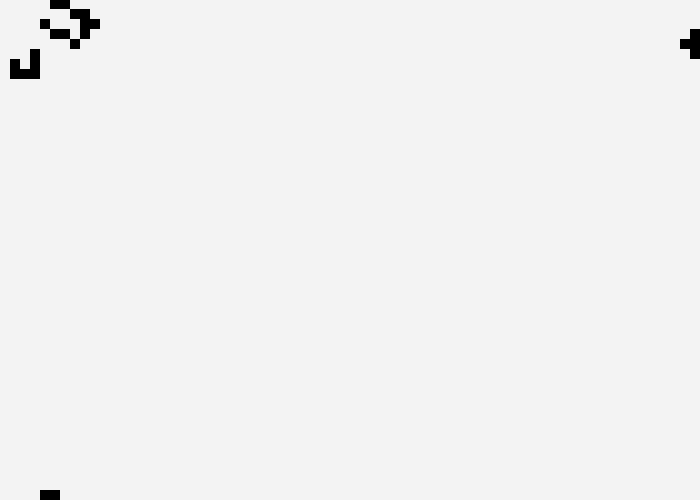
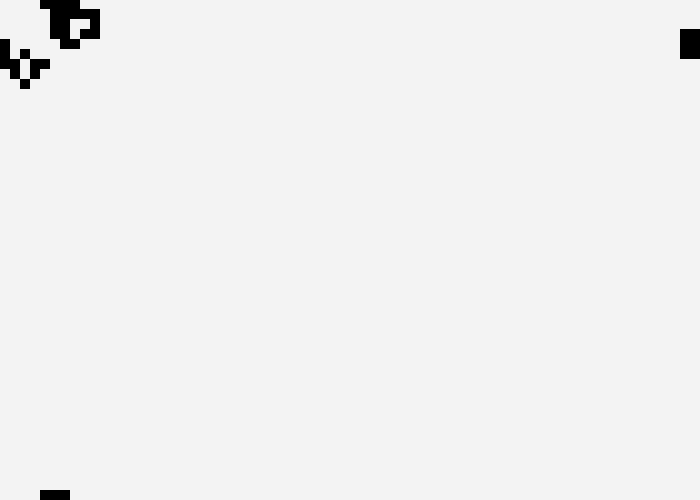
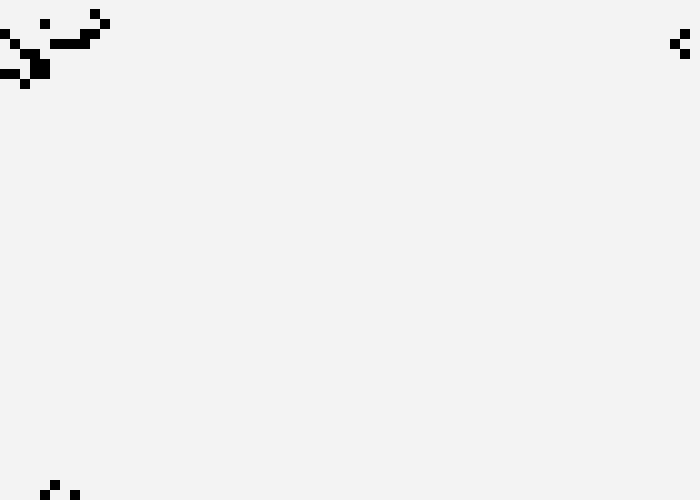
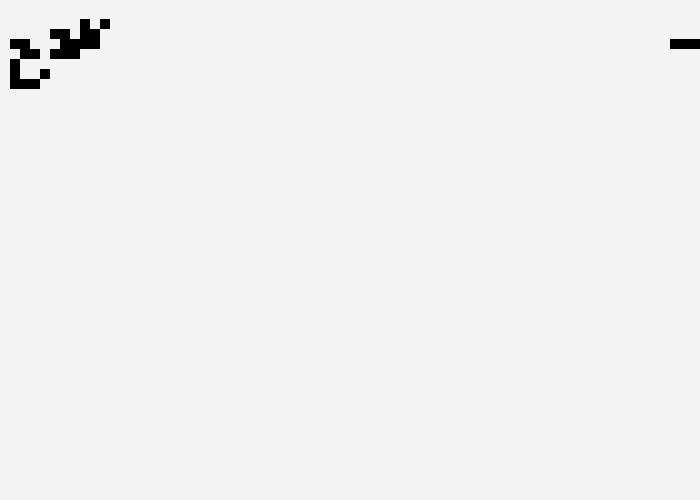
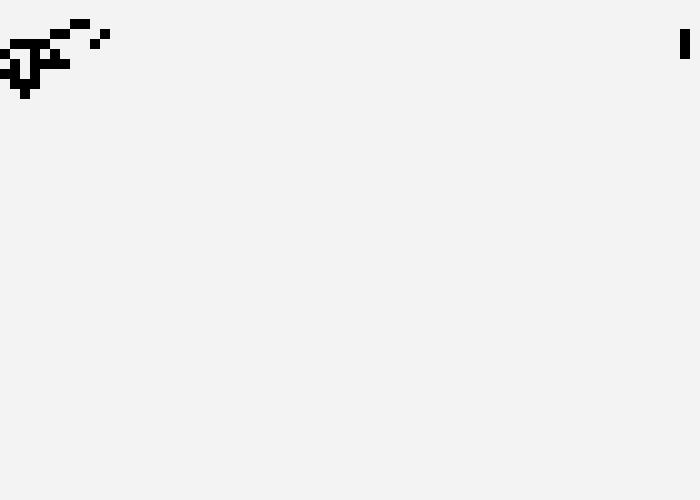
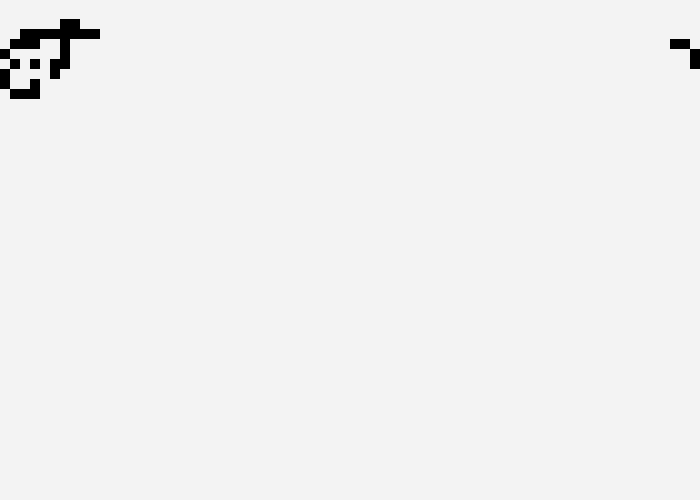
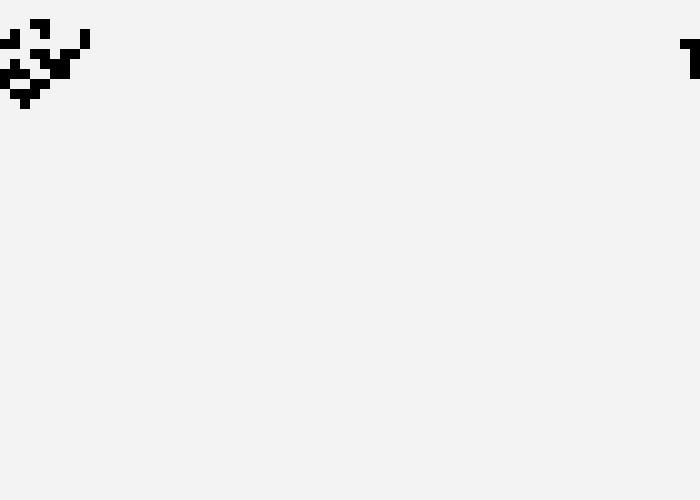
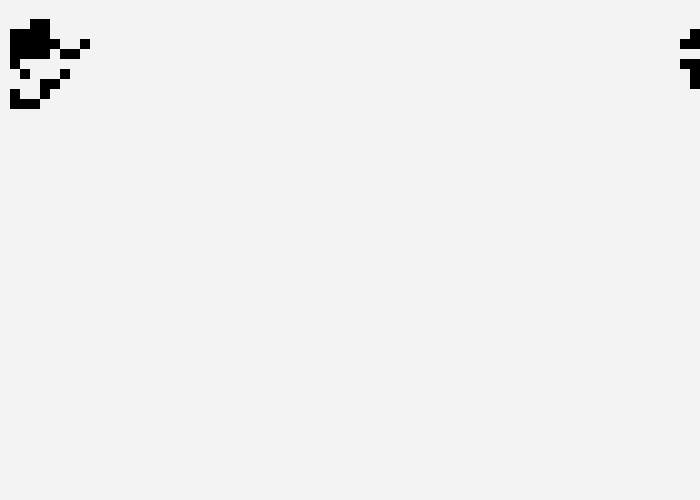
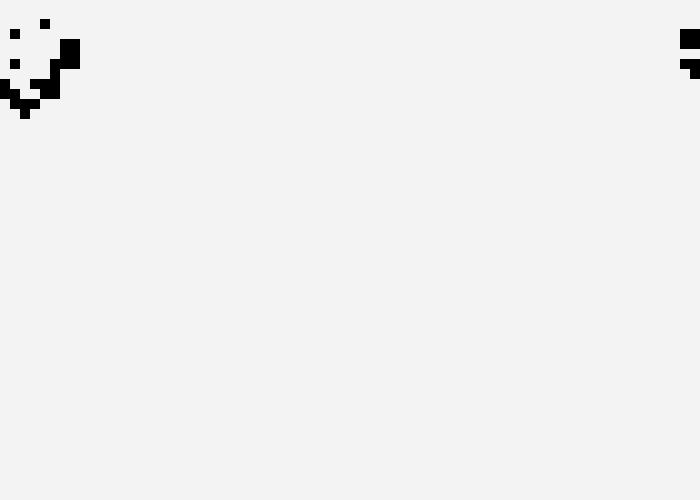
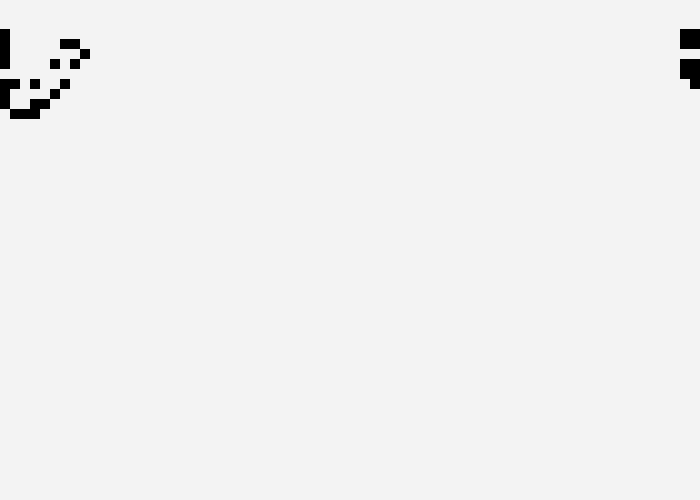
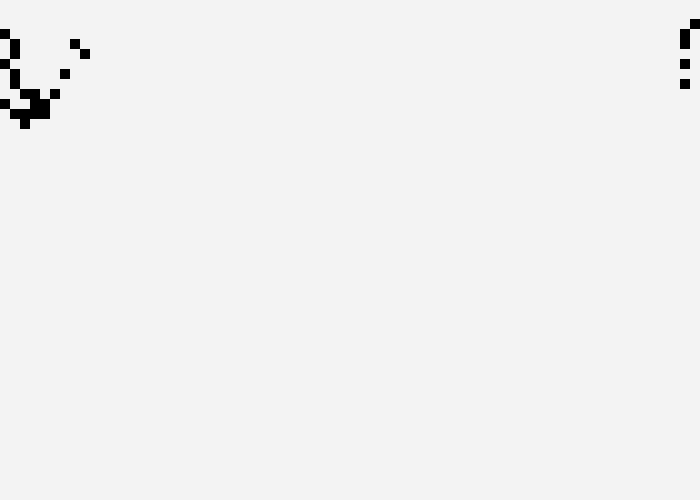
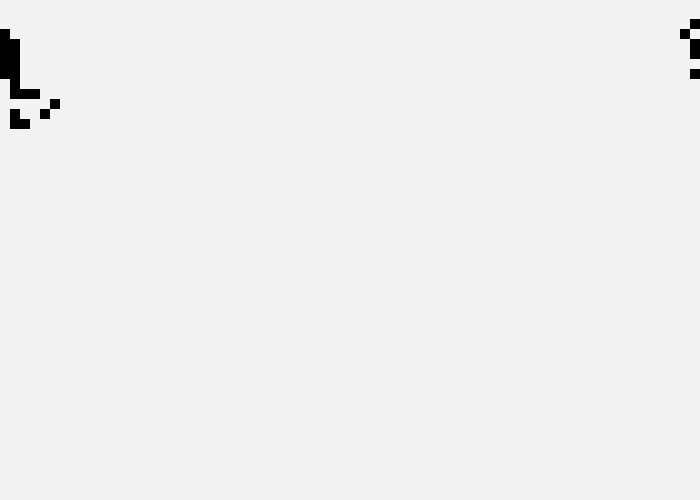
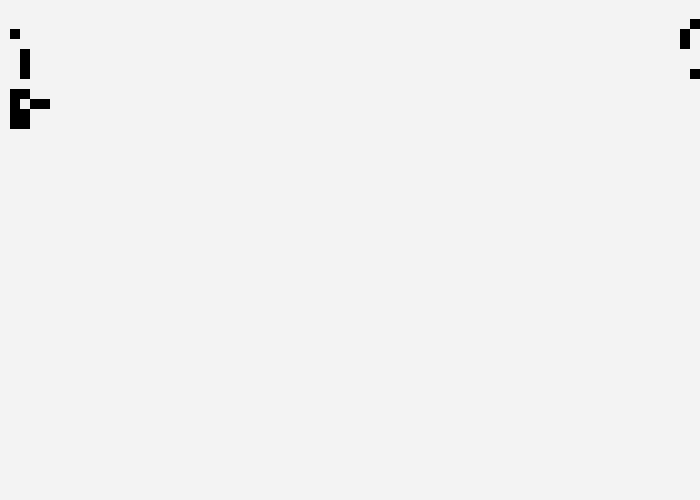
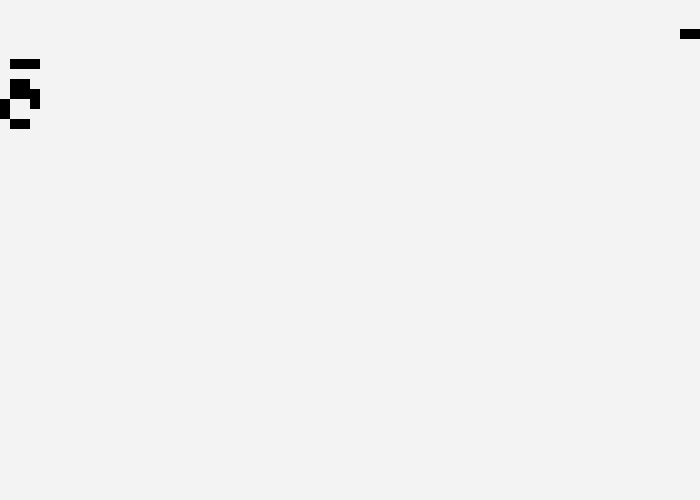
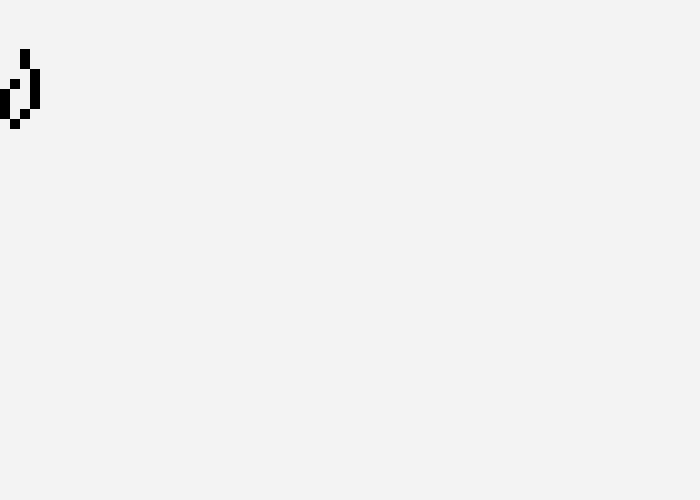
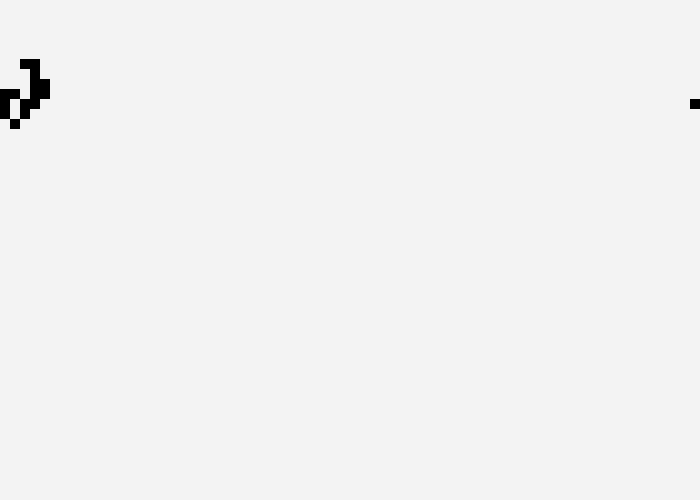
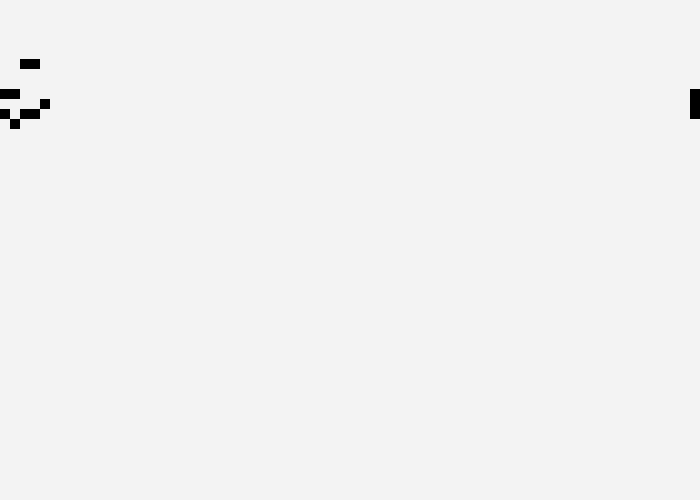
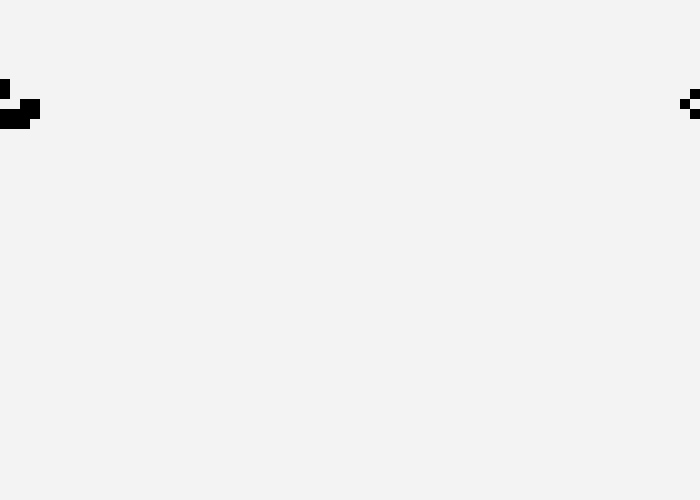
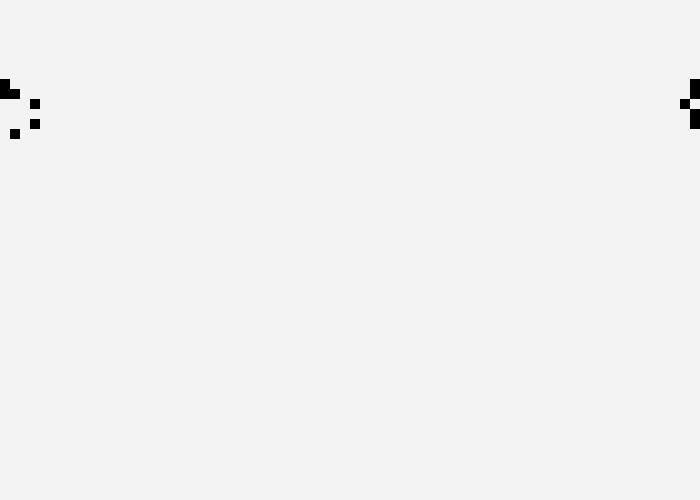
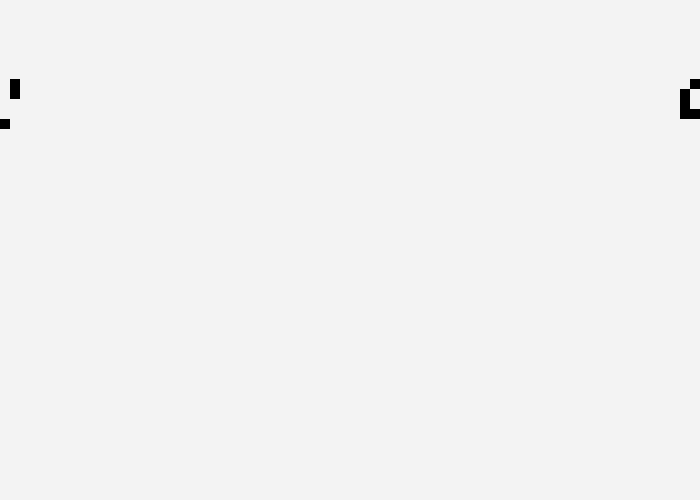
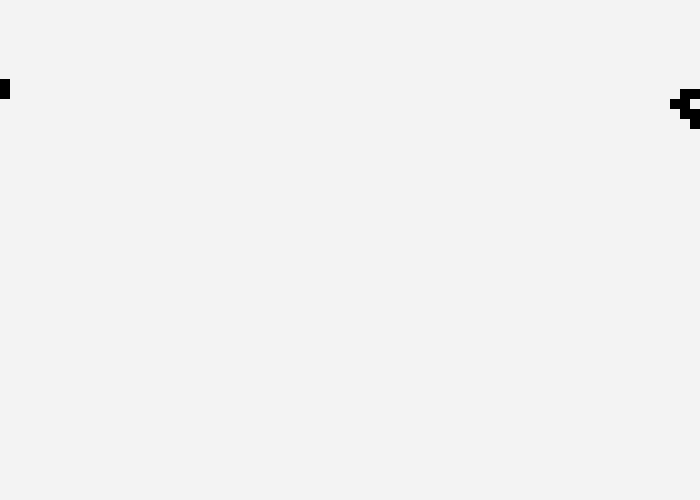
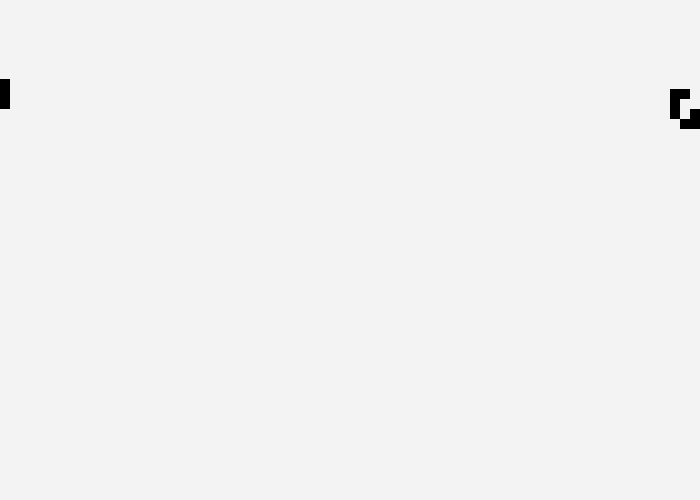
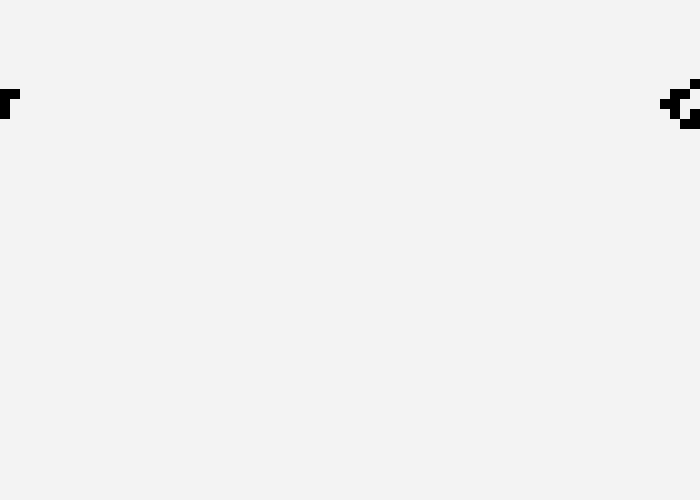
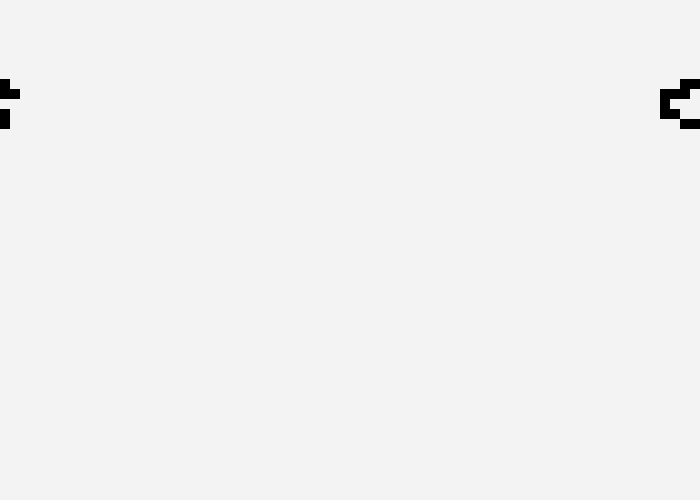
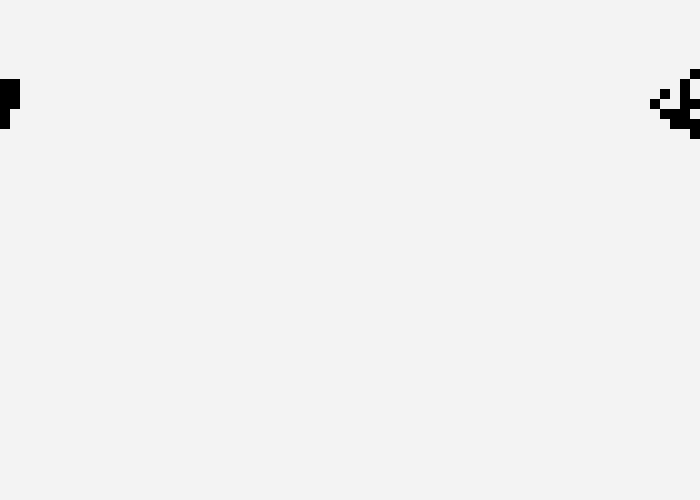
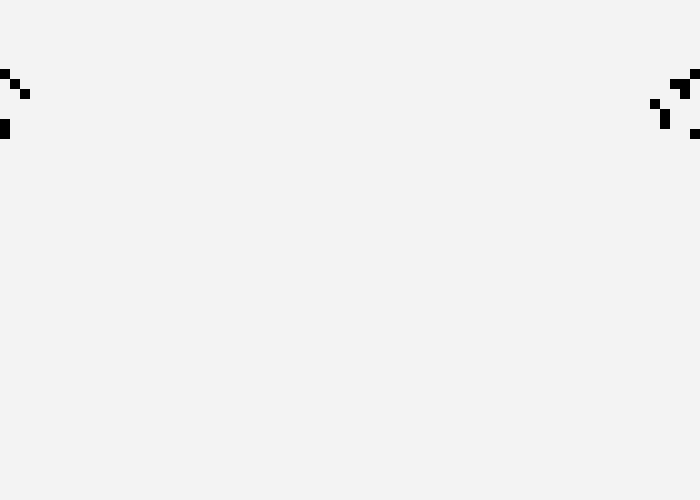
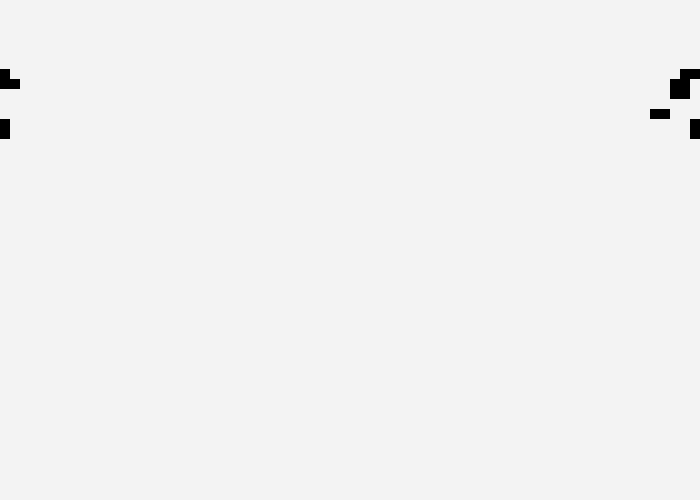
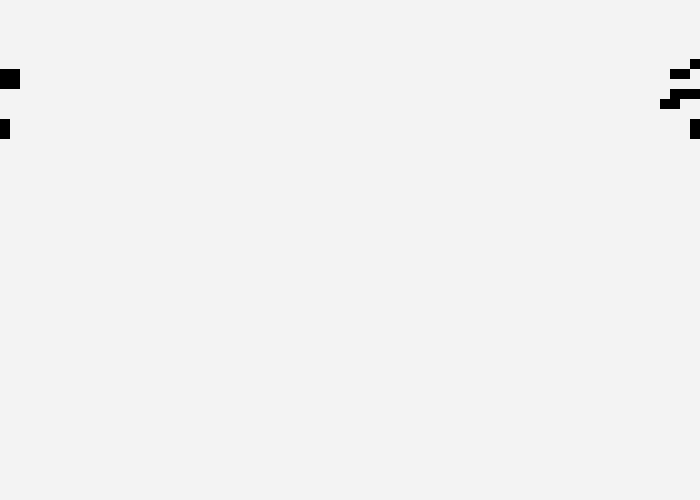
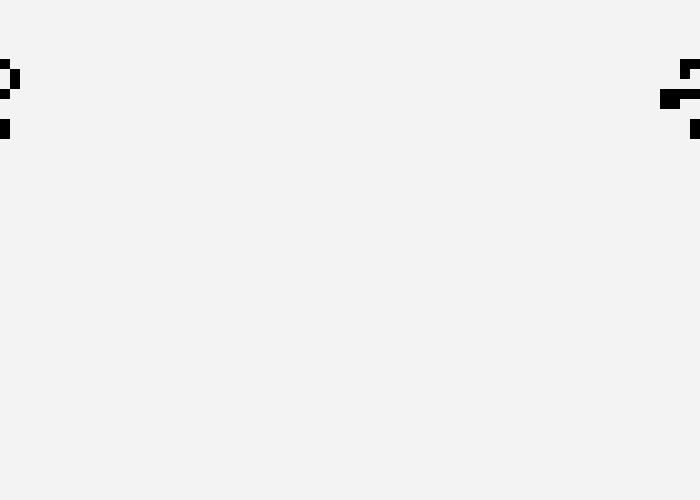
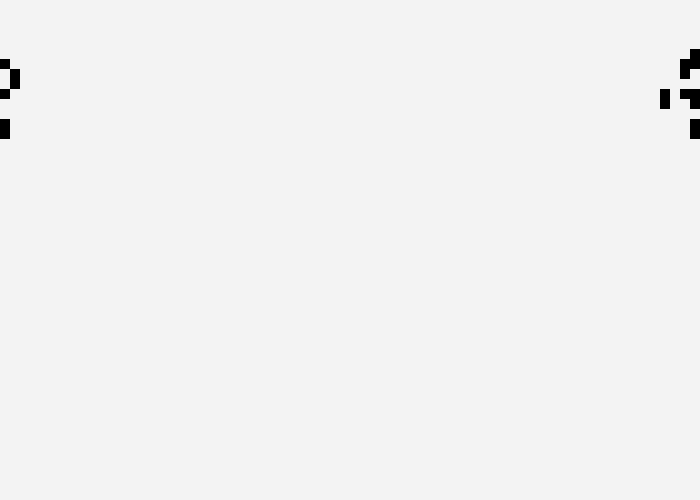
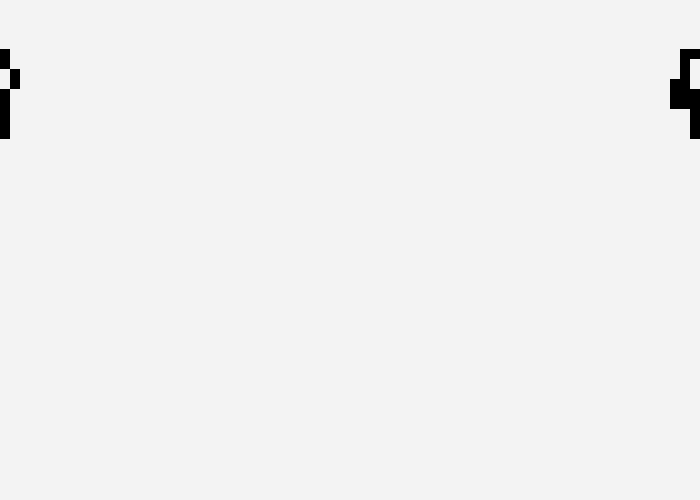
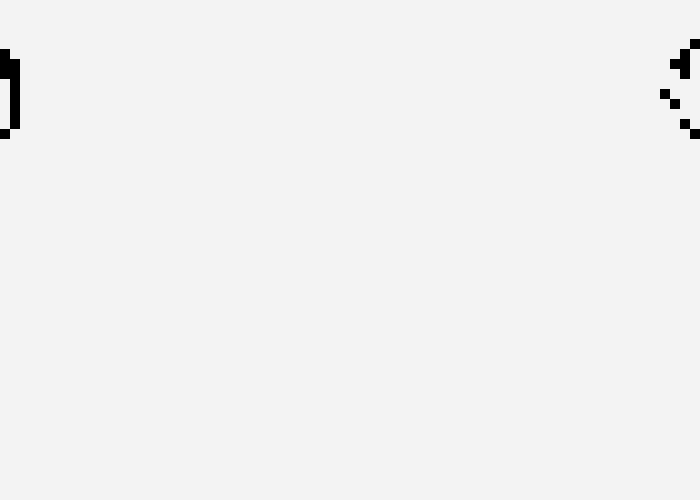
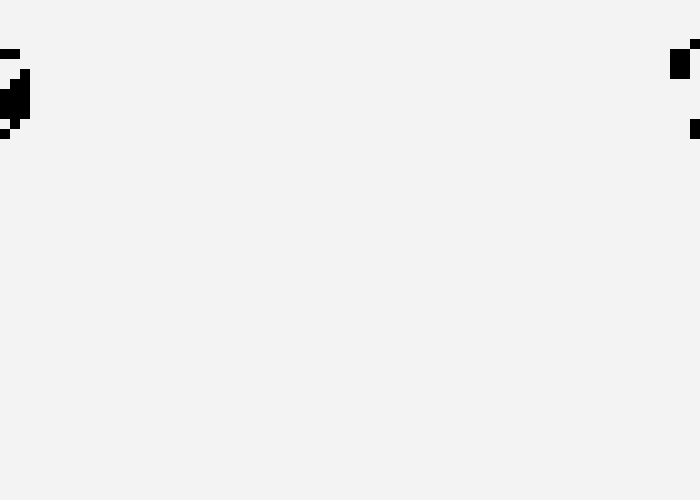
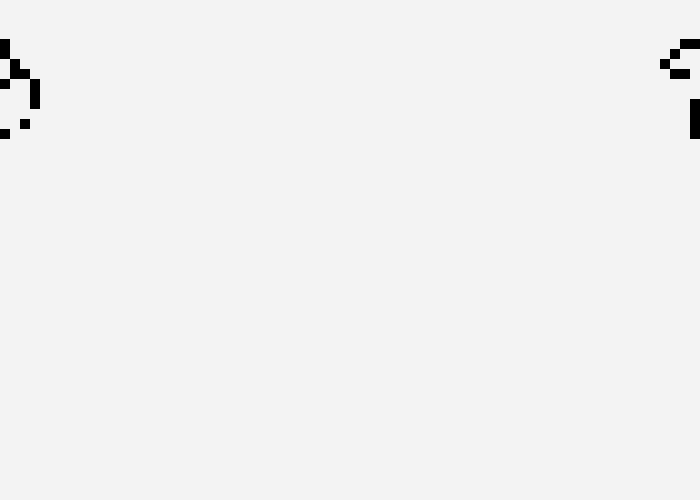
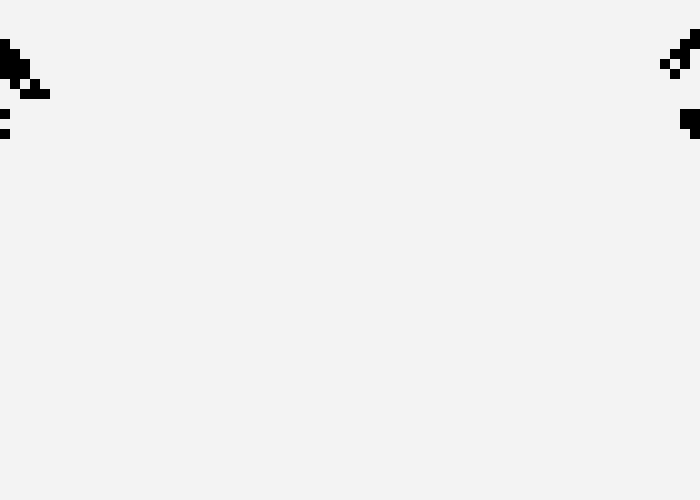
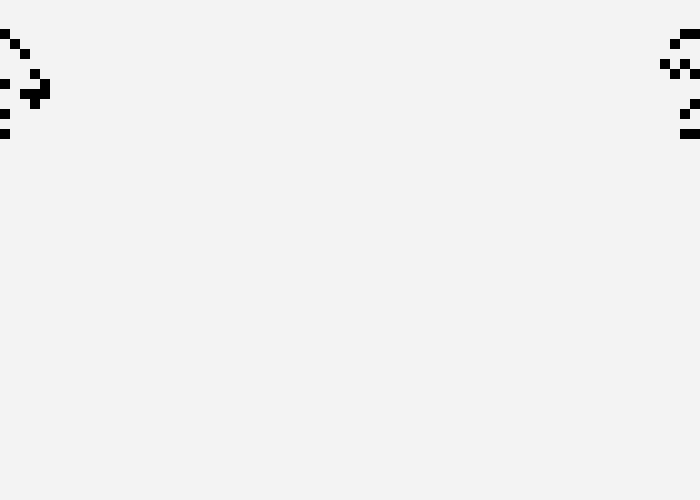
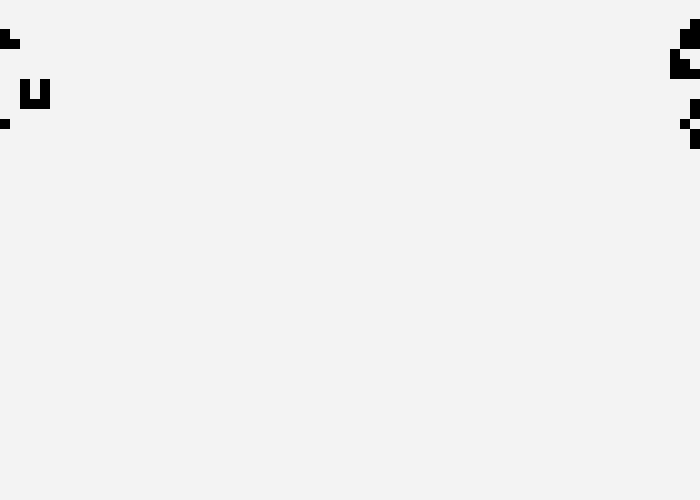
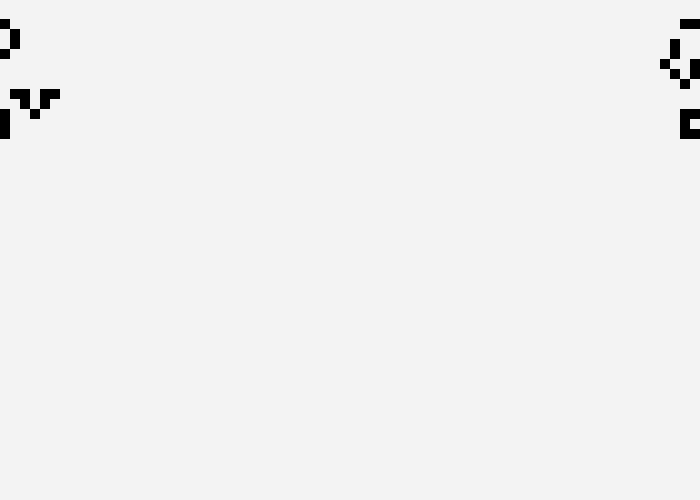
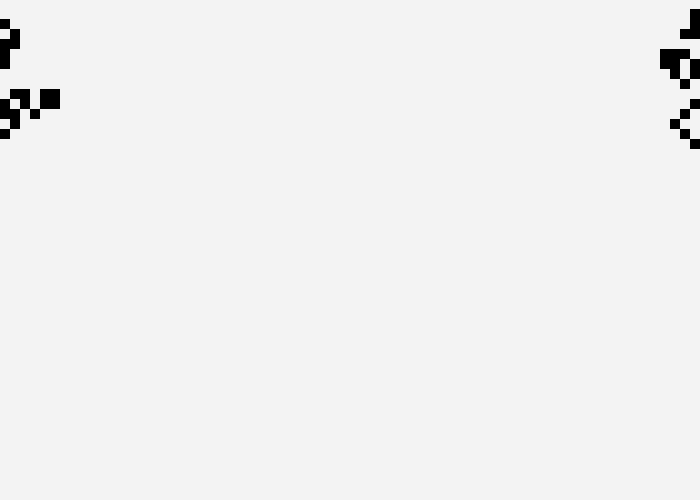
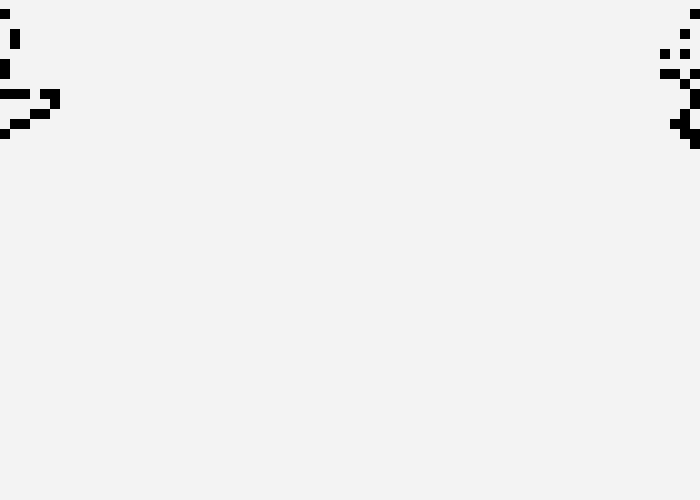
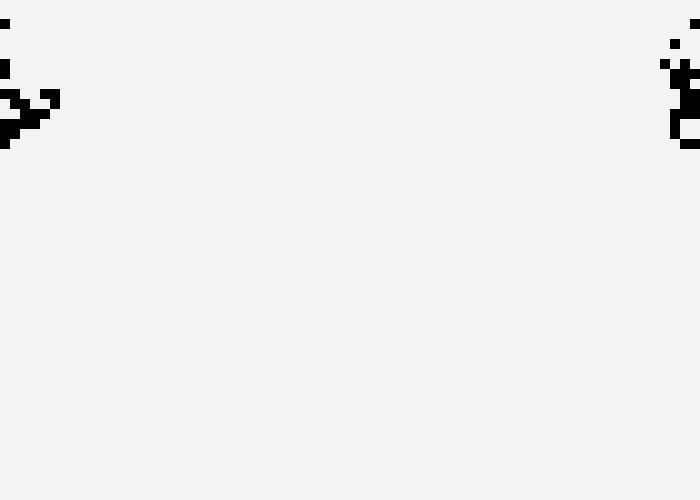
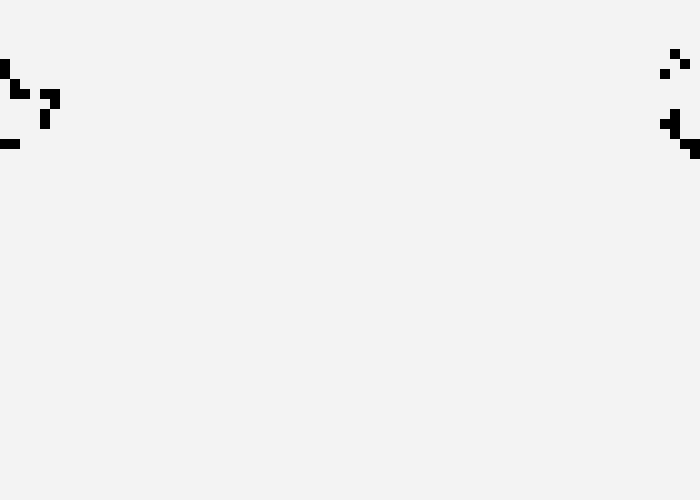
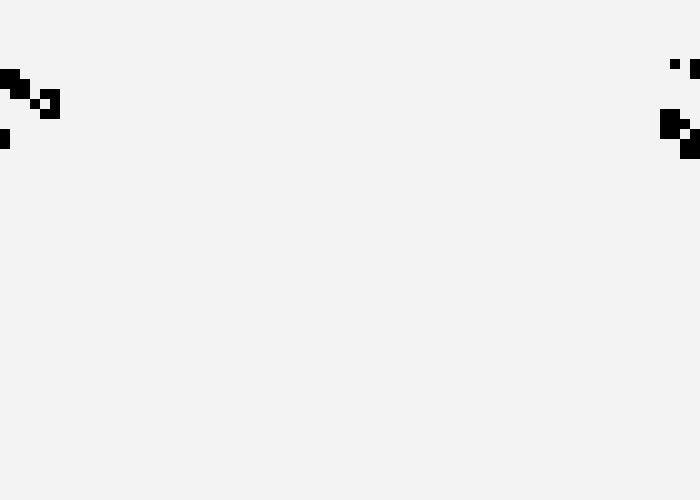
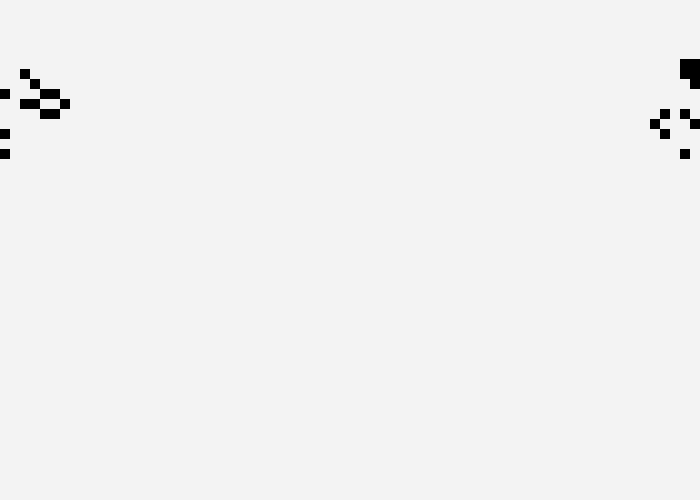
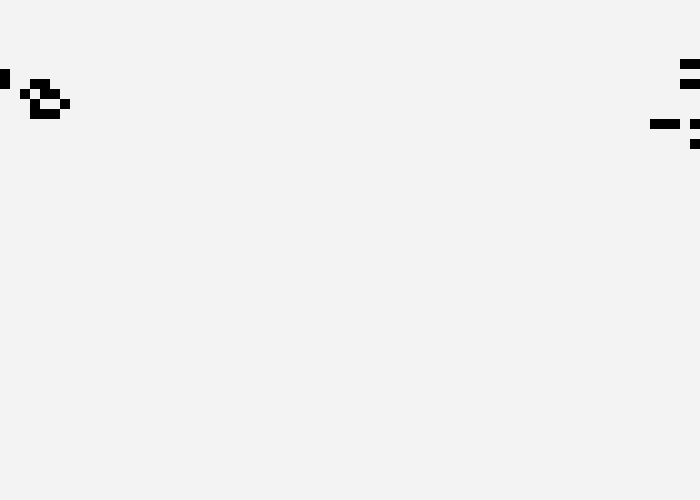
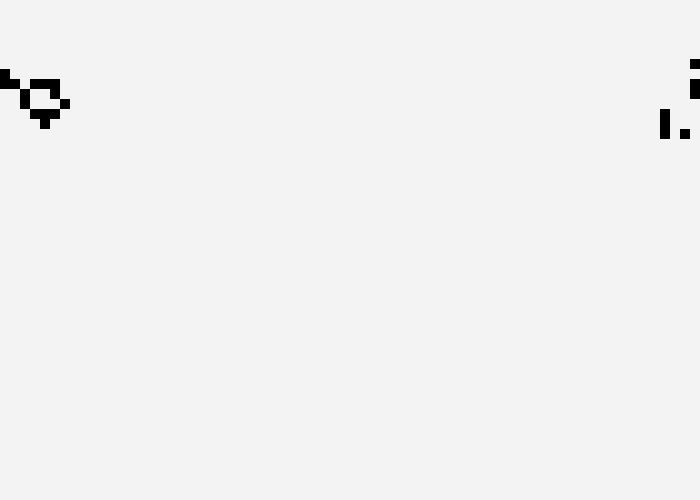
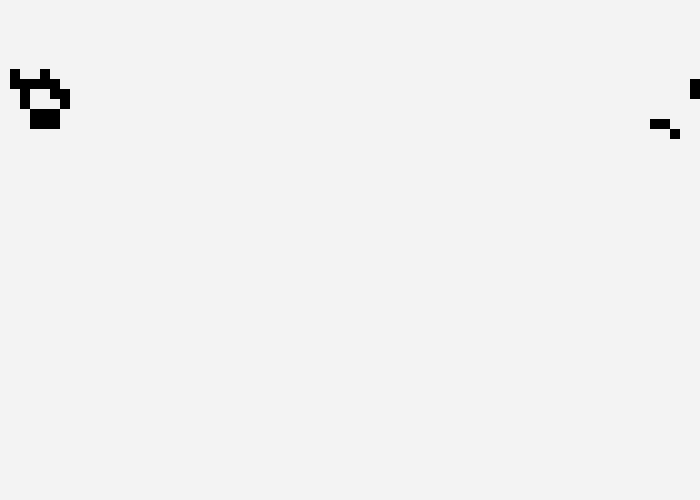
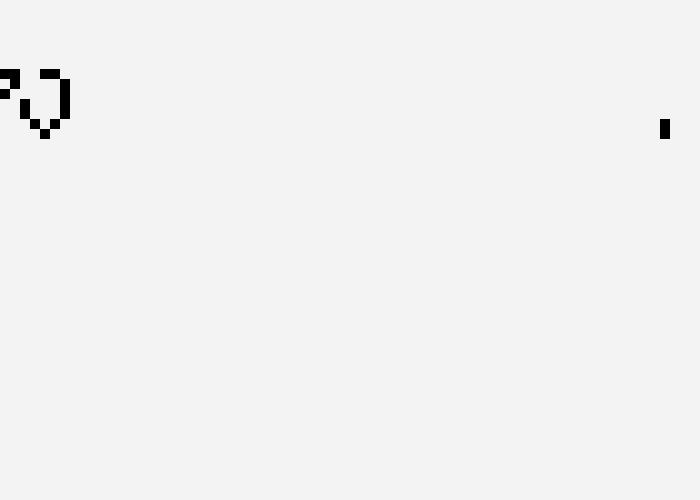
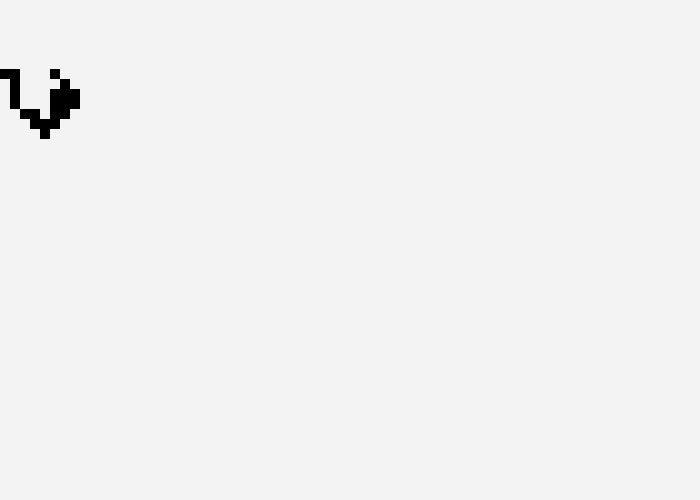
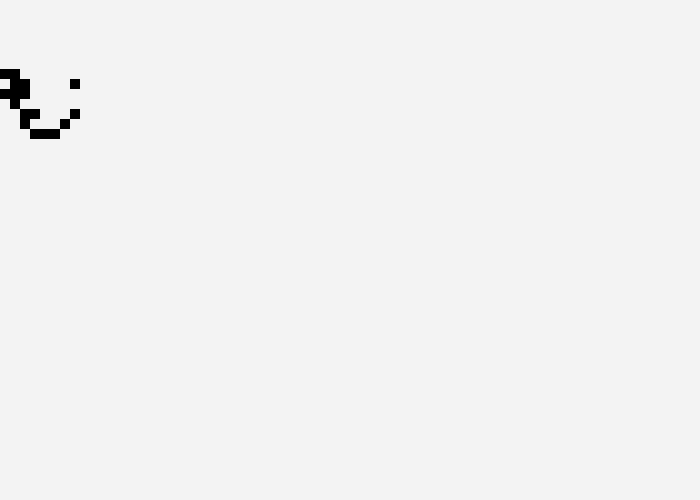
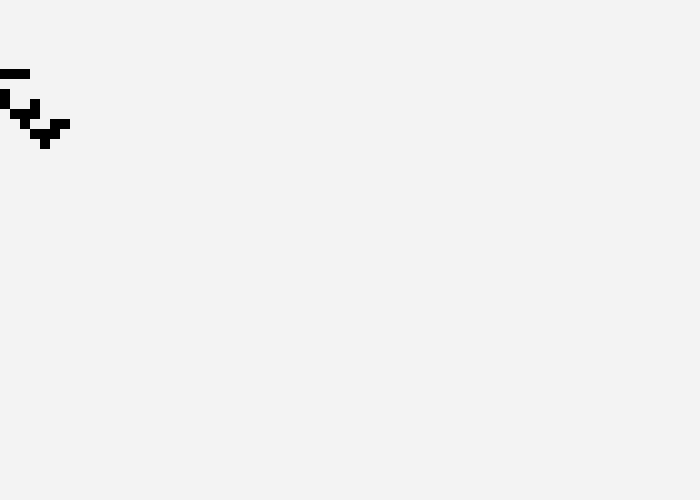
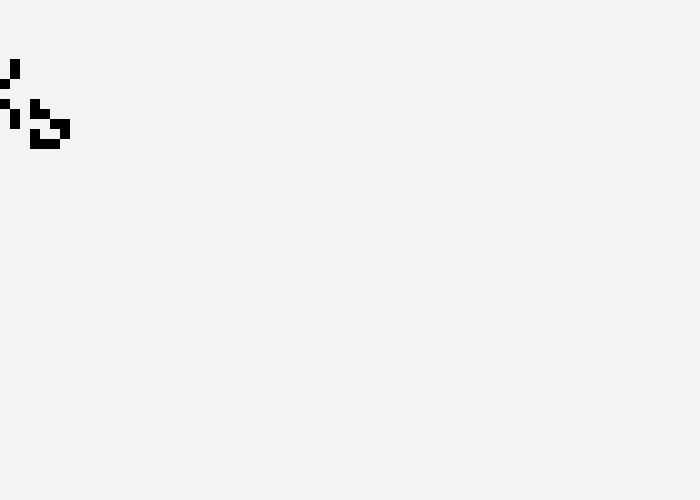
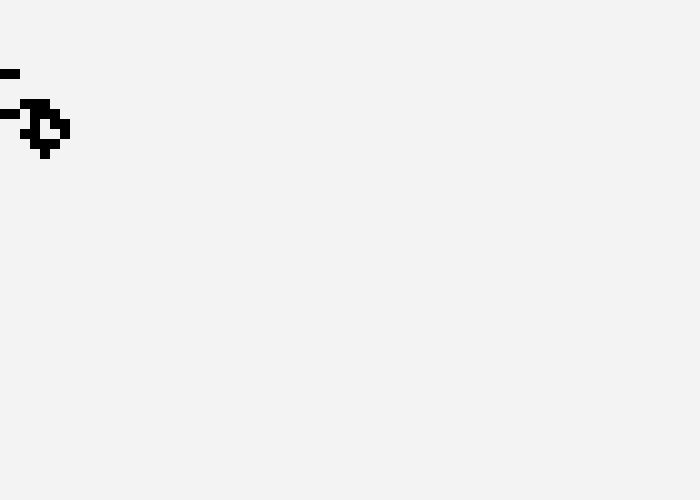
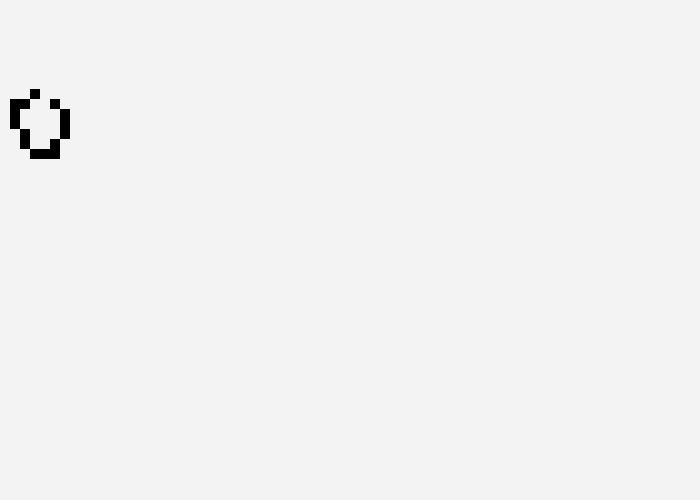
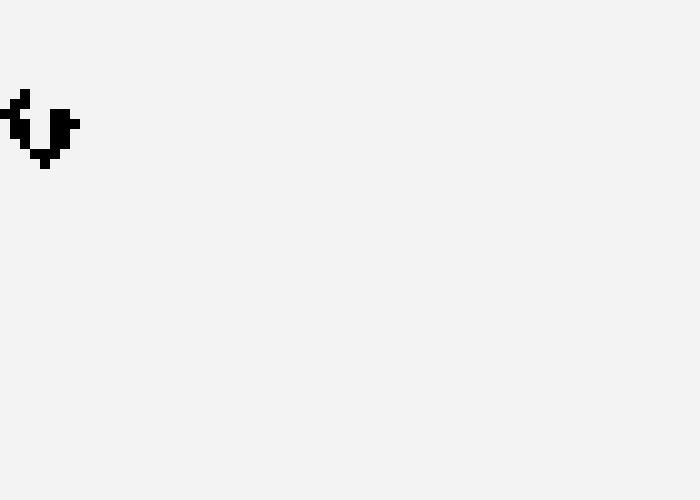
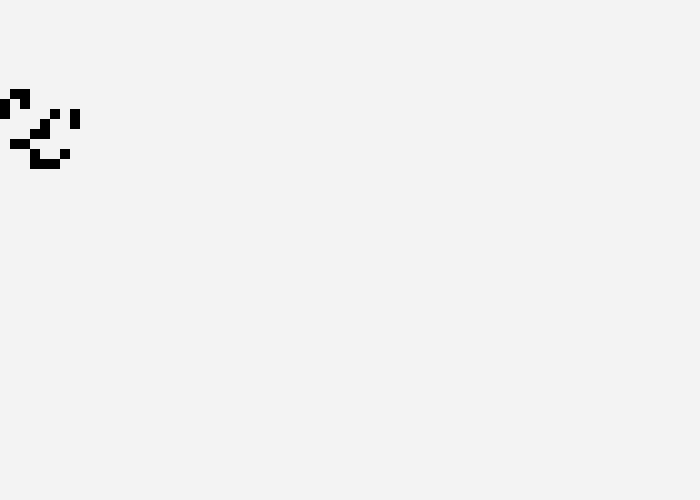
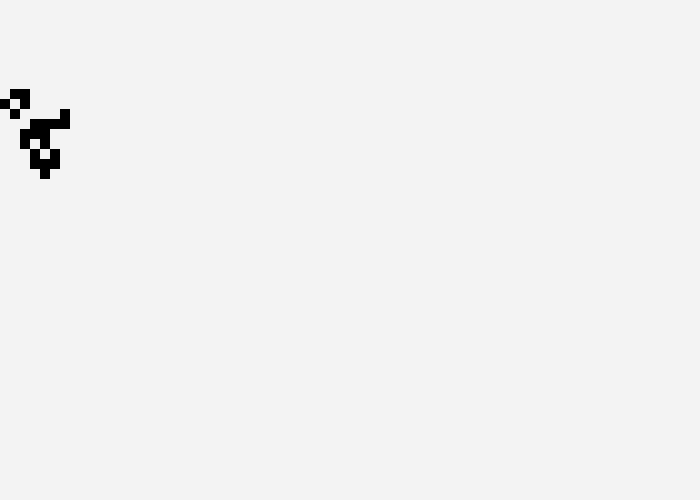
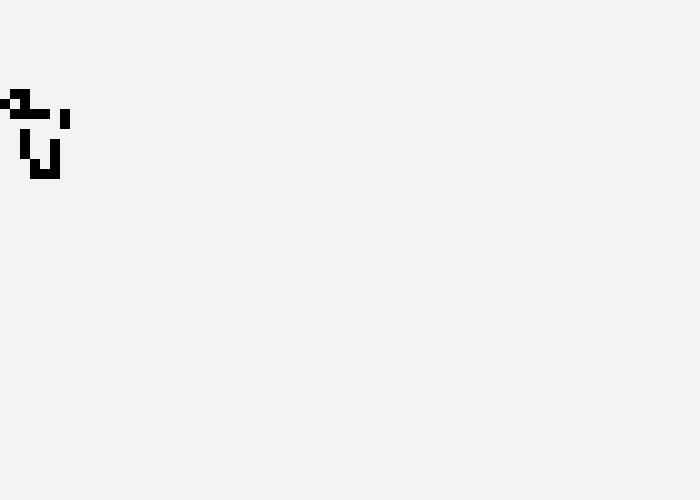
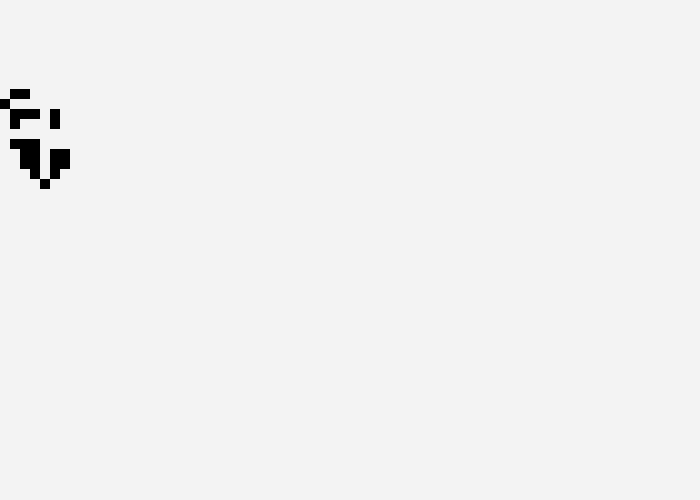
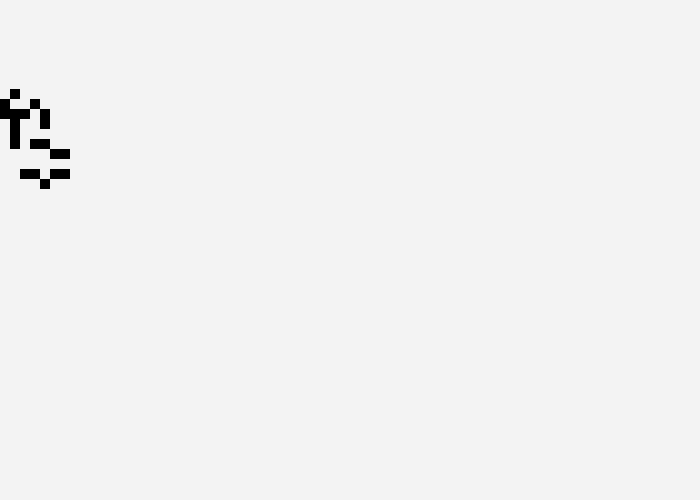
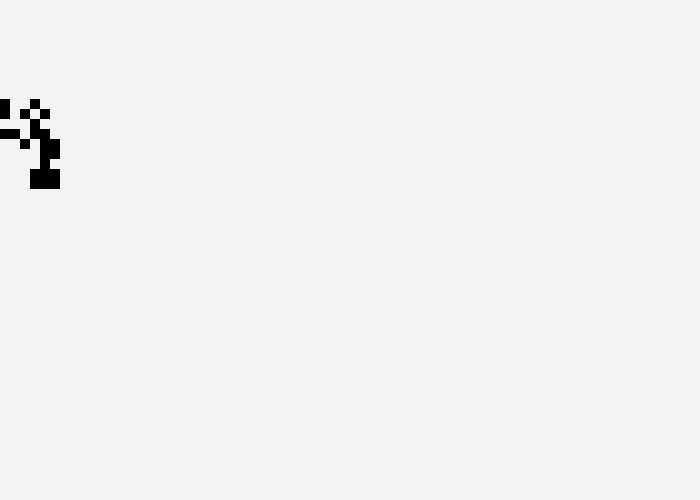
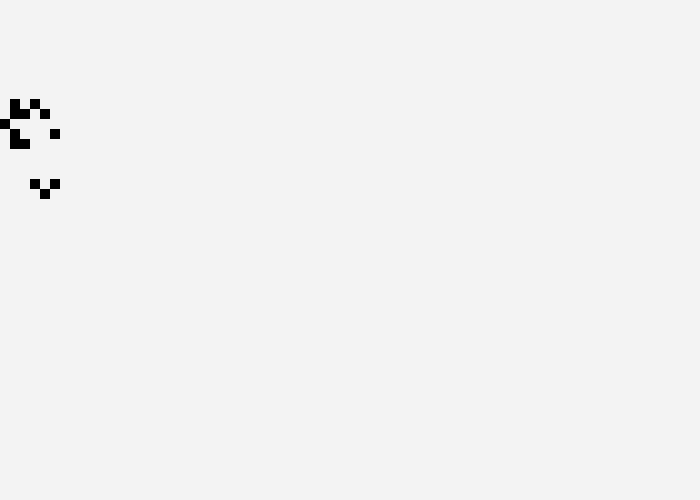
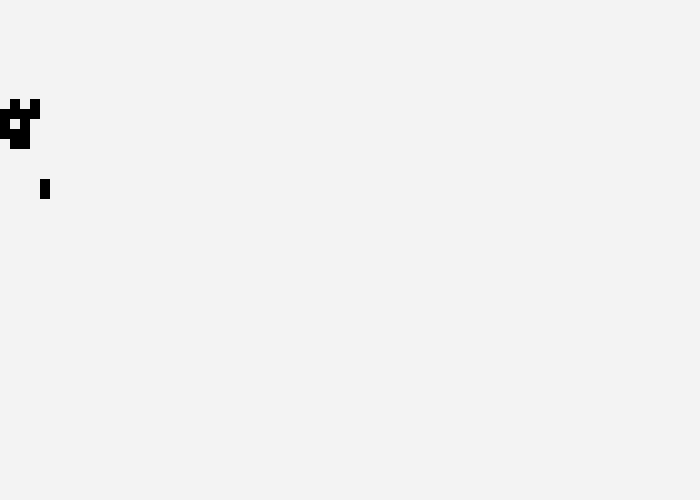
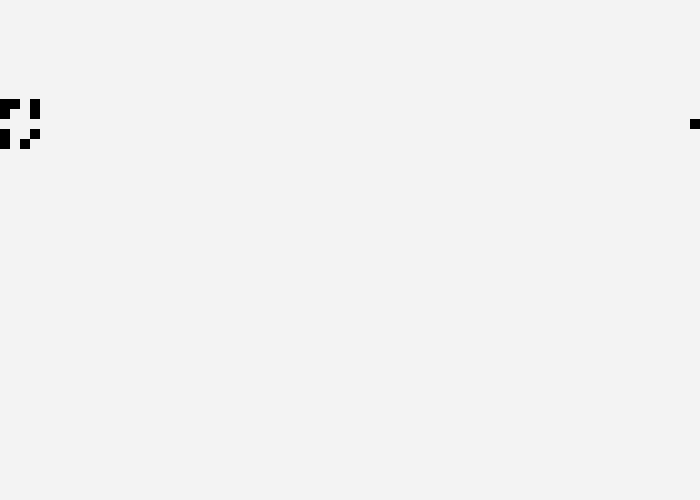
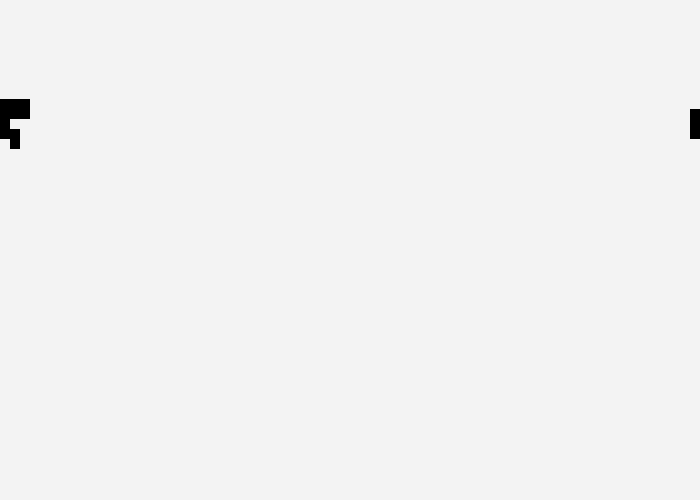
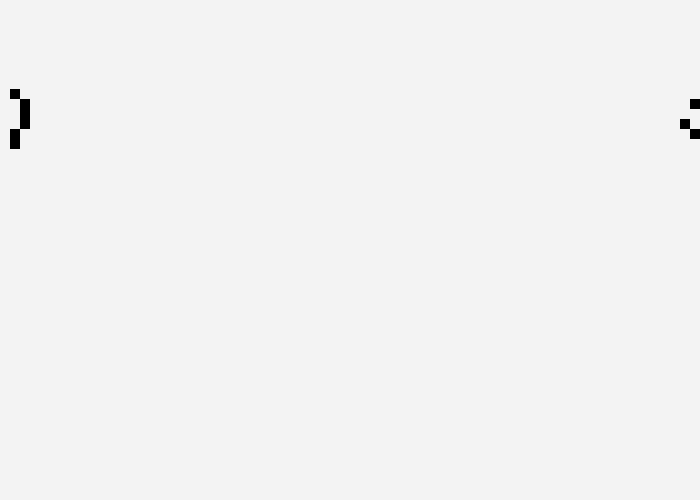
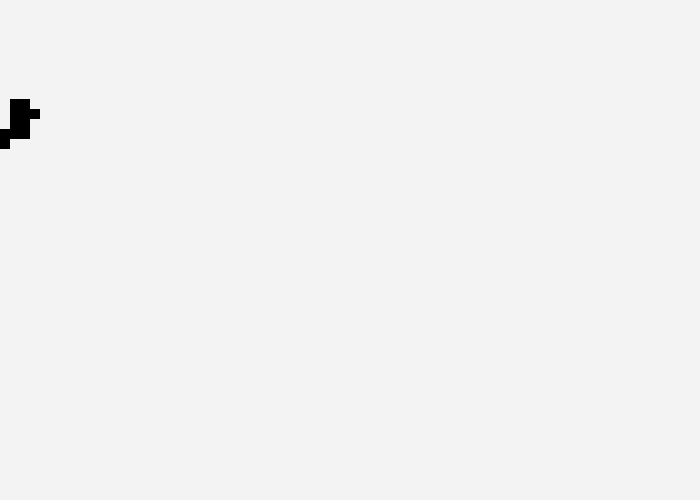
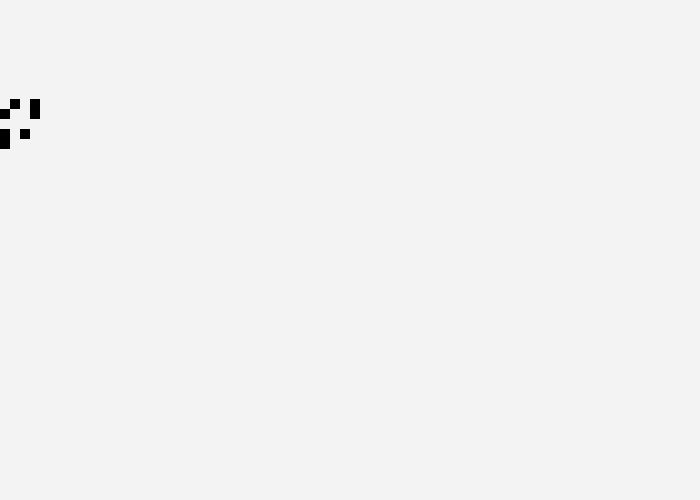
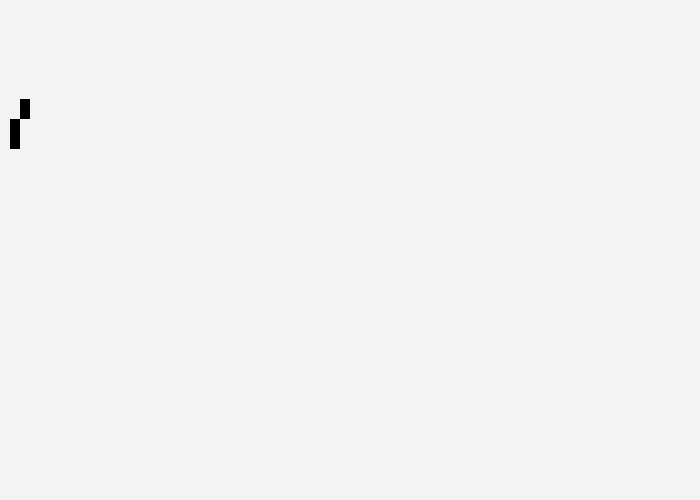
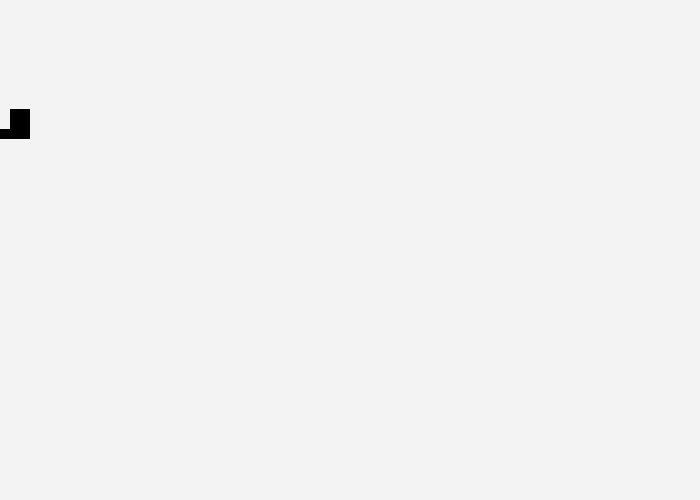
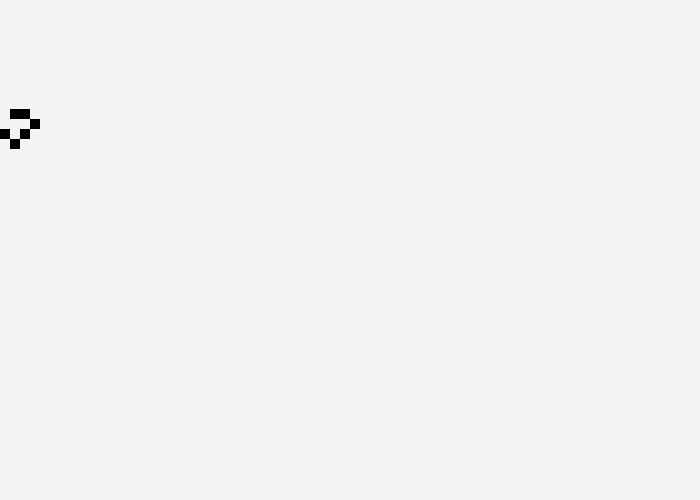
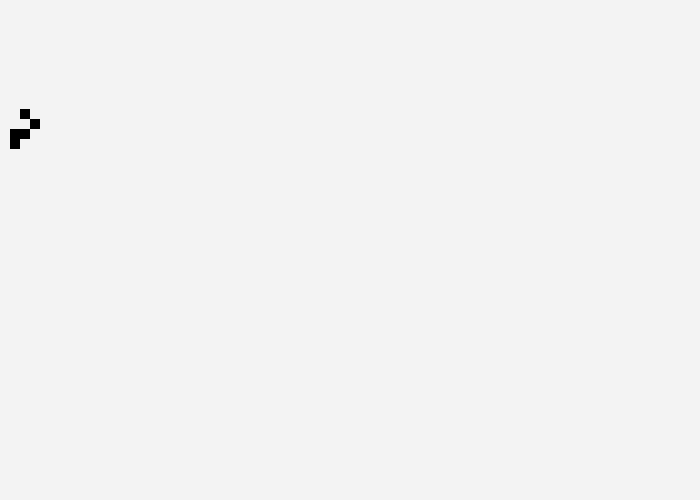
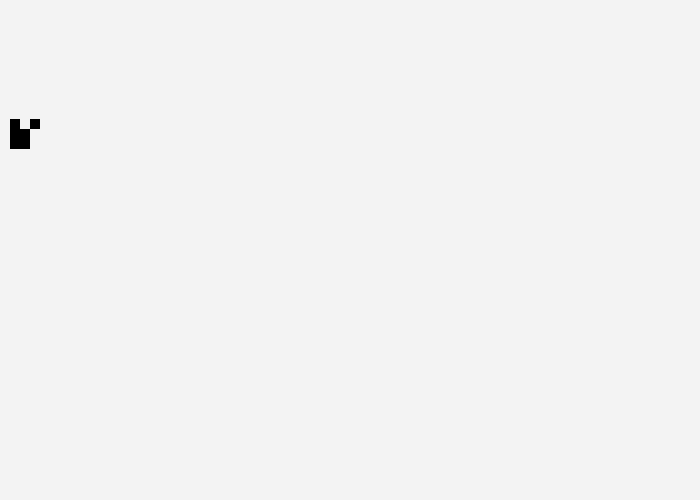
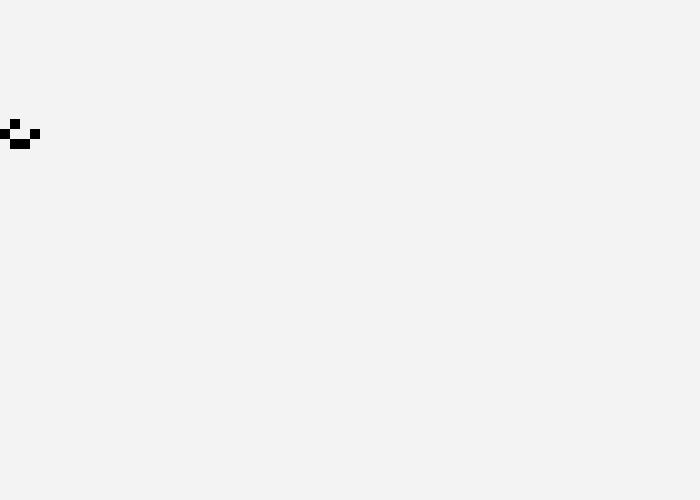
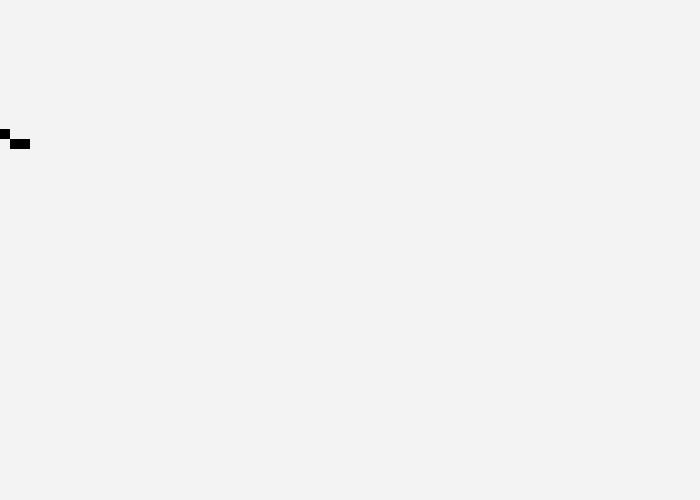
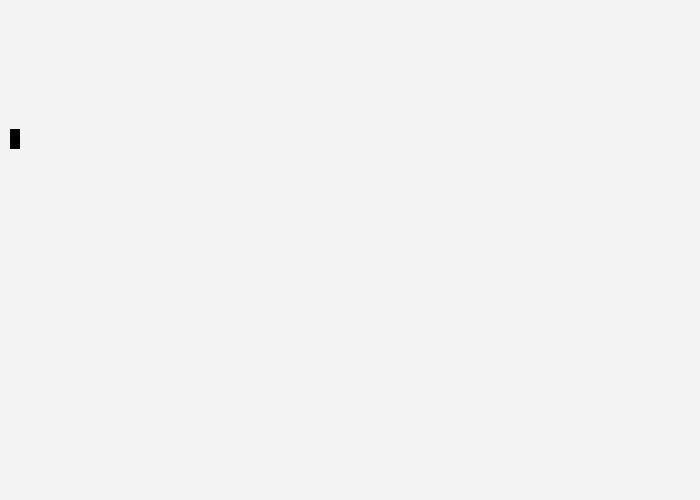
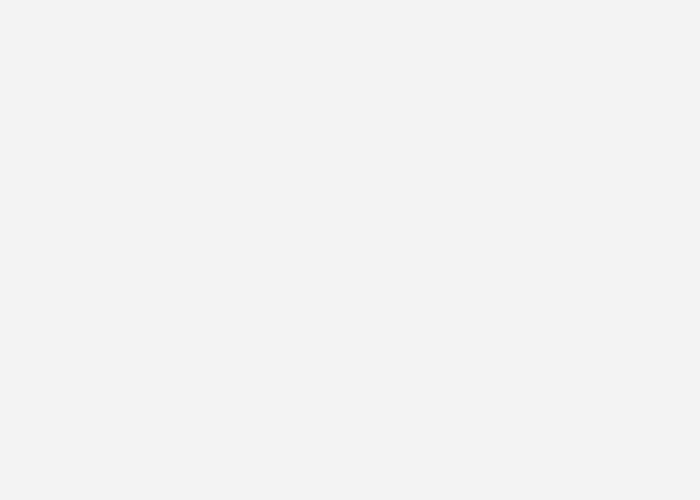
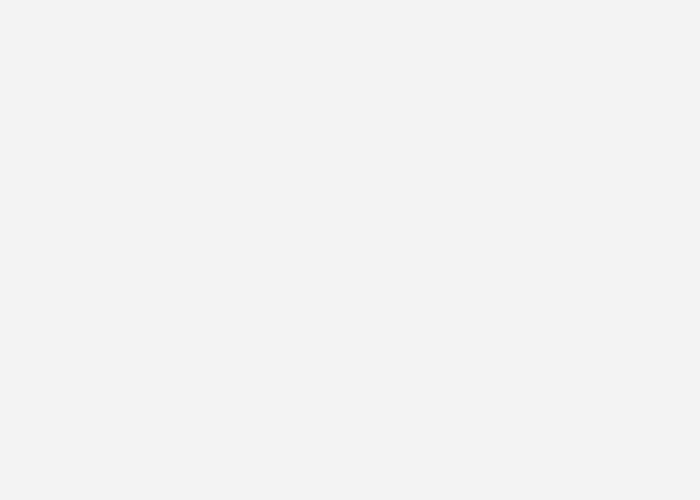
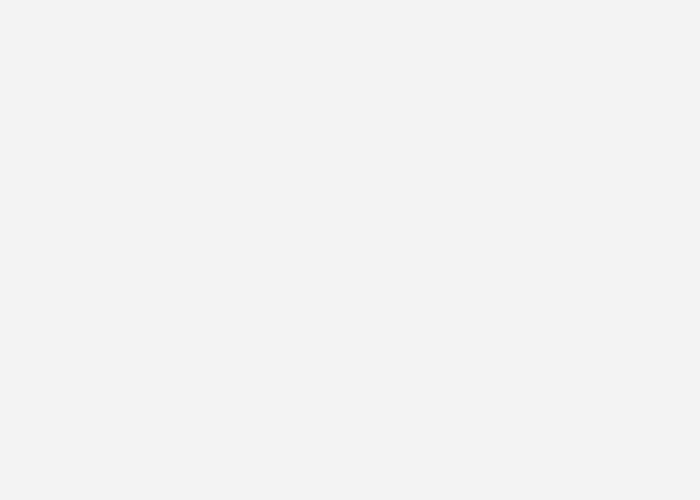
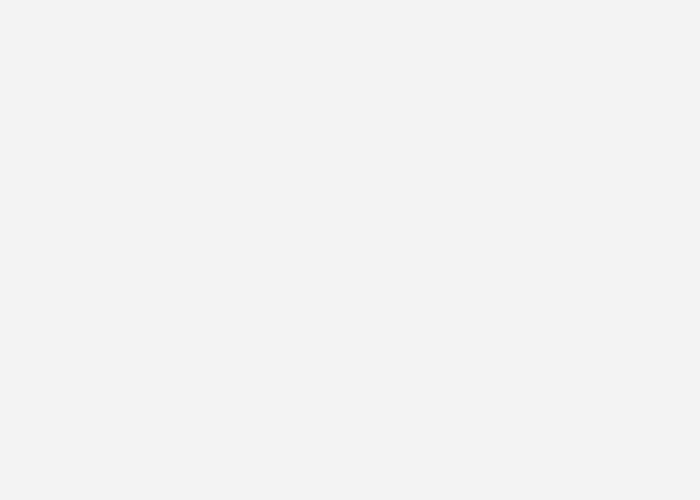
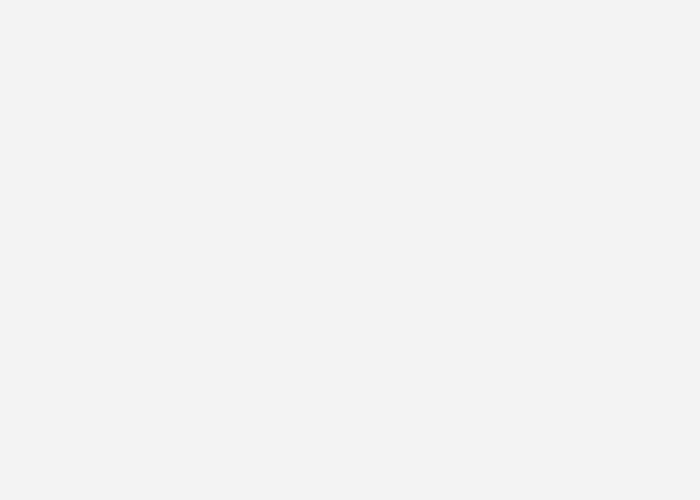
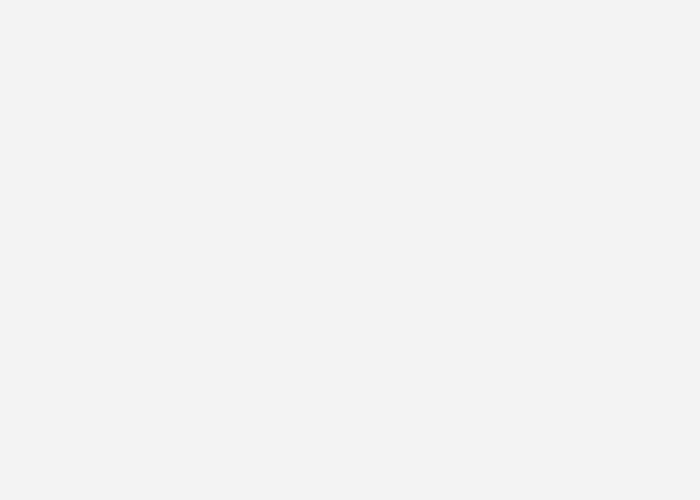
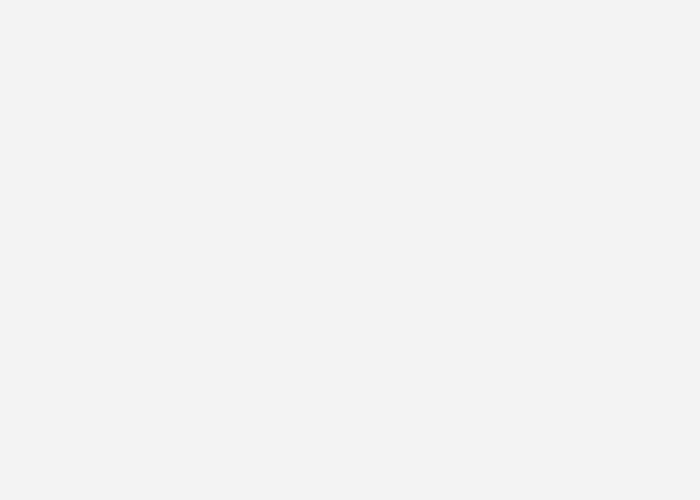
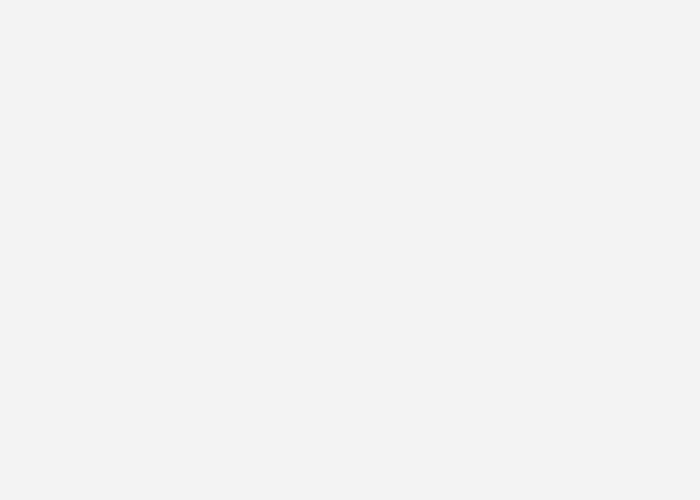
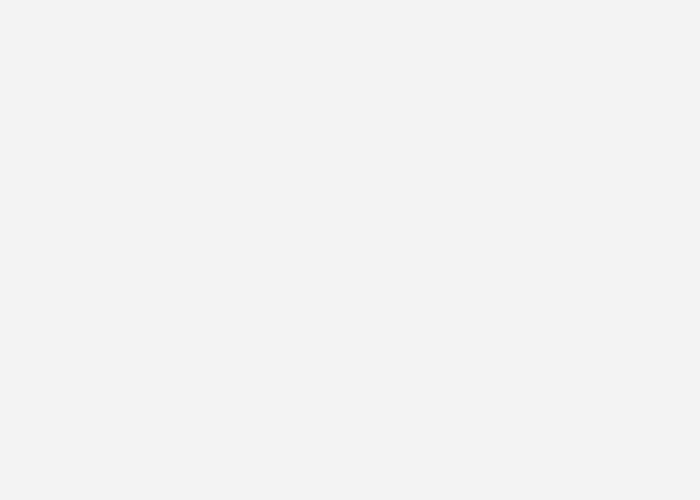
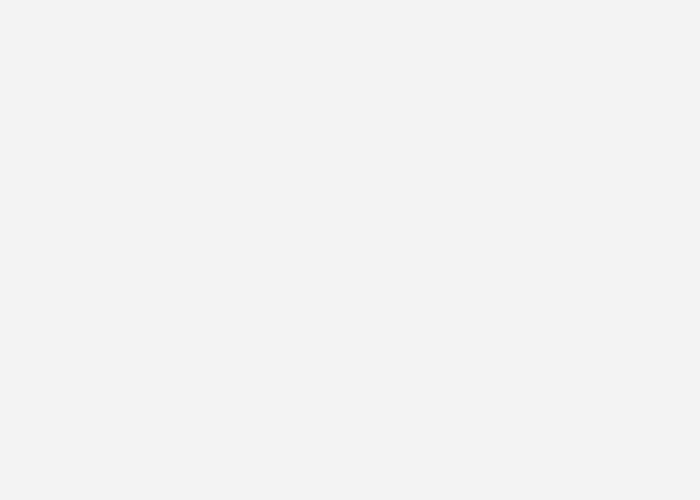
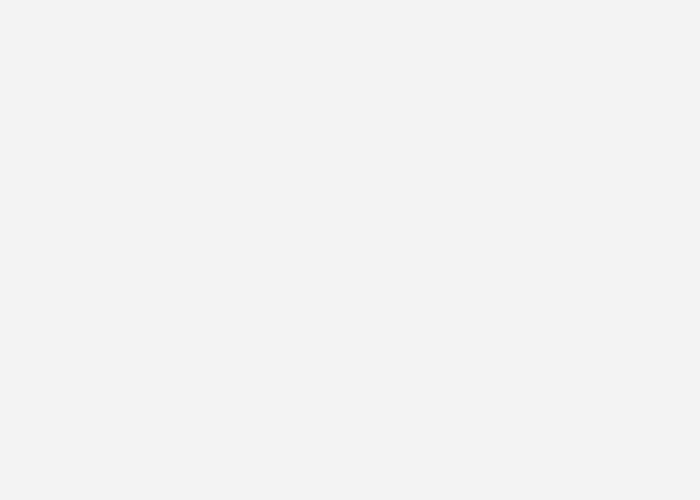
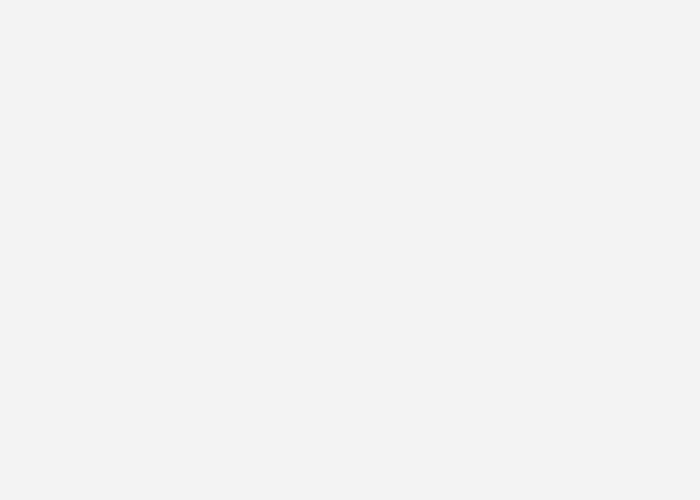
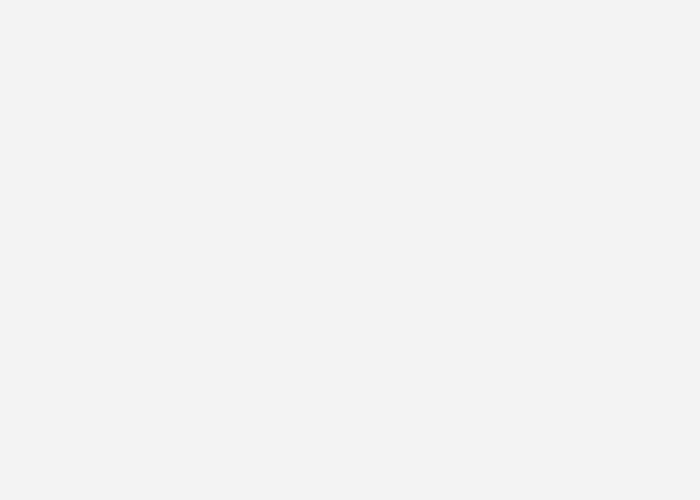
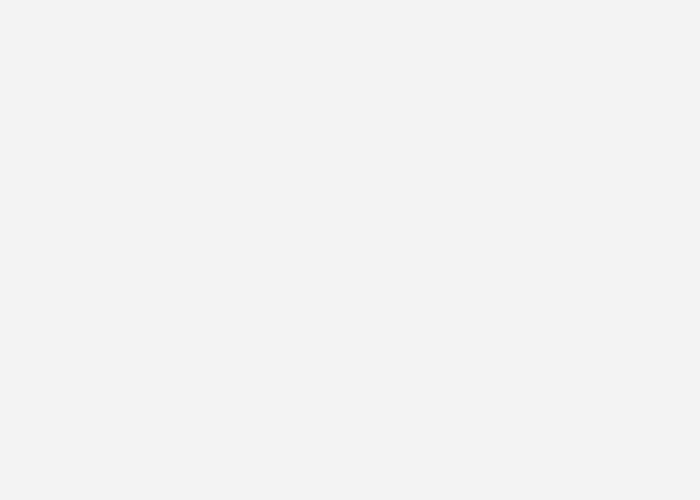
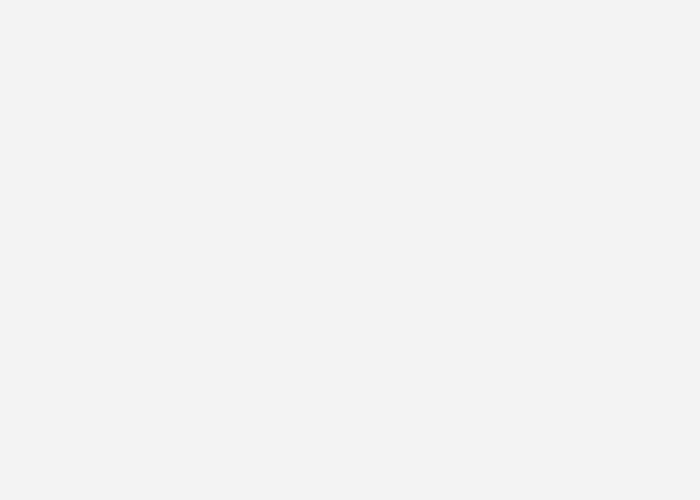
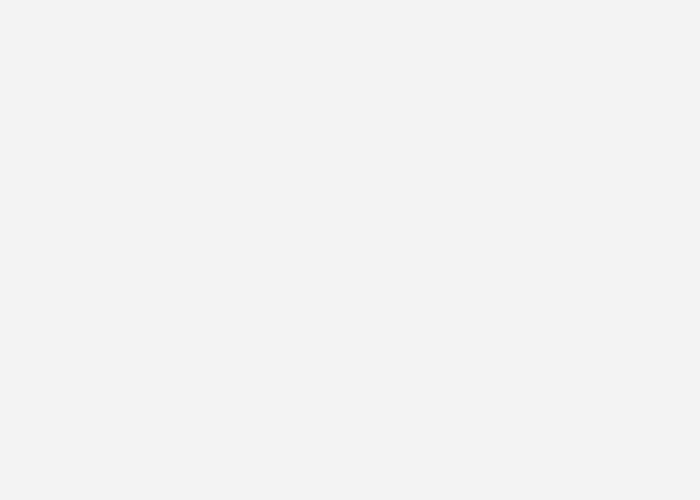
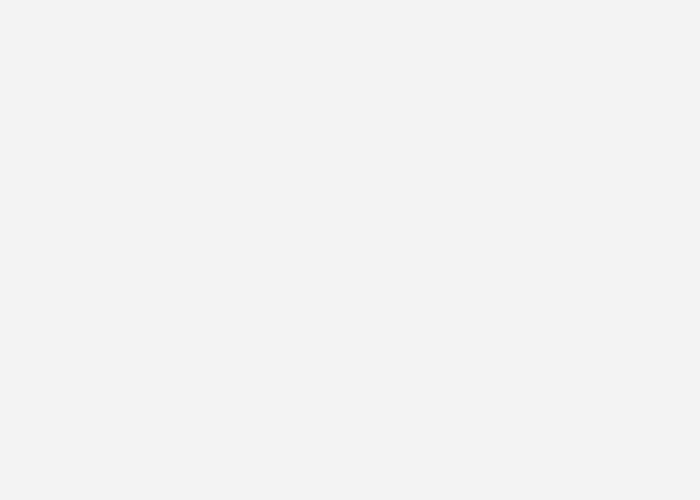
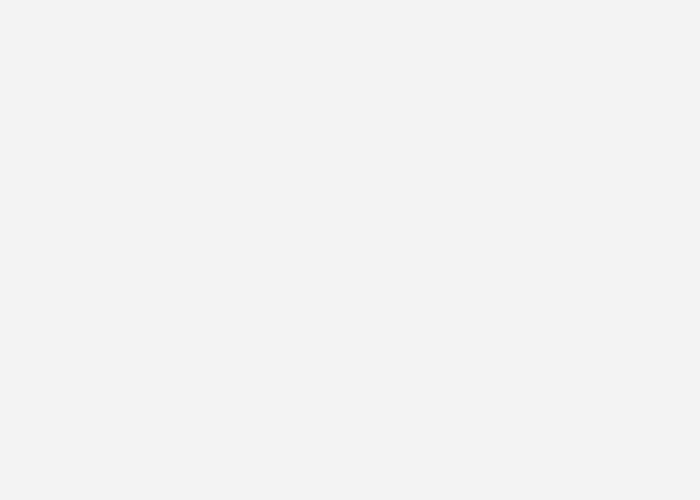
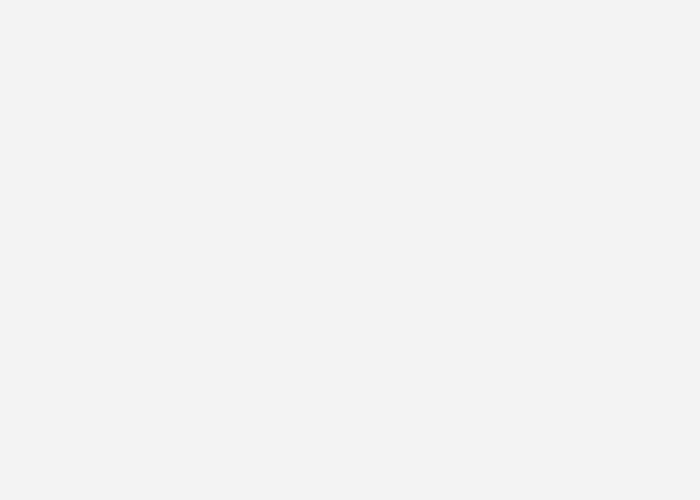
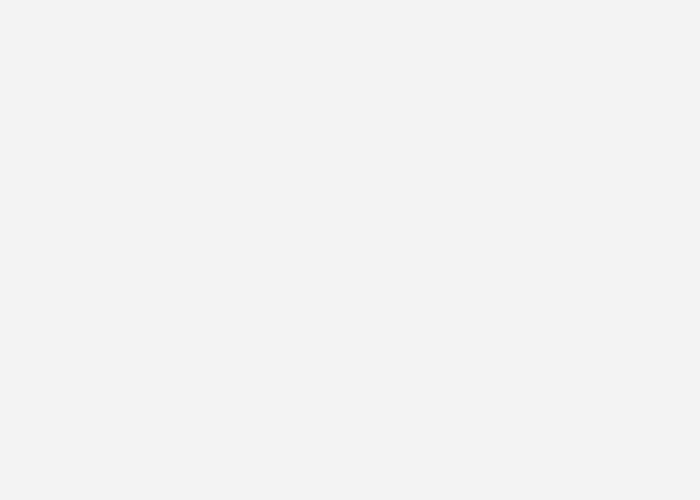
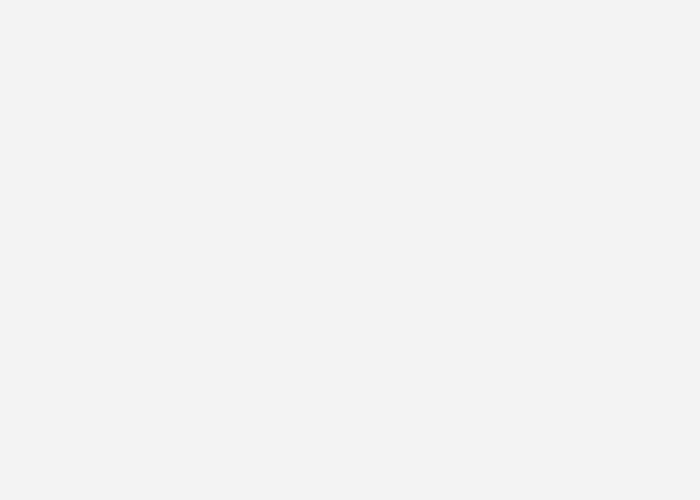
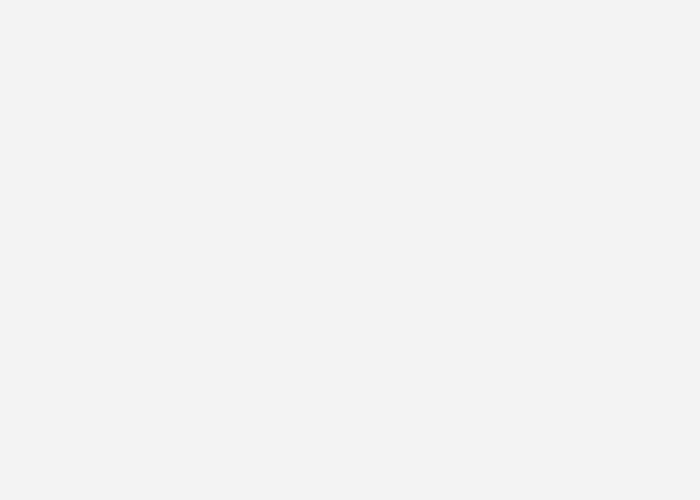
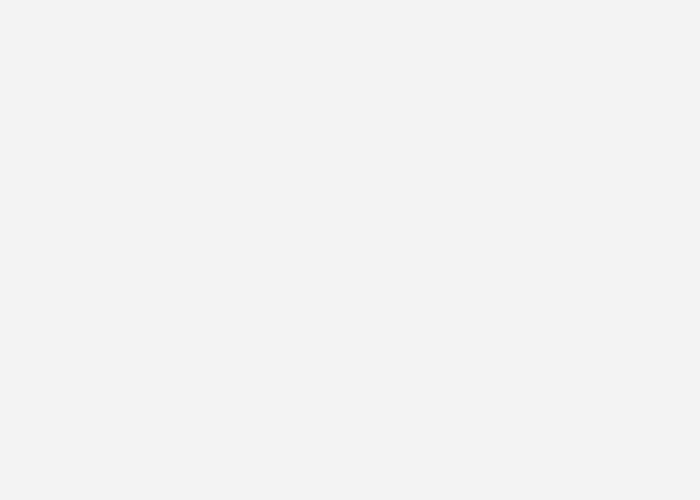
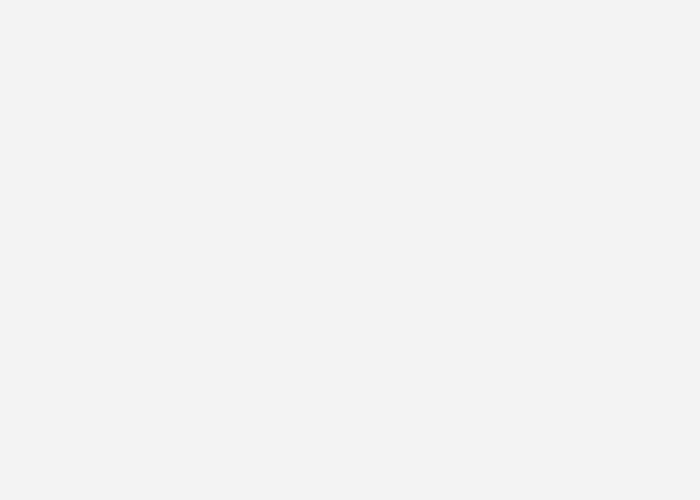
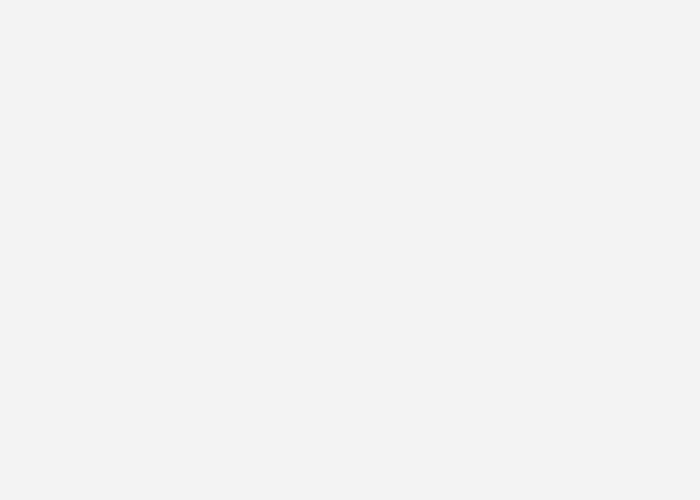
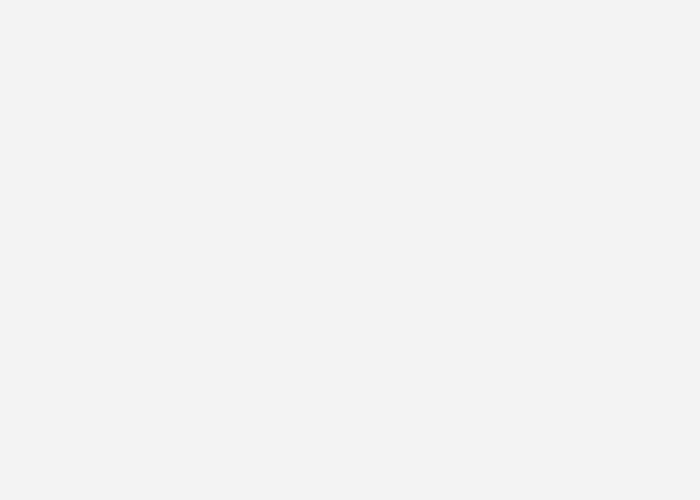
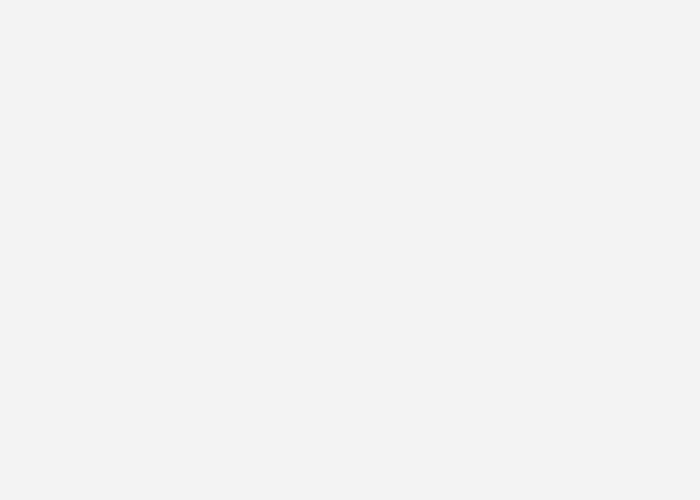
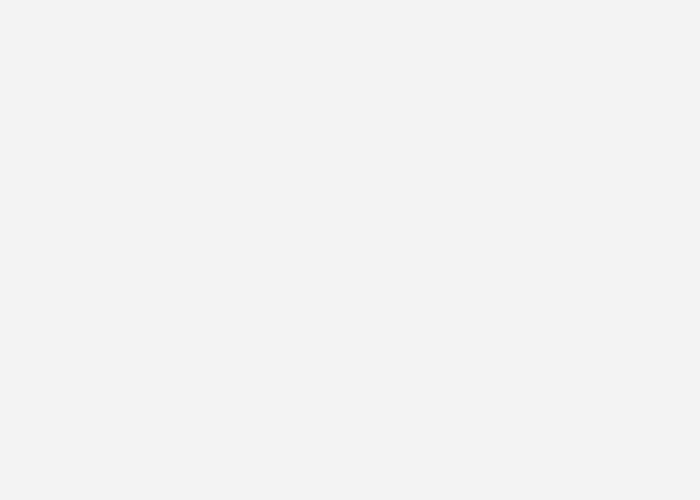
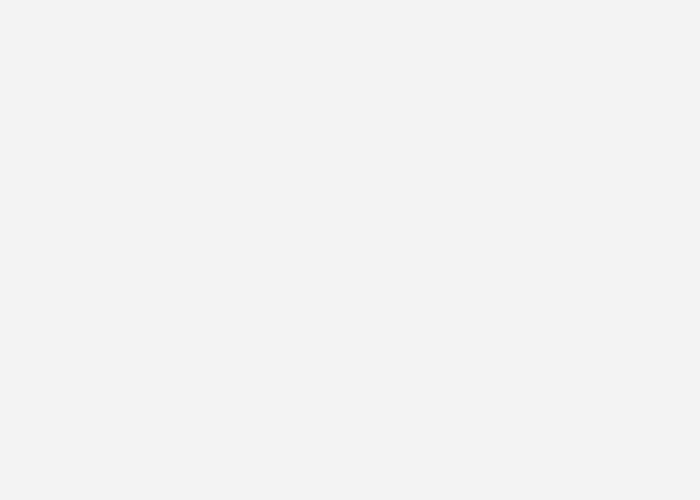
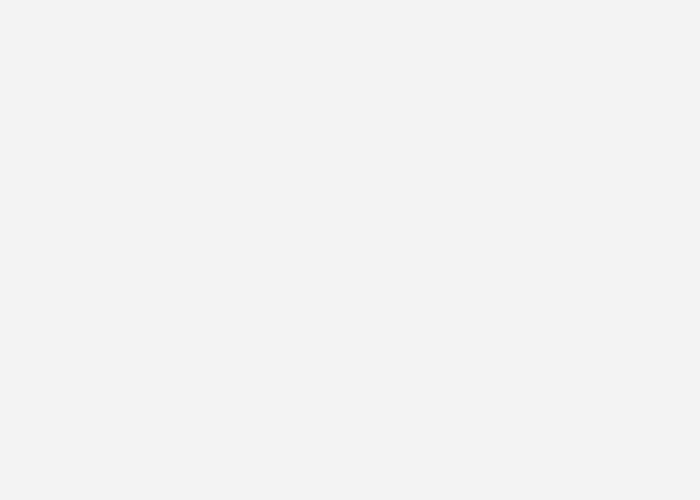
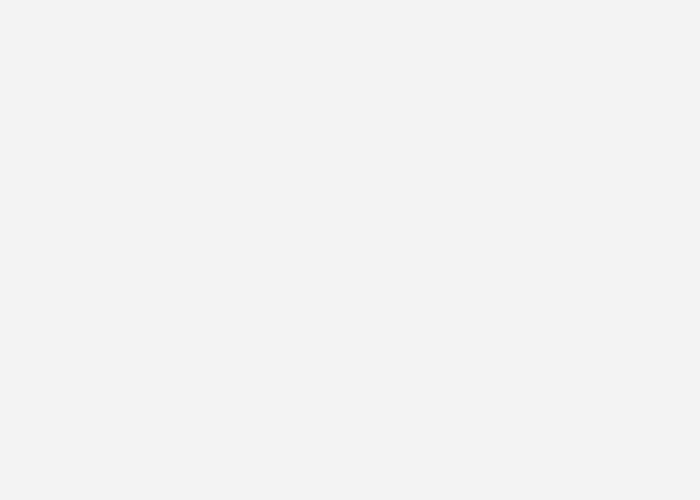
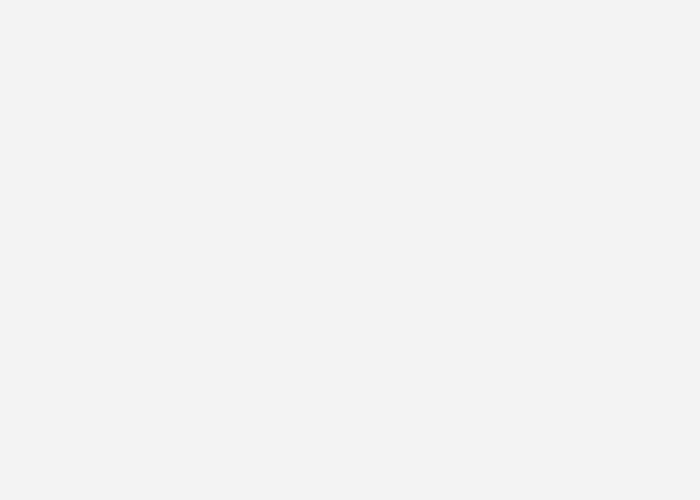
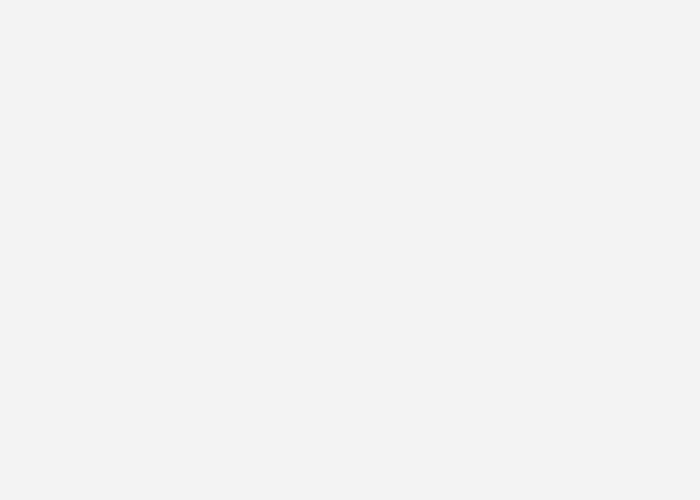
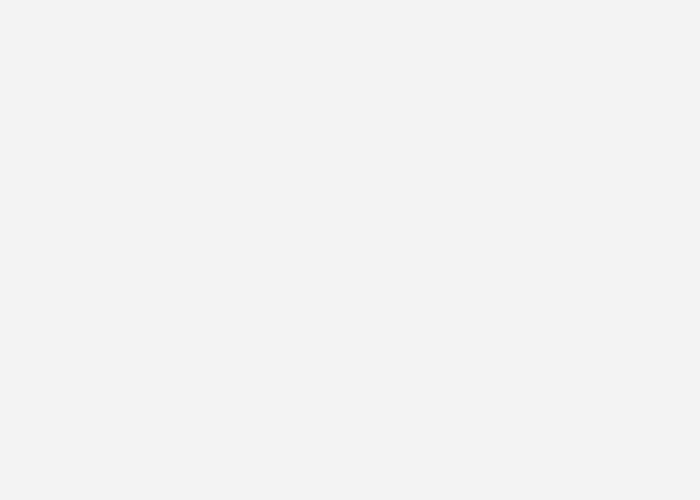
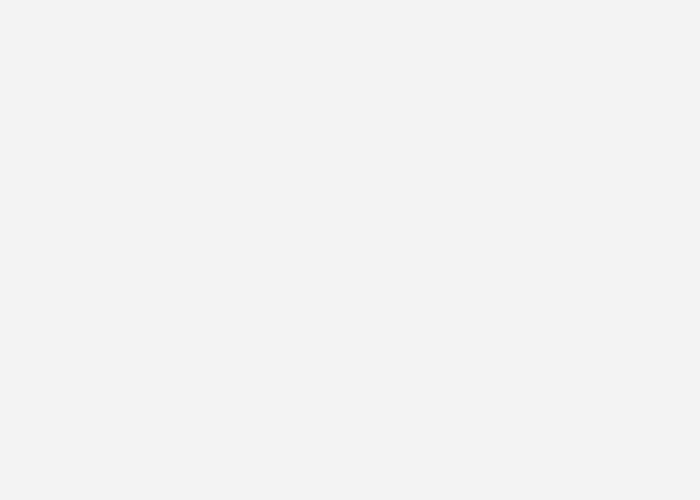
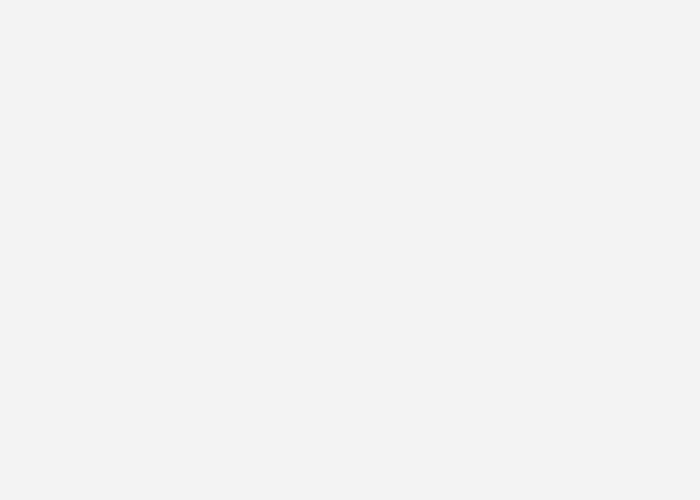
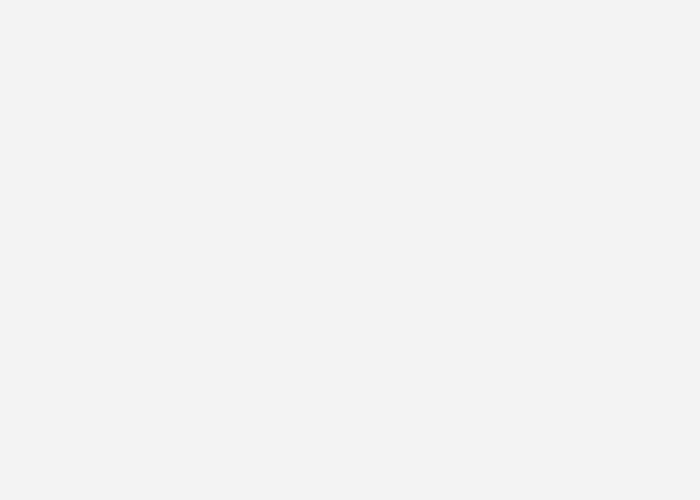
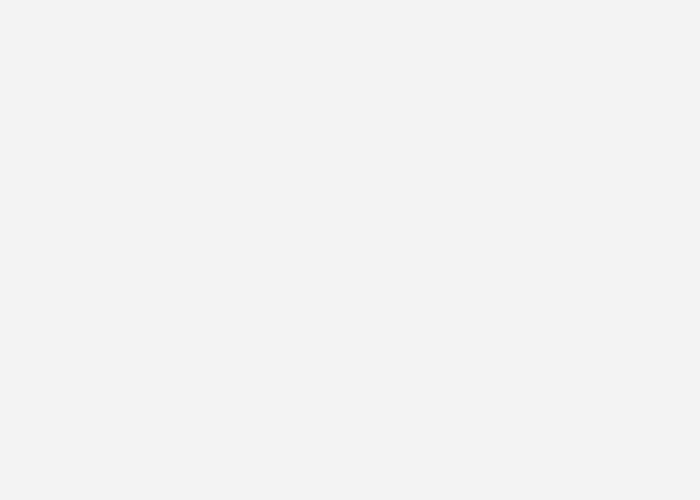
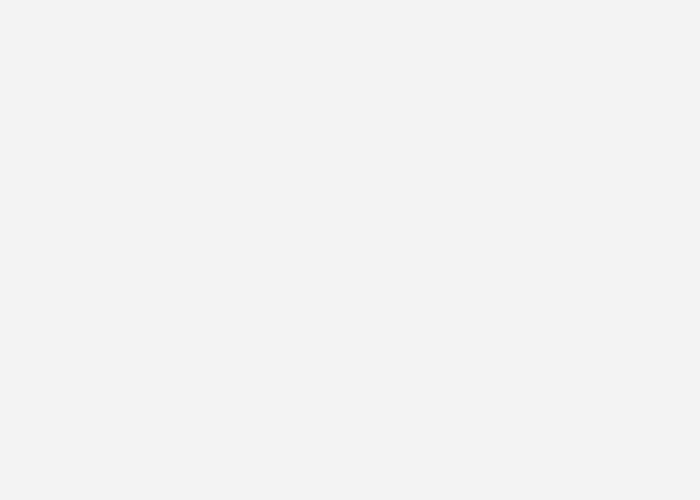
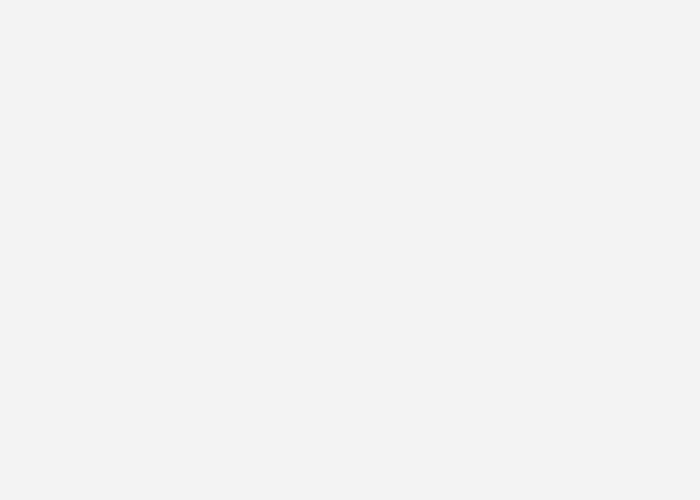
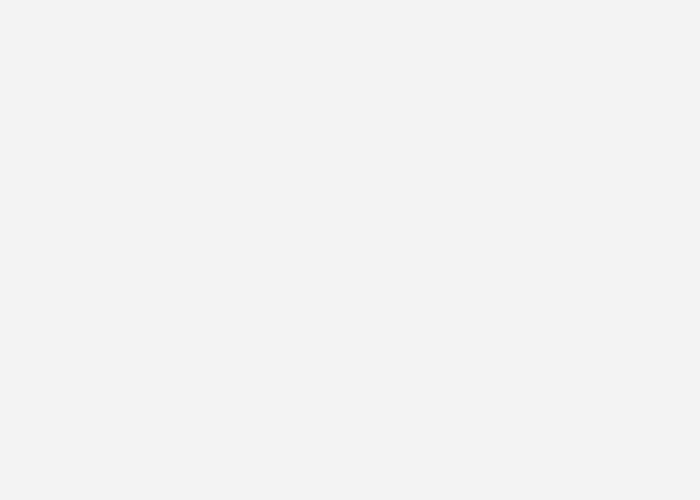
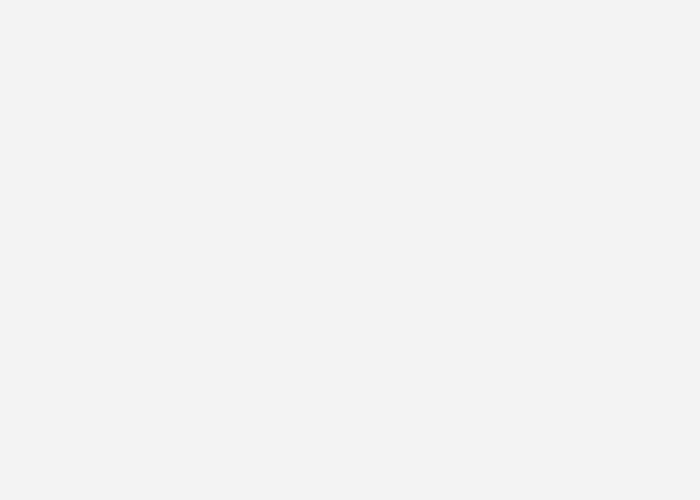
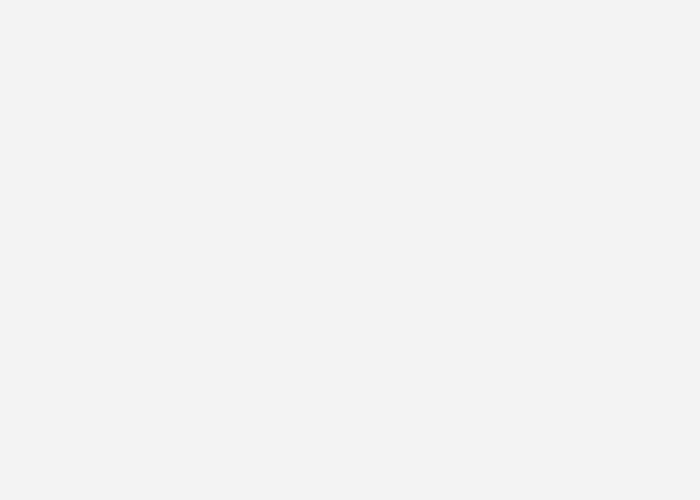
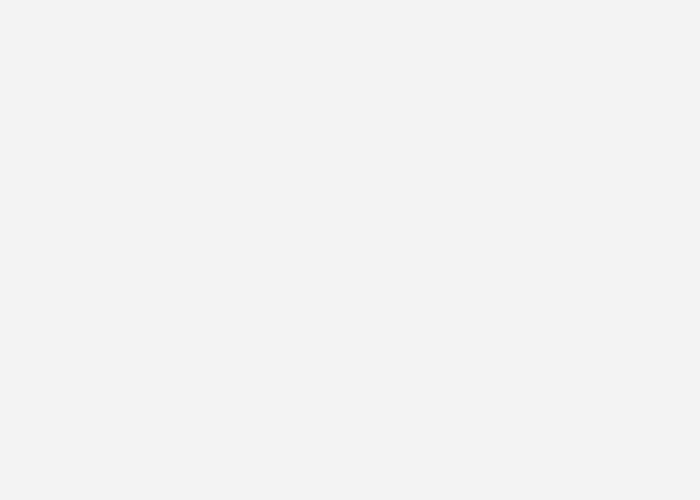
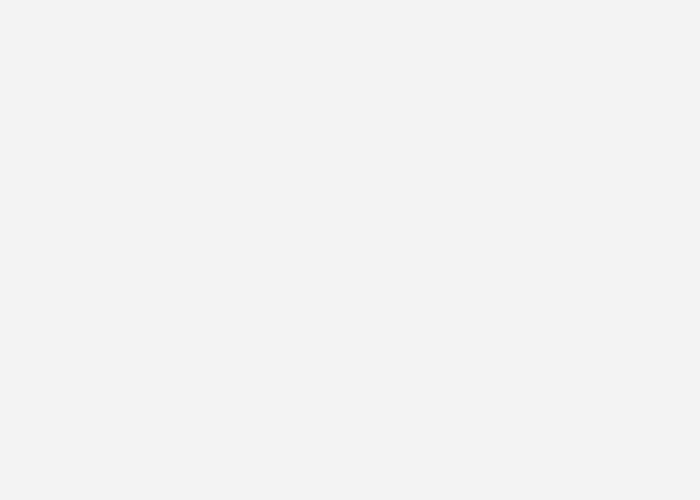
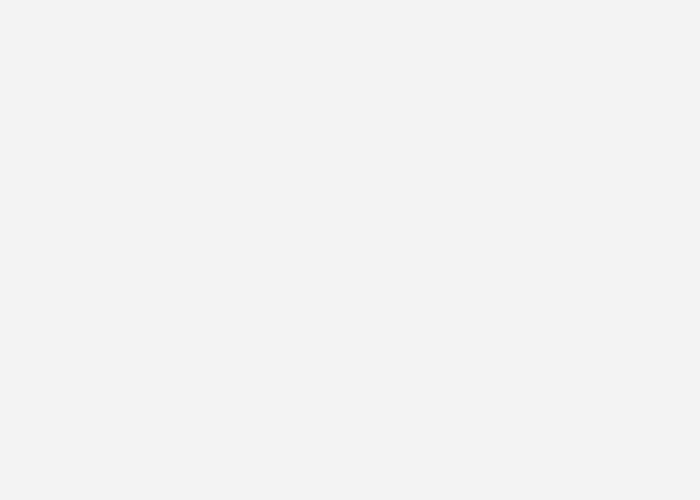
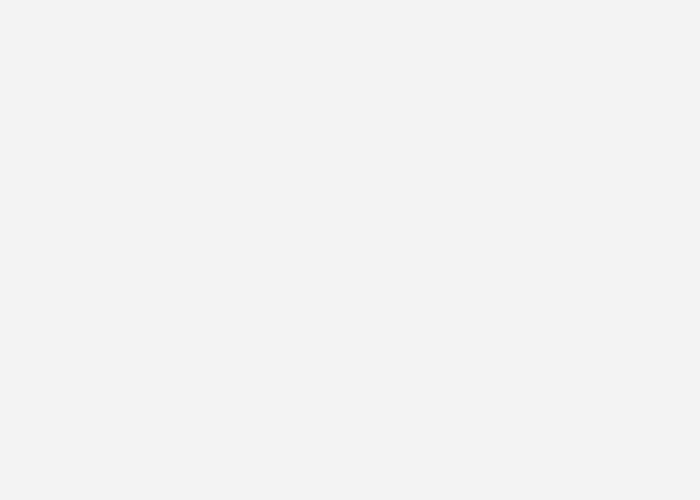
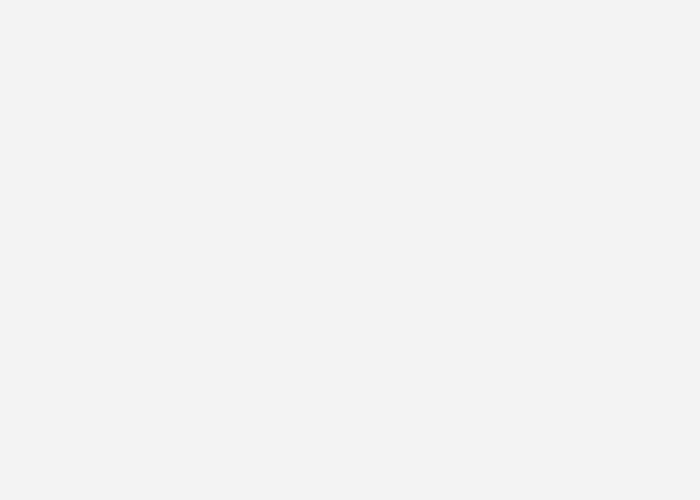
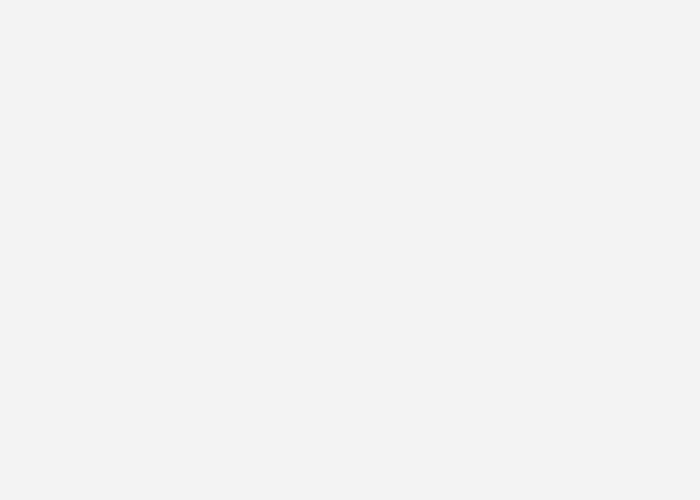
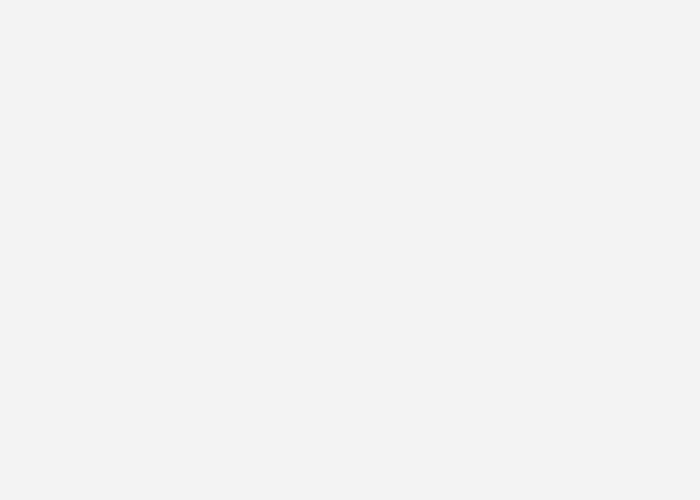

In [32]:
diehard = [[0, 0, 0, 0, 0, 0, 1, 0],
           [1, 1, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 1, 1, 1]]
X = np.zeros((50, 70))
X[1:4,1:9] = diehard

life_animation(X, dpi=15, frames=180, interval=50, mode='once')

### Block Switch Engine


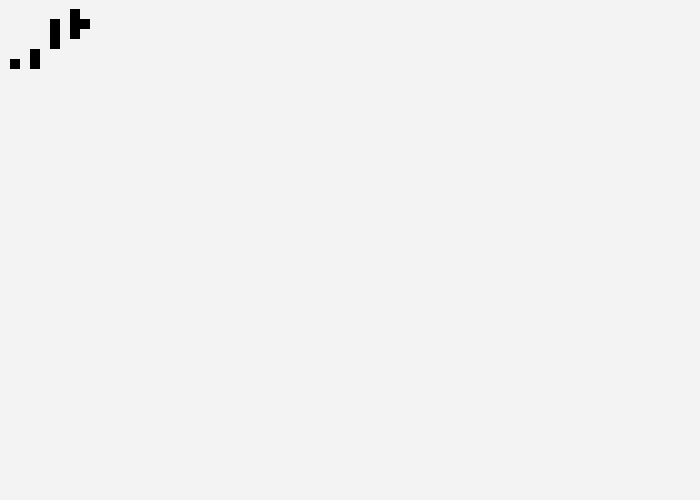
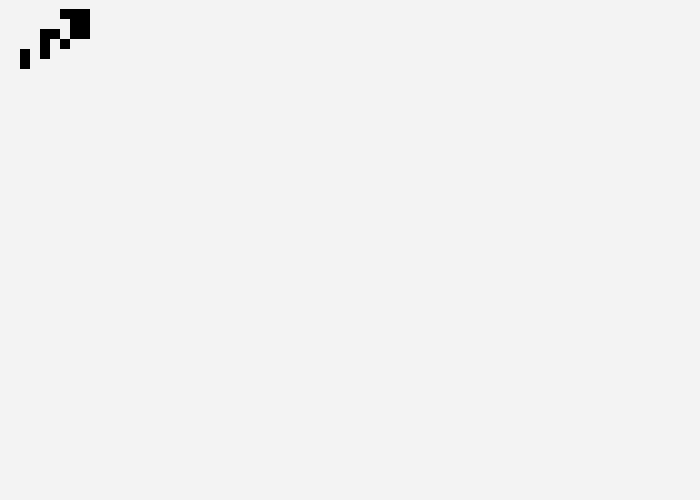
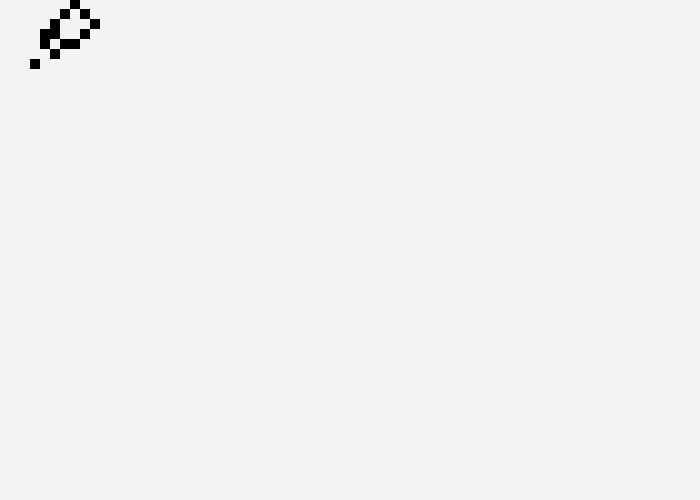
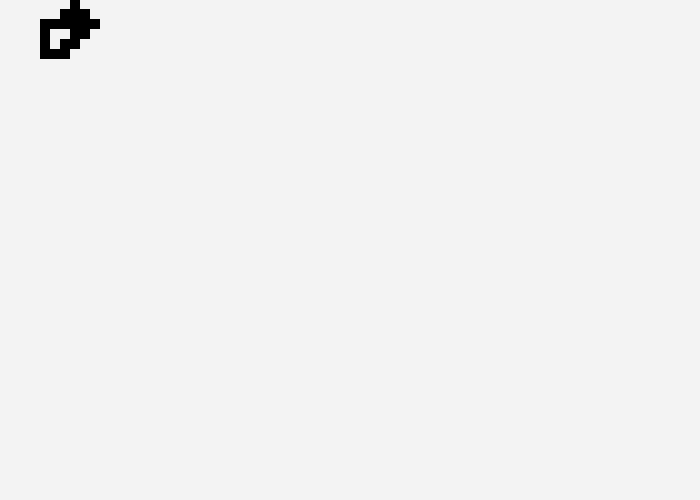
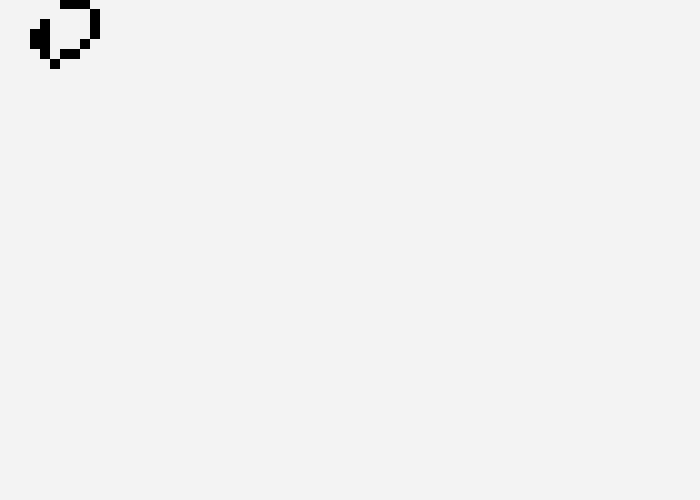
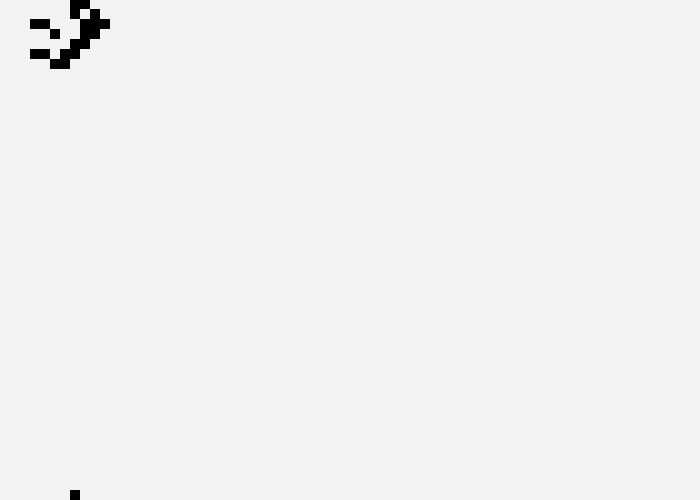
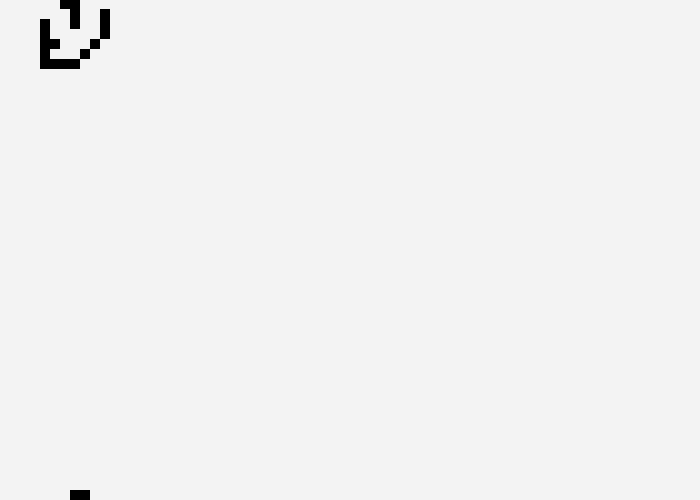
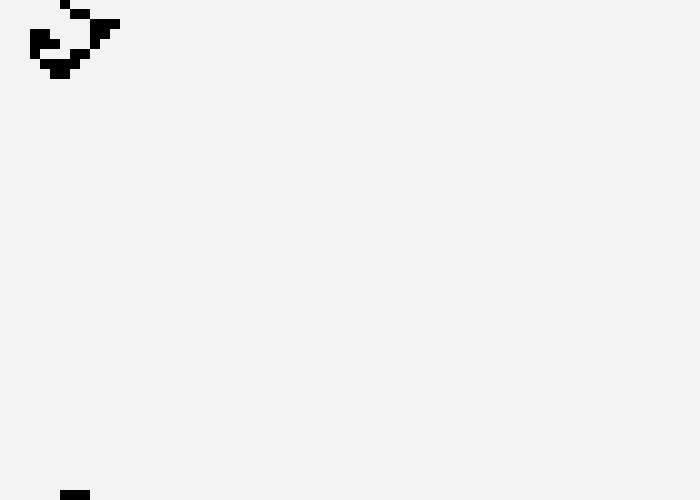
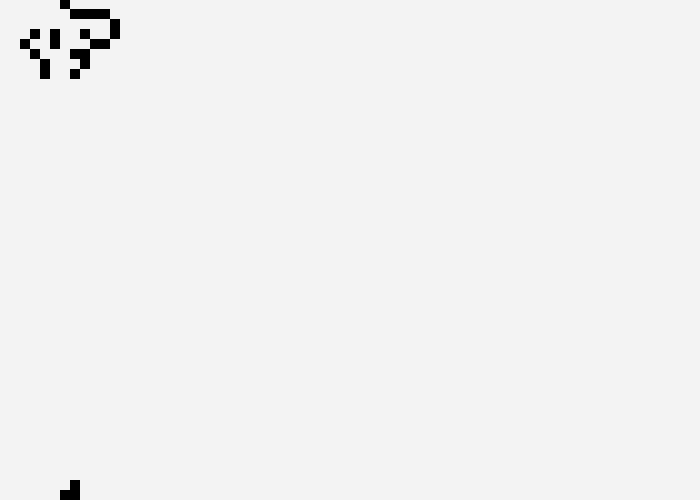
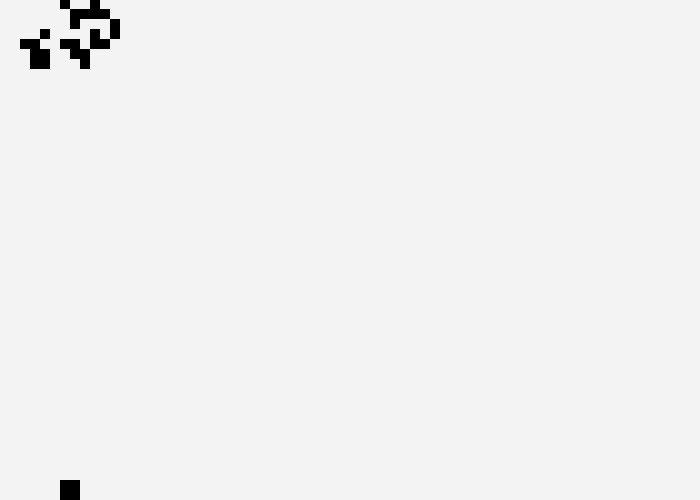
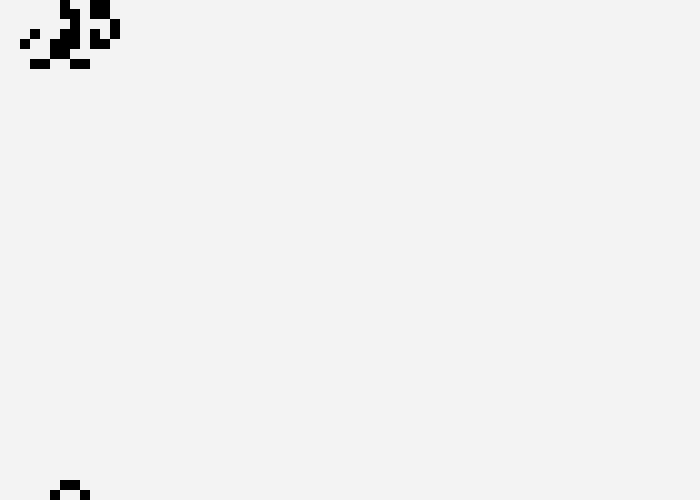
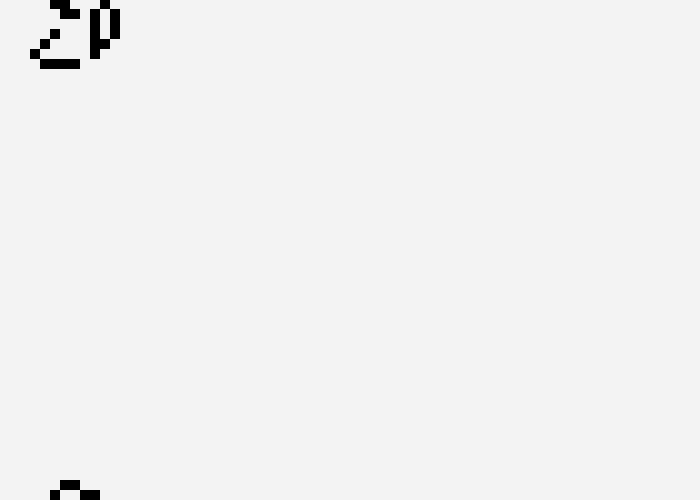
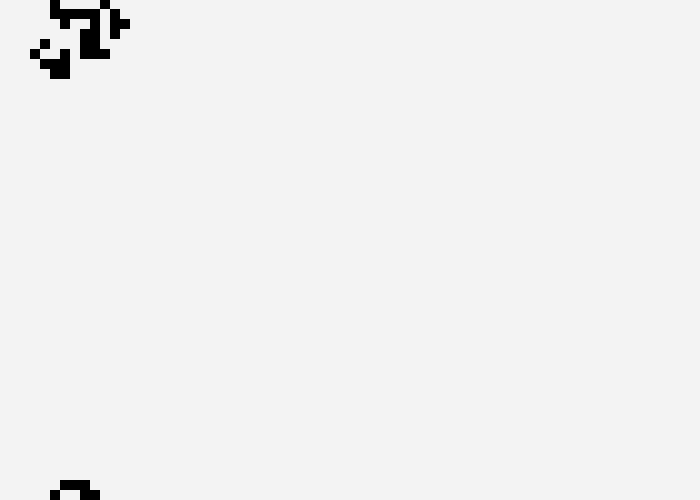
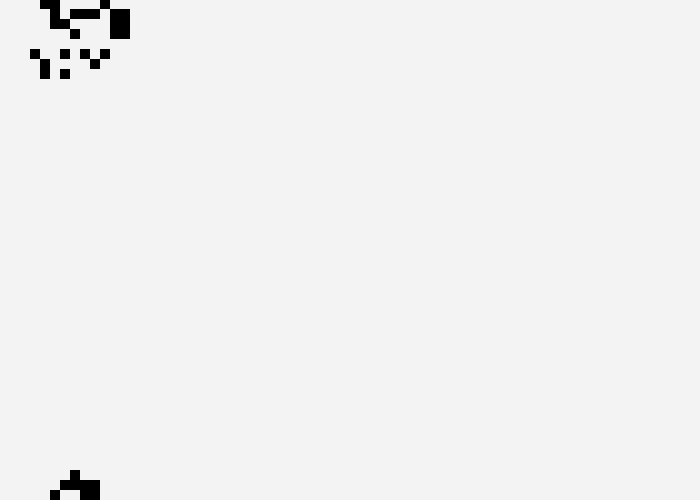
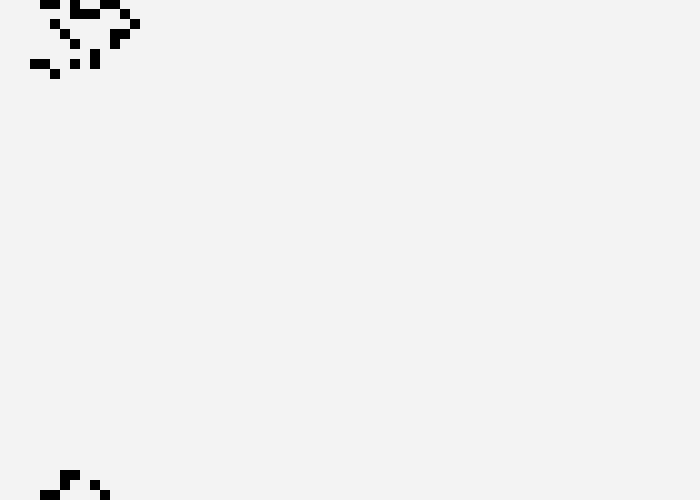
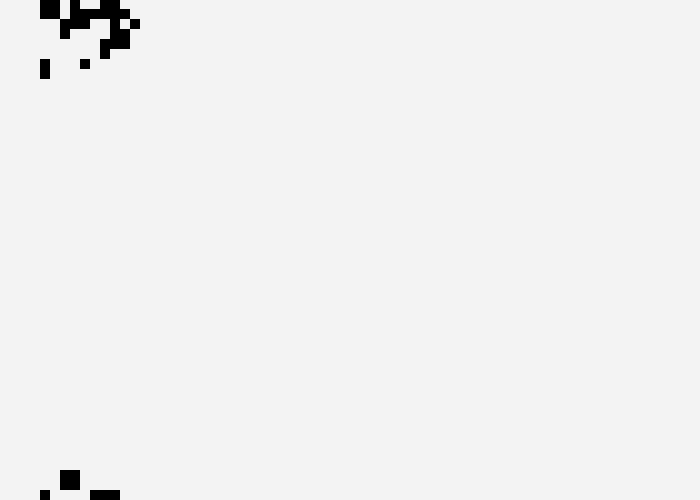
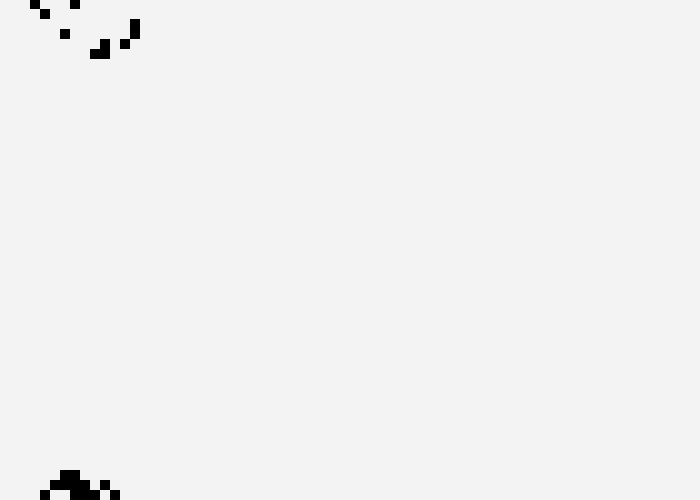
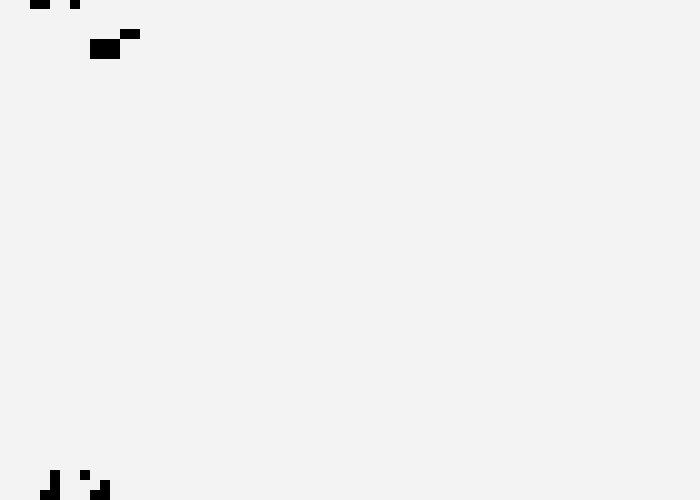
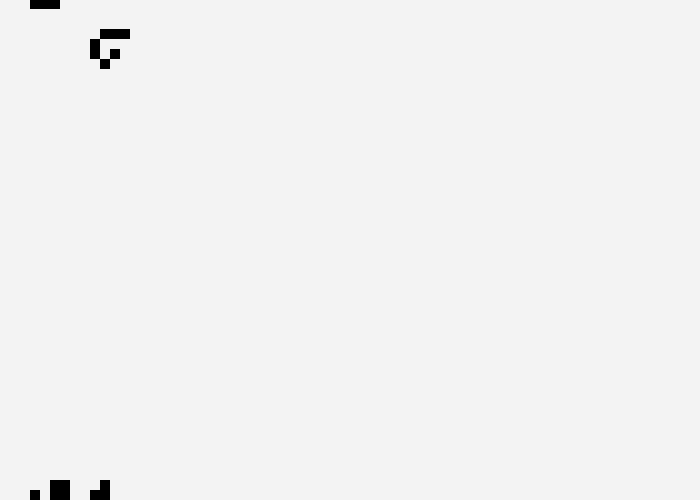
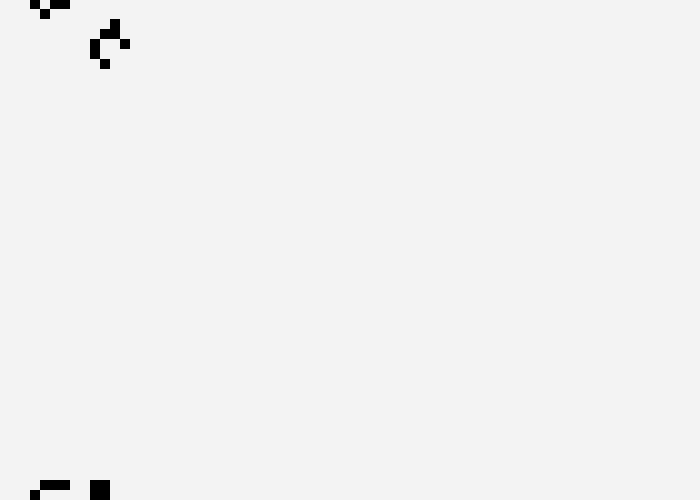
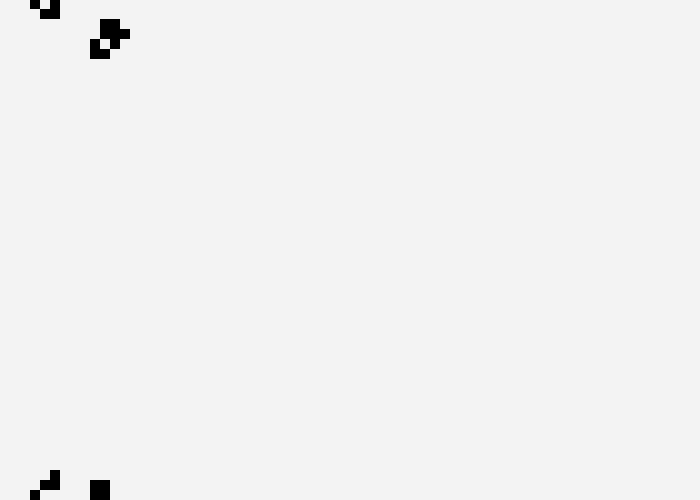
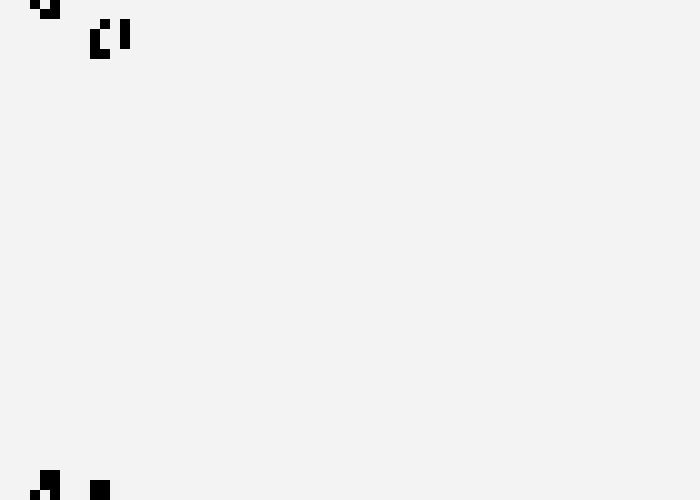
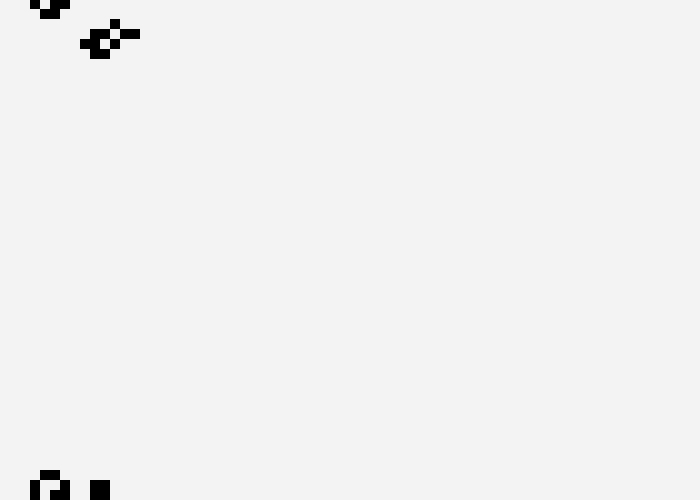
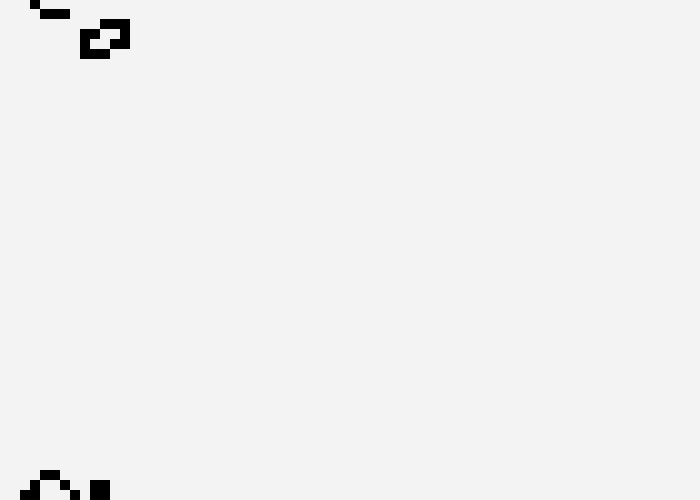
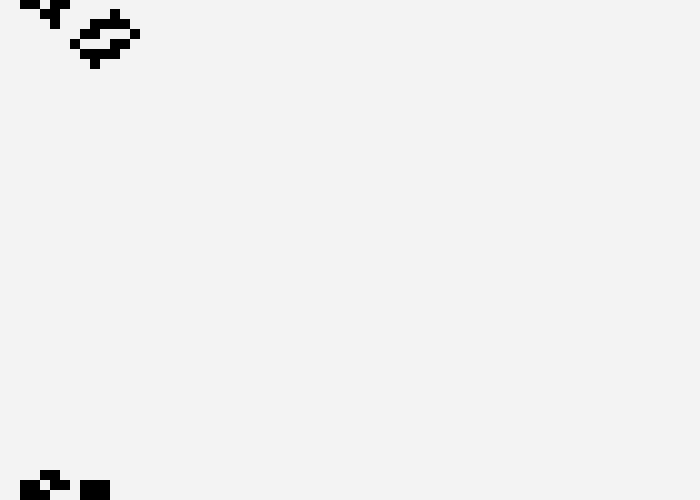
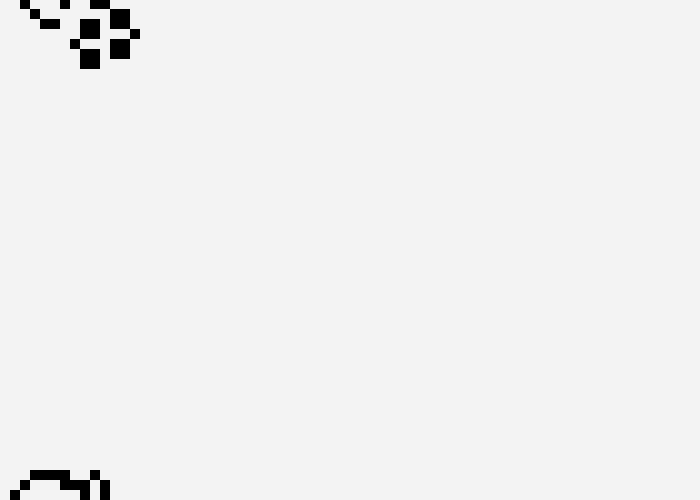
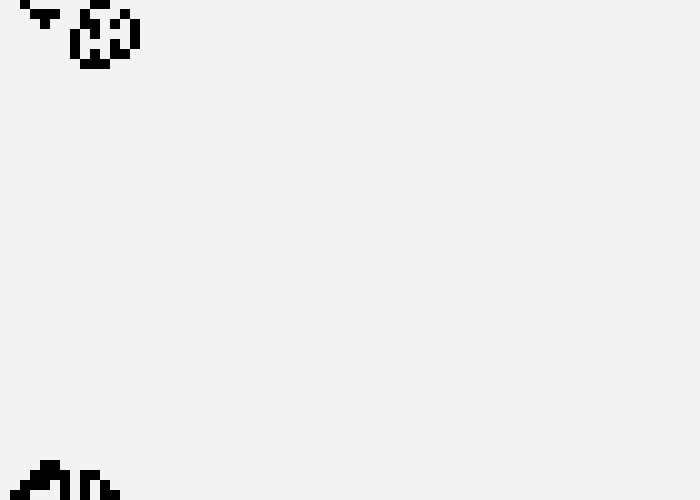
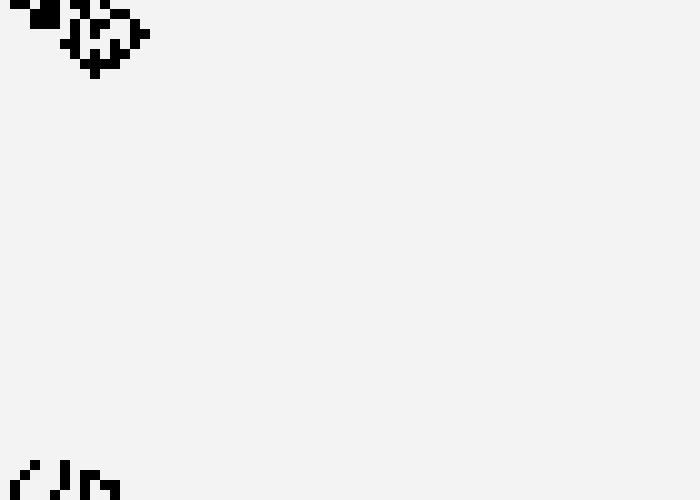
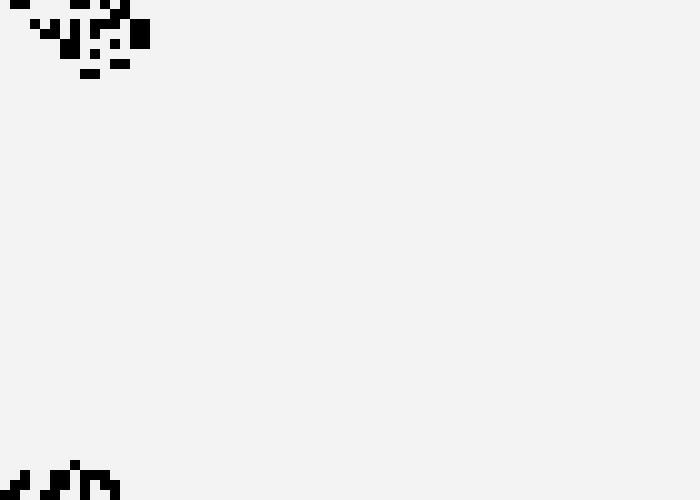
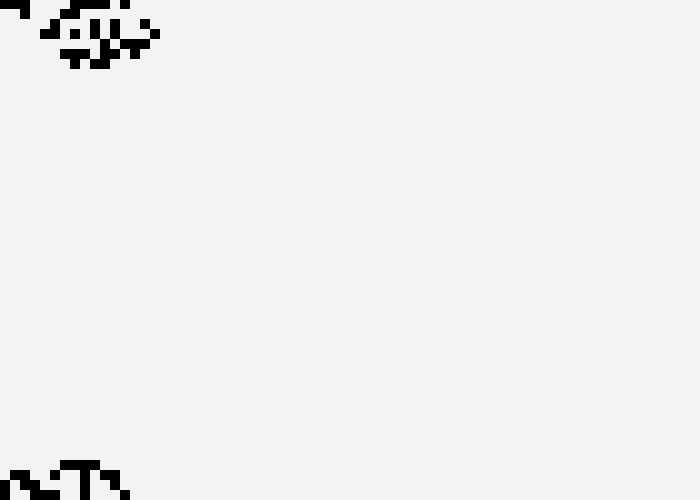
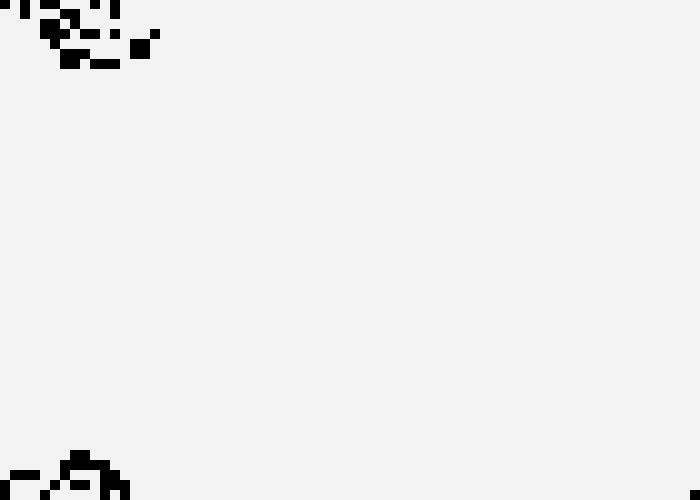
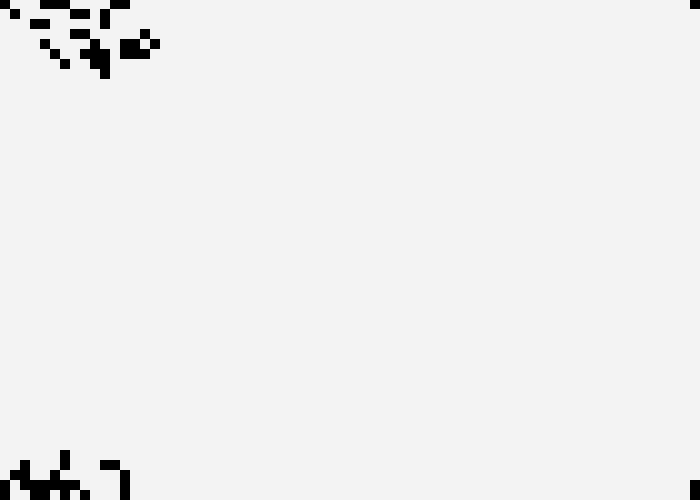
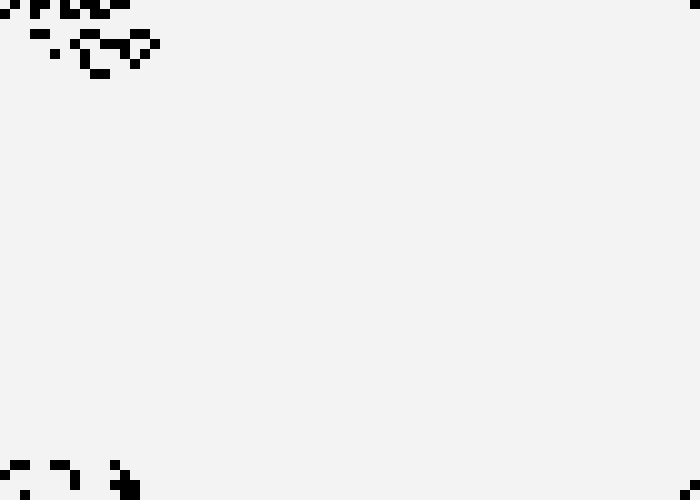
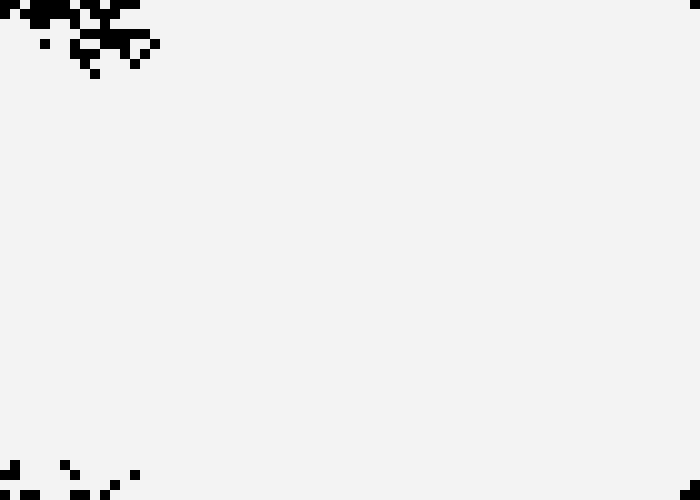
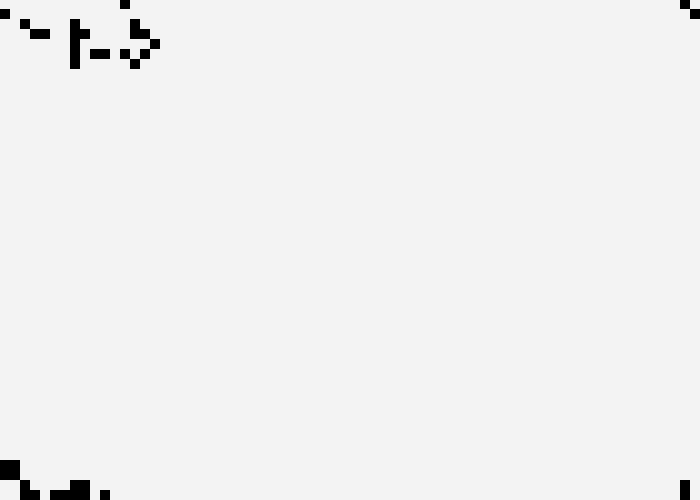
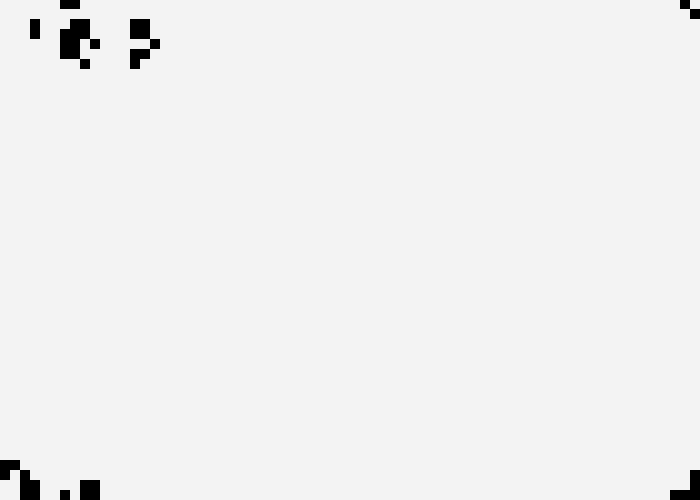
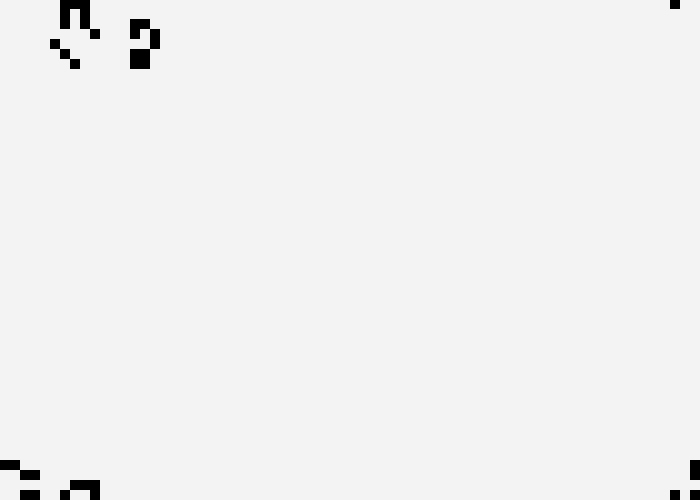
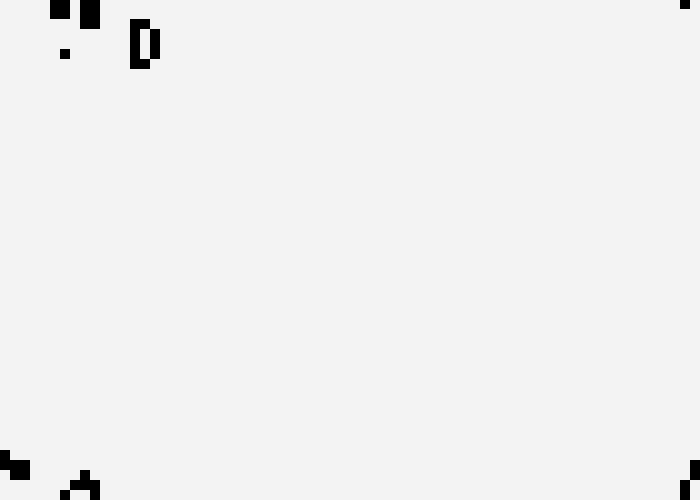
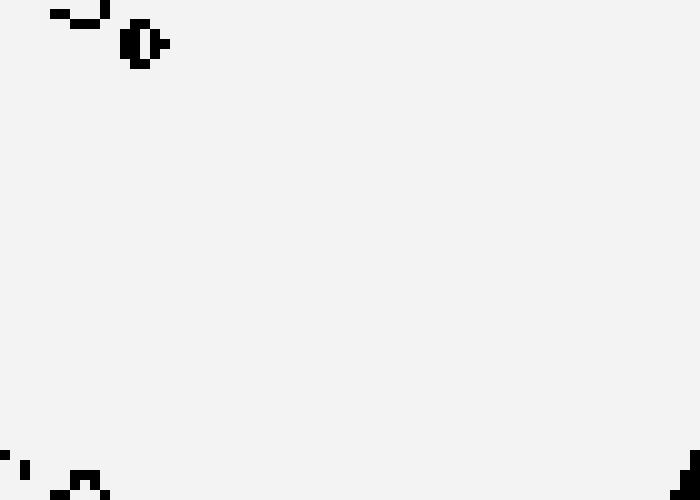
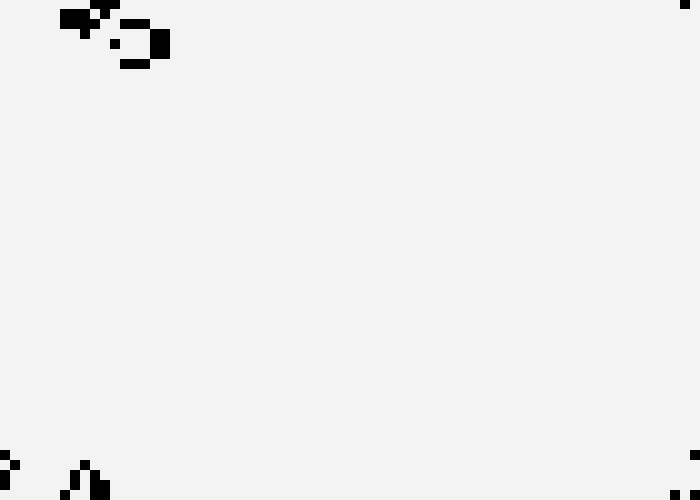
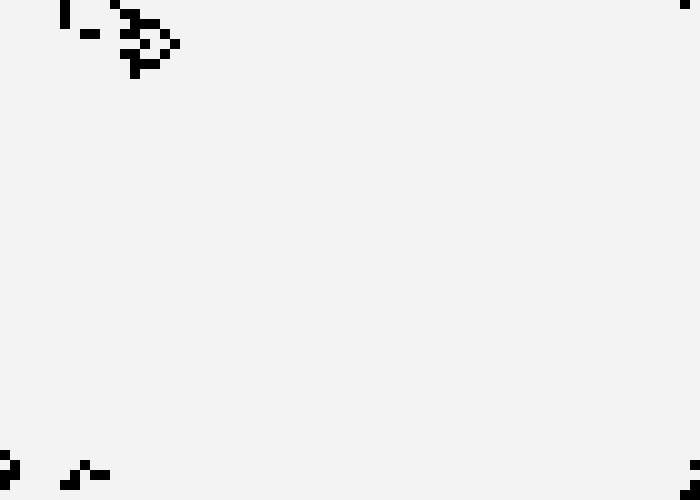
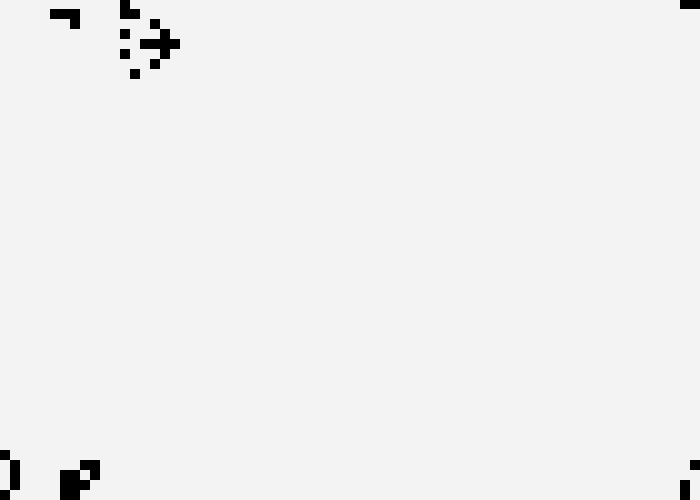
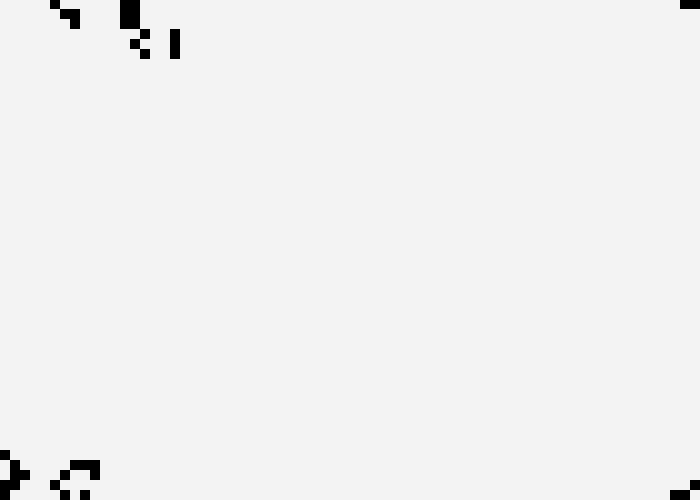
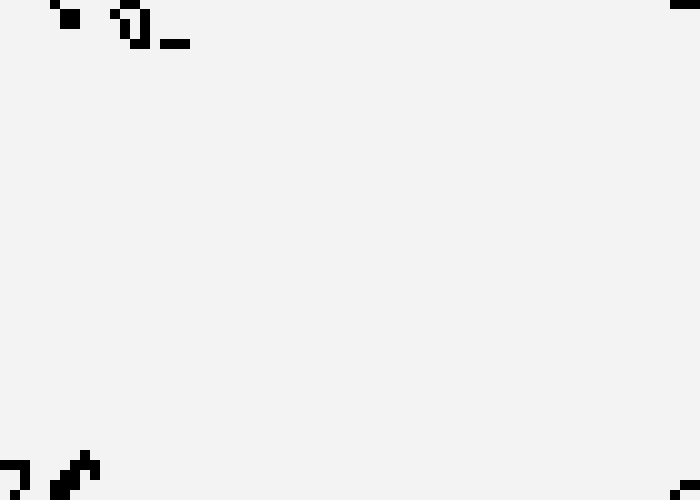
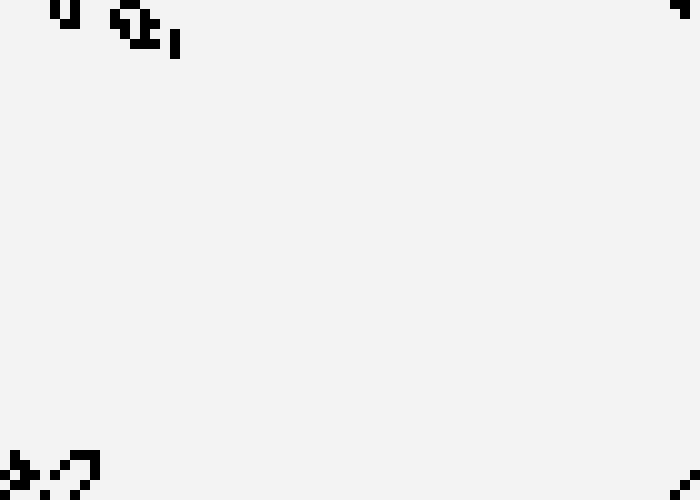
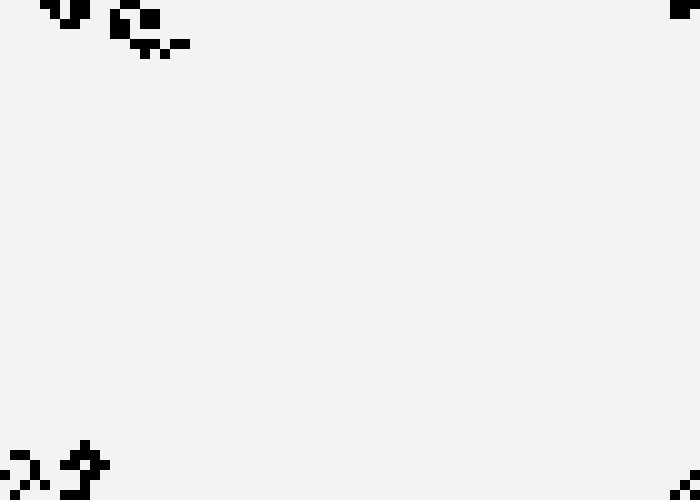
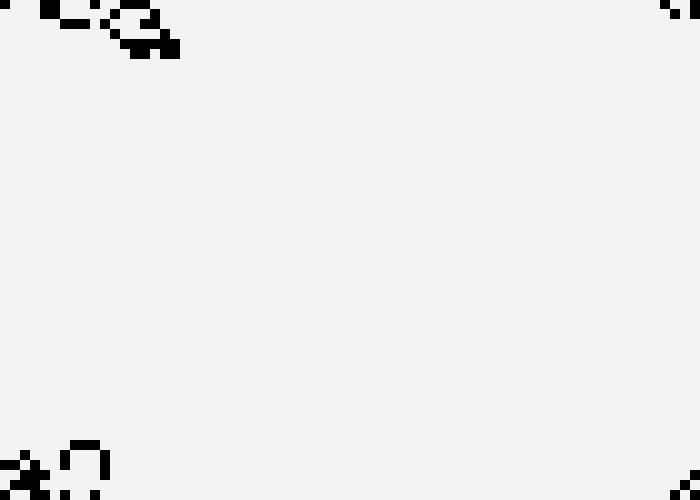
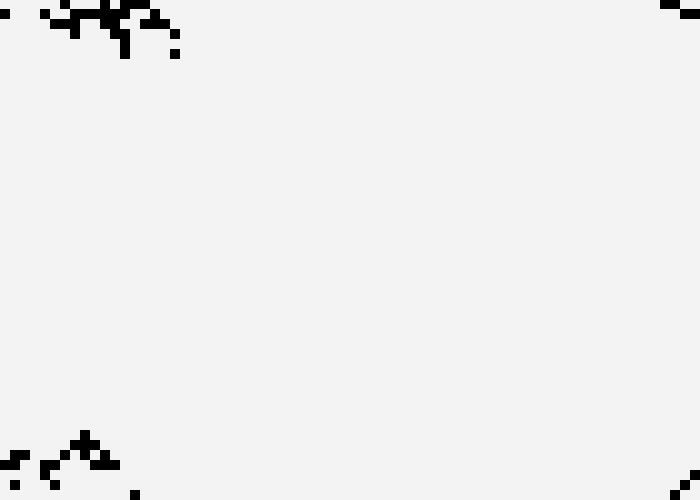
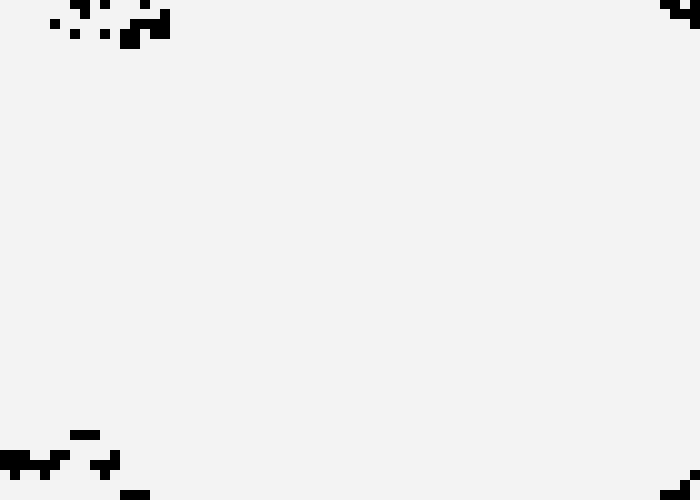
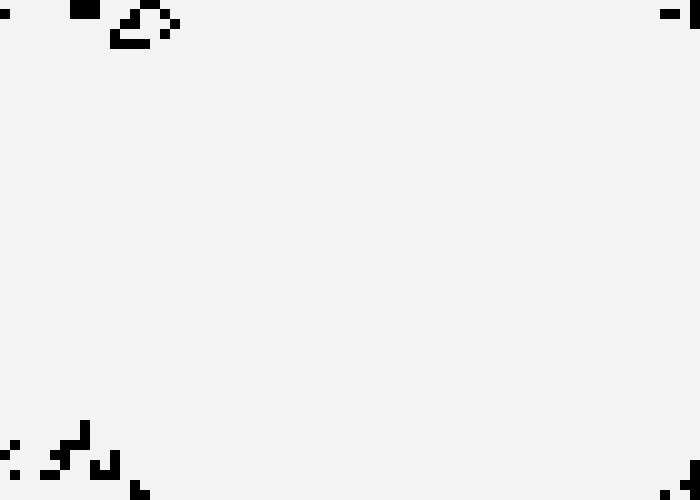
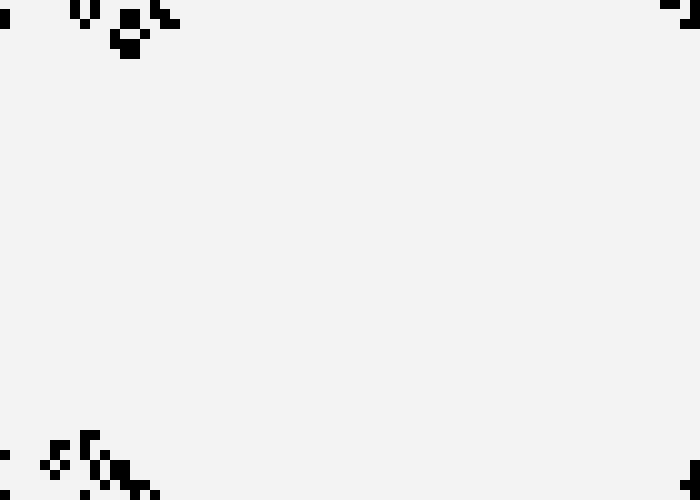
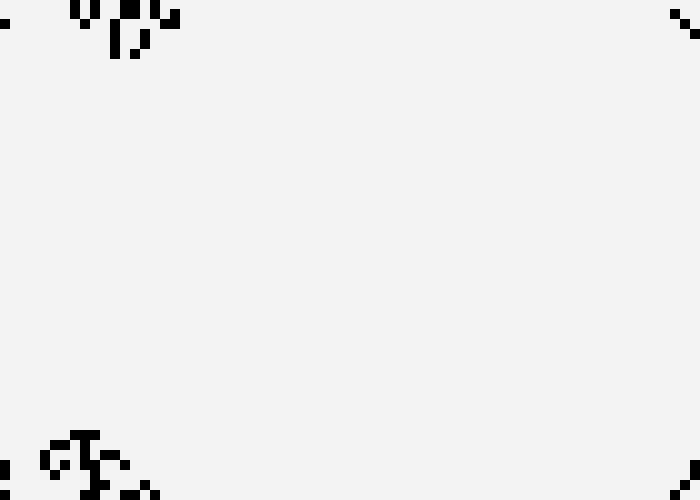
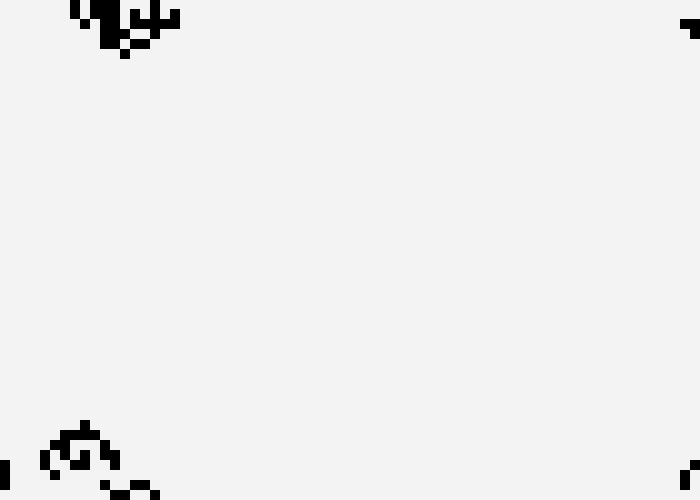
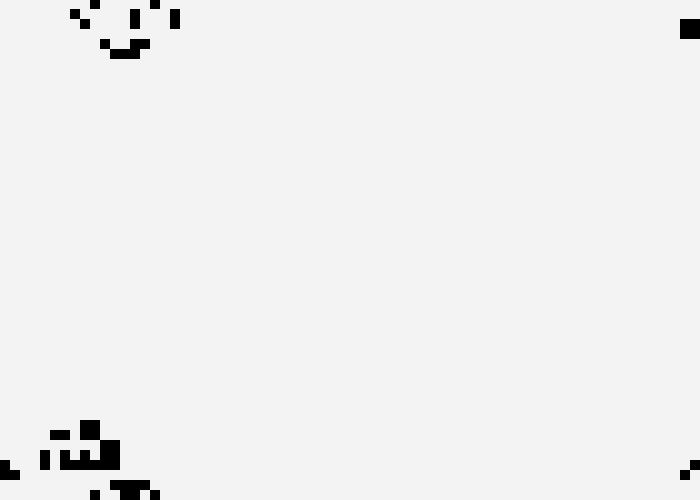
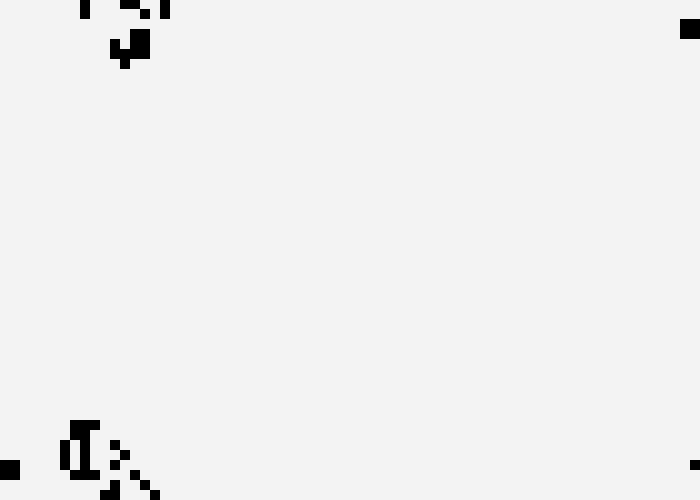
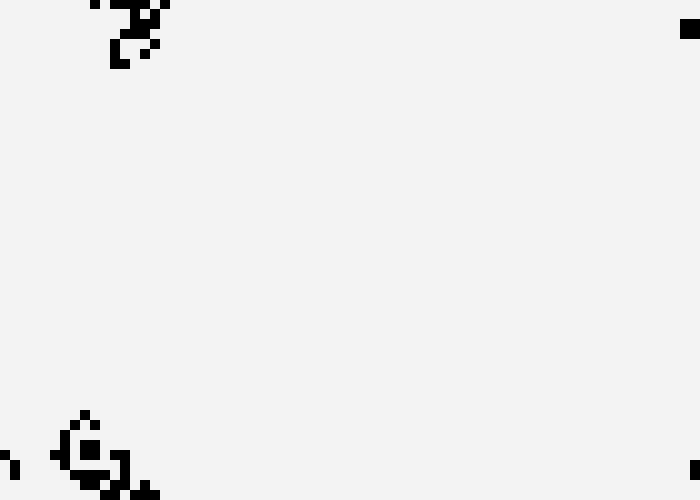
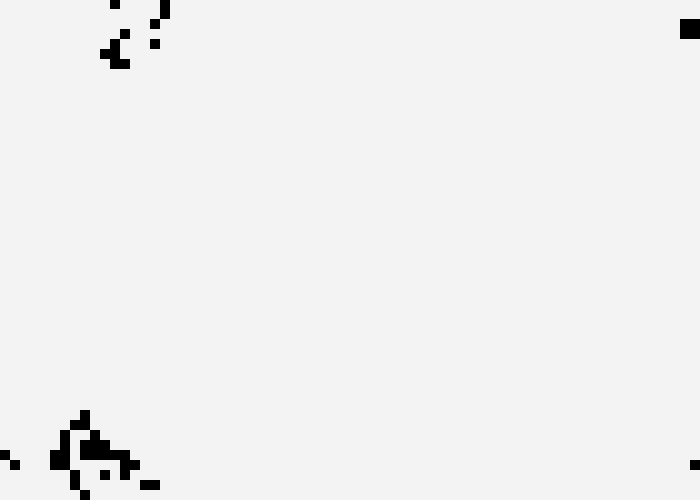
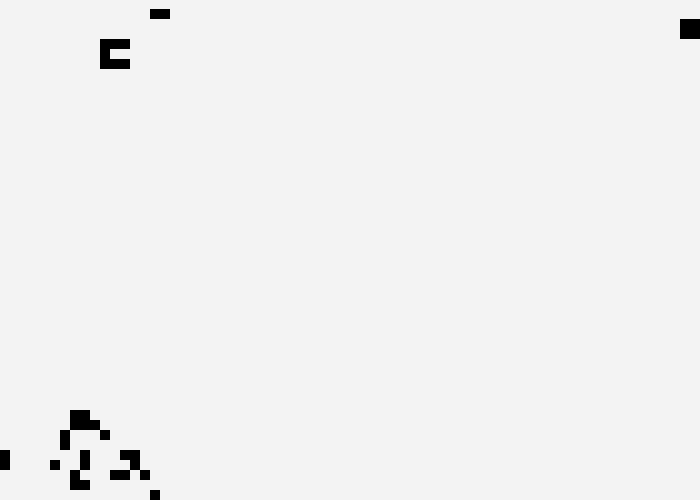
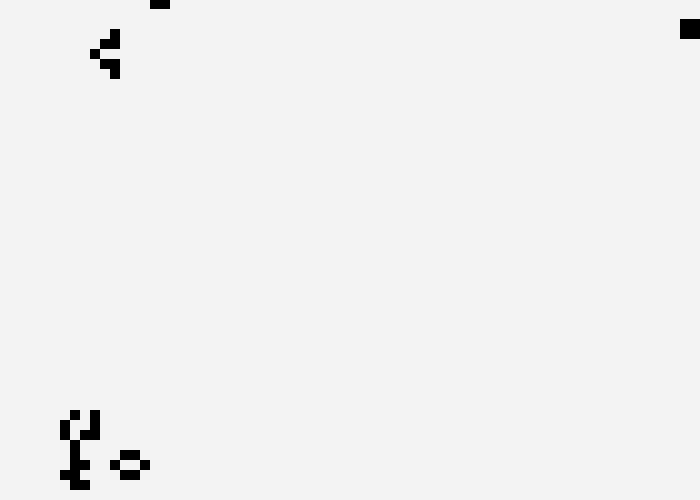
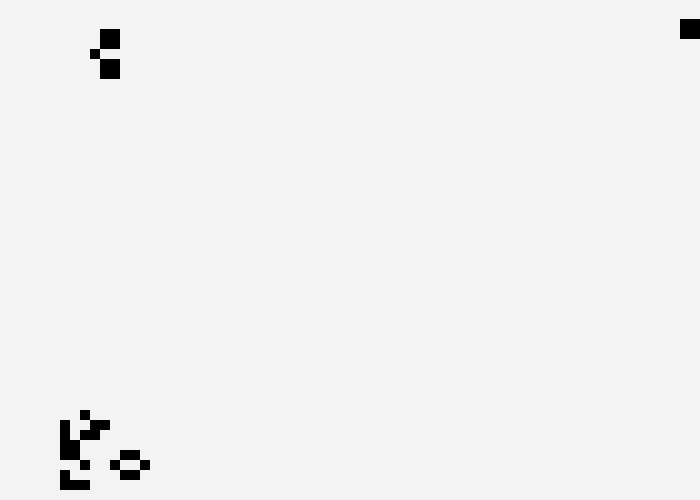
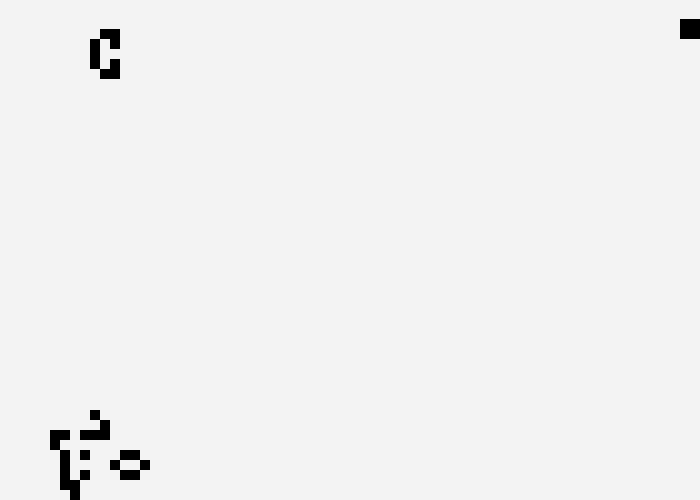
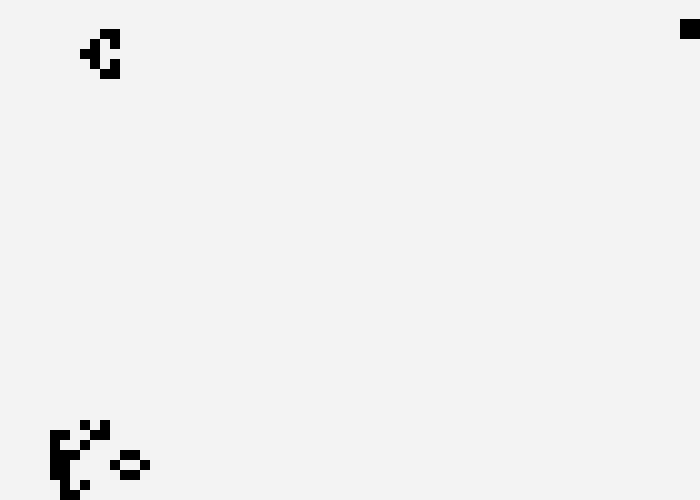
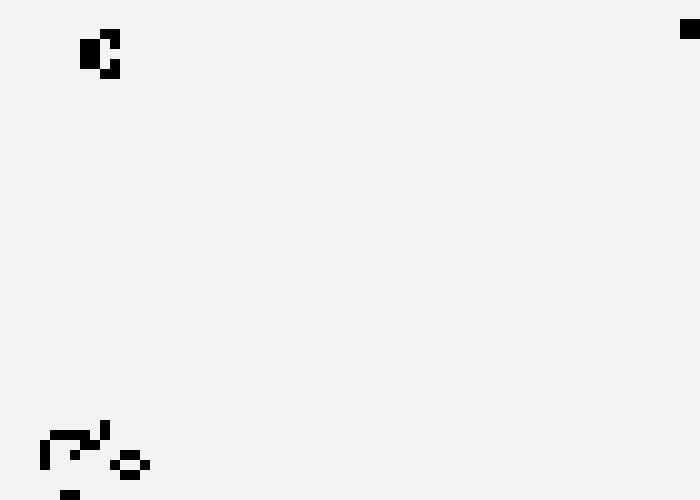
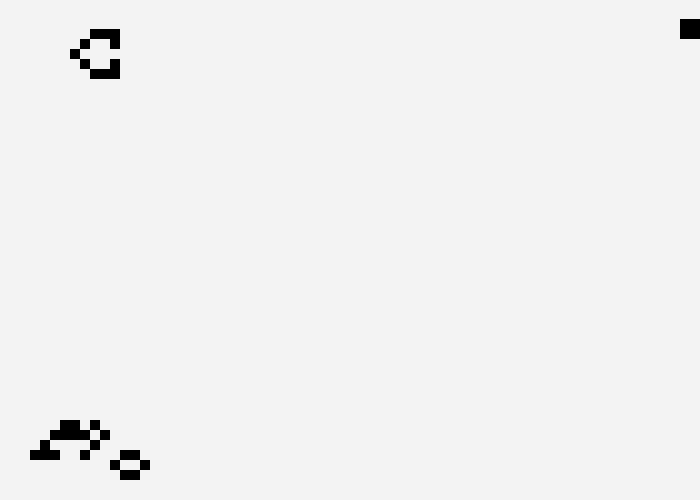
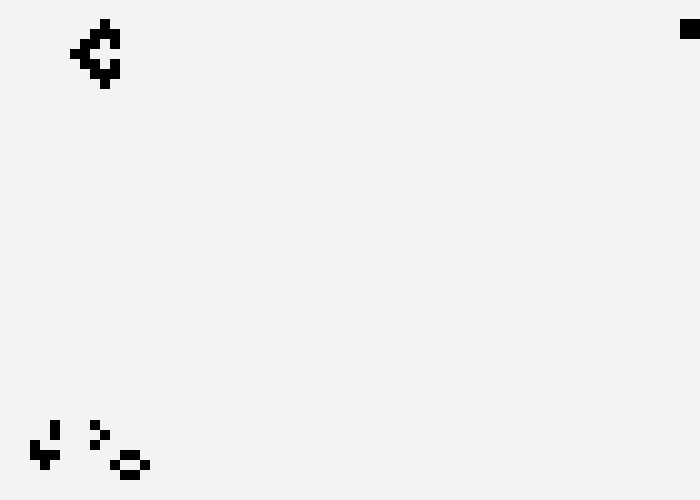
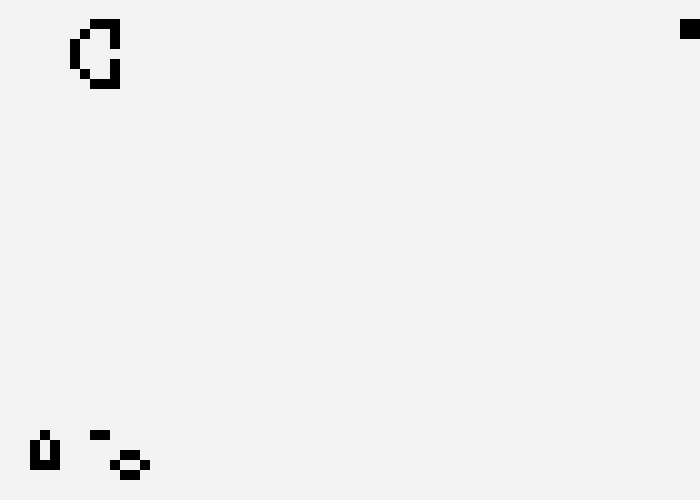
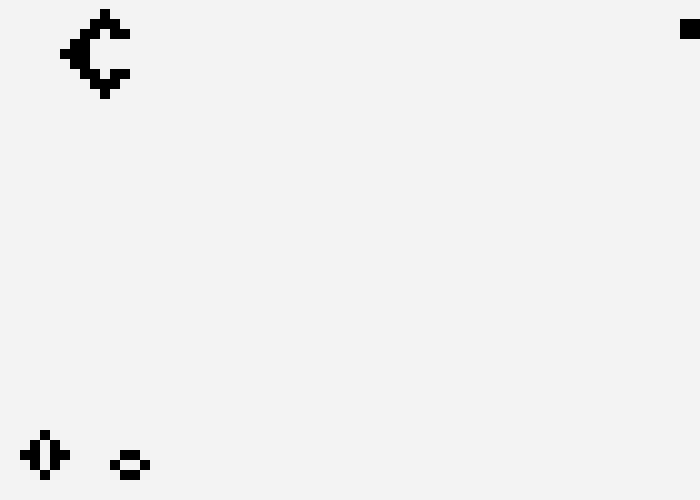
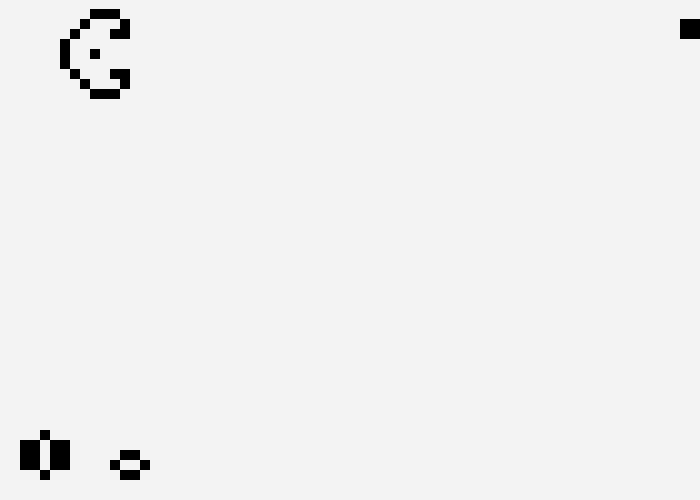
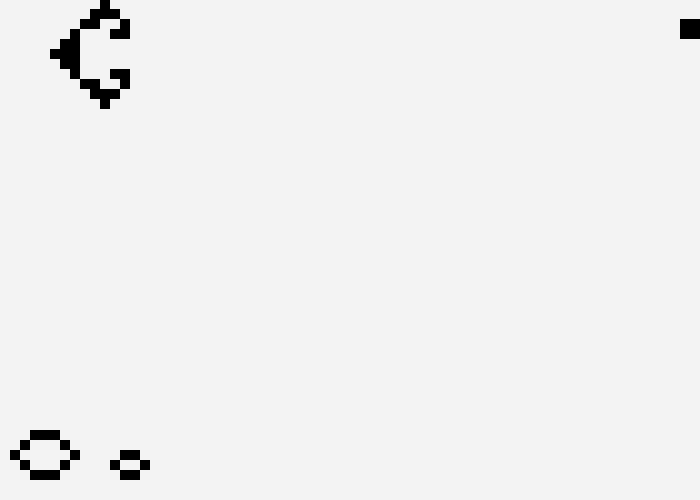
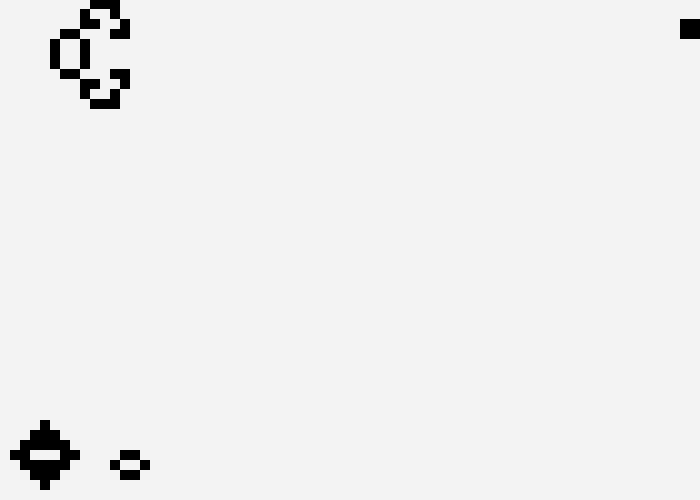
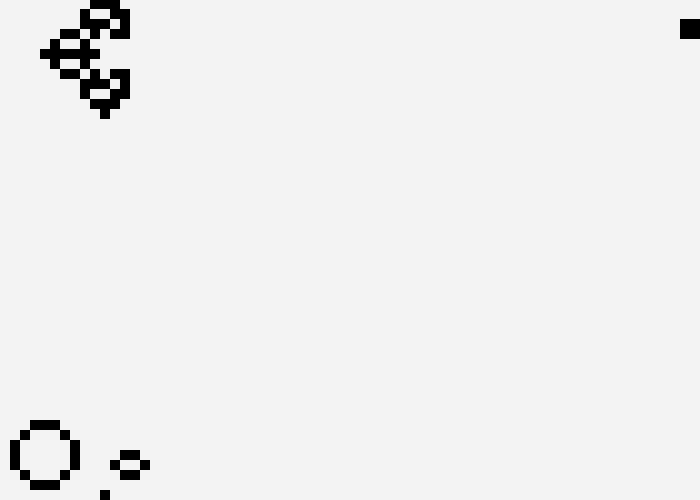
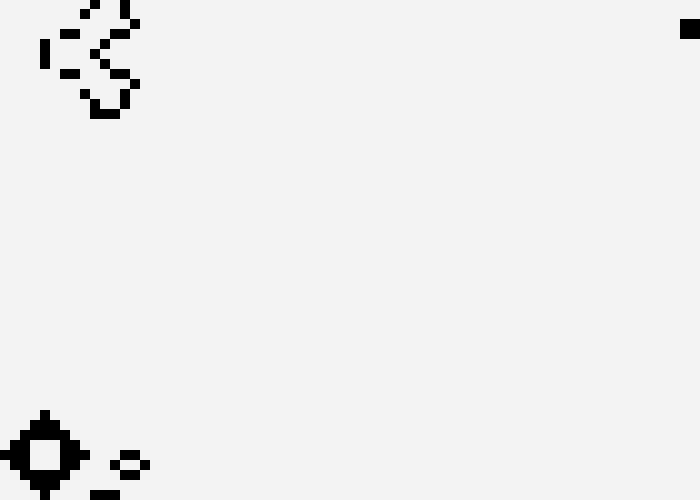
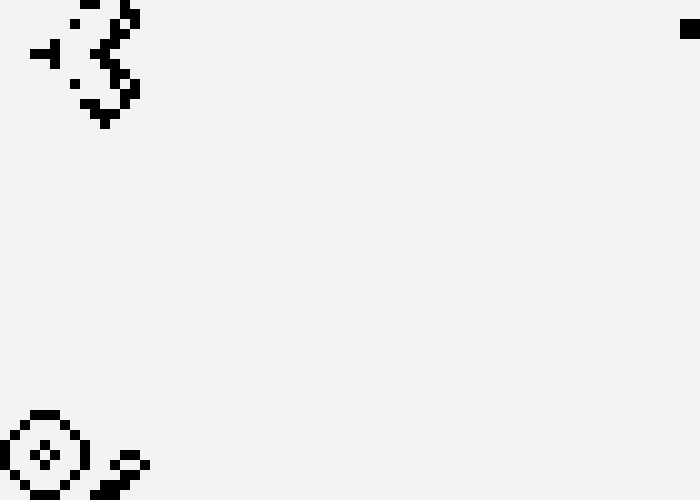
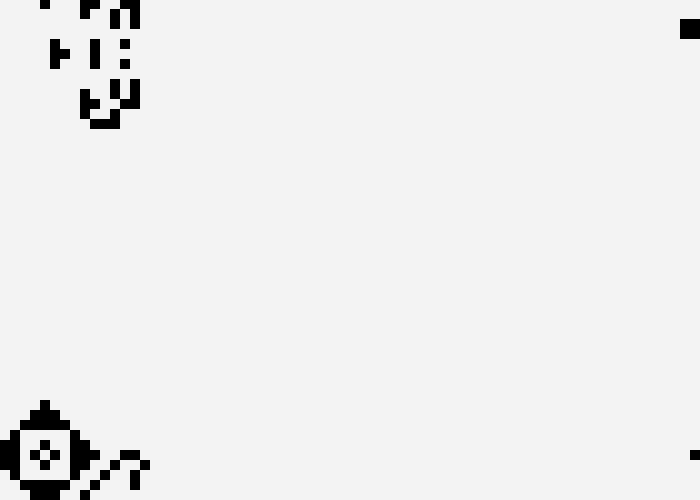
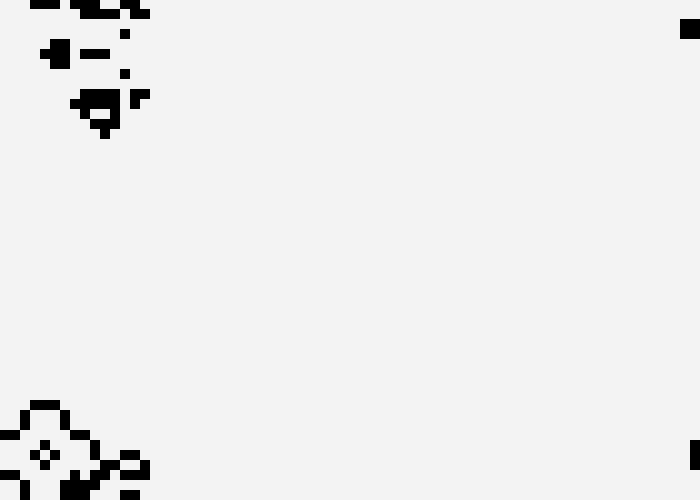
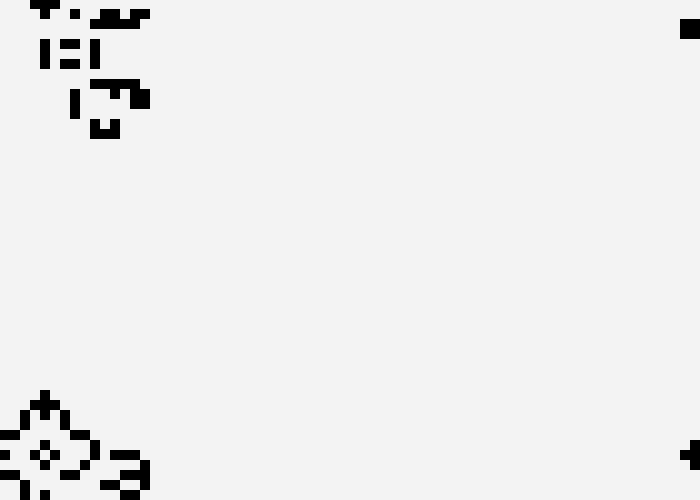
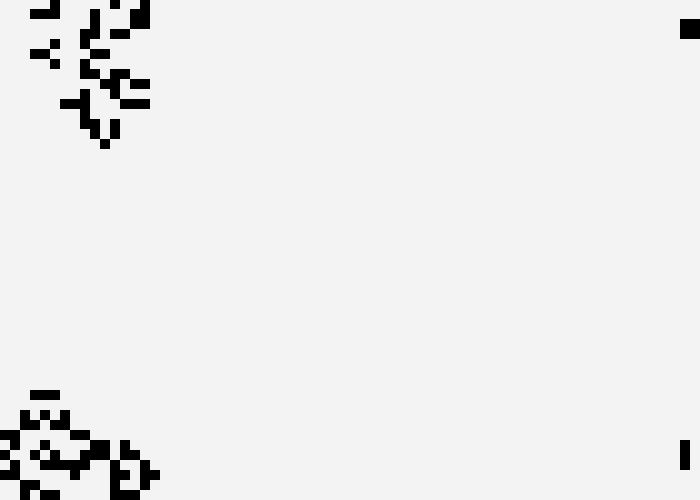
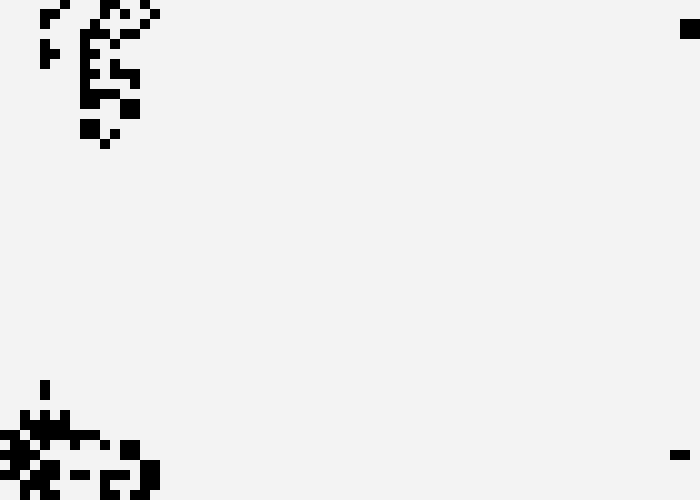
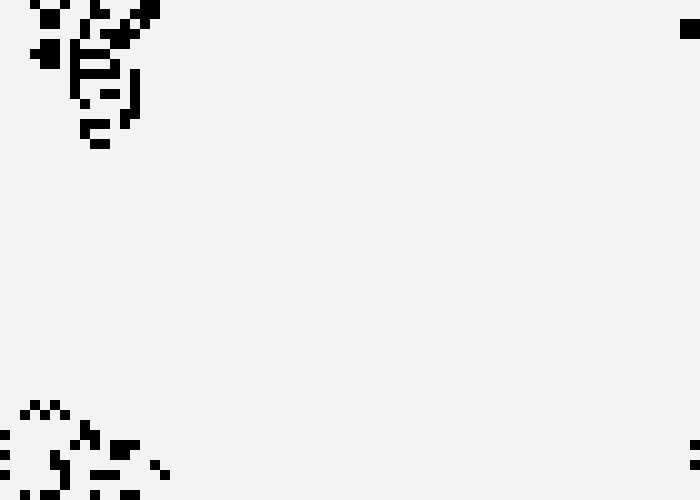
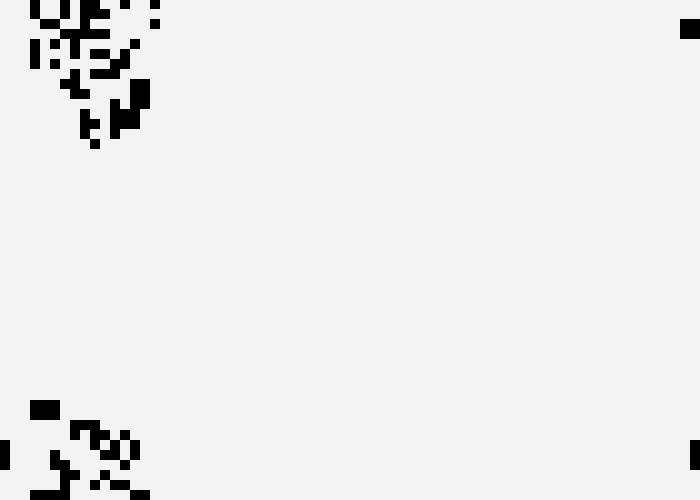
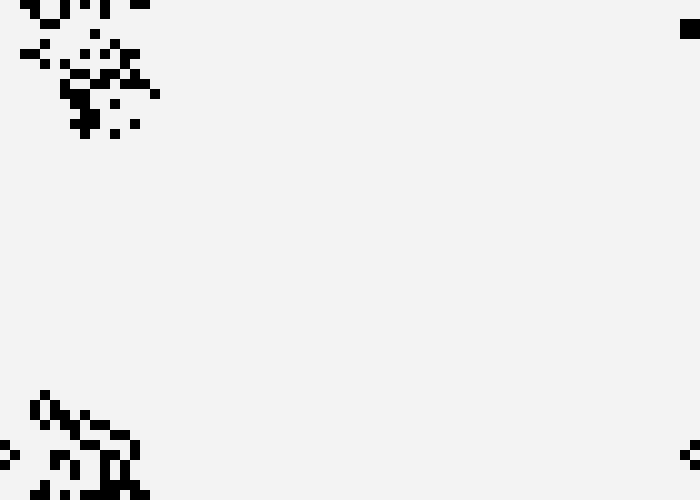
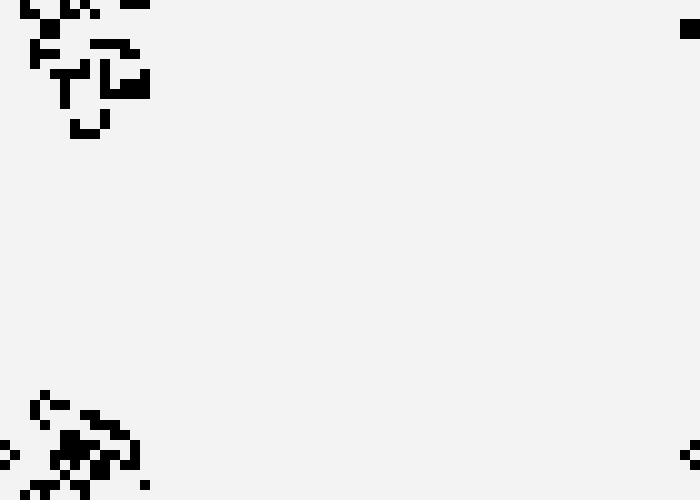
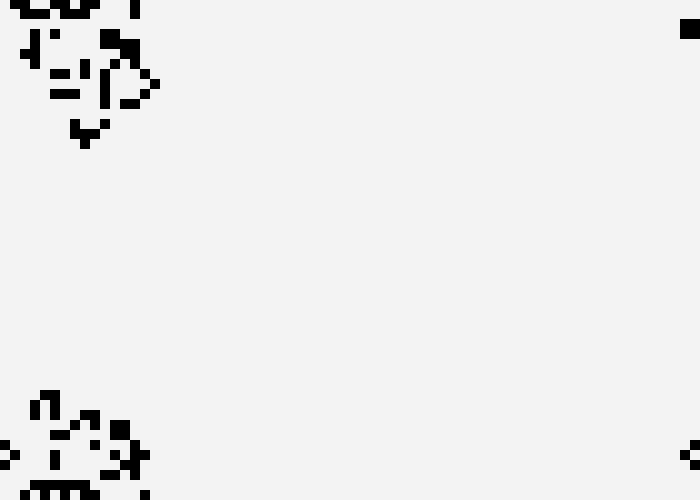
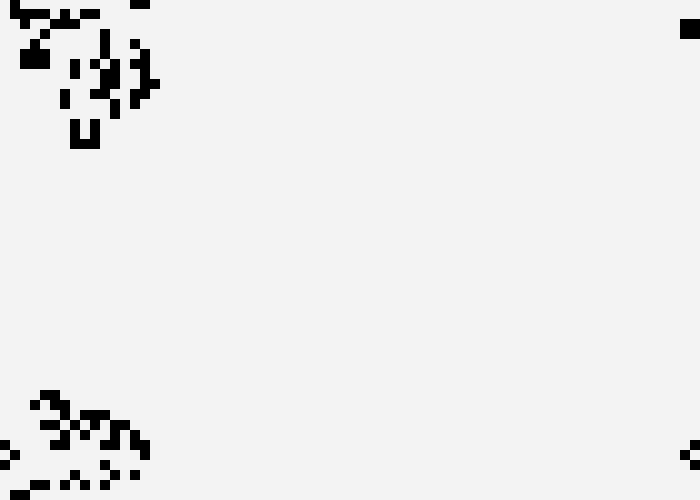
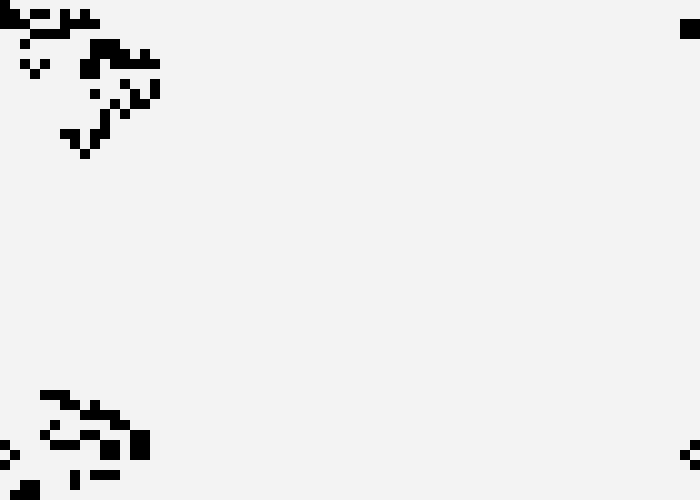
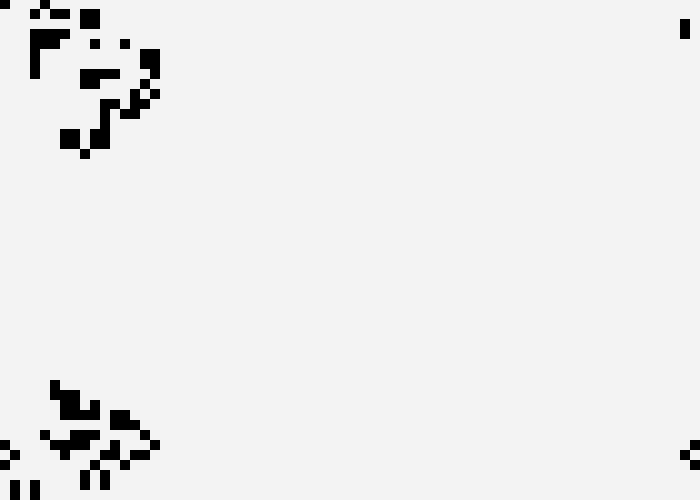
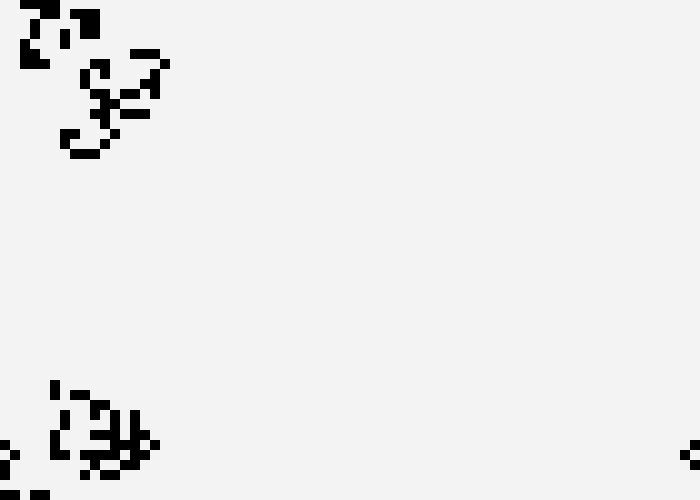
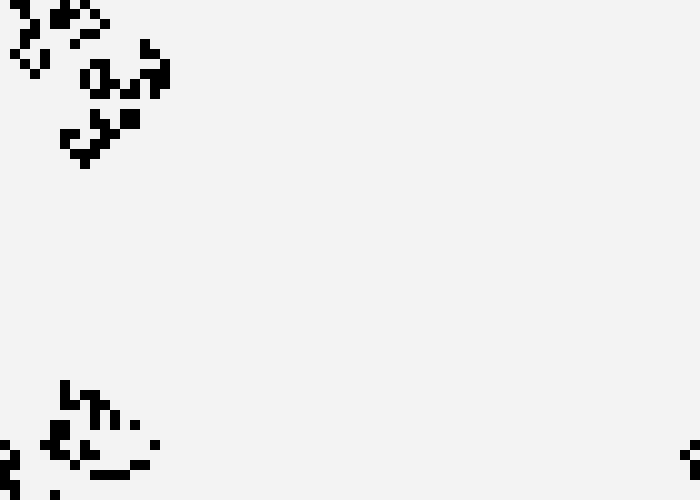
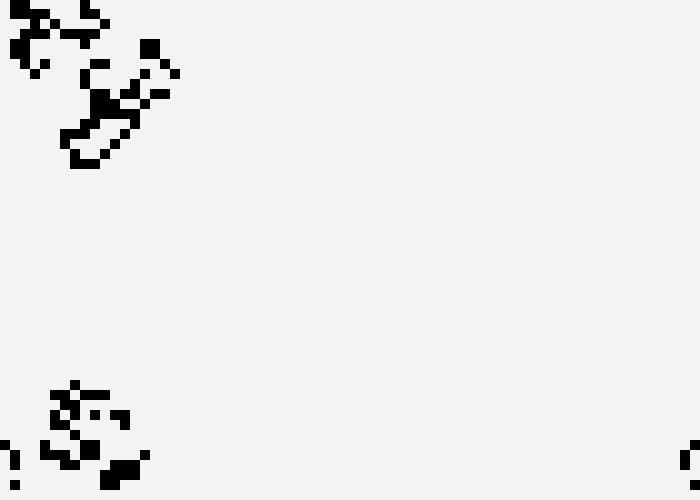
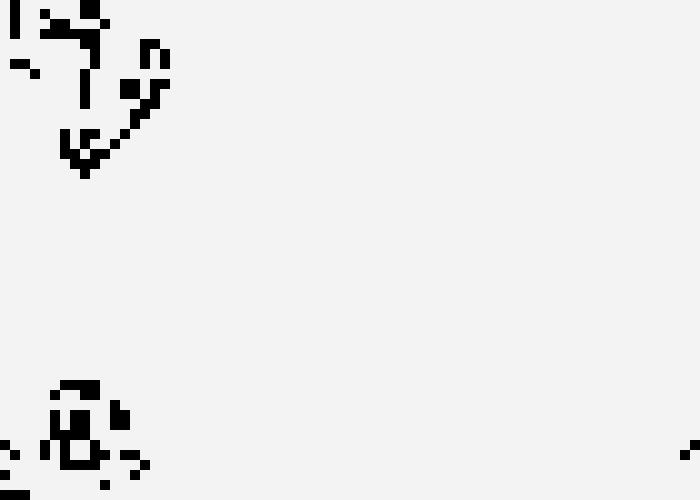
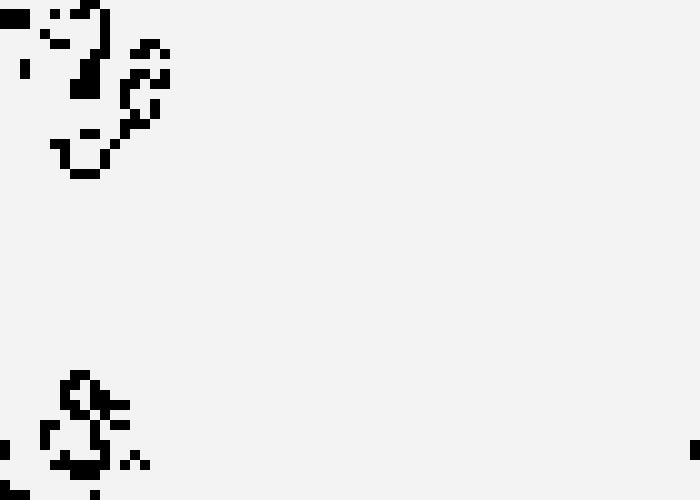
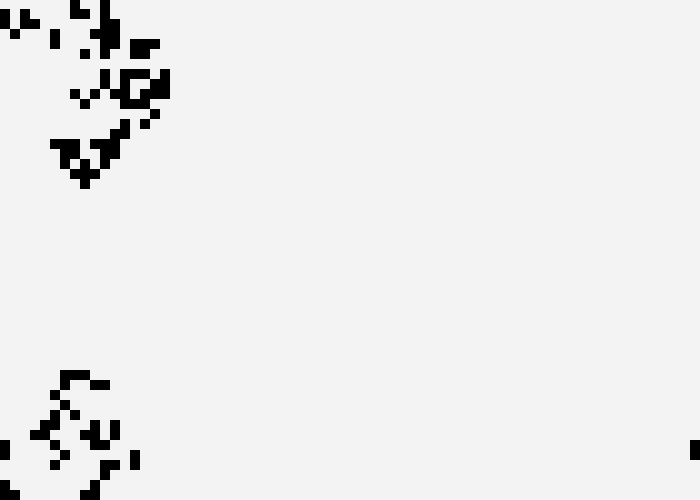
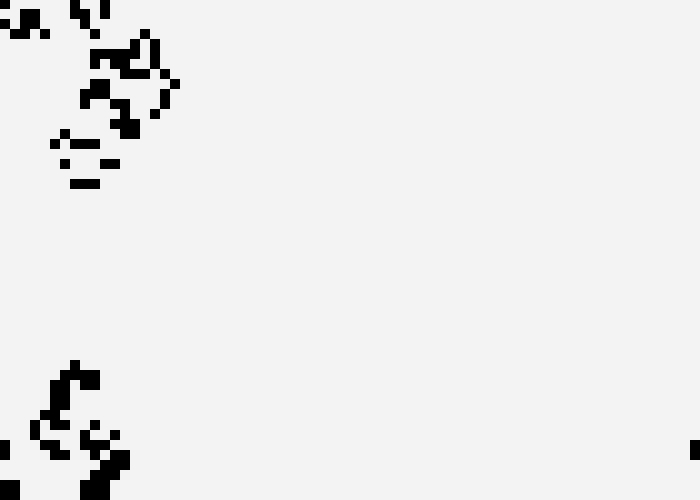
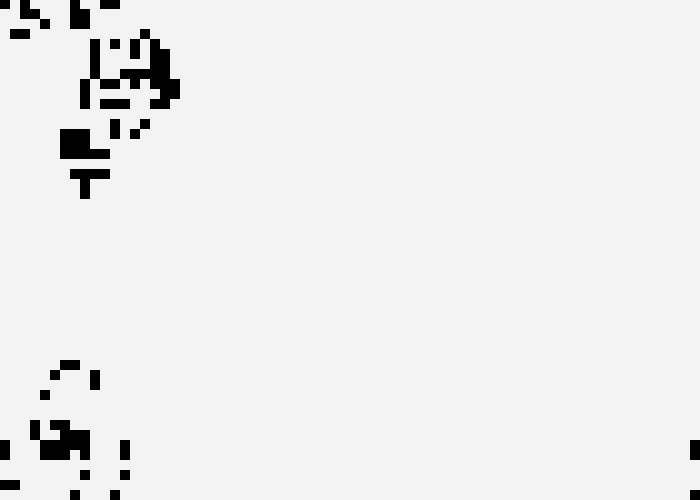
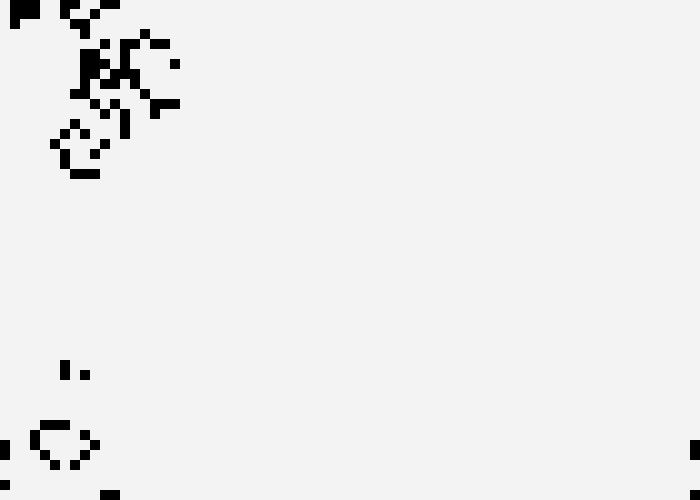
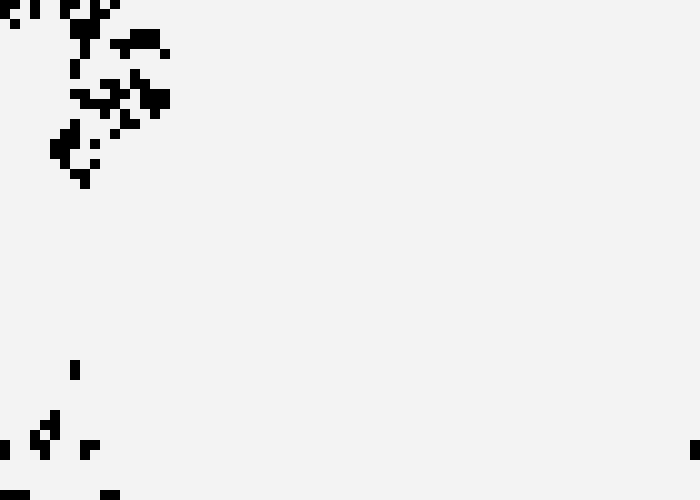
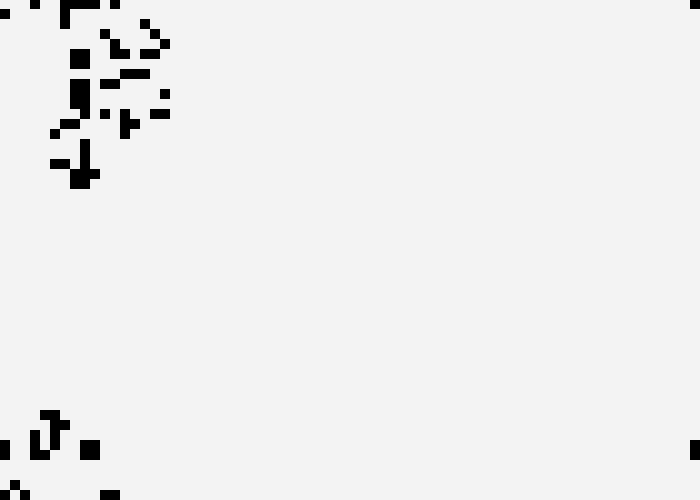
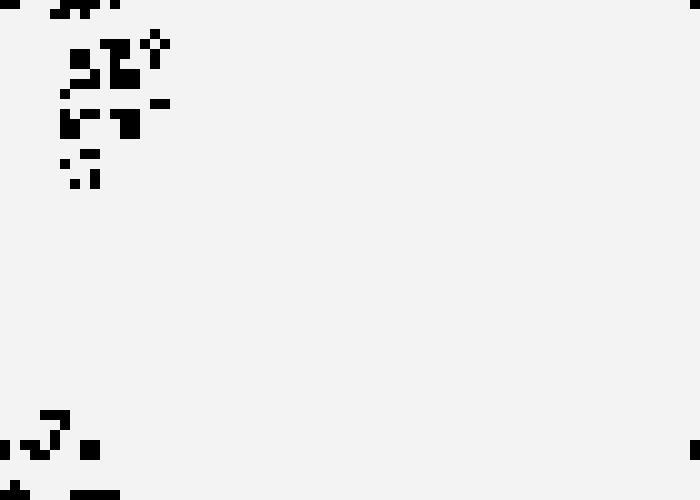
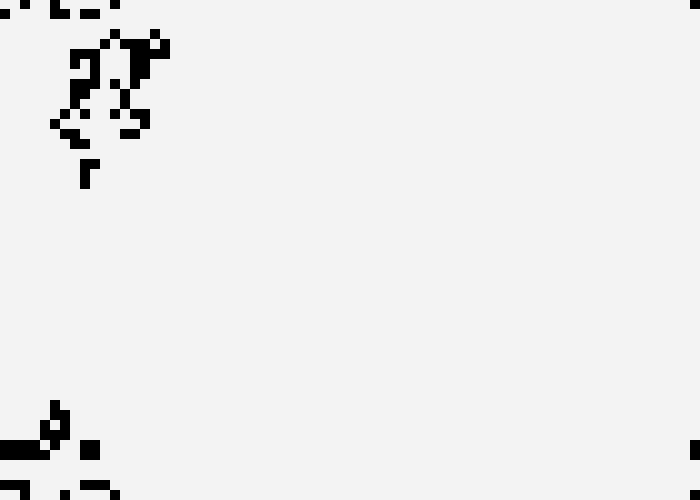
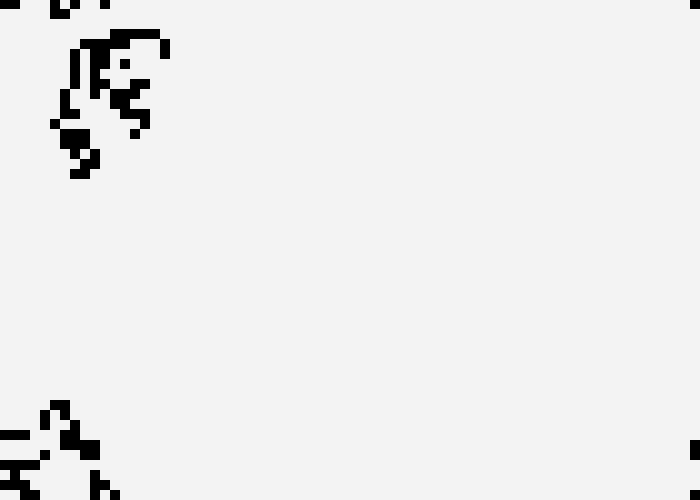
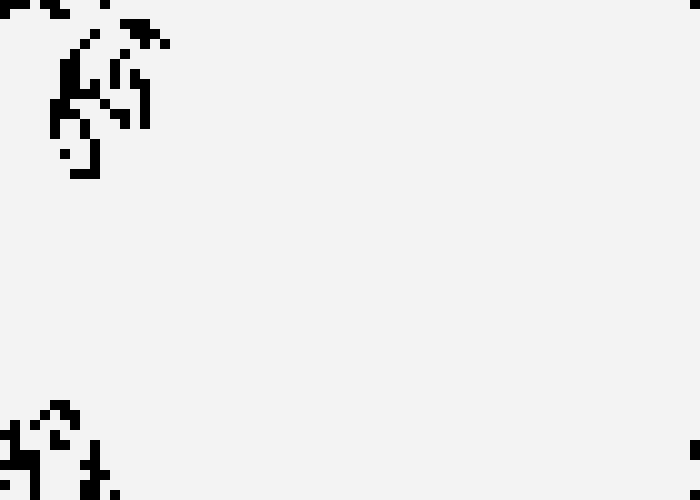
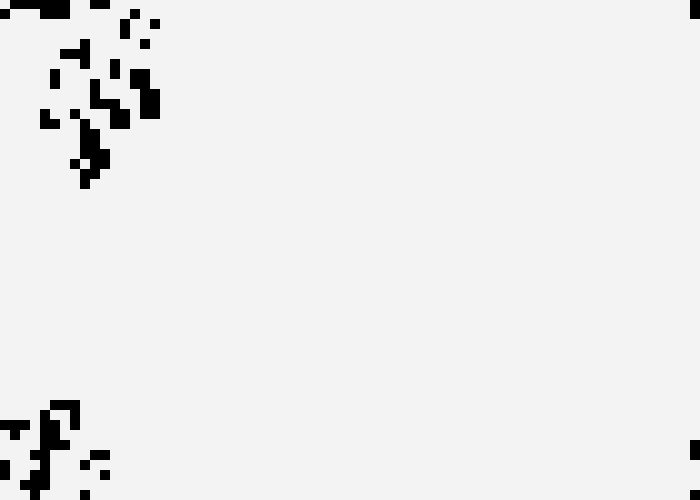
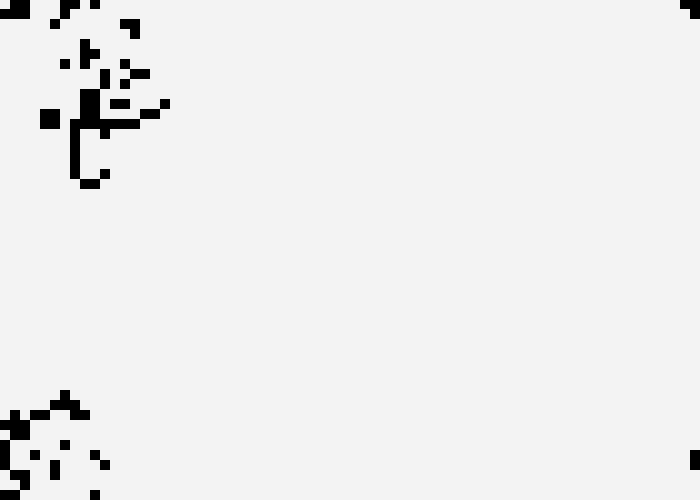
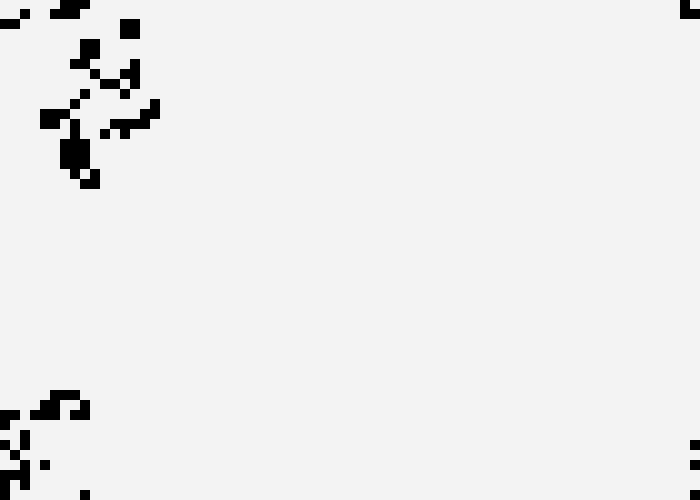
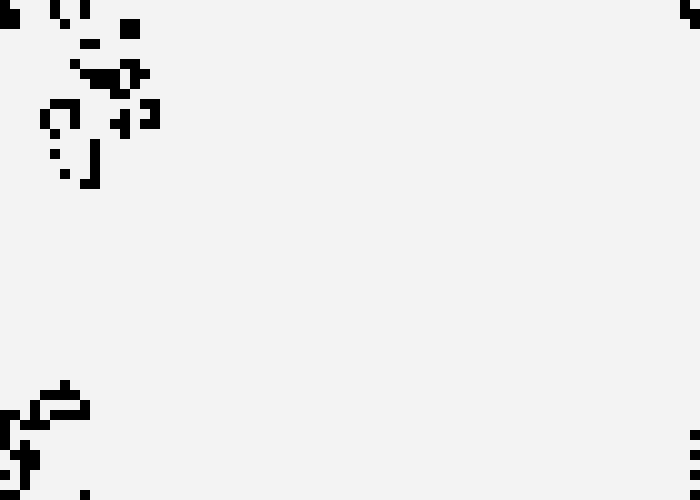
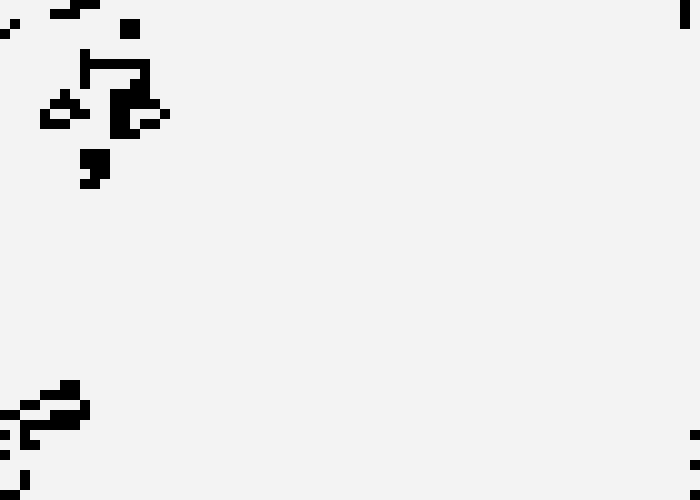
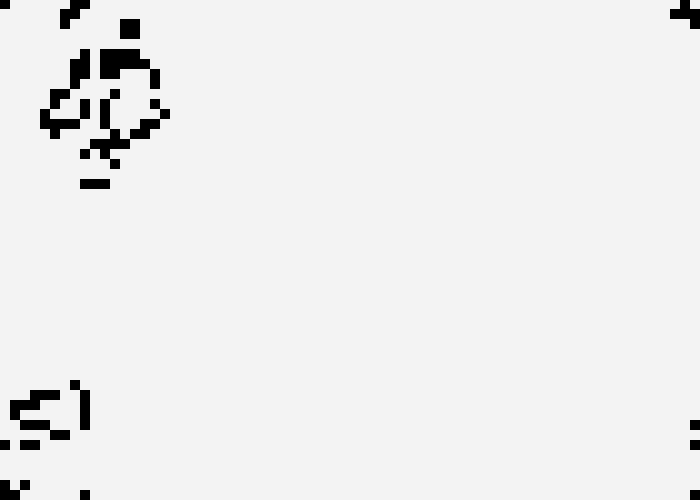
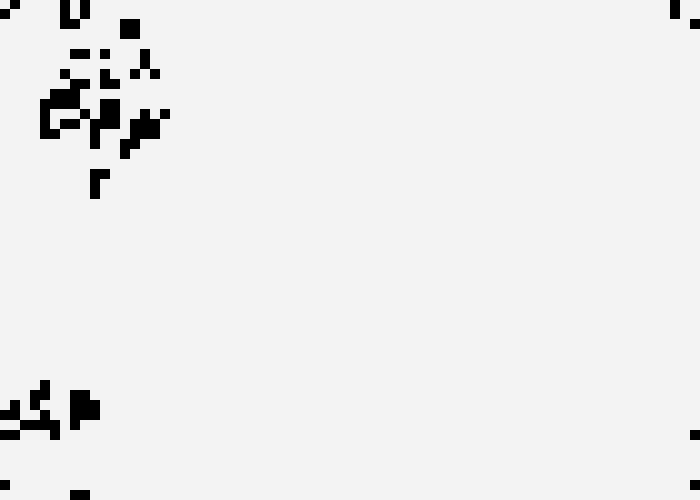
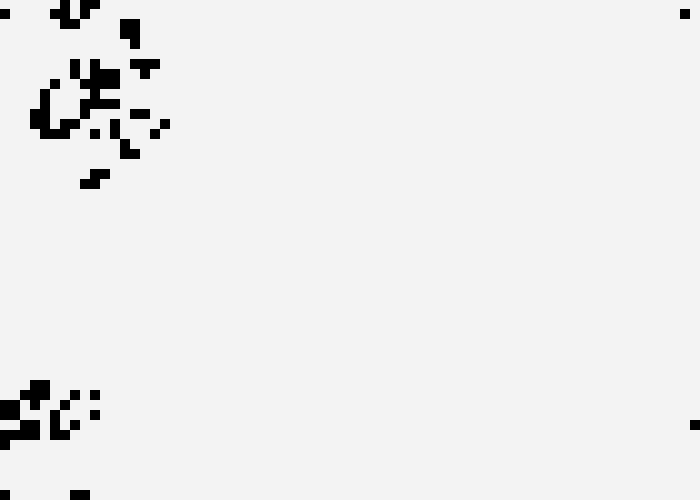
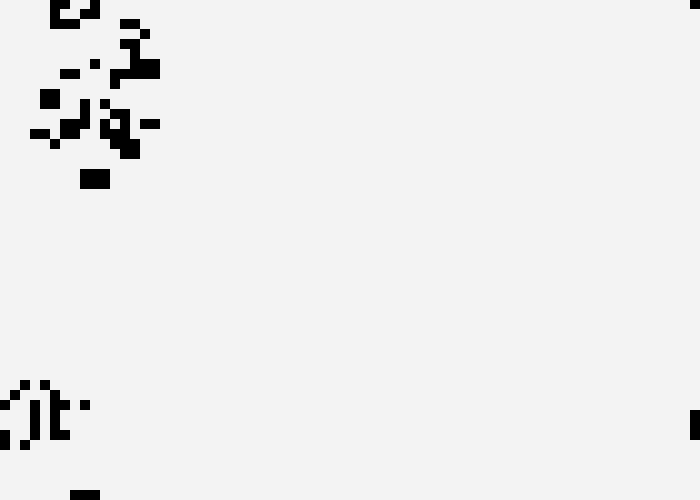
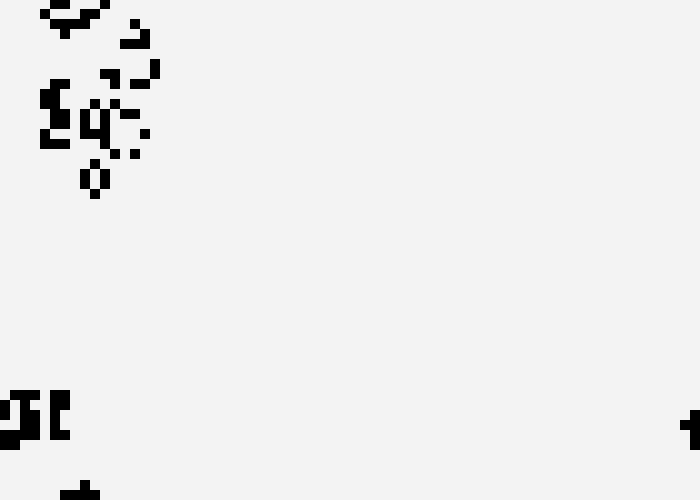
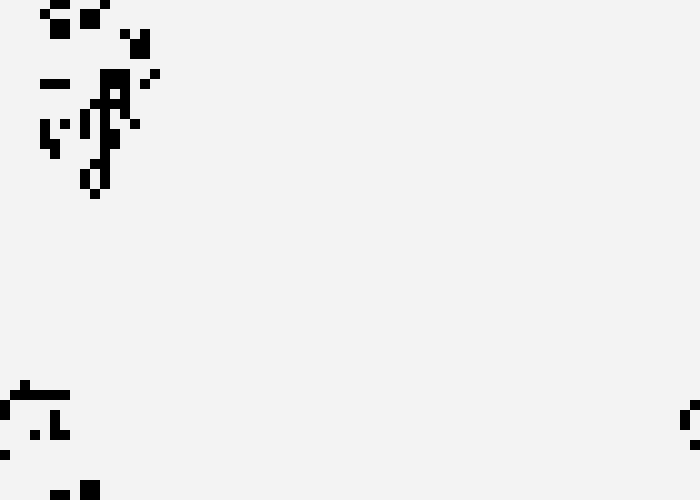
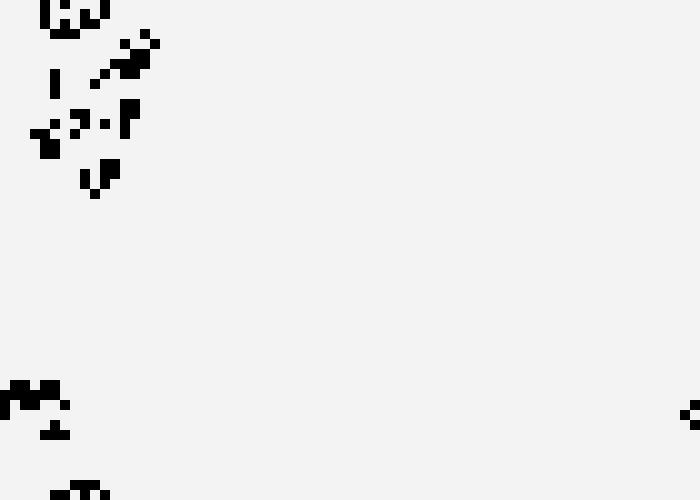
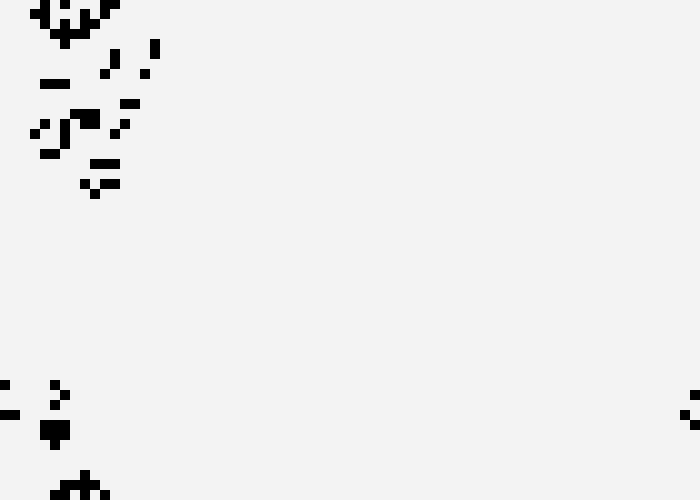
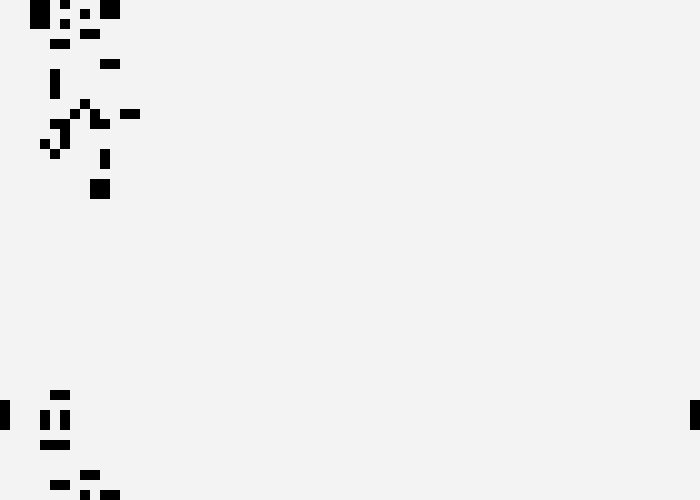
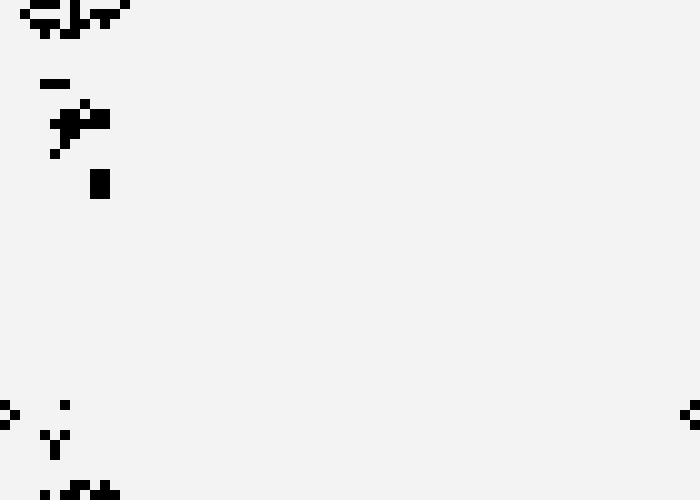
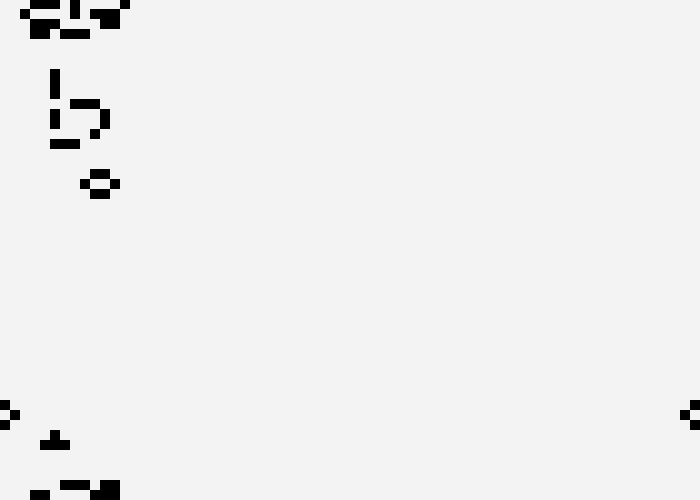
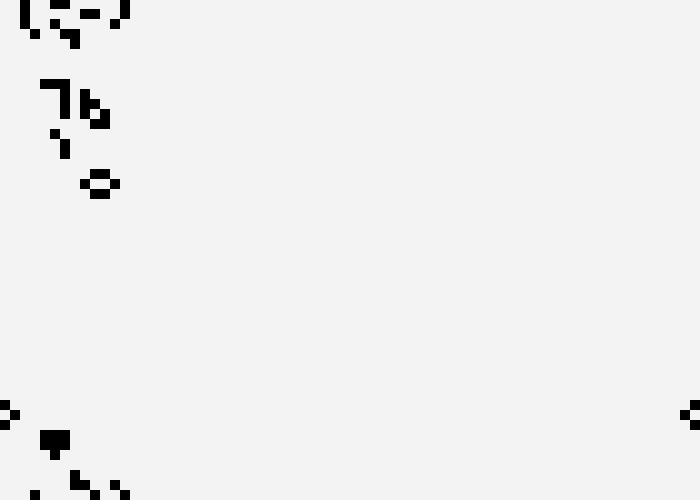
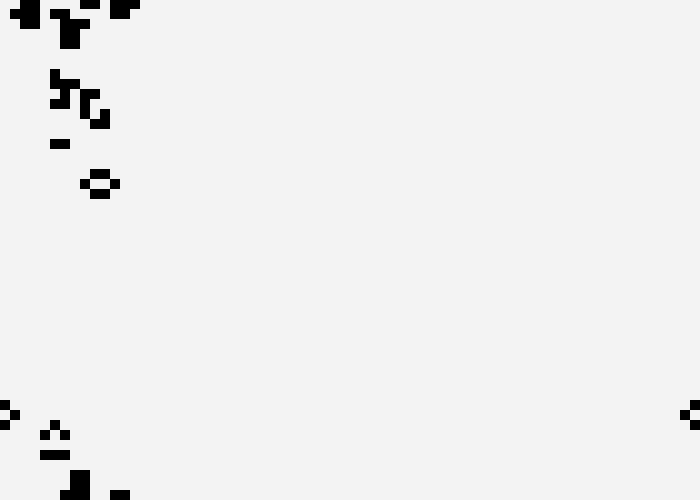
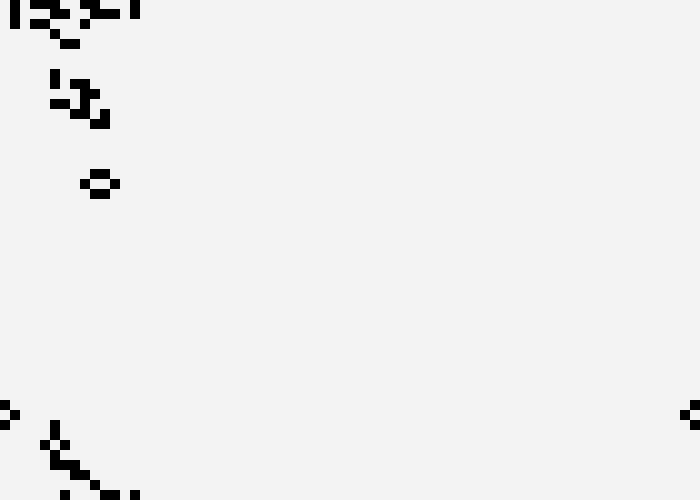
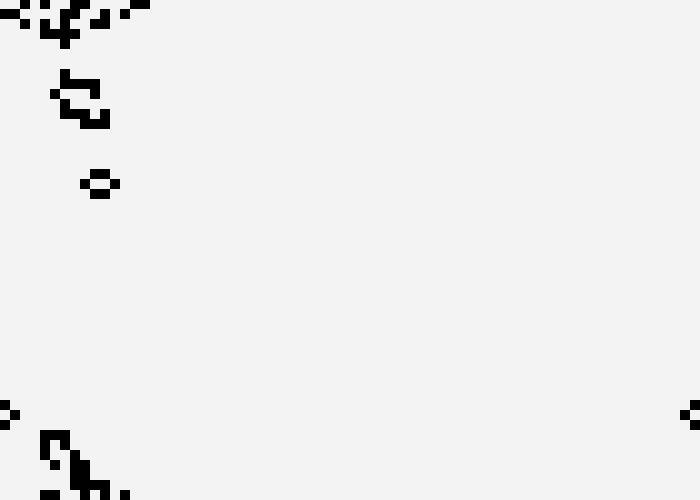
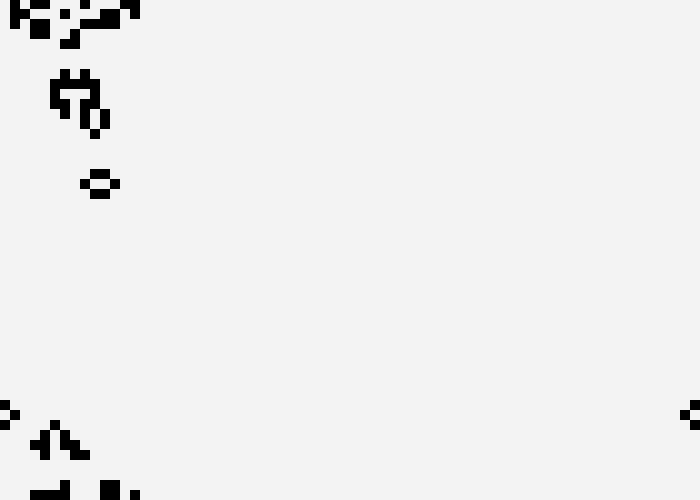
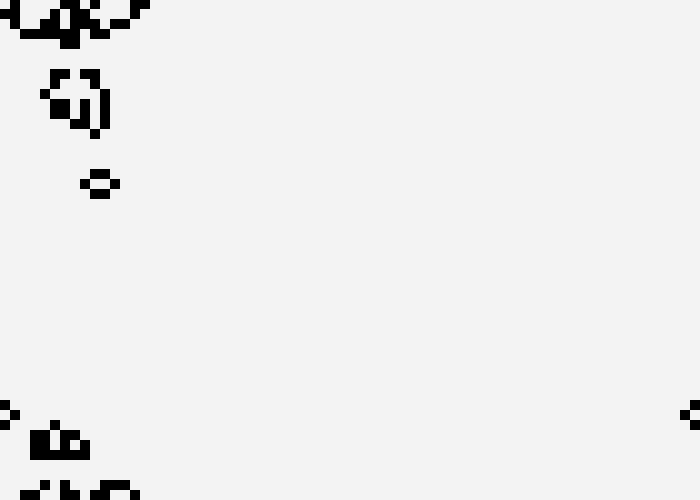
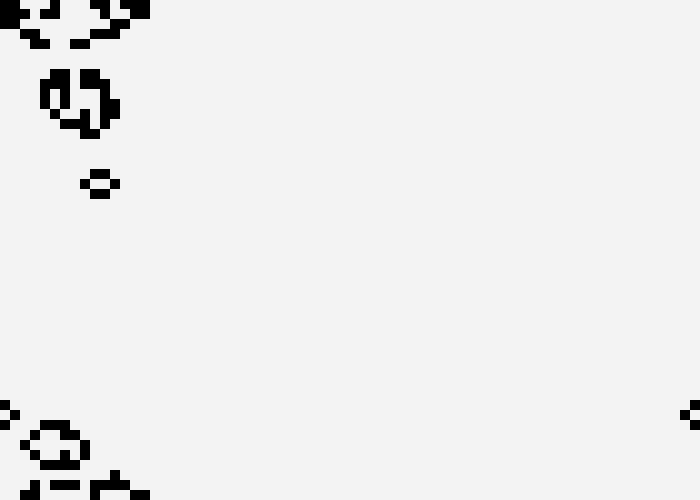
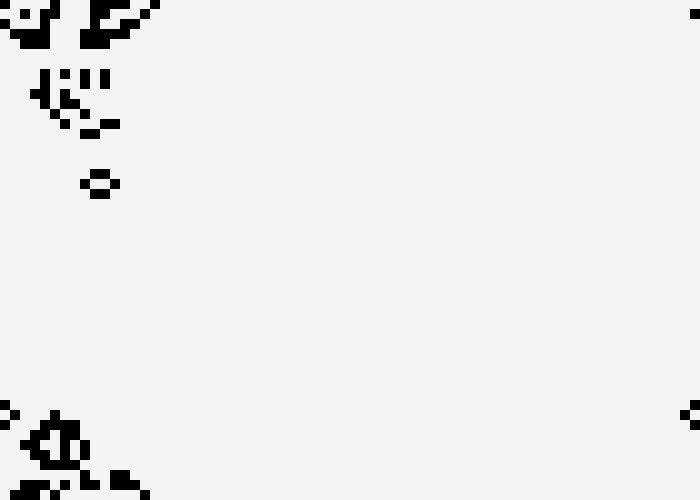
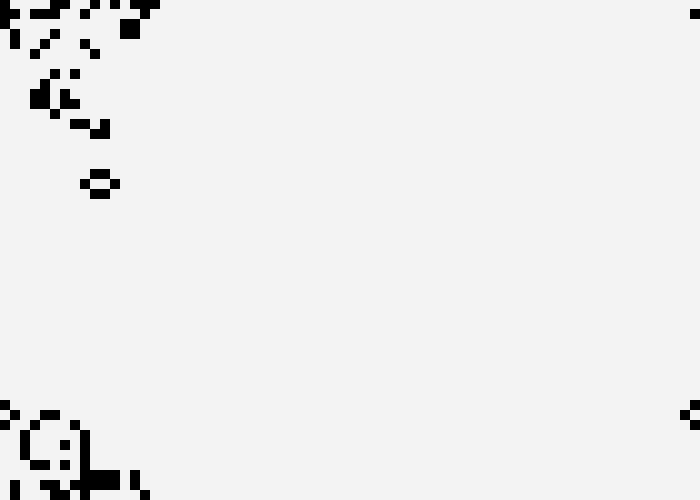
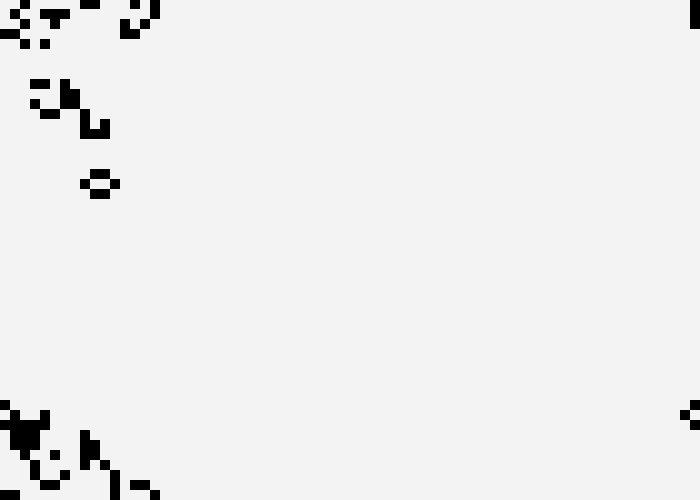
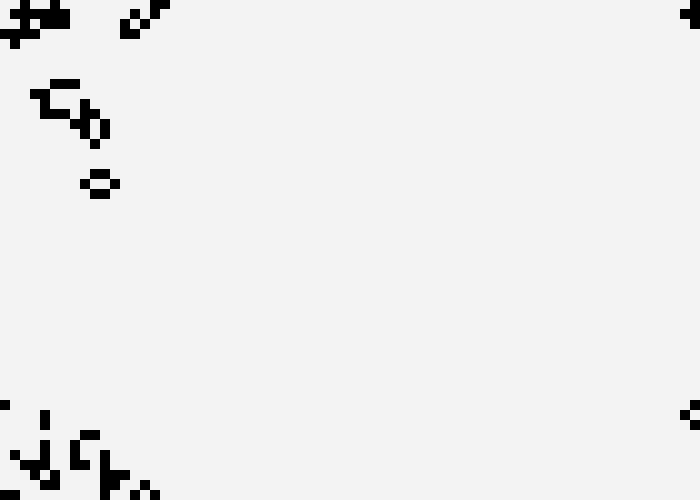
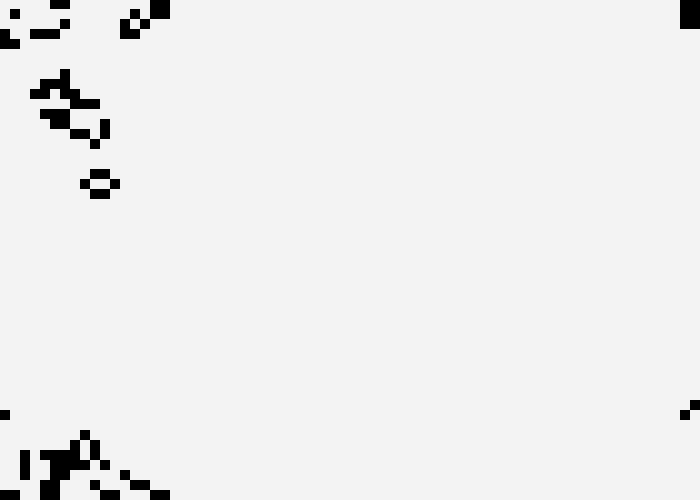
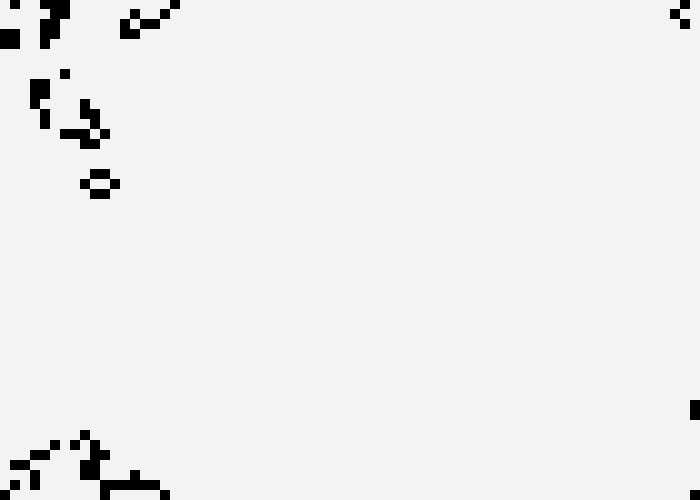
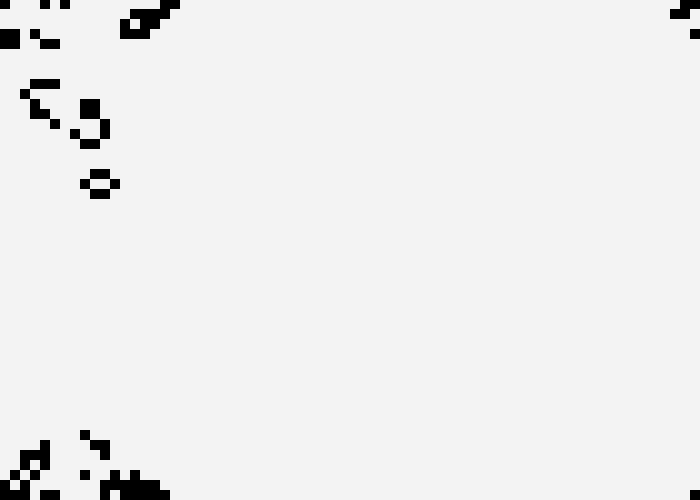
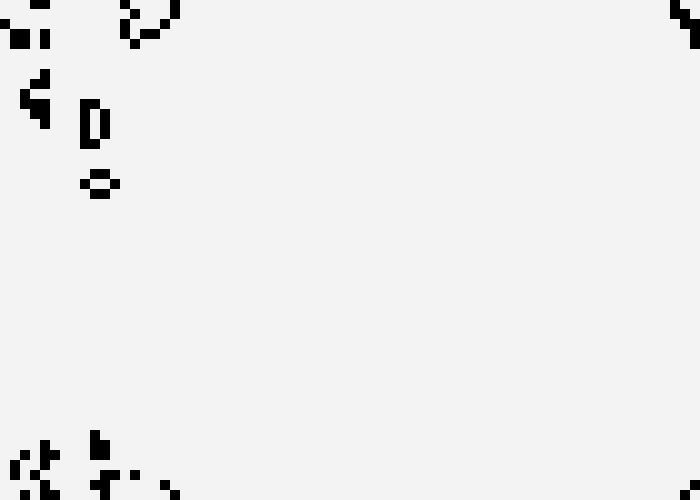
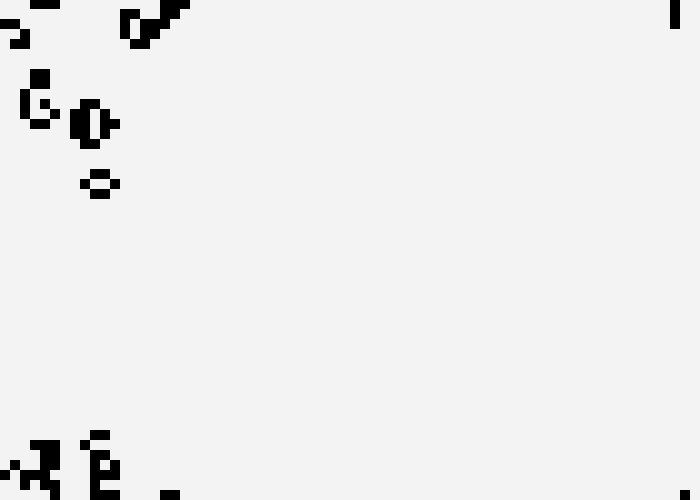
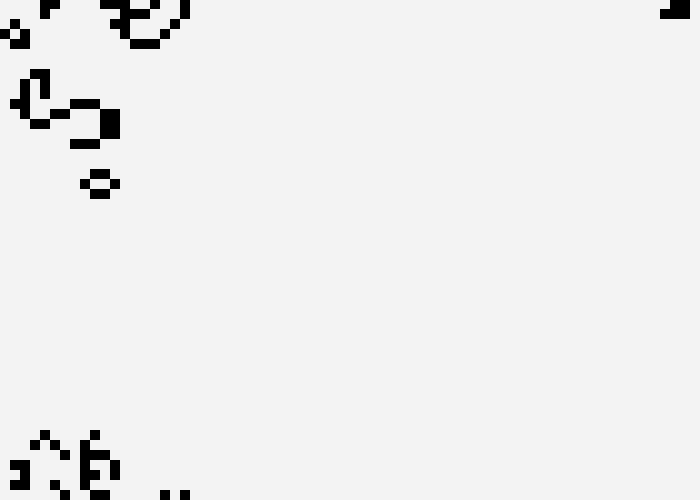
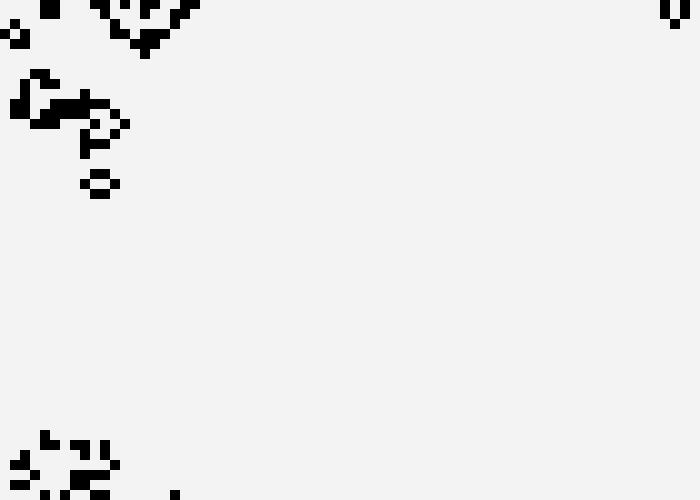
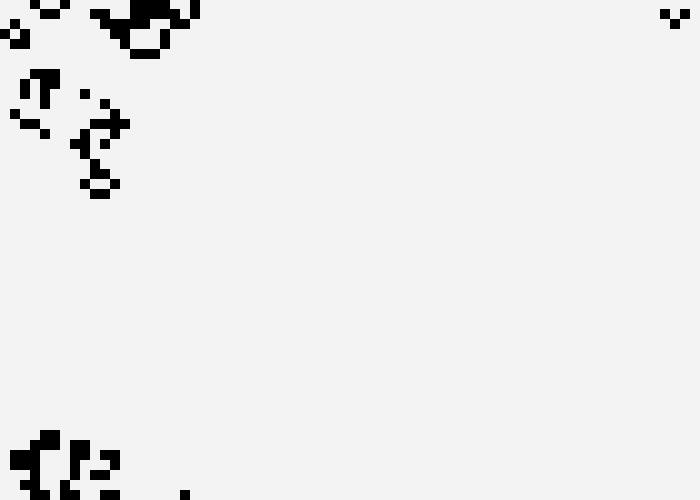
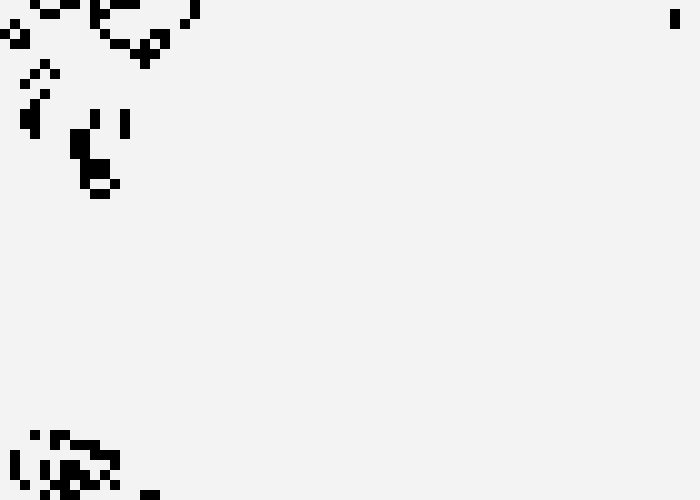
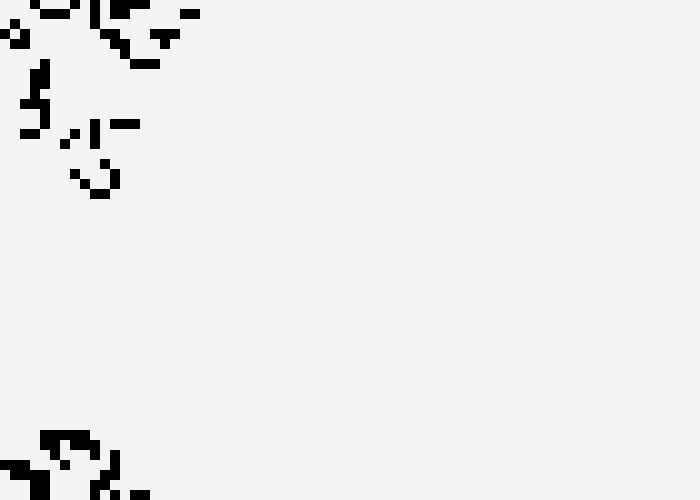
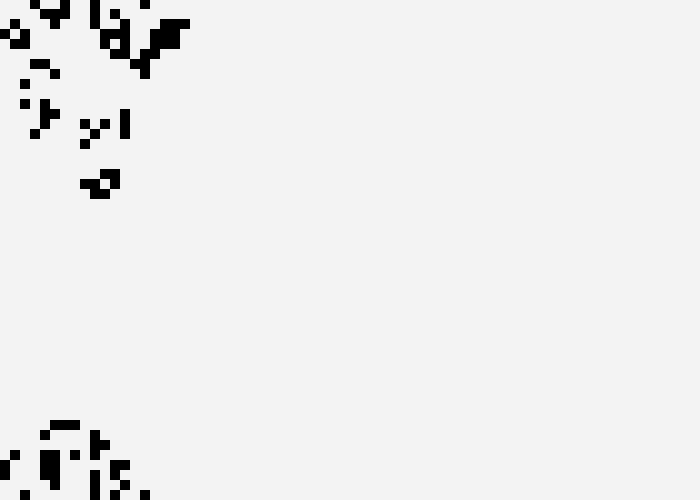
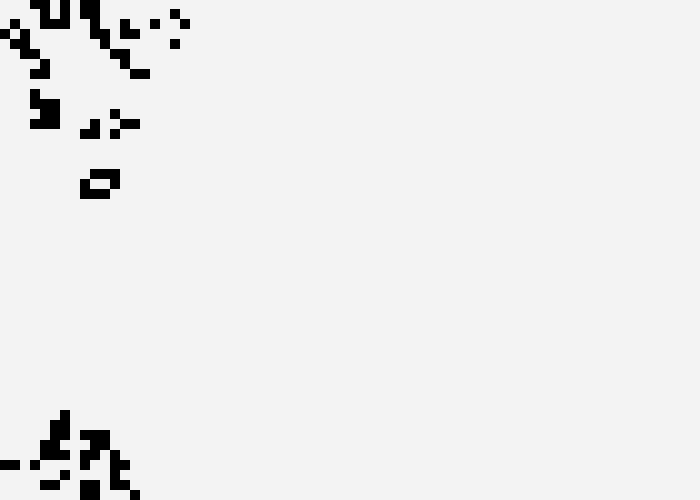
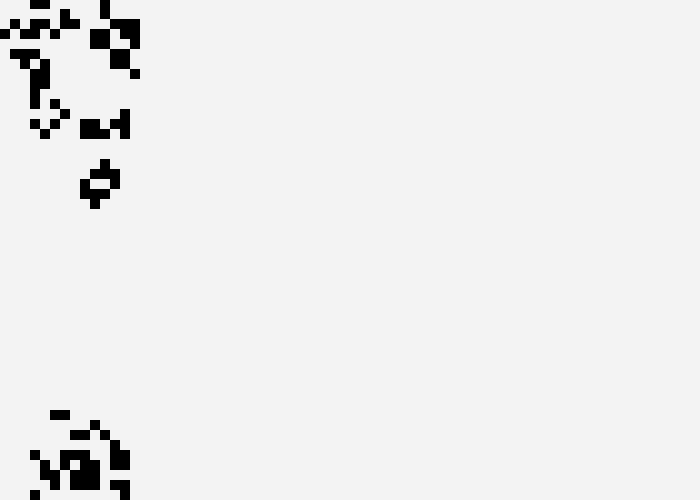
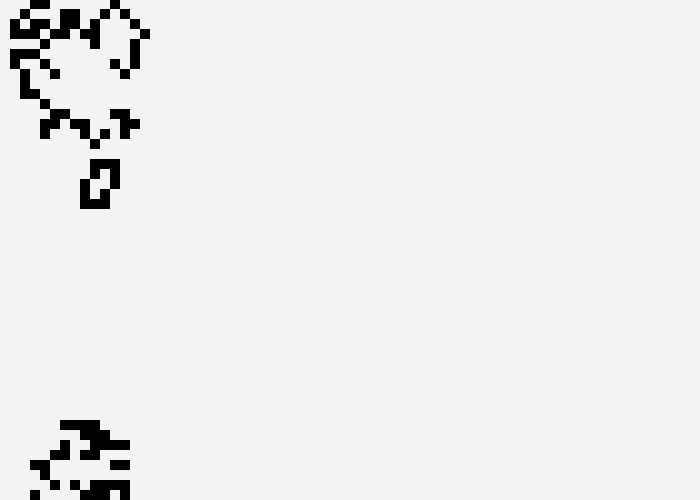
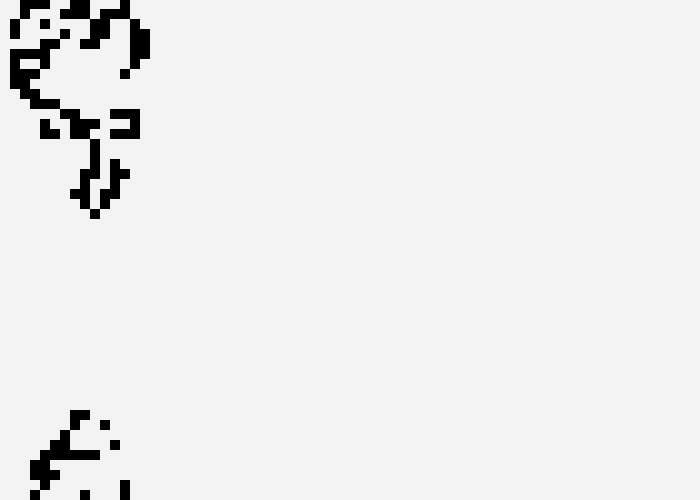
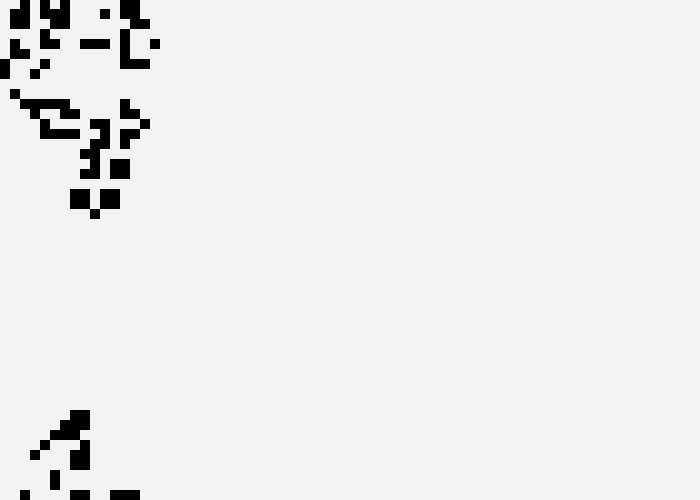
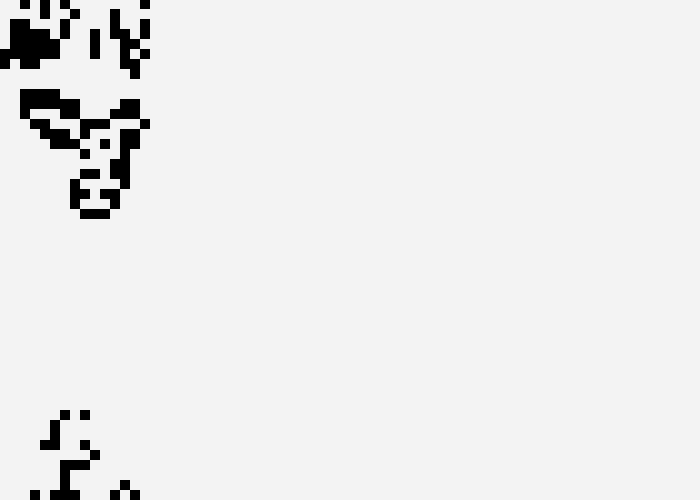
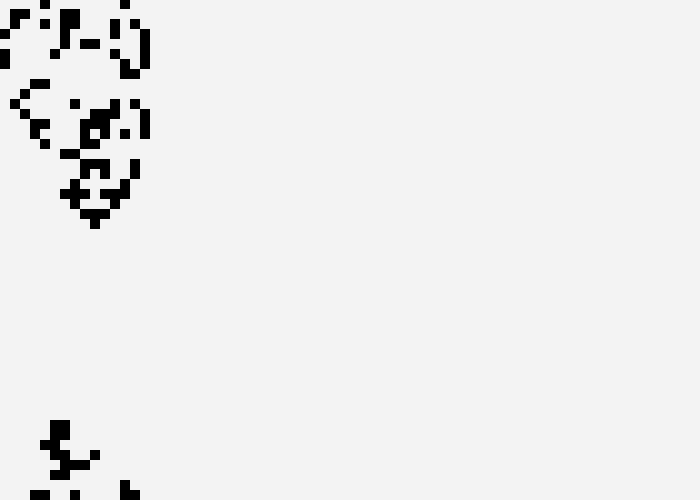
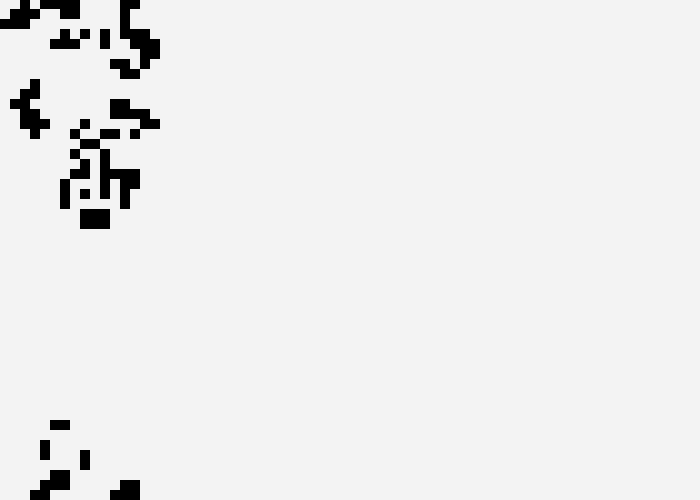
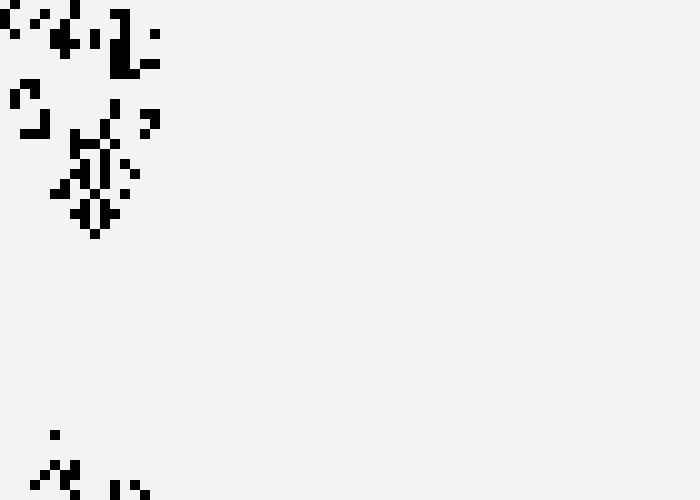
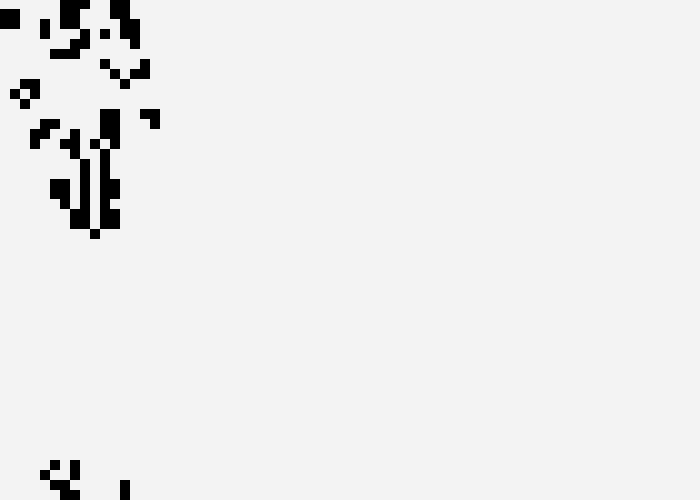
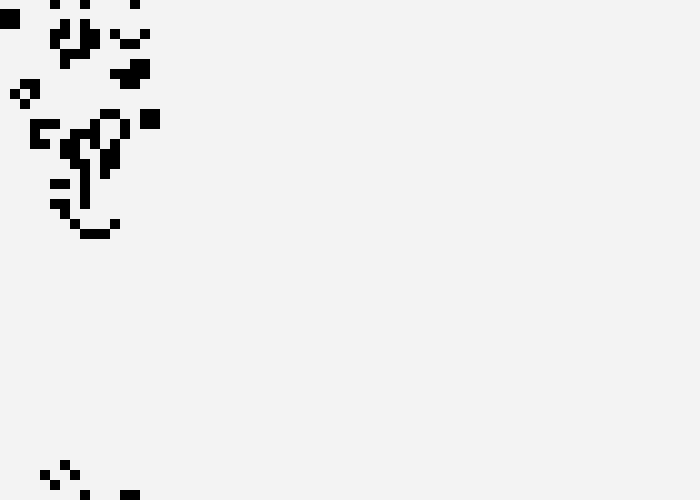
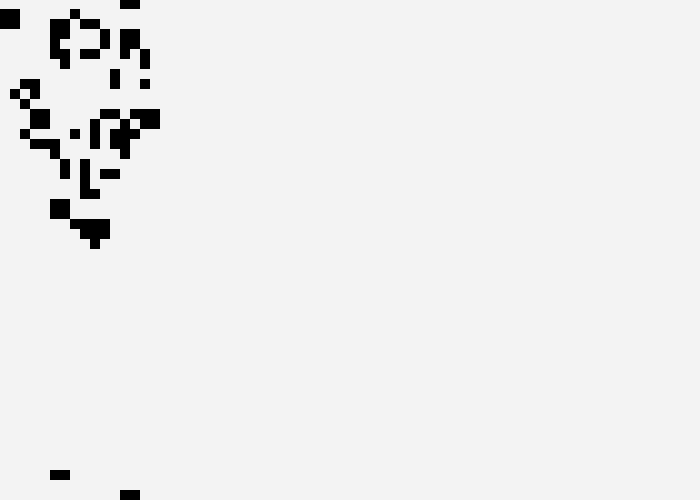
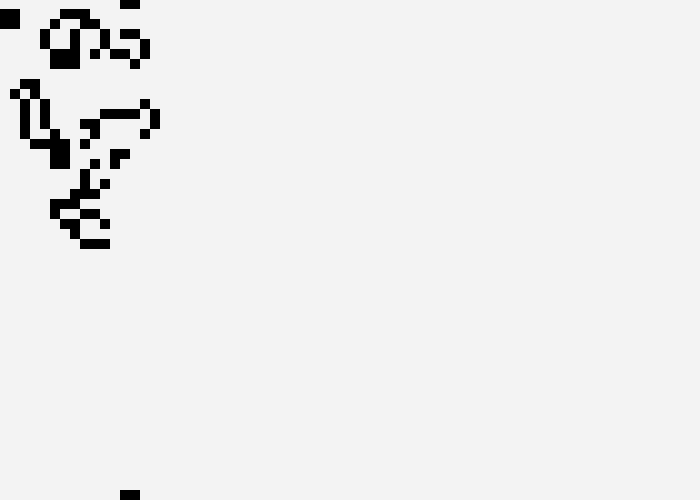
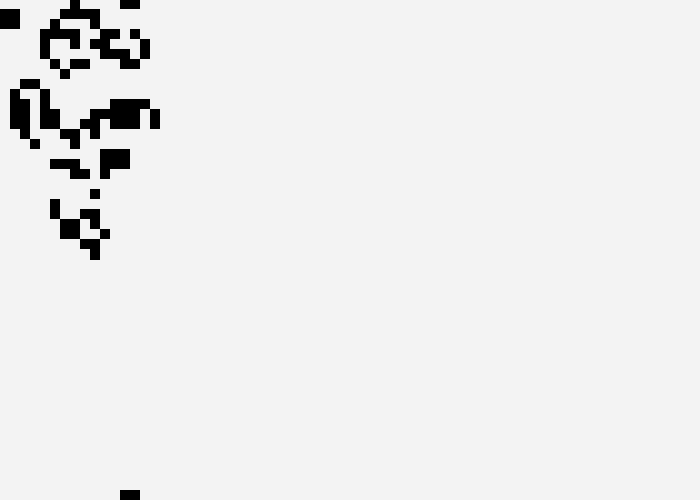
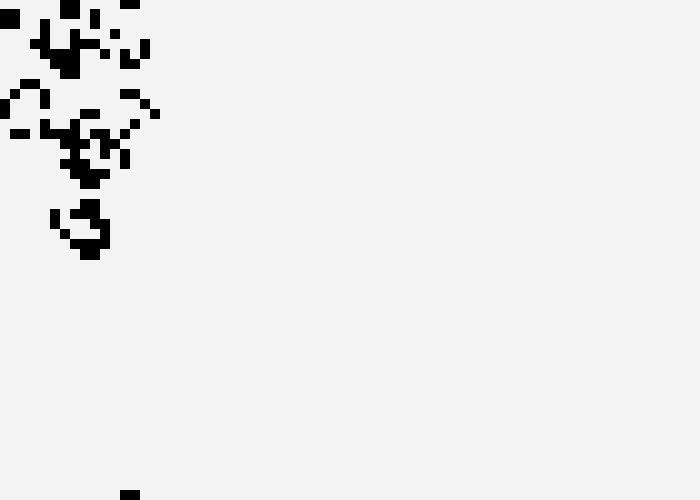
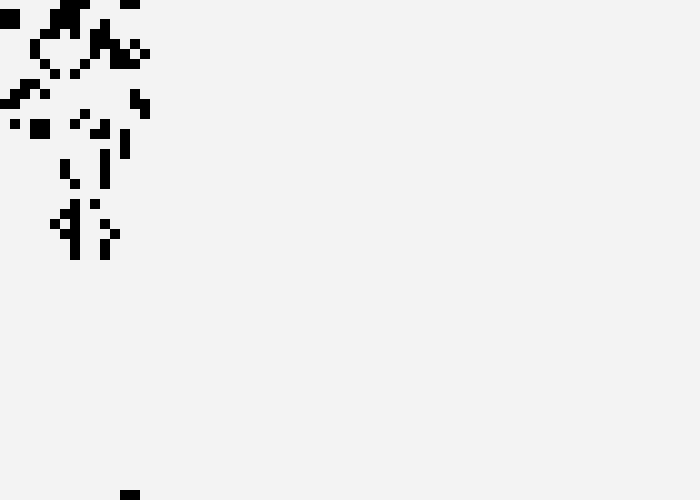
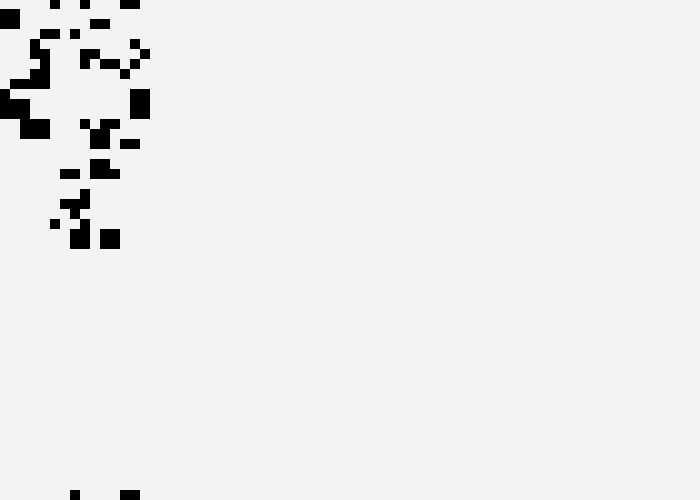
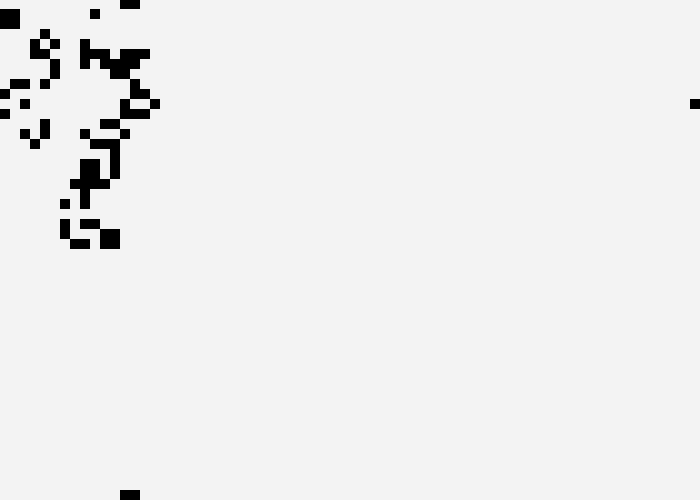
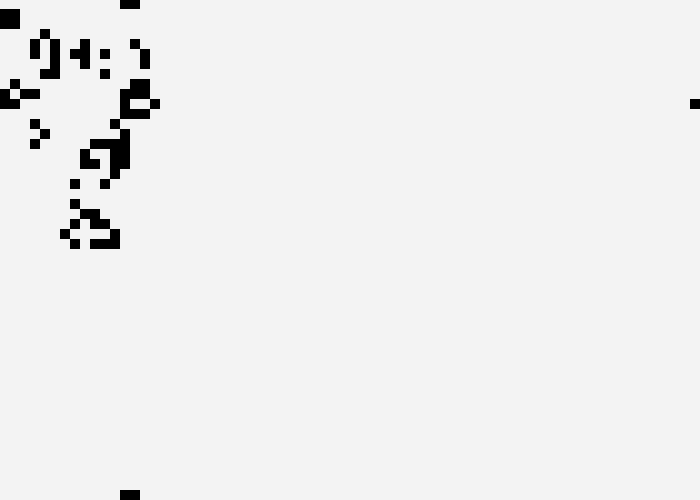
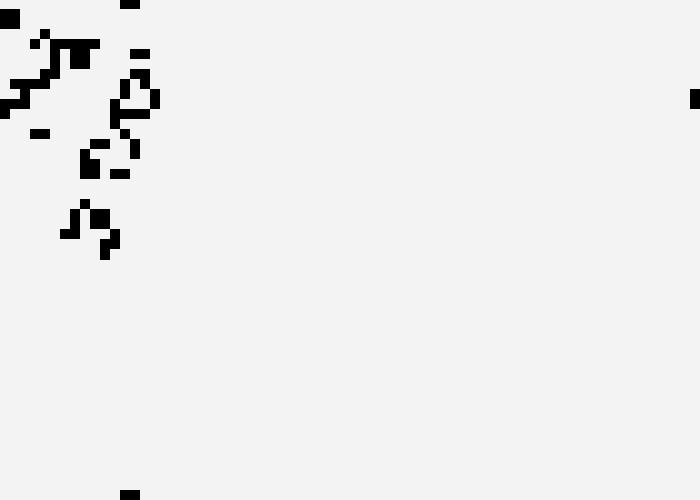
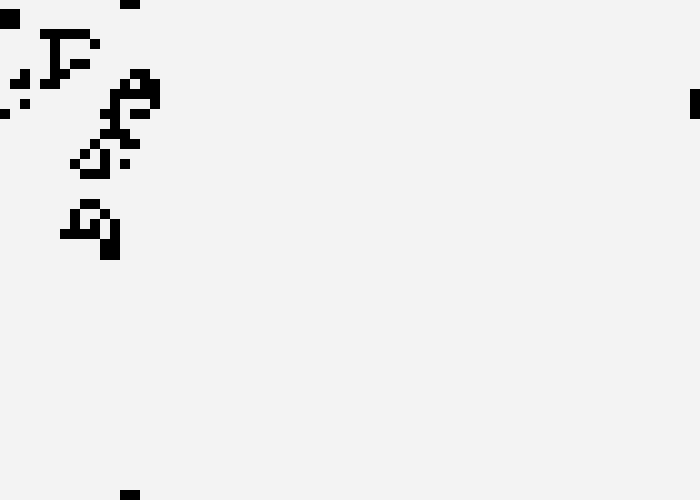
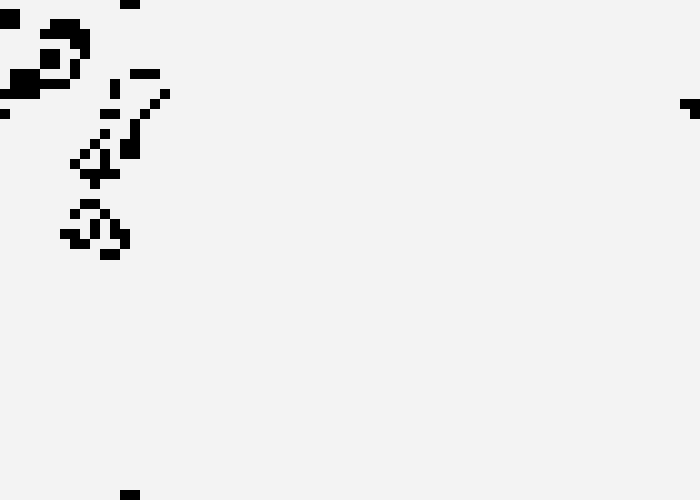
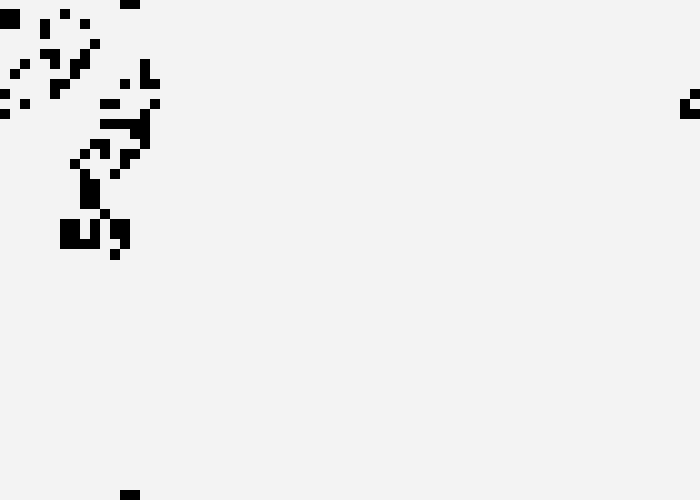
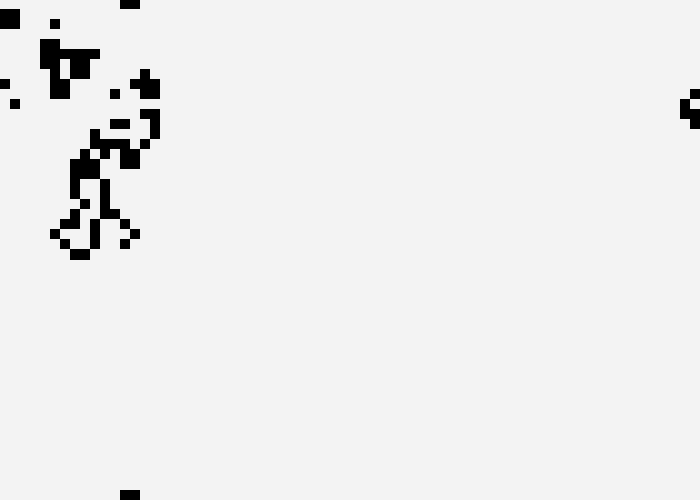
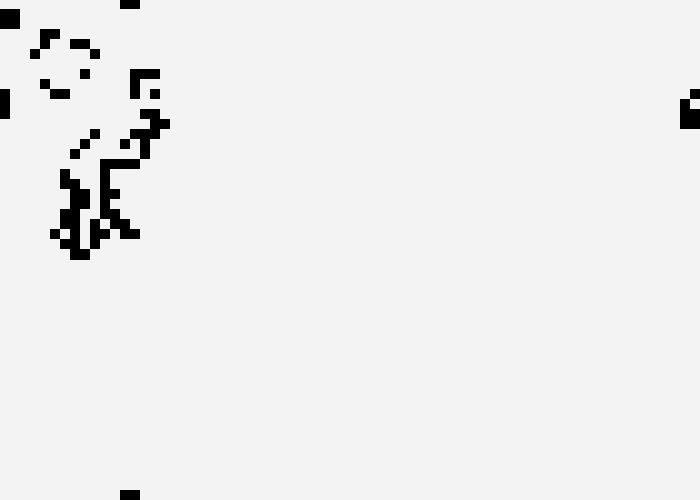
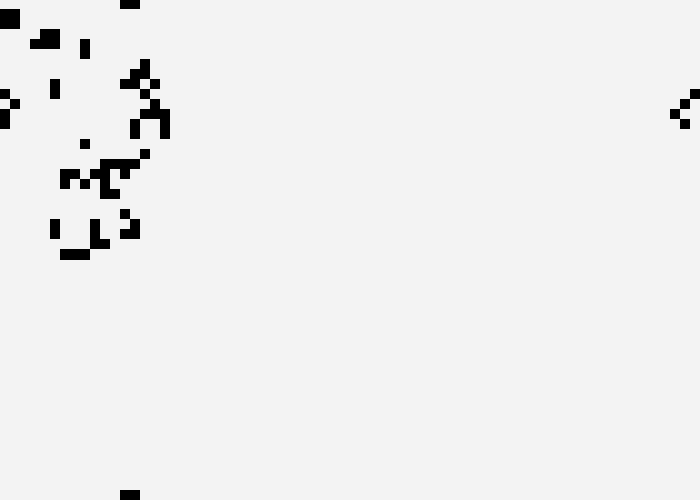
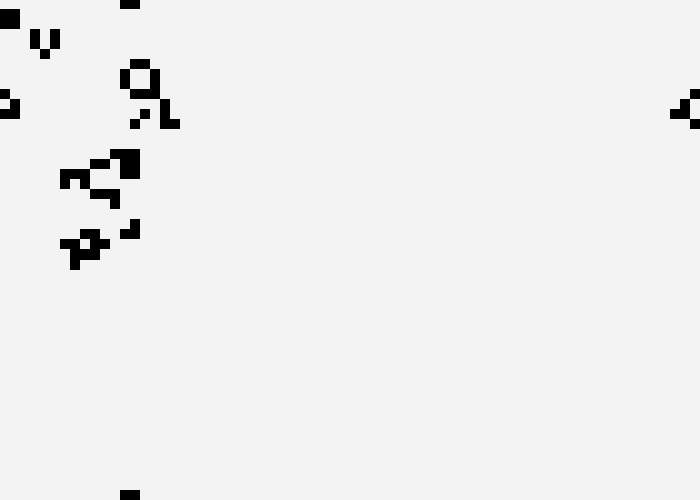
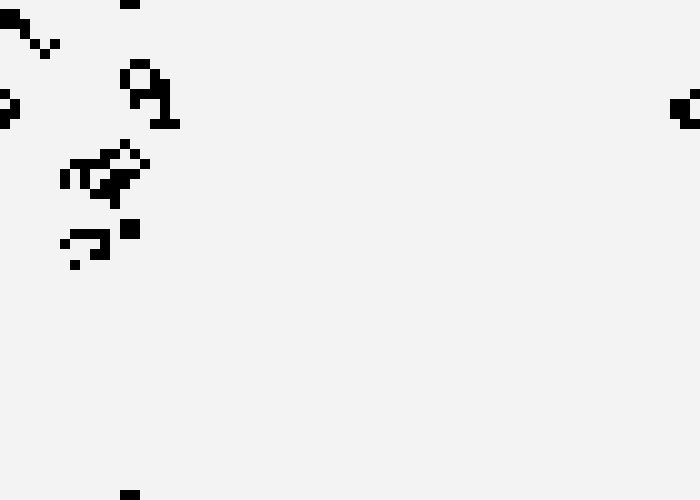
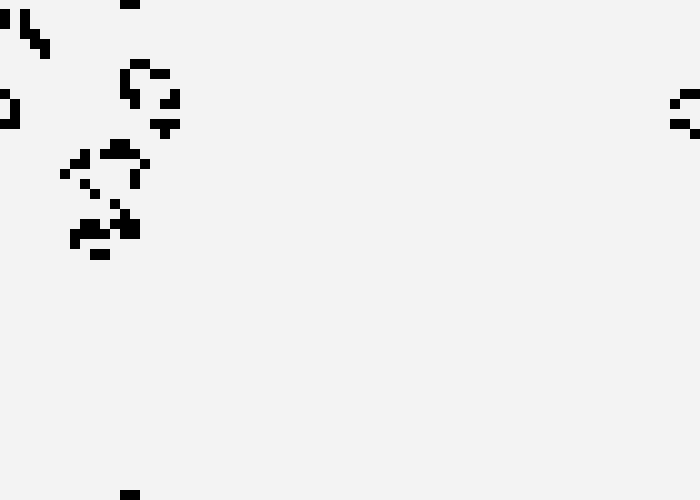
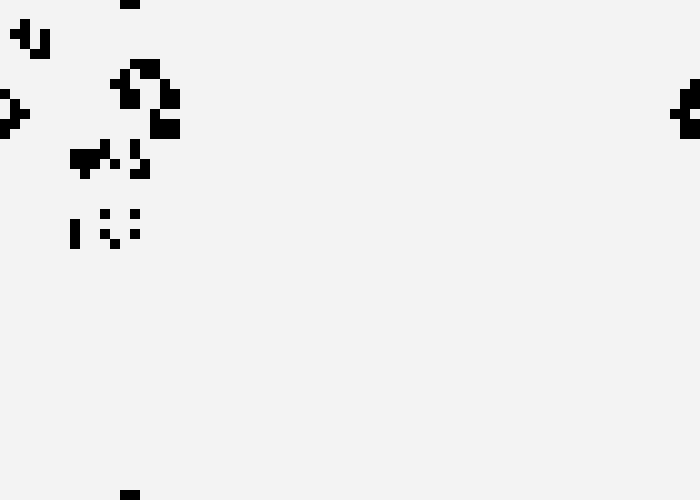
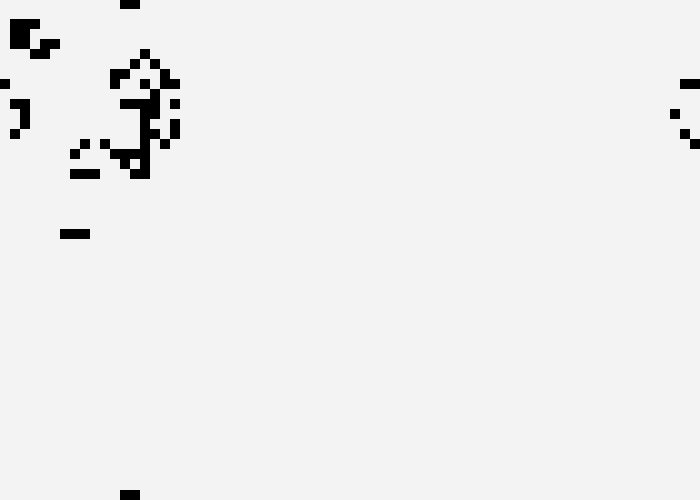
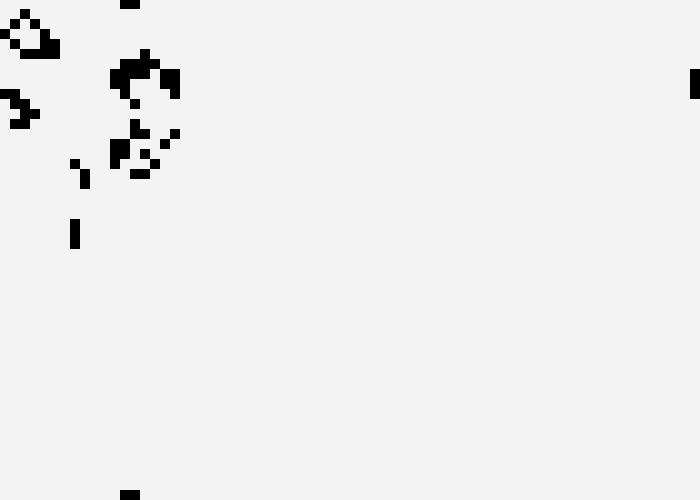
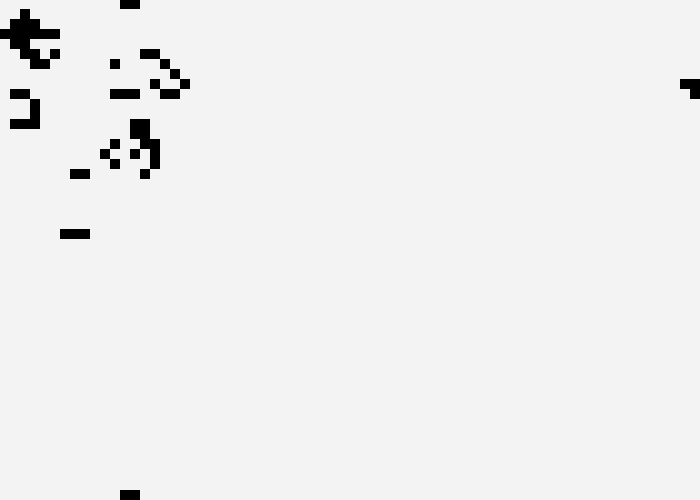
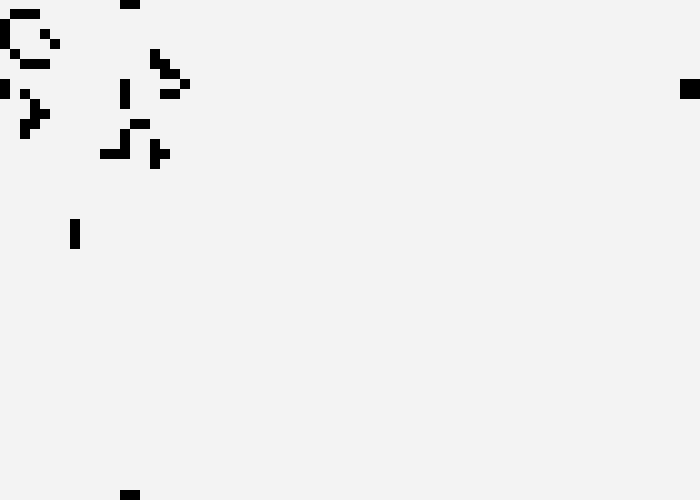
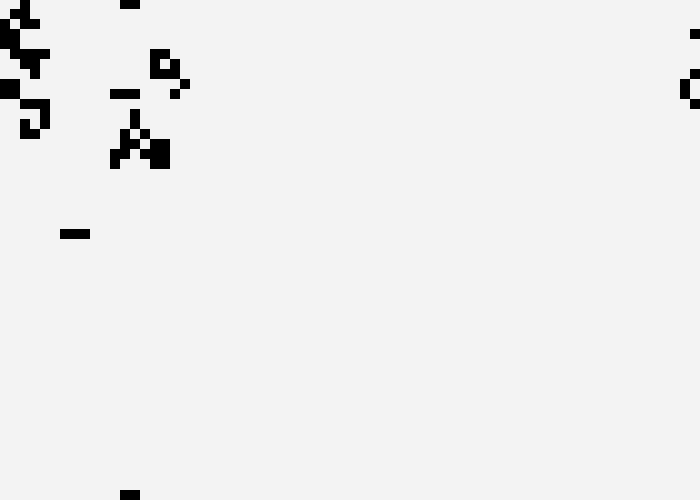
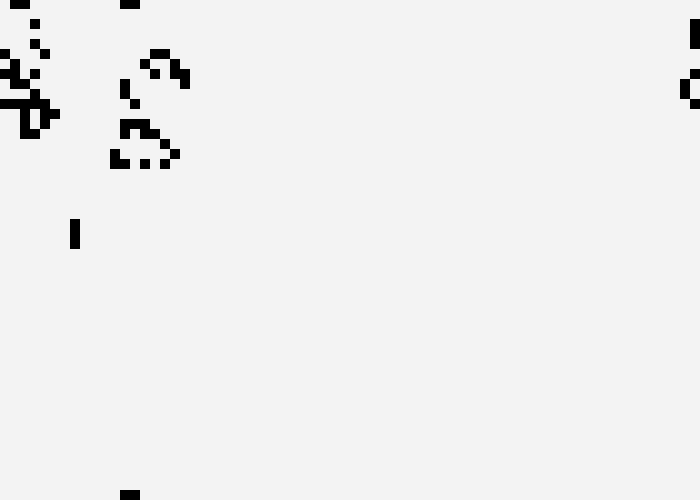
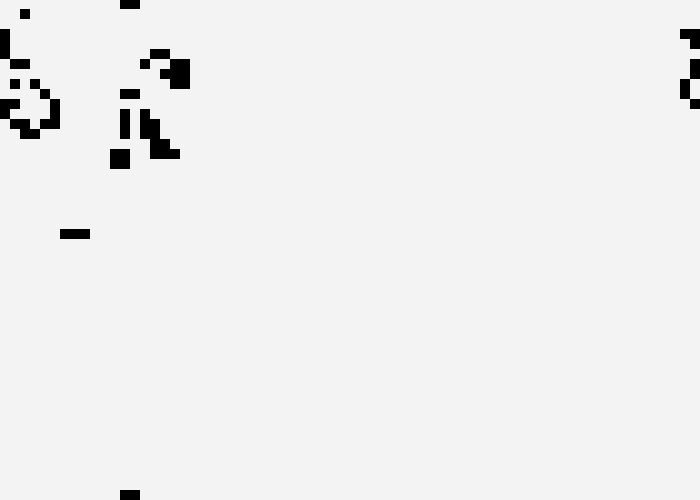
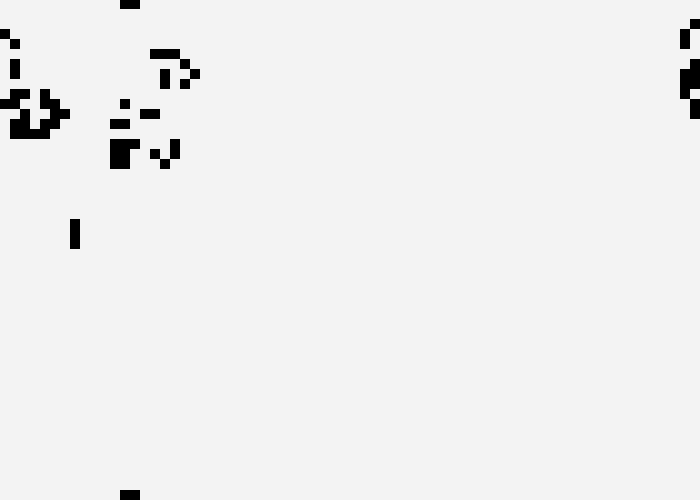
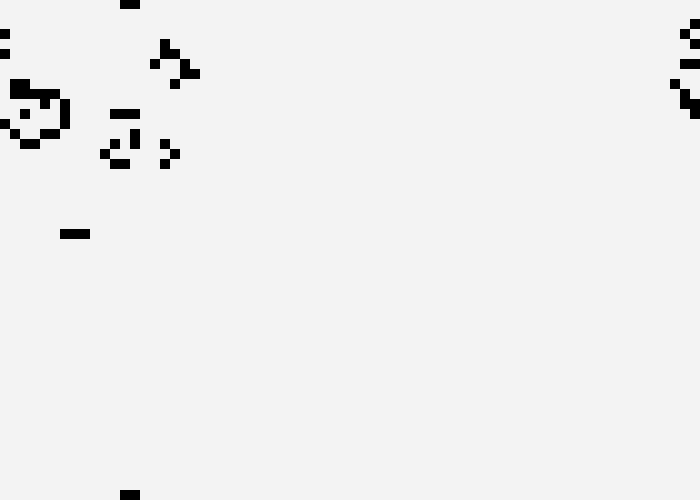
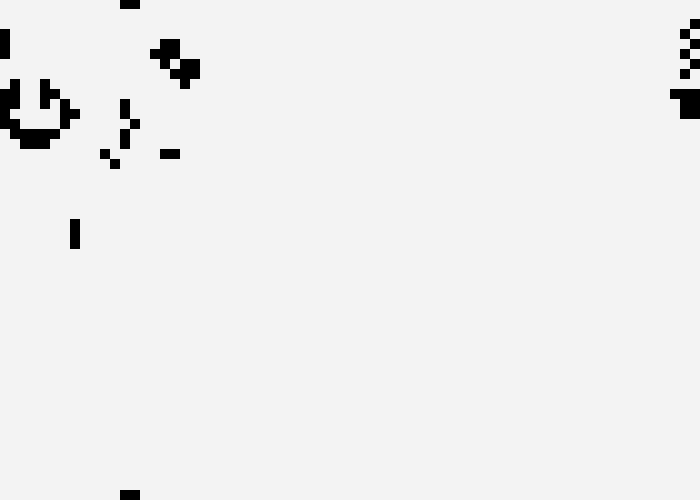
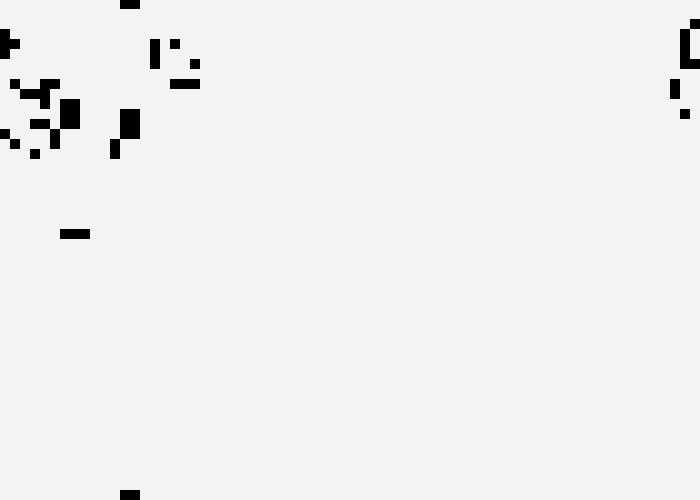
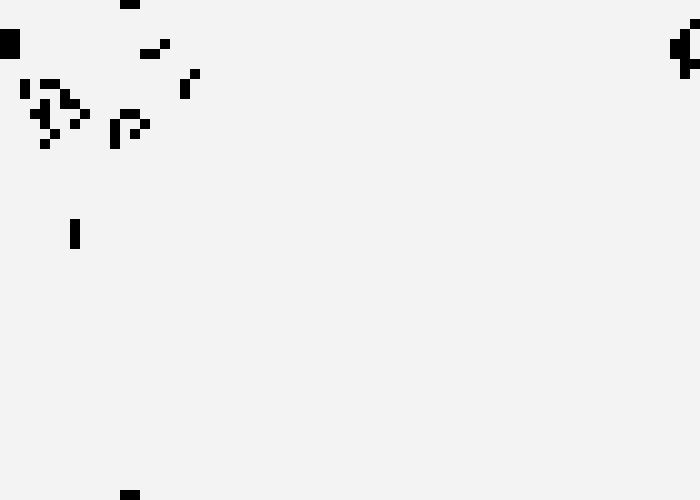
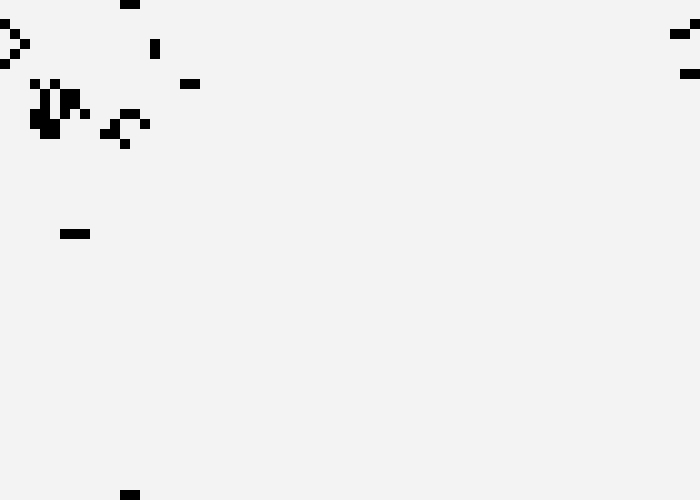
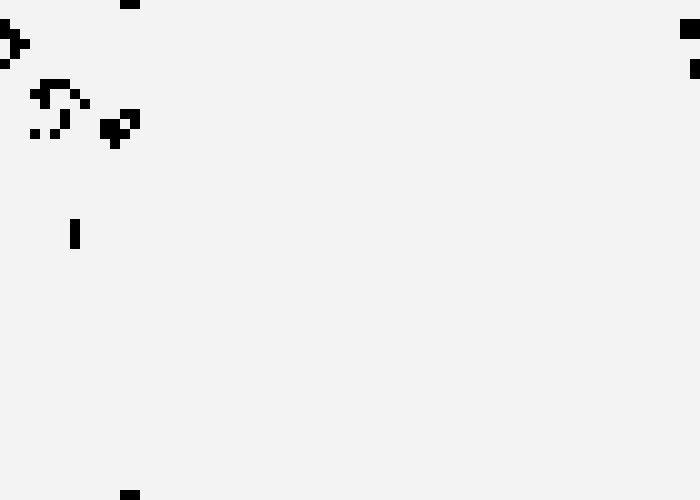
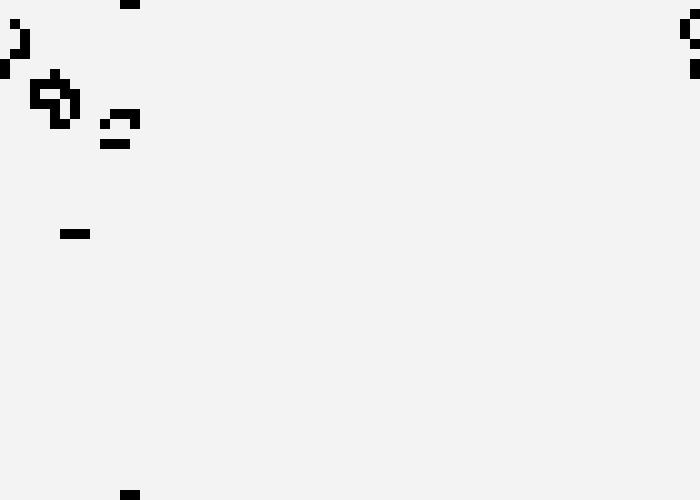
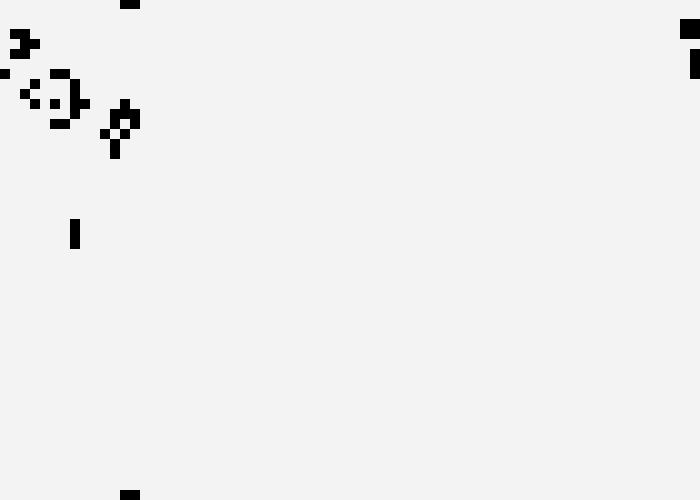
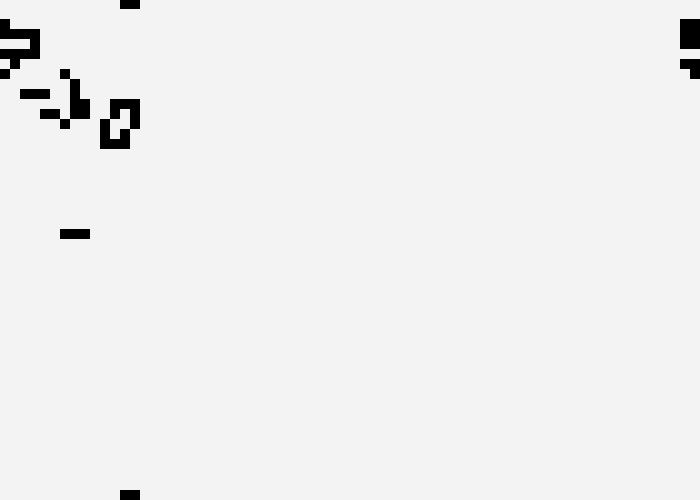
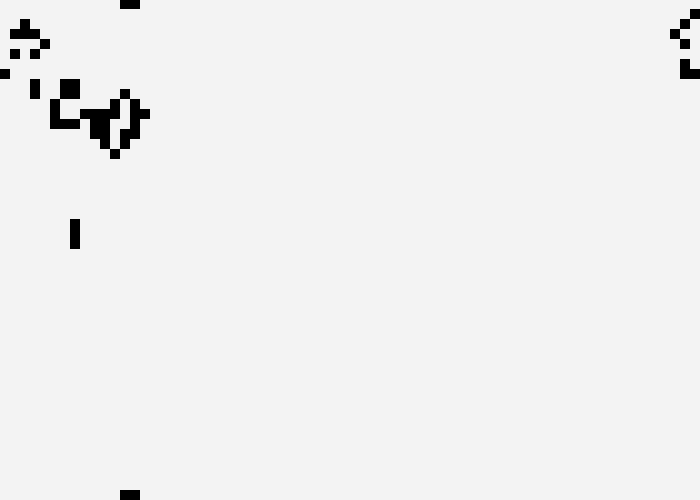
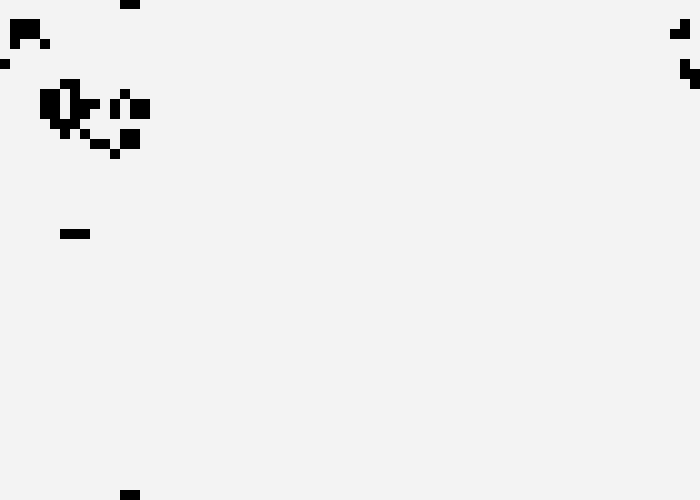
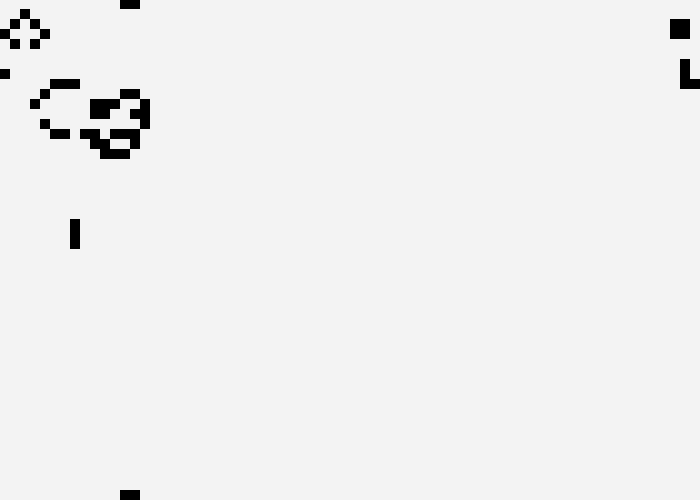
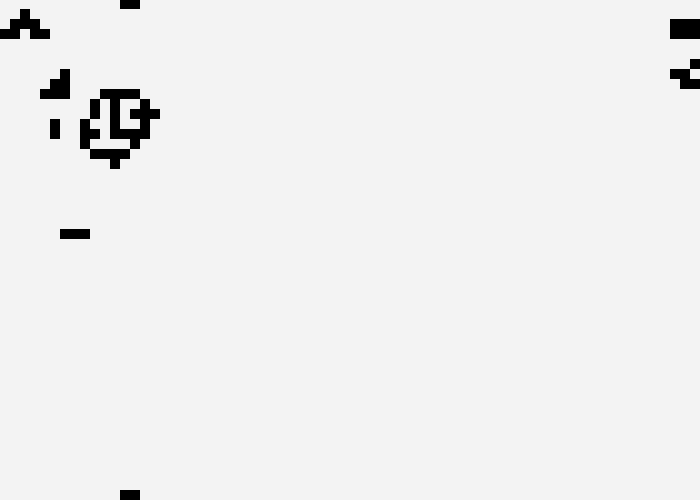
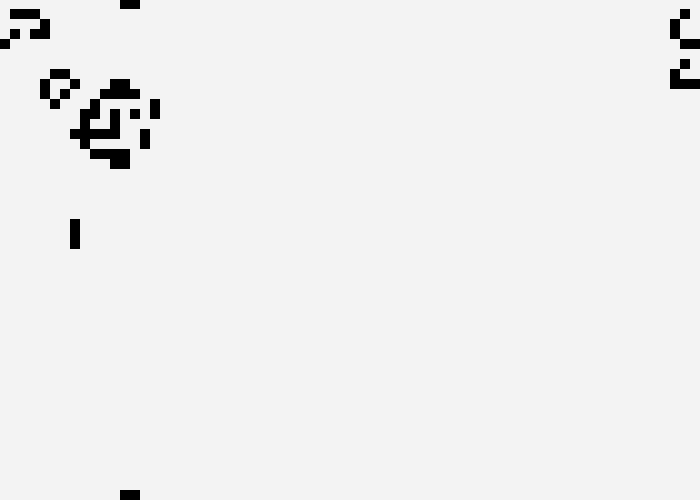
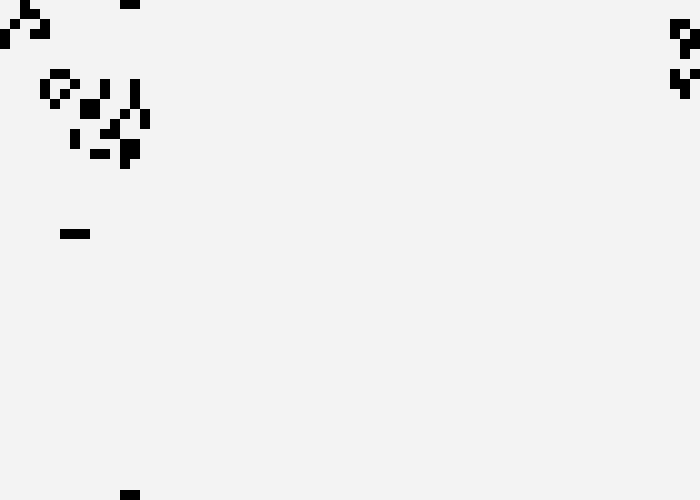
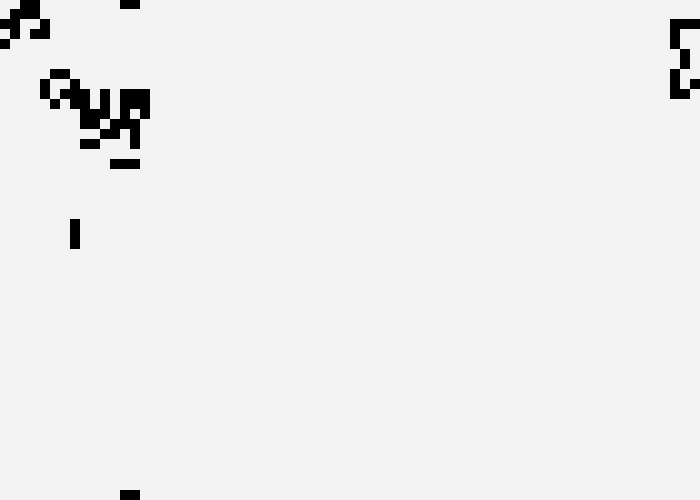
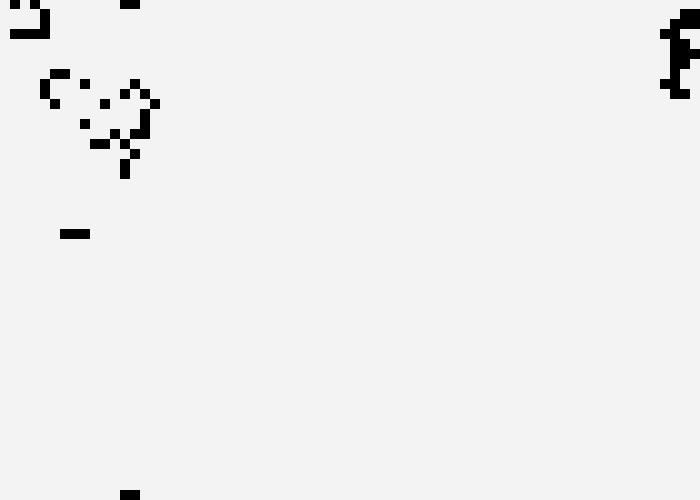
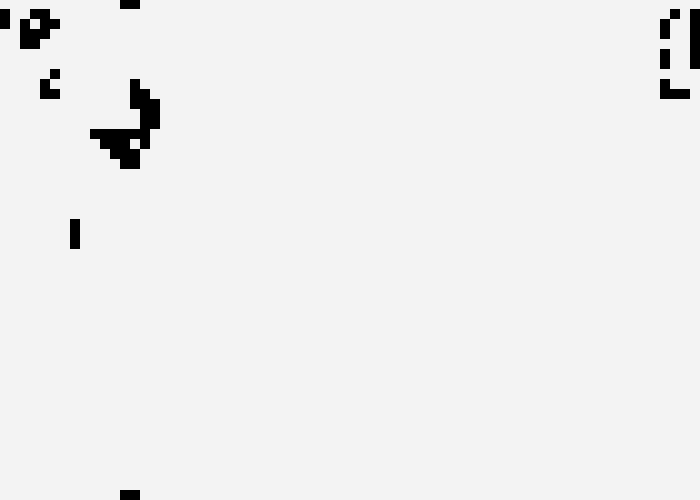
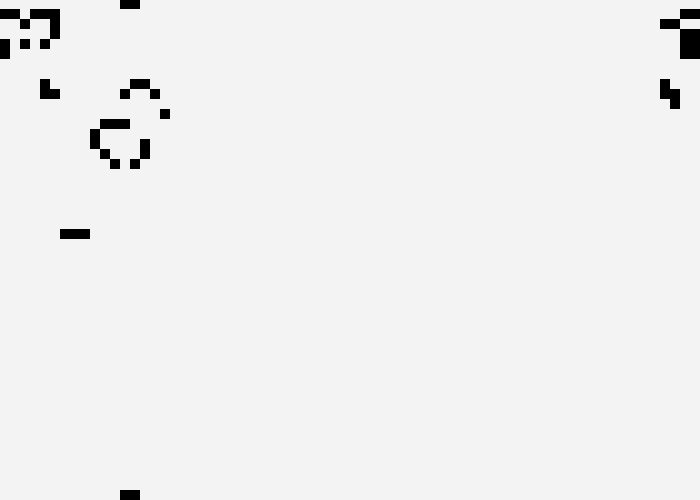
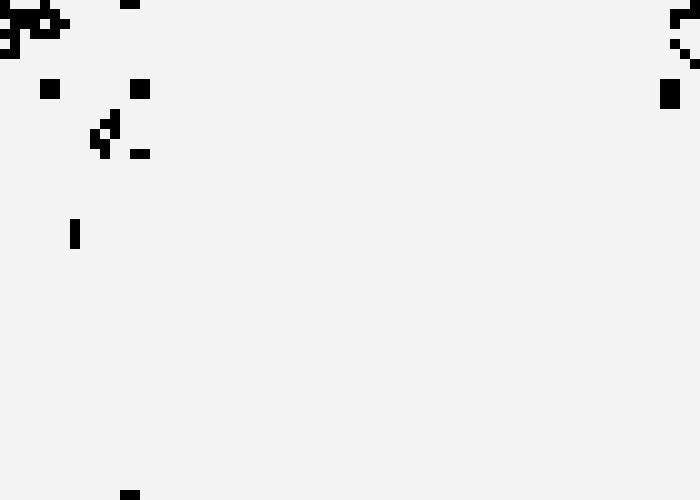
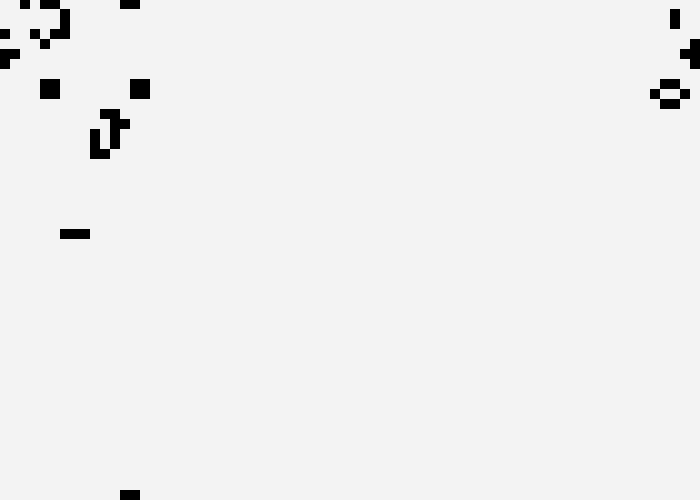
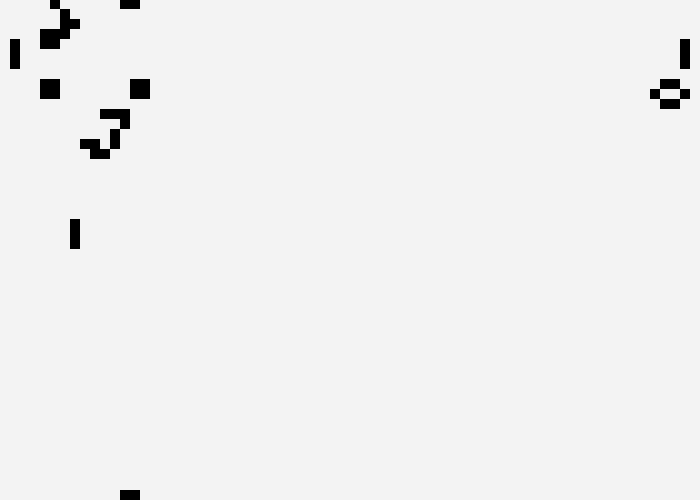
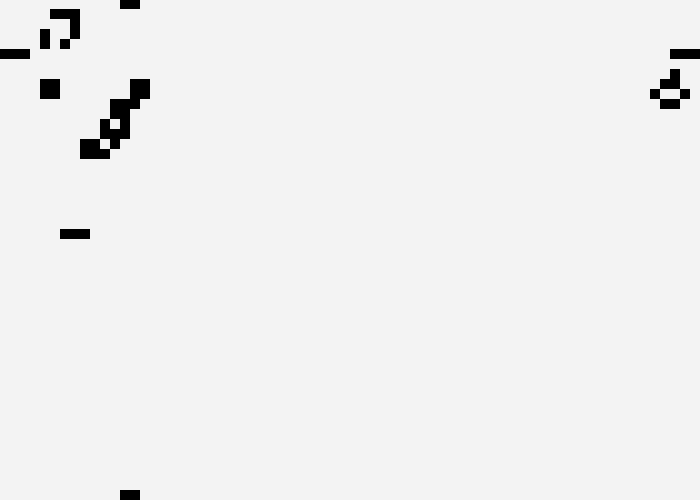
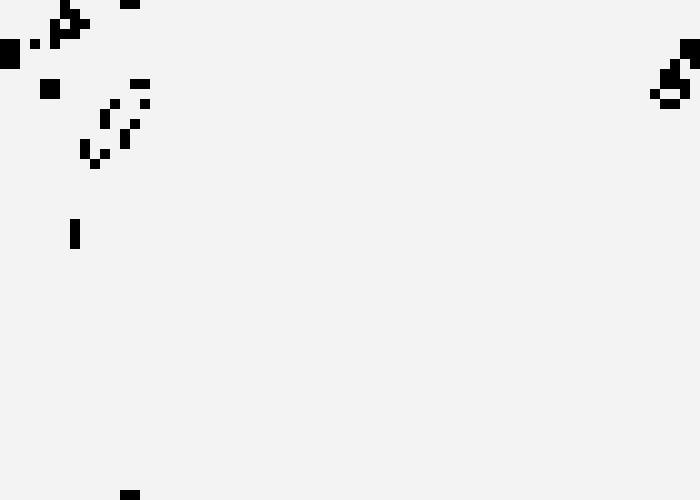
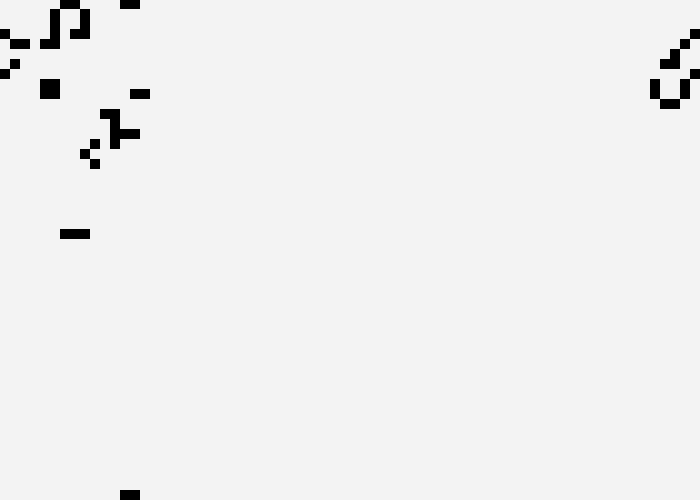
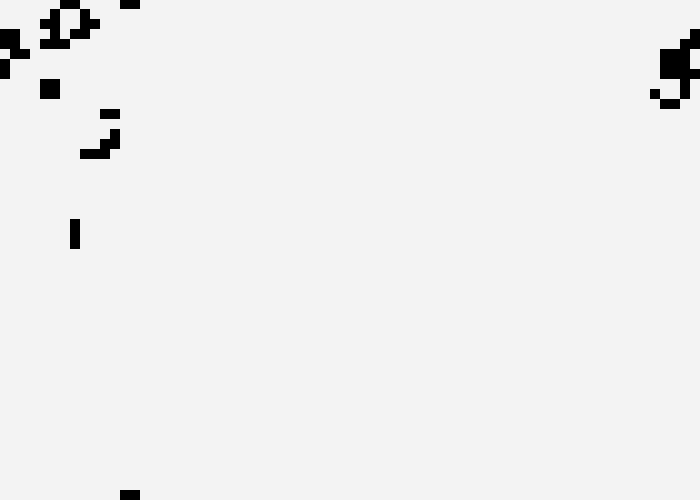
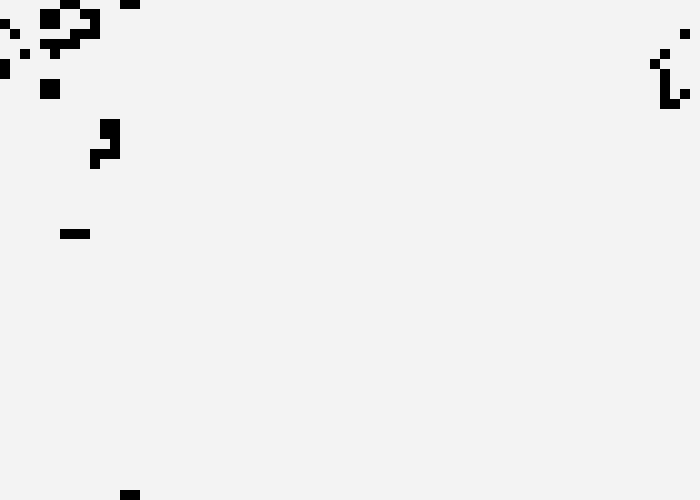
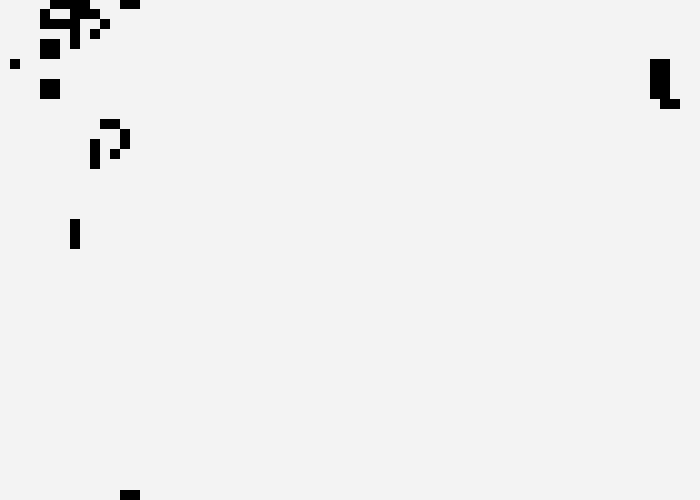
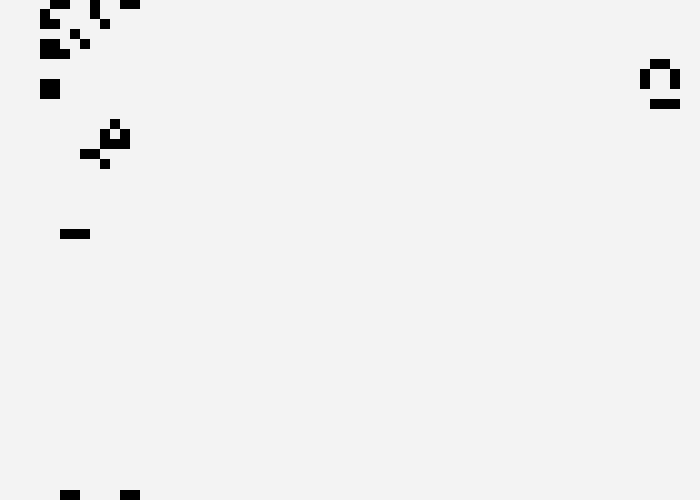
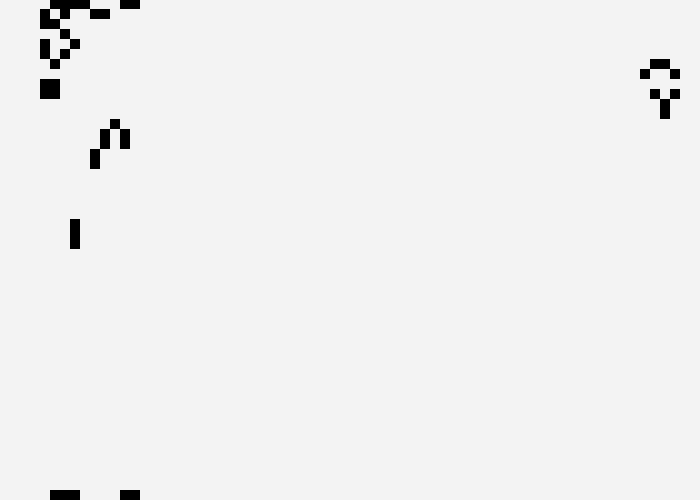
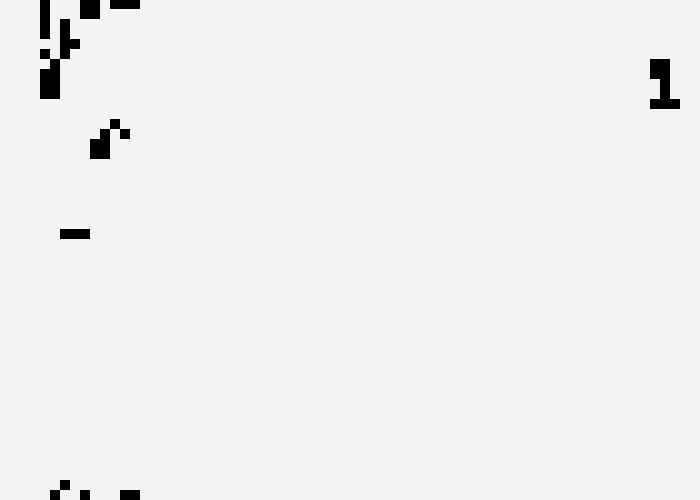
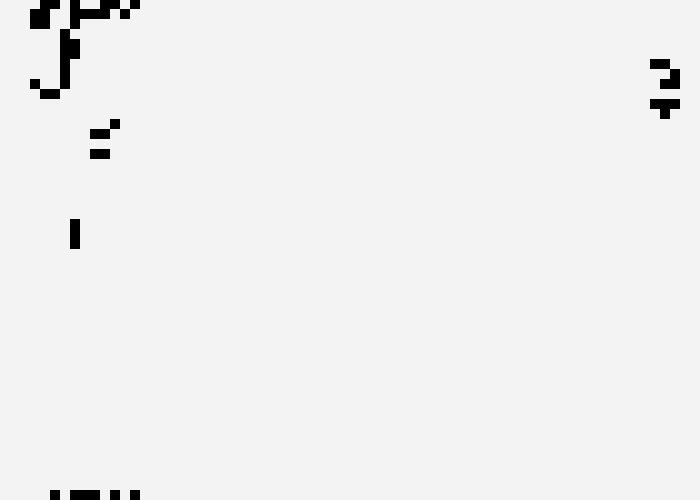
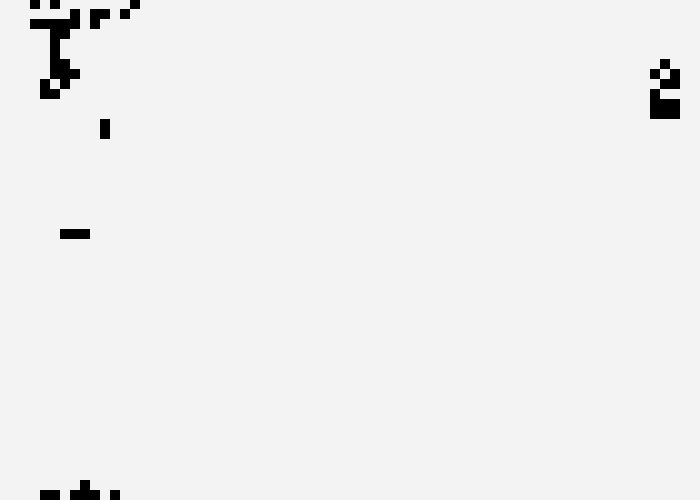
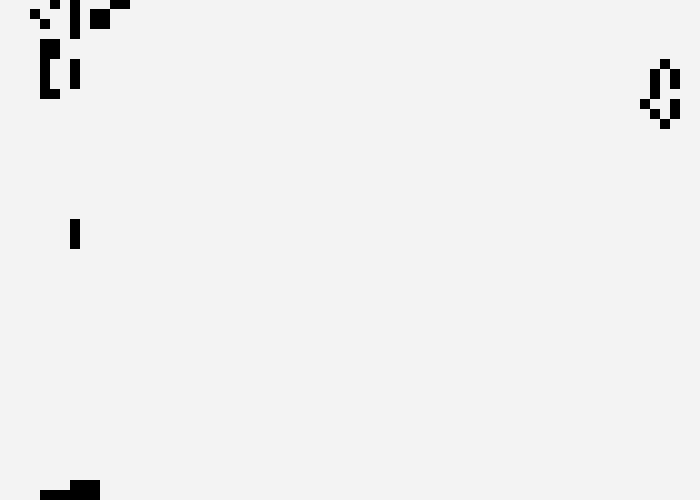
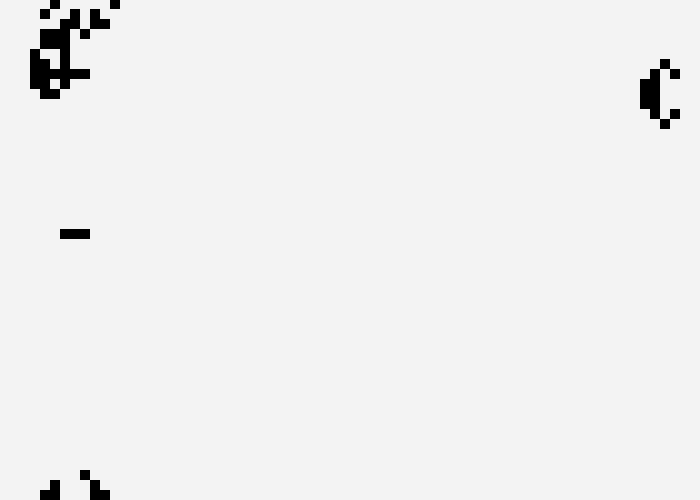
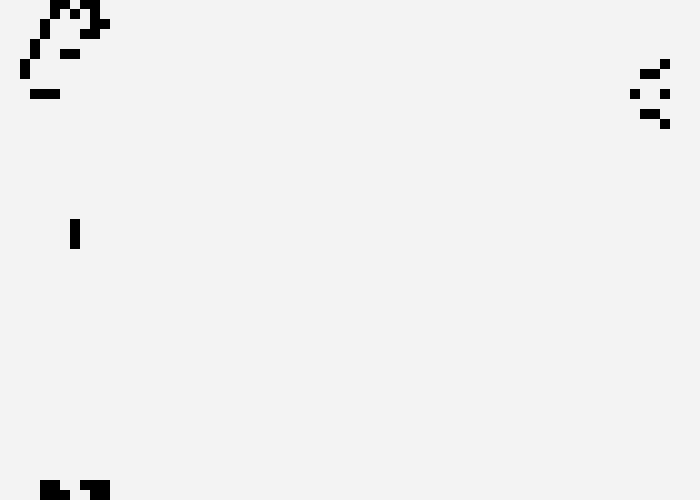
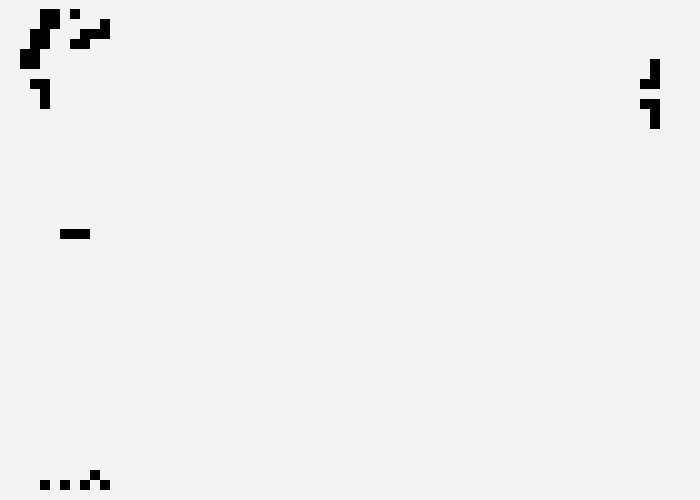
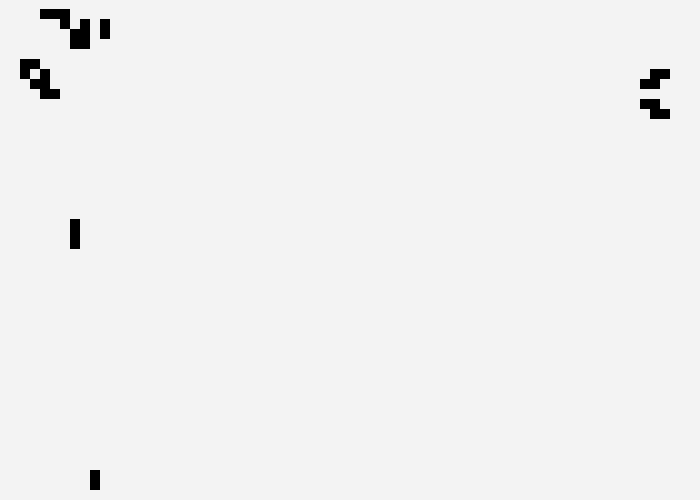
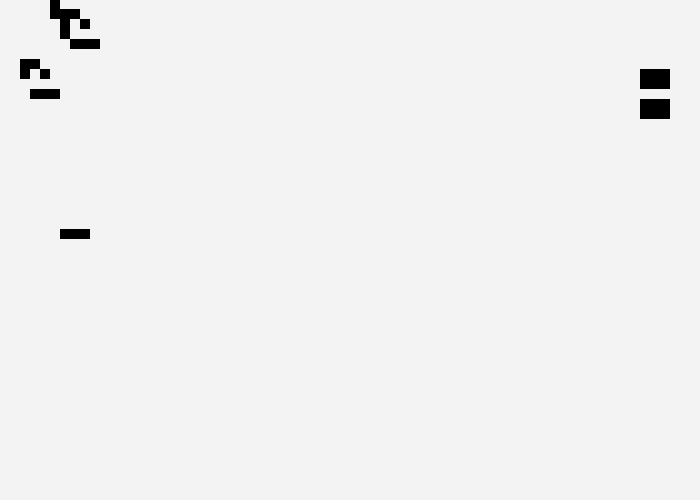
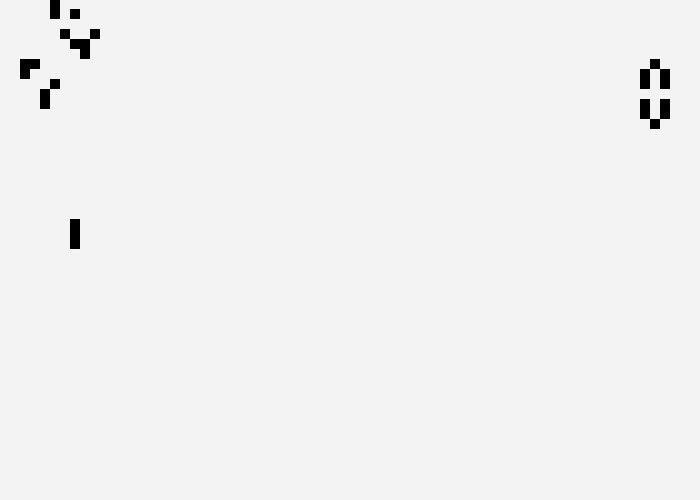
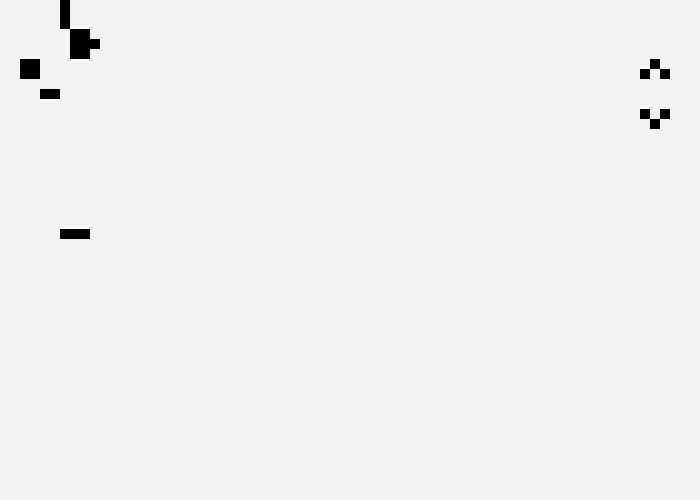
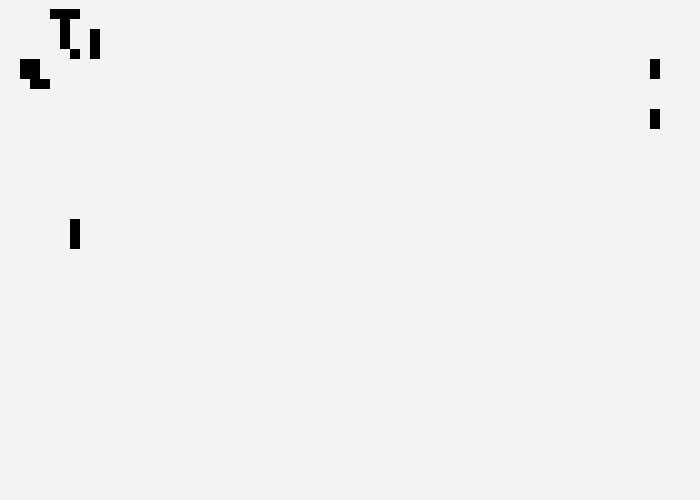
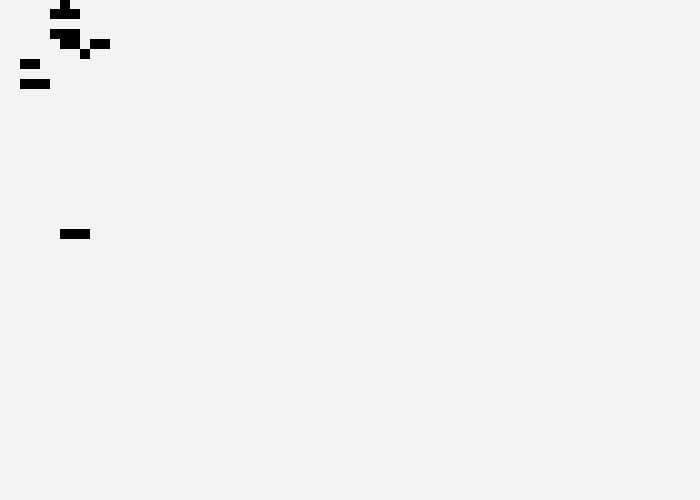
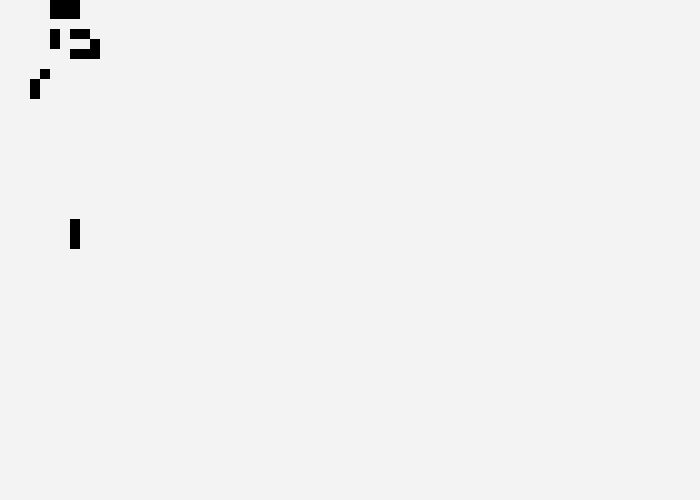
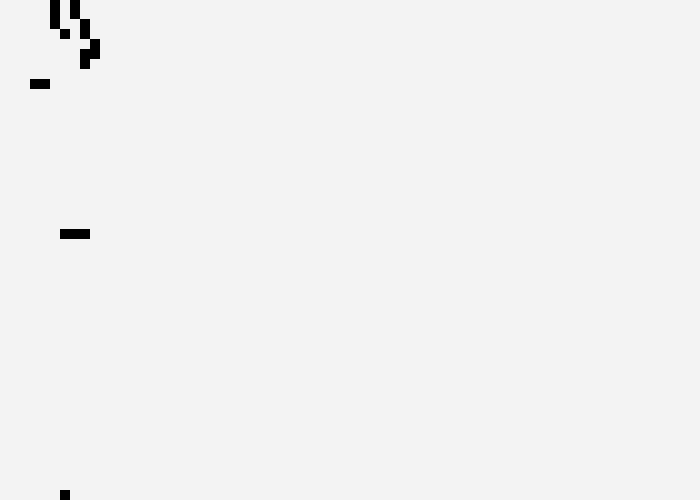
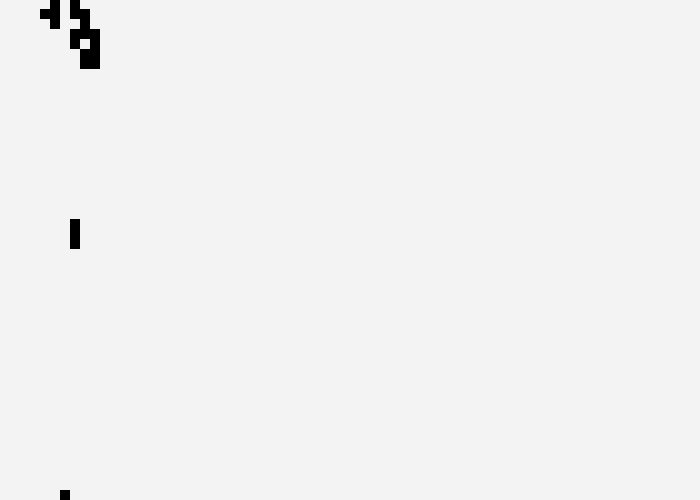
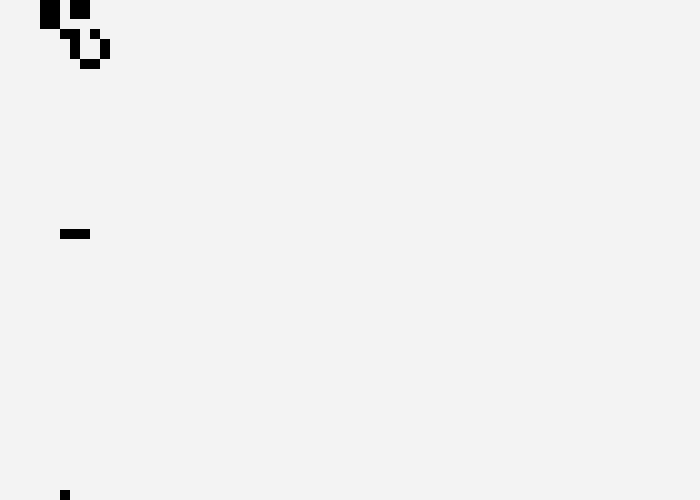
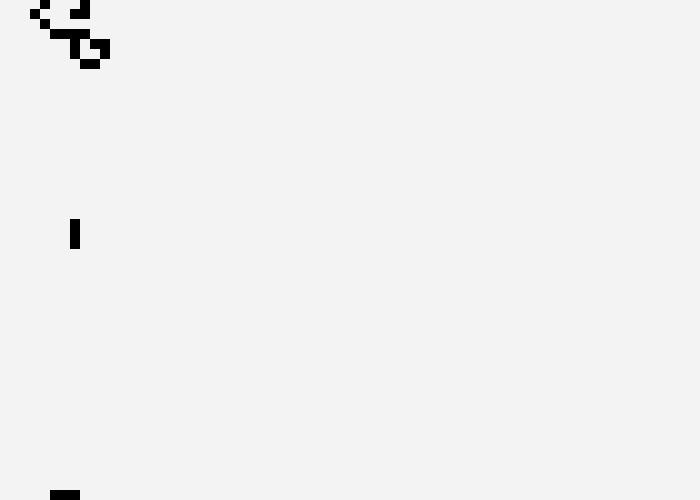
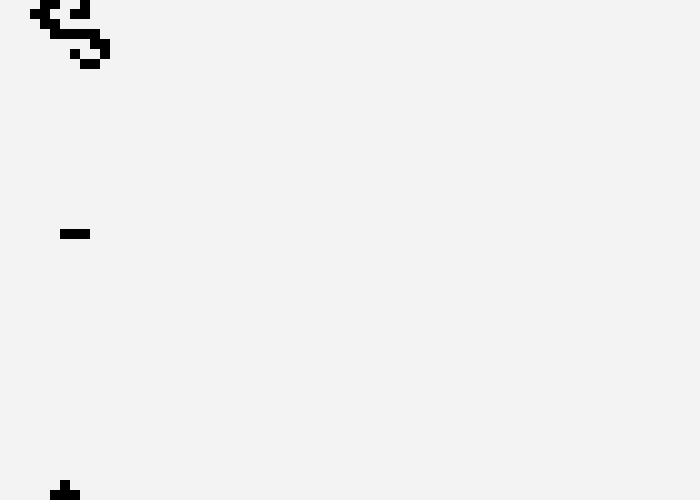
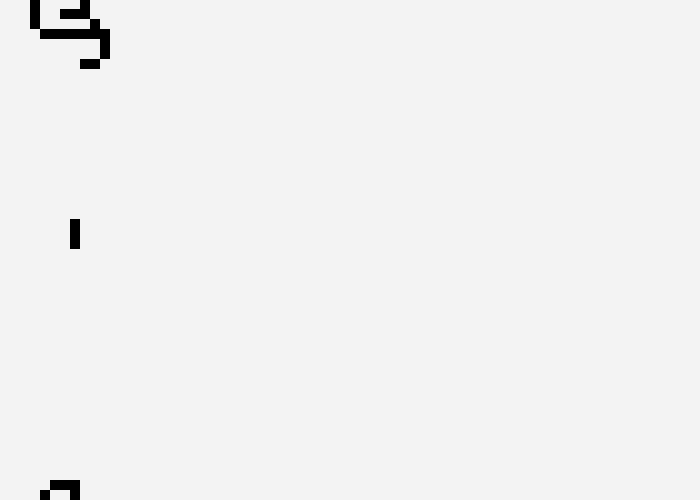
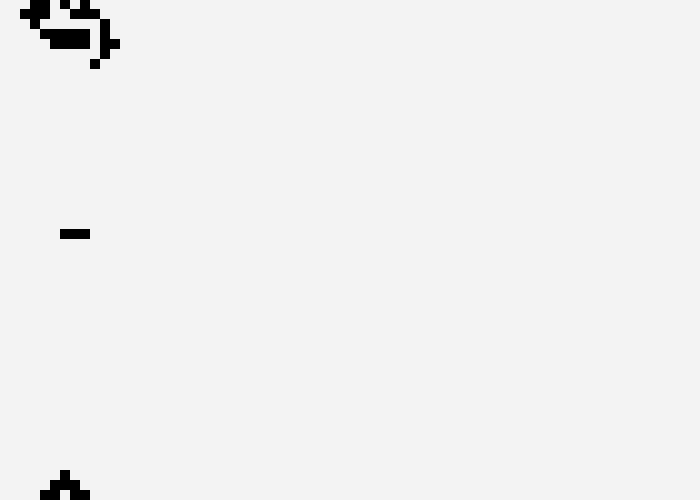
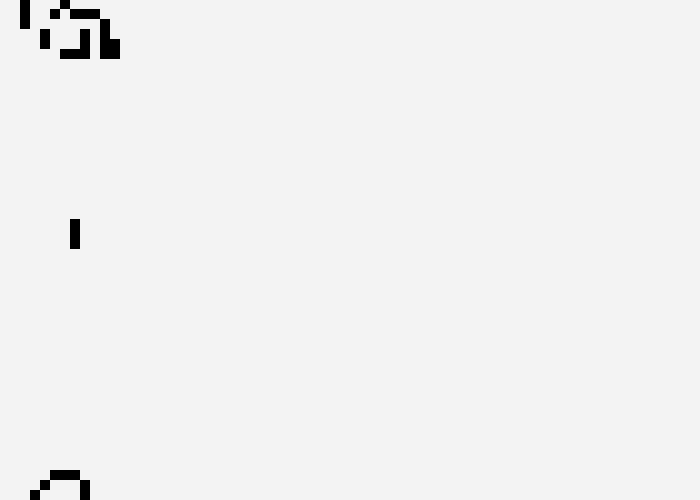
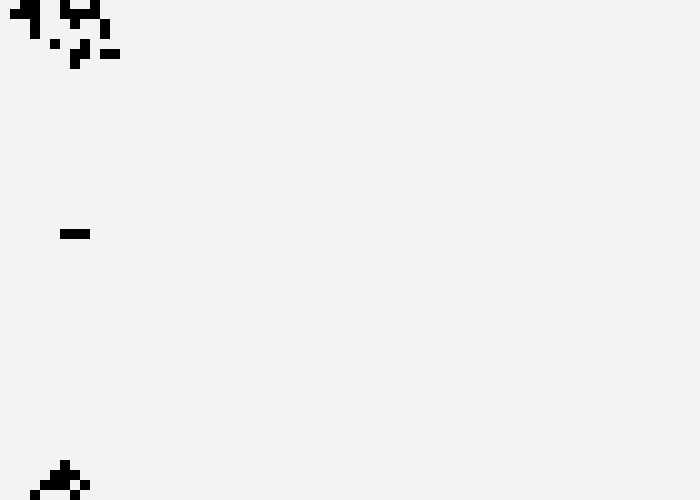
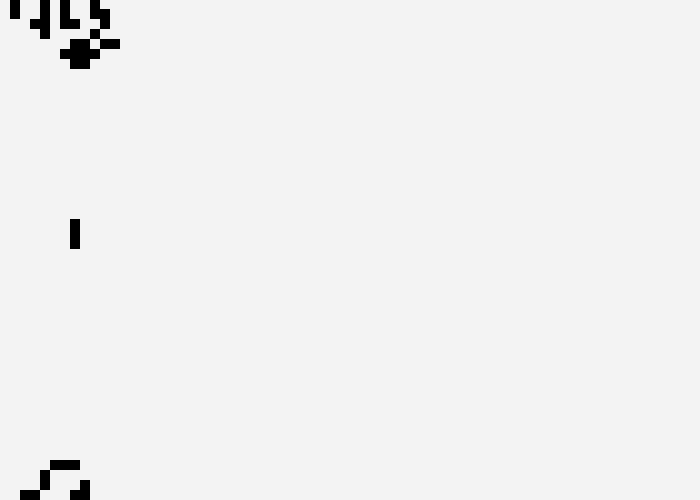
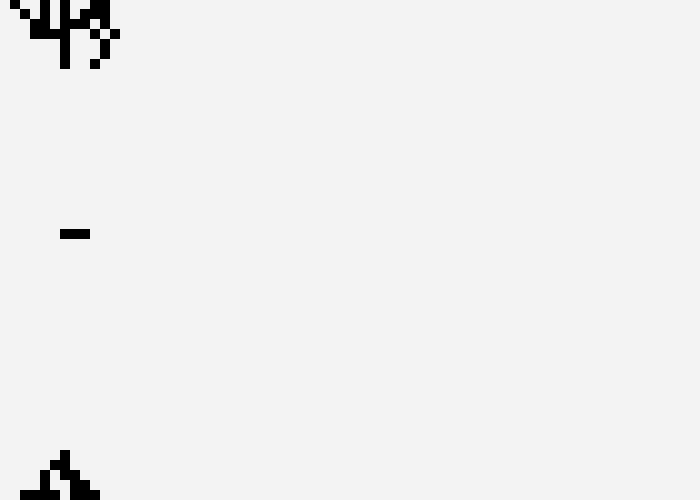
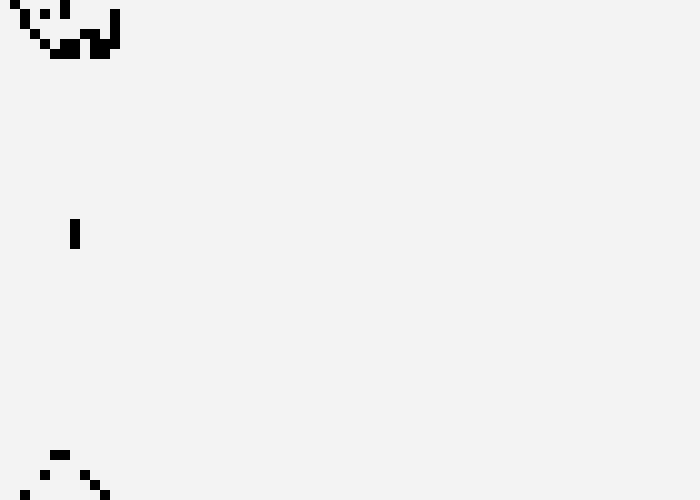
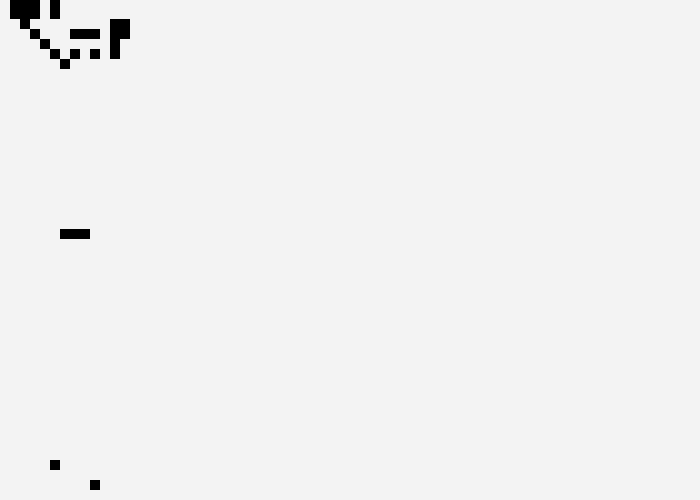
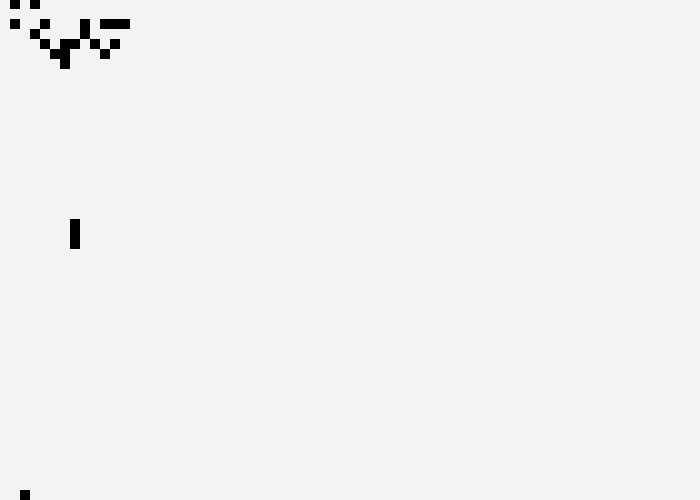
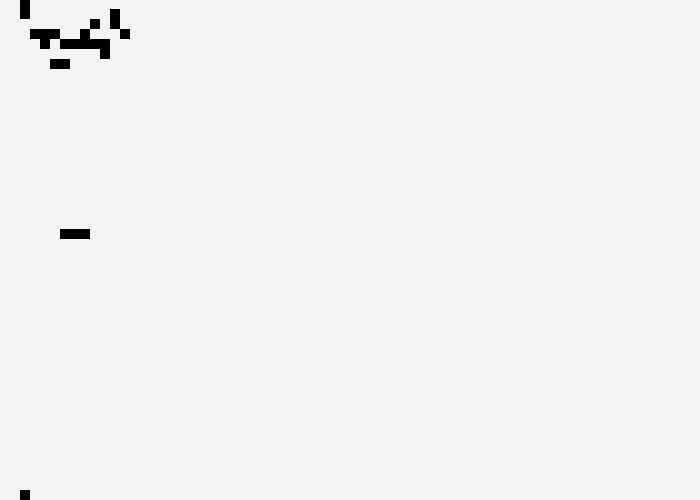
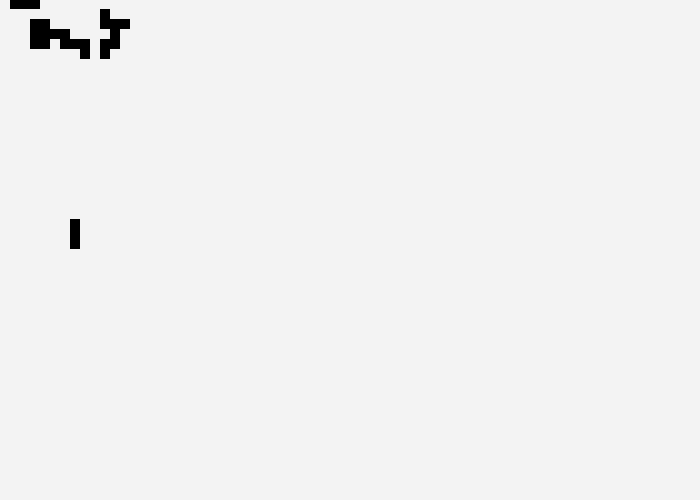
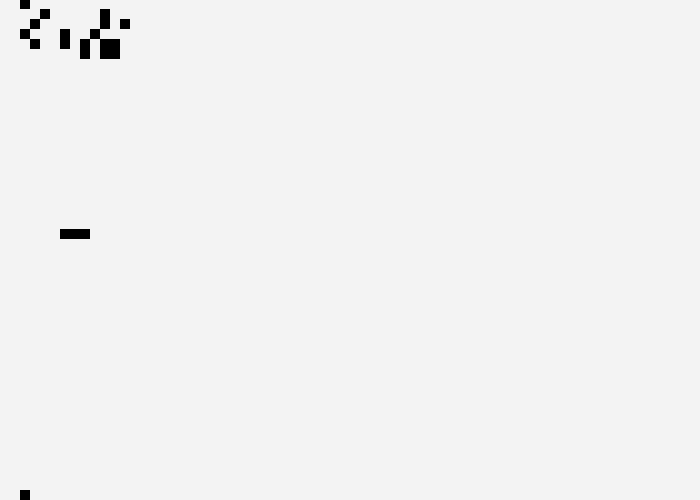
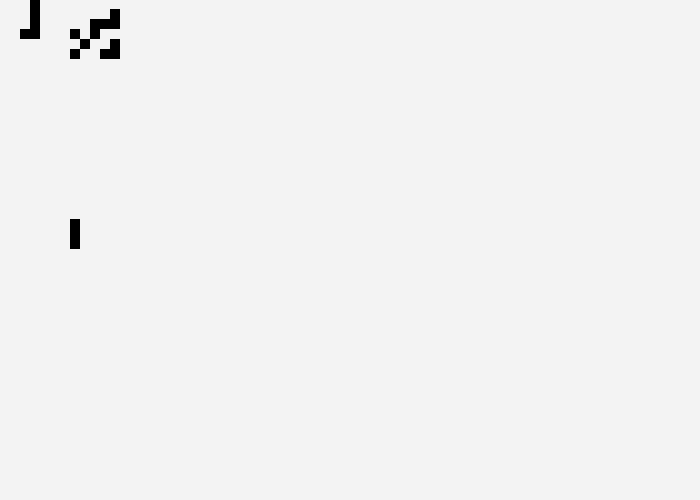
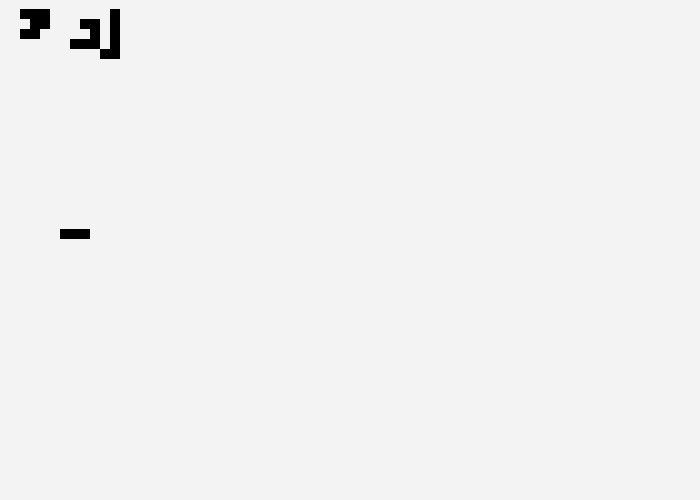
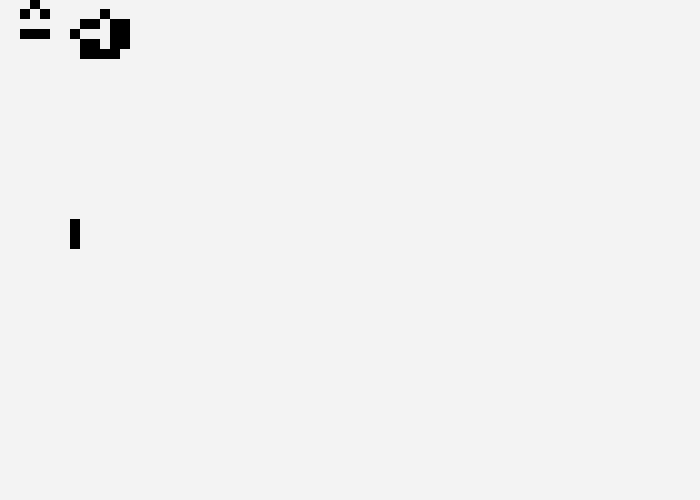
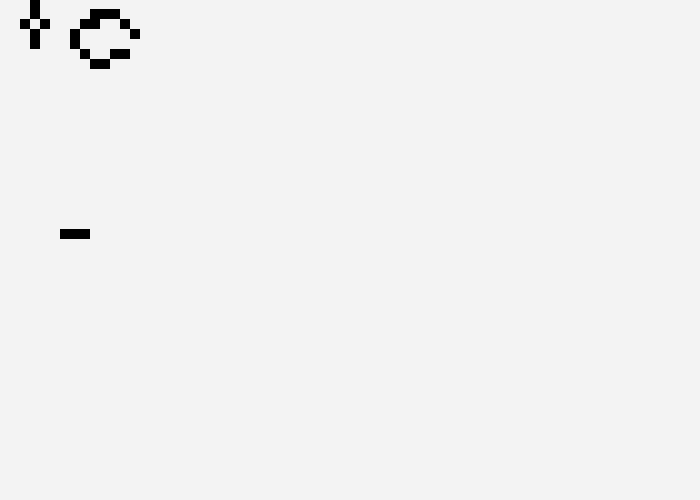
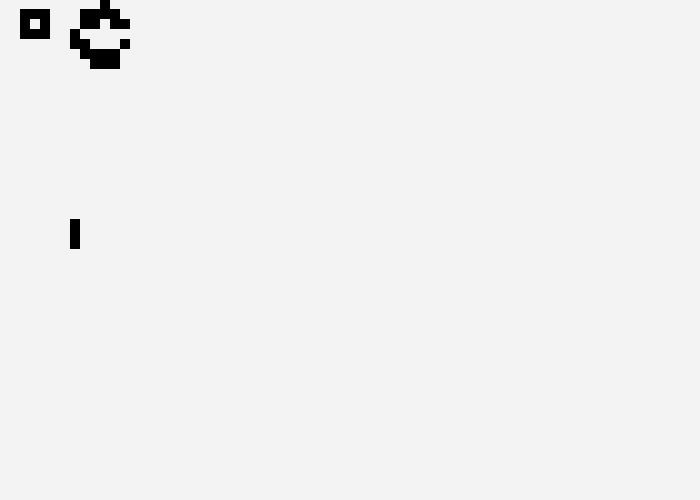
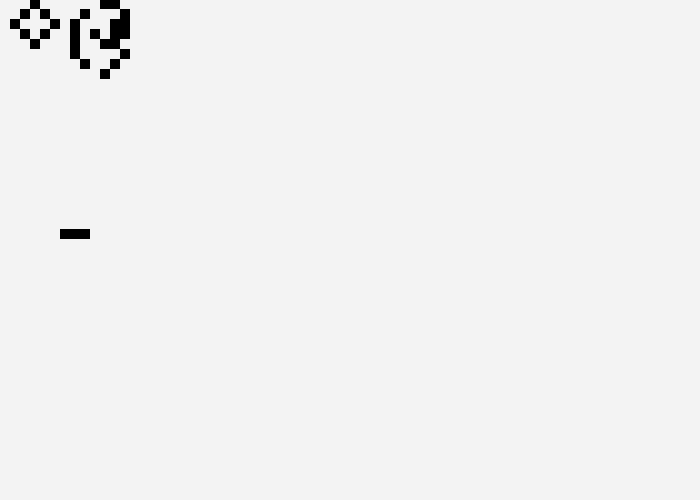
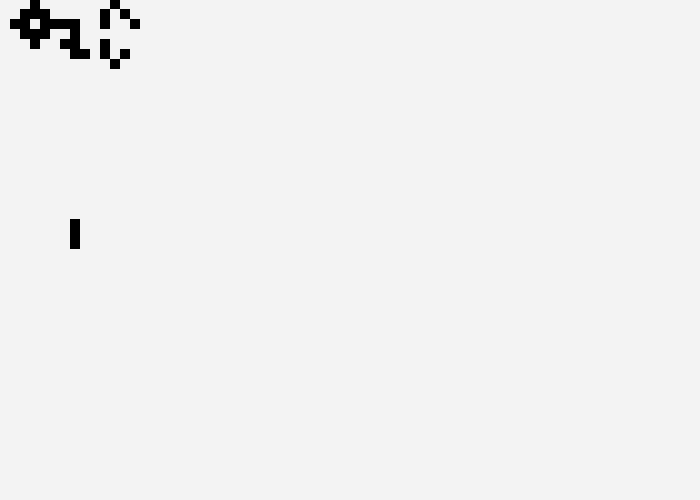
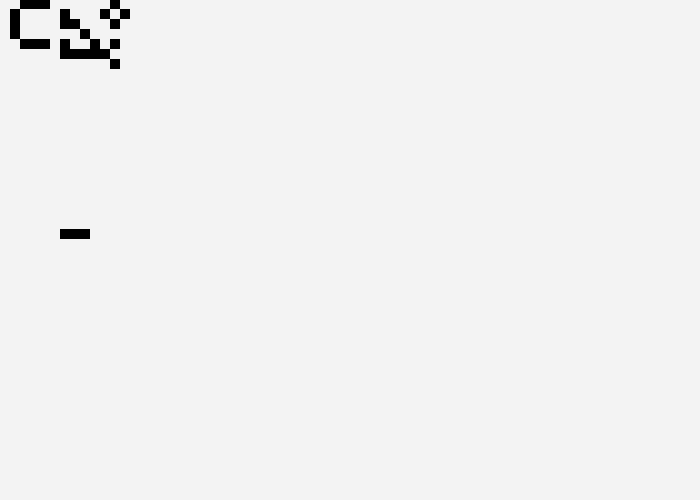
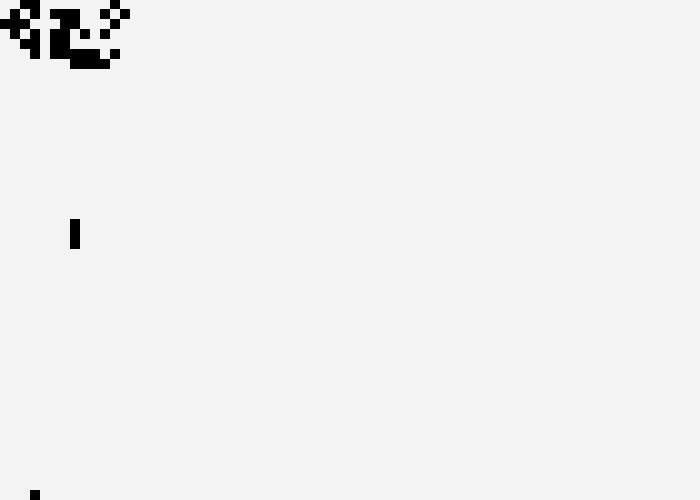
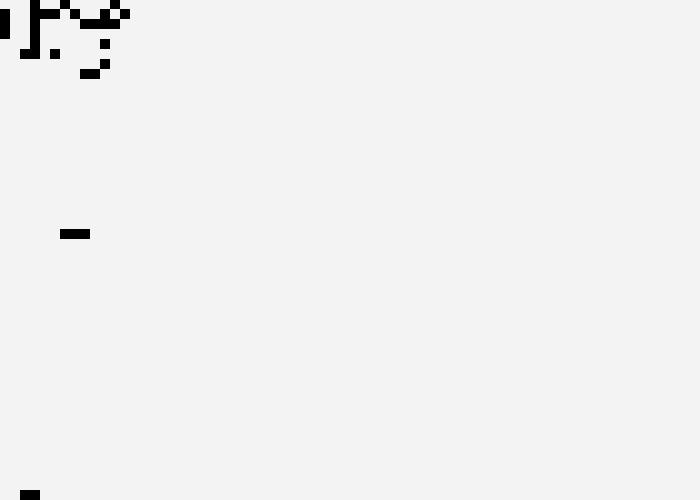
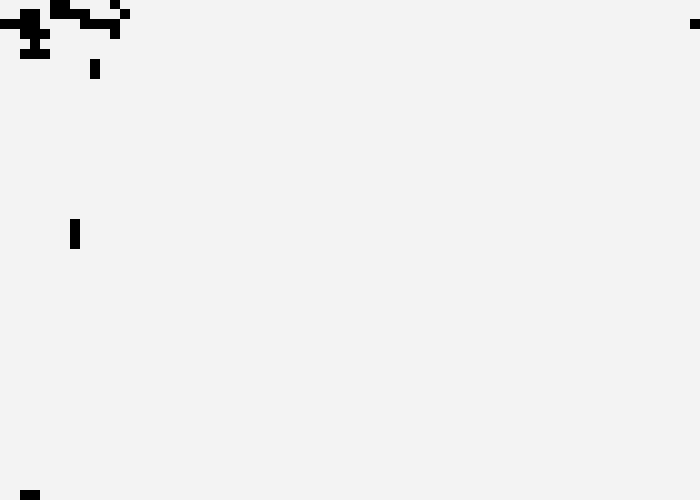
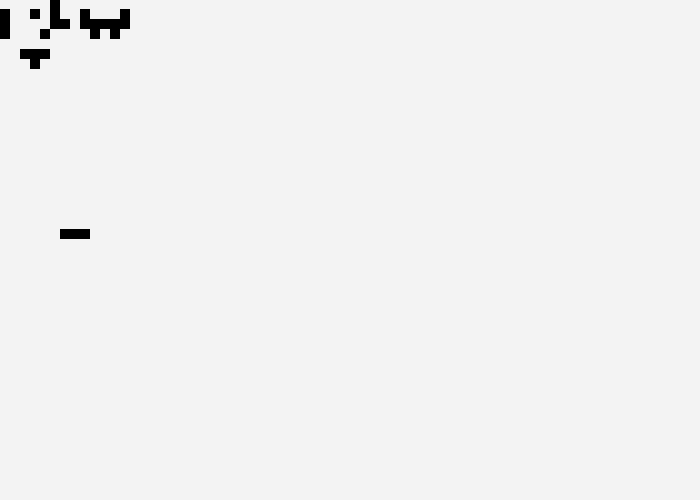

In [12]:
block_switch_engine = [[0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 1, 1],
                       [0, 0, 0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0, 0, 0]]
X = np.zeros((50, 70))
X[1:7,1:9] = block_switch_engine

life_animation(X, dpi=15, frames=250, interval=50, mode='once')

### Spaceship


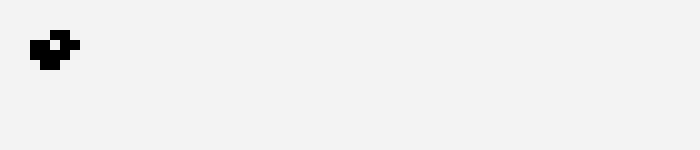
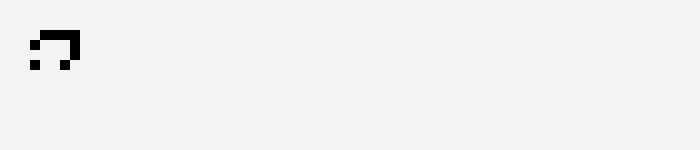
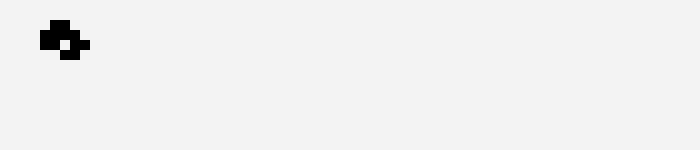
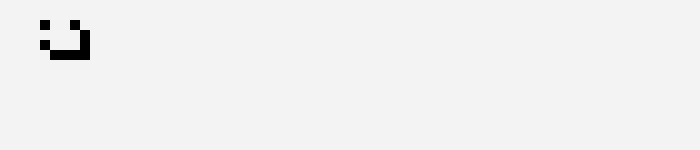
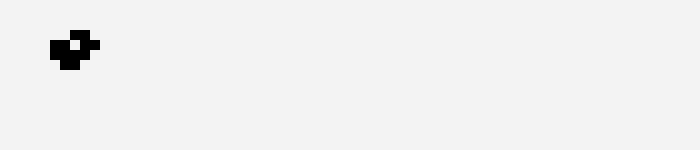
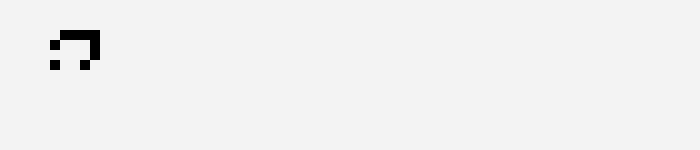
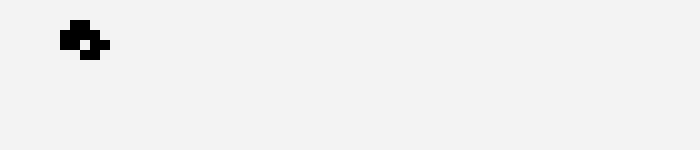
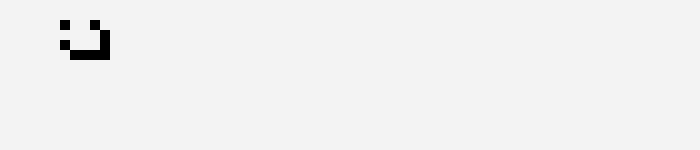
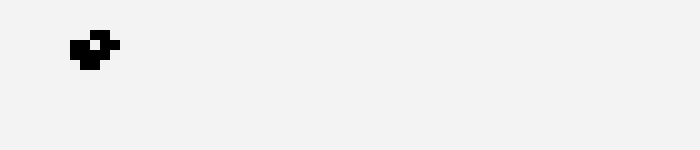
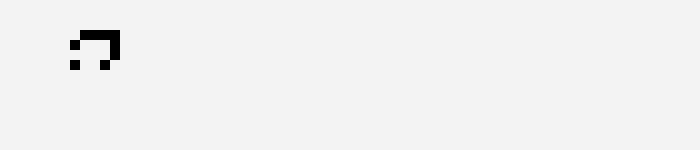
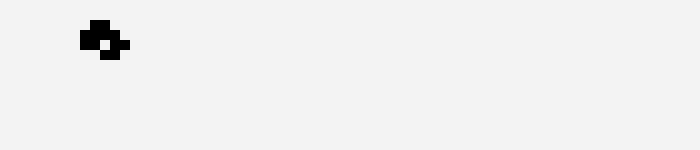
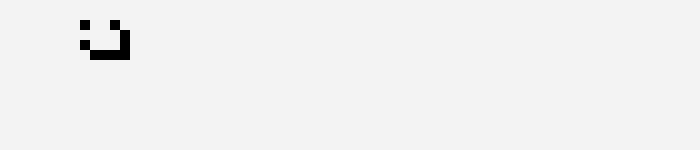
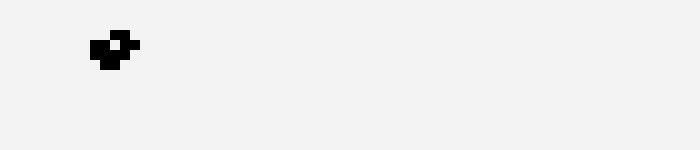
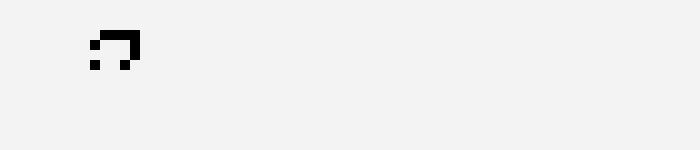
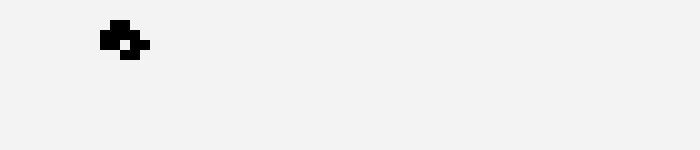
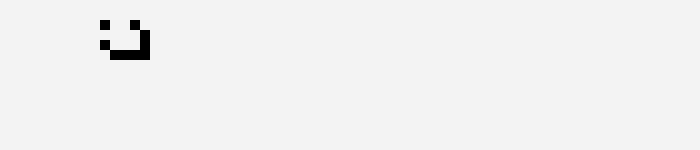
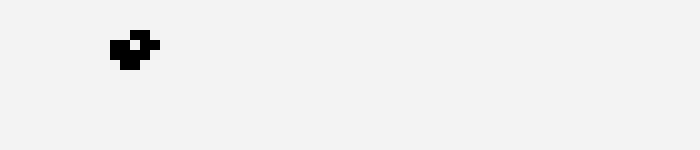
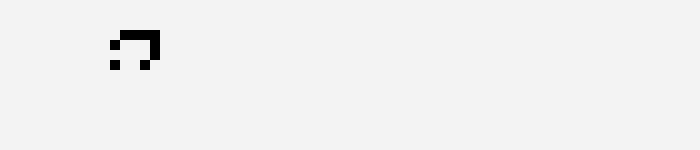
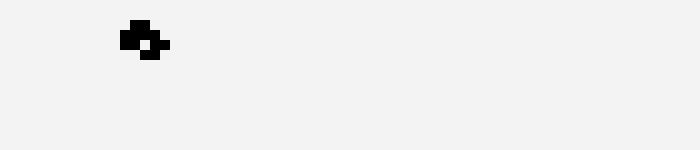
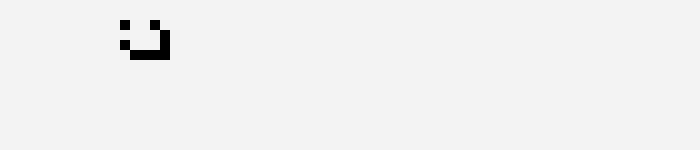
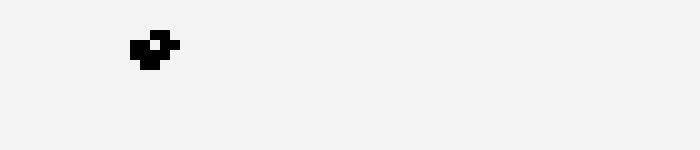
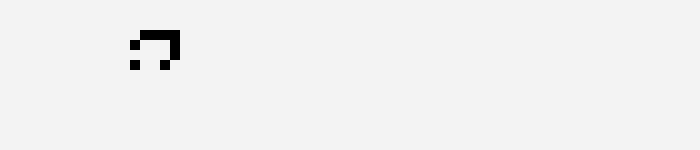
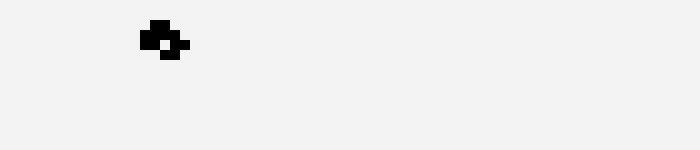
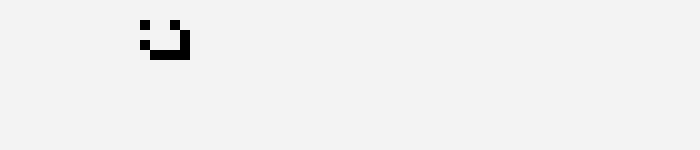
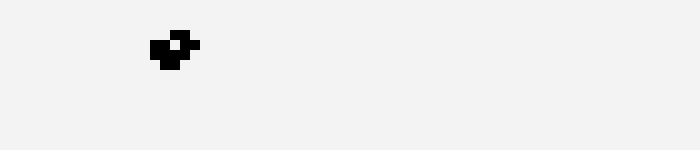
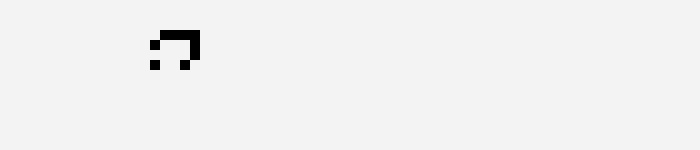
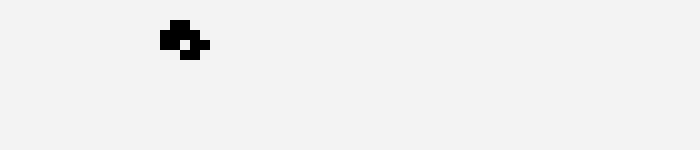
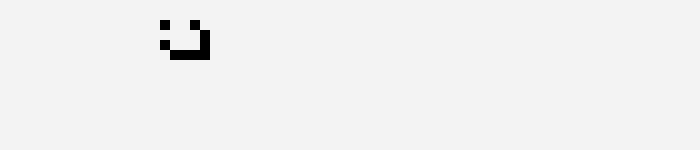
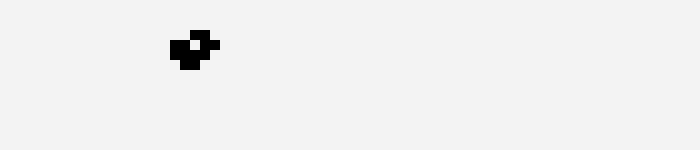
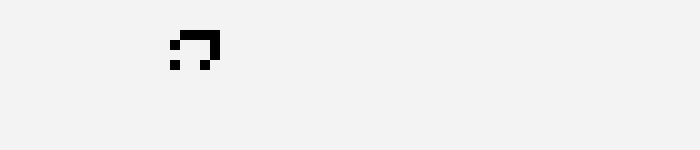
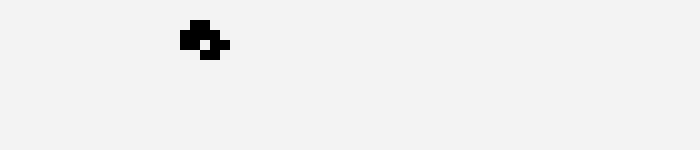
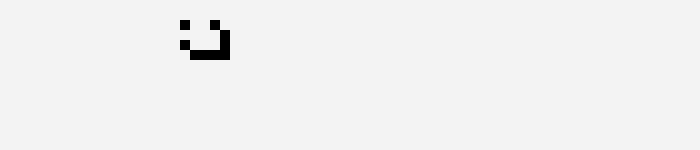
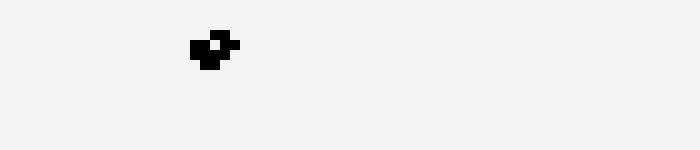
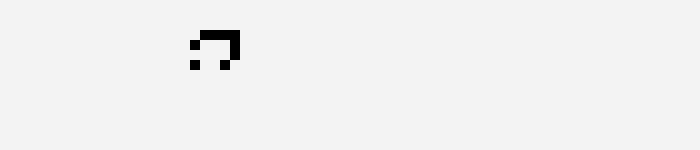
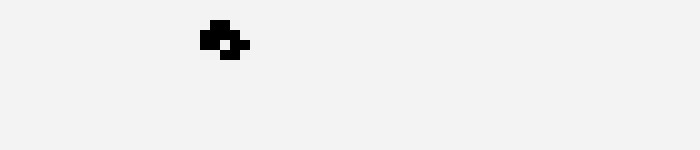
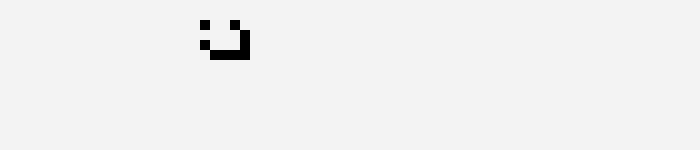
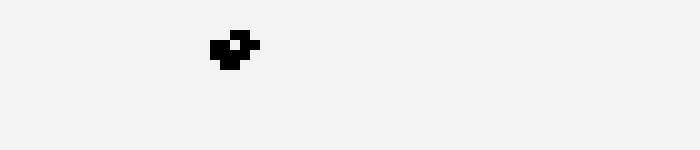
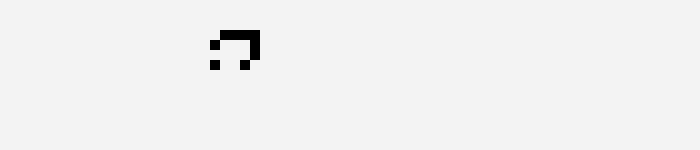
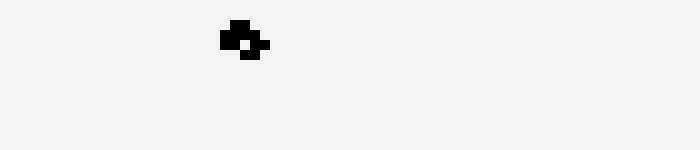
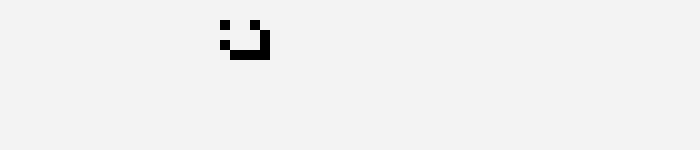
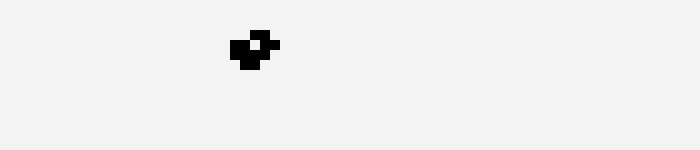
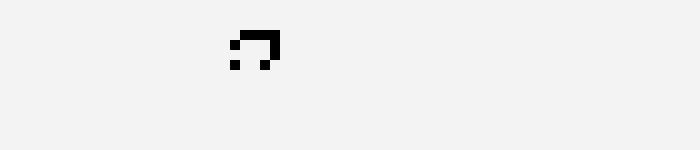
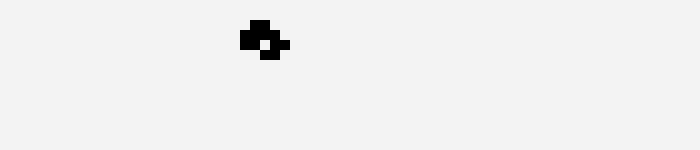
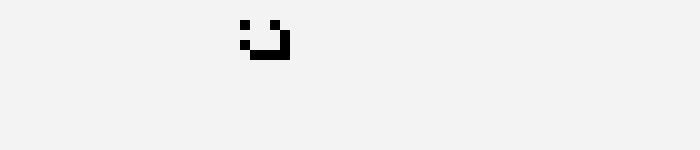
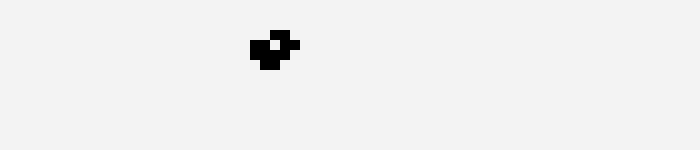
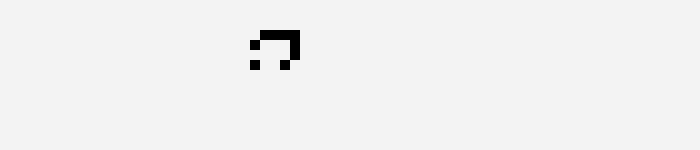
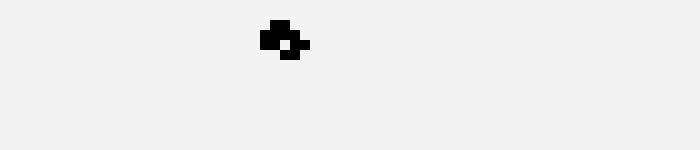
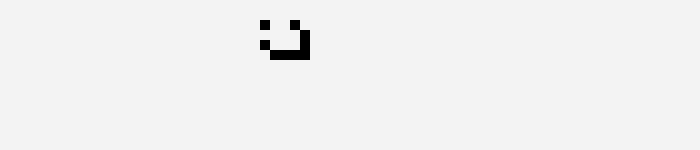
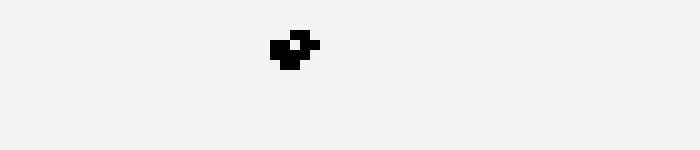
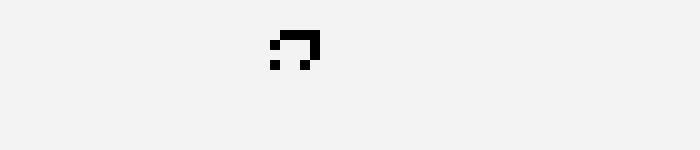
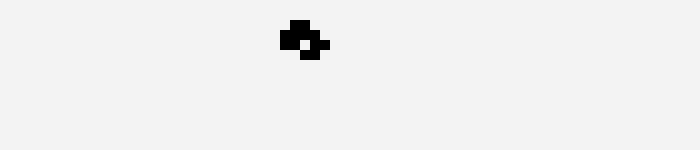
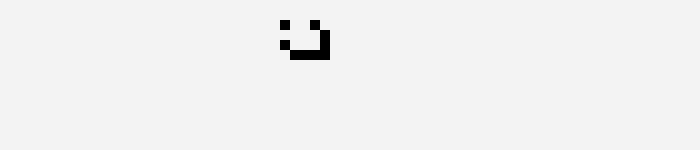
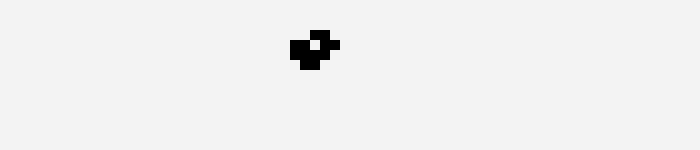
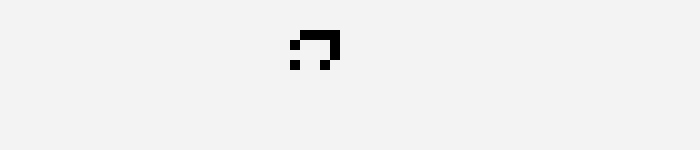
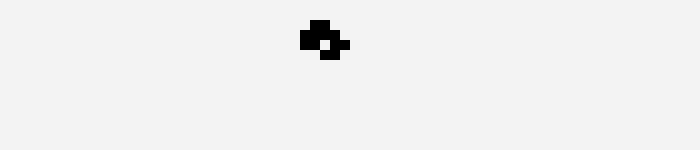
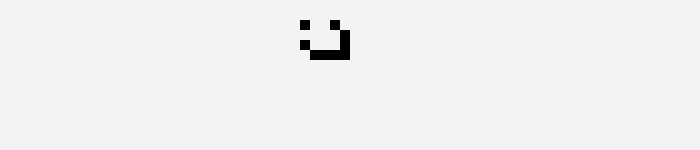
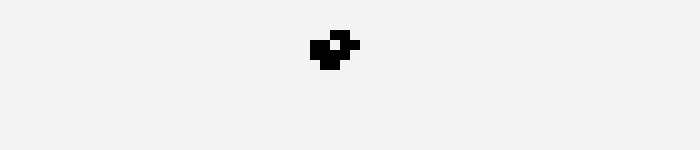
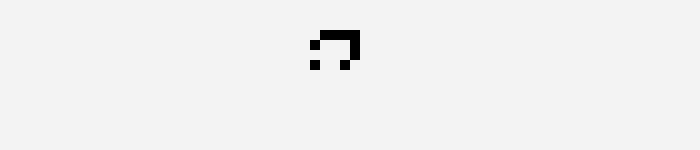
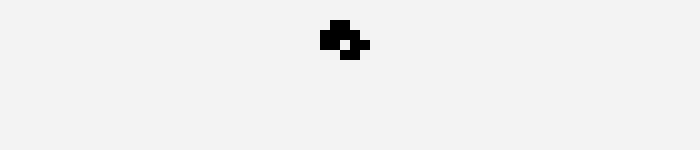
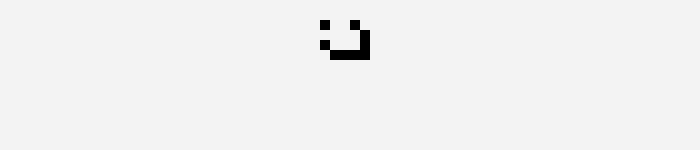
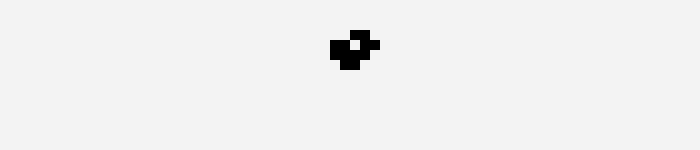
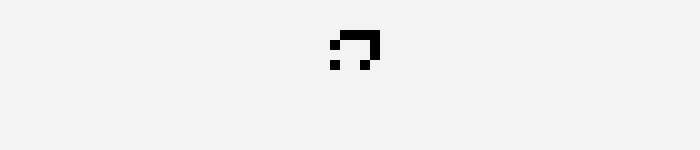
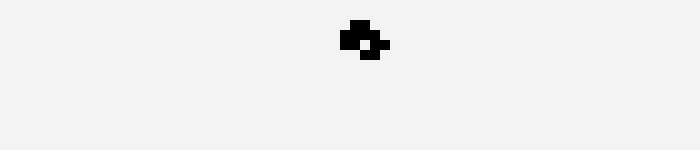
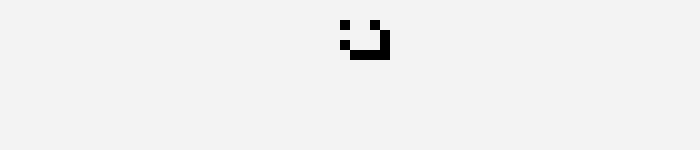
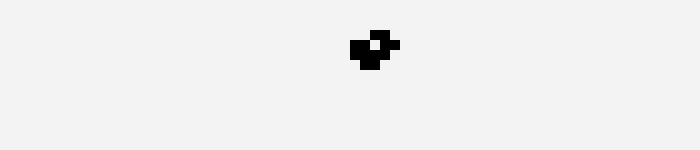
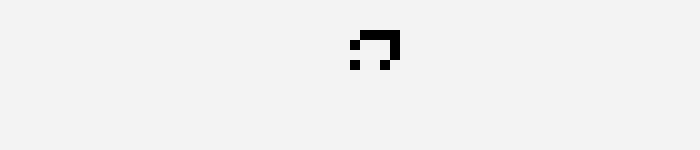
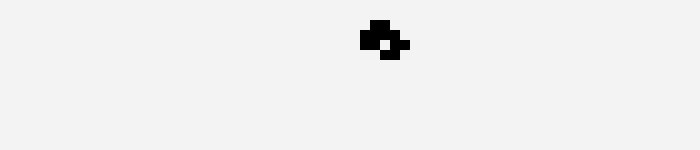
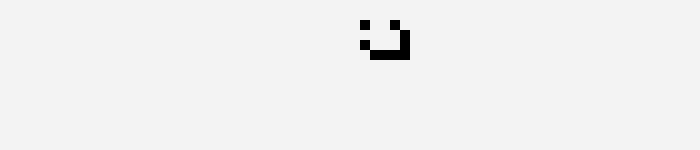
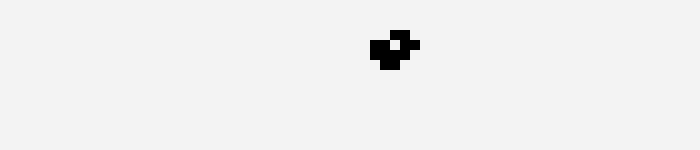
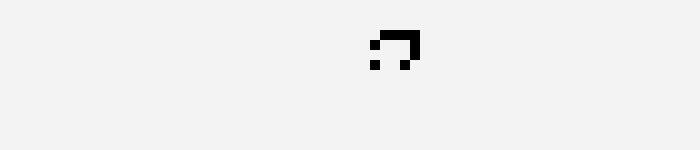
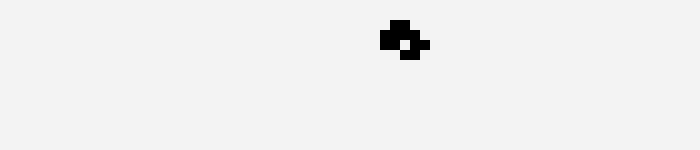
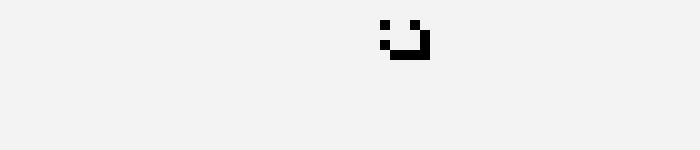
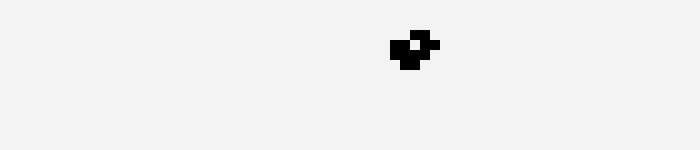
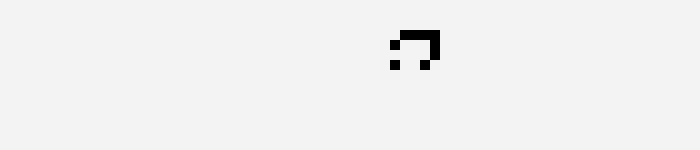
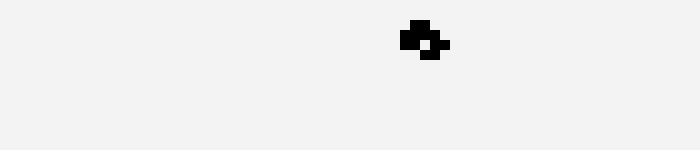
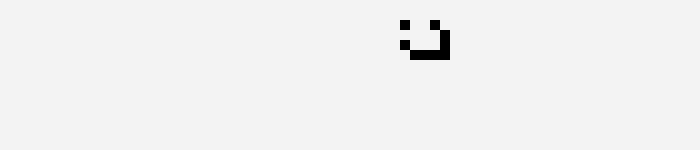
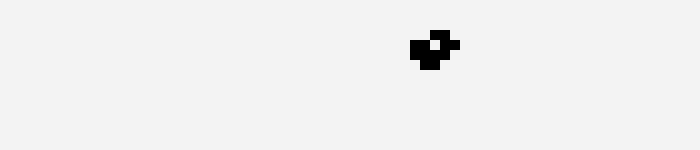
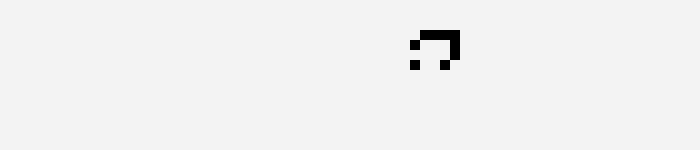
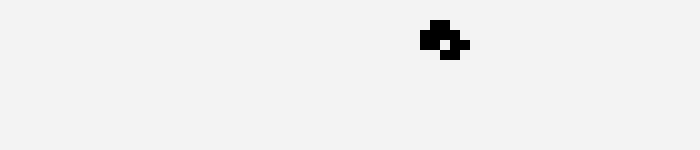
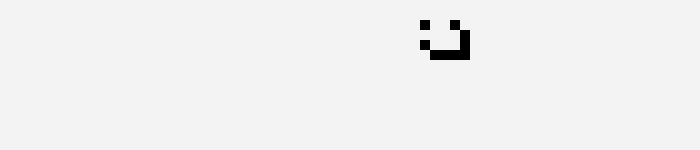
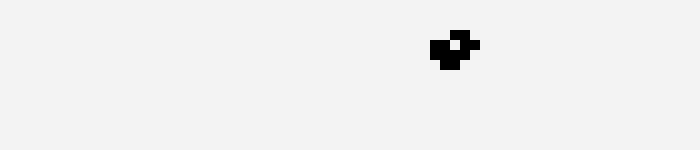
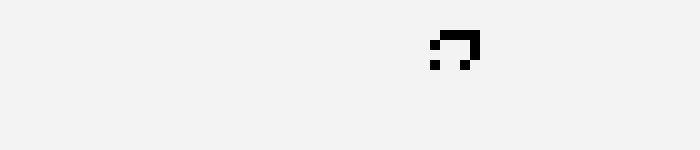
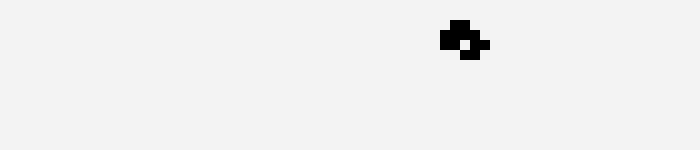
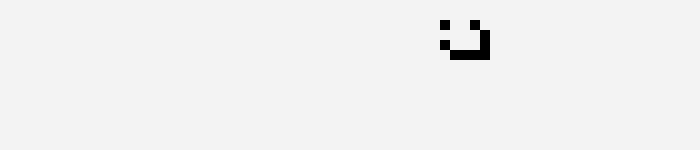
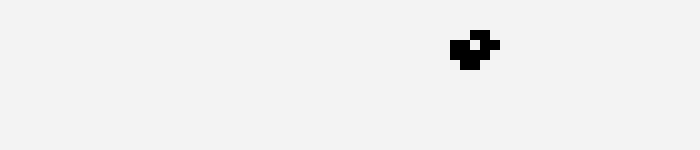
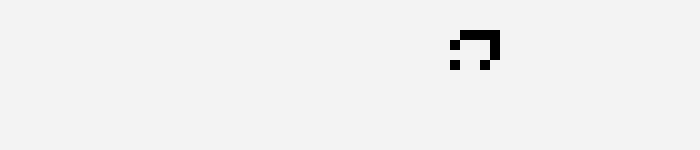
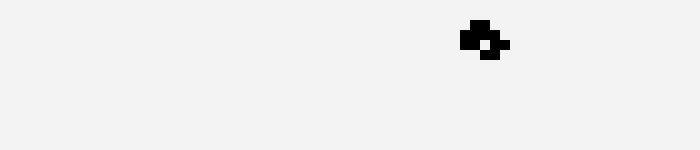
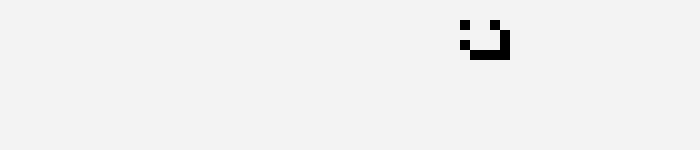
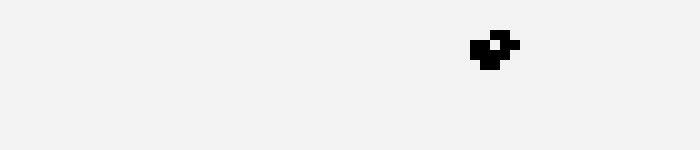
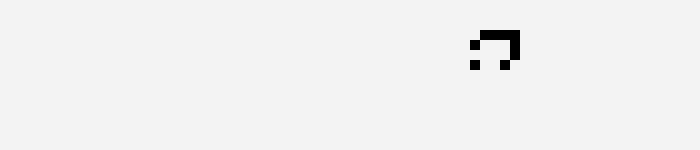
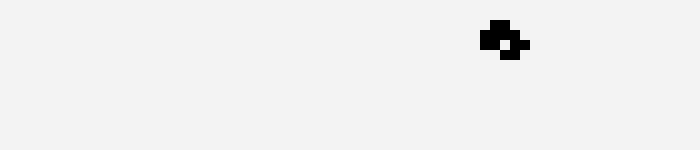
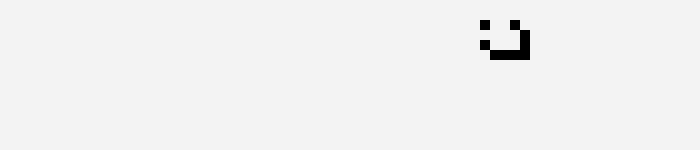
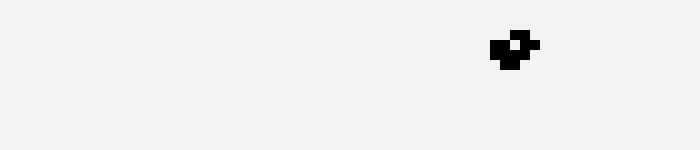
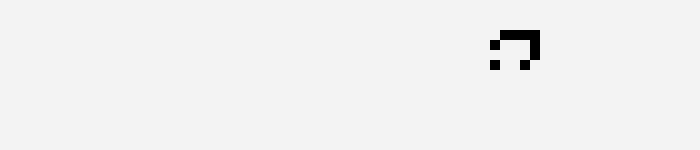
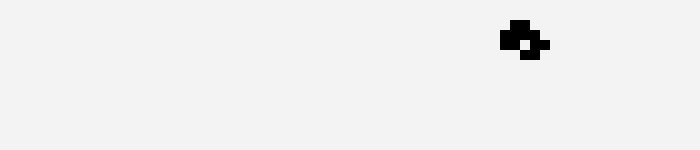
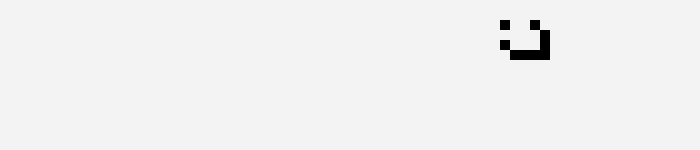
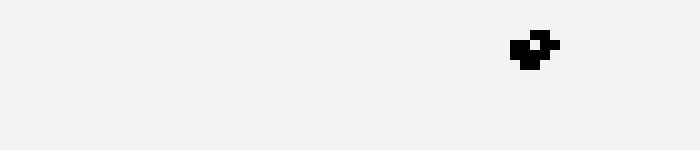
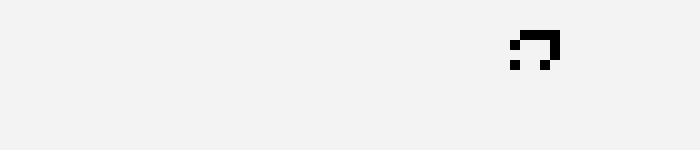
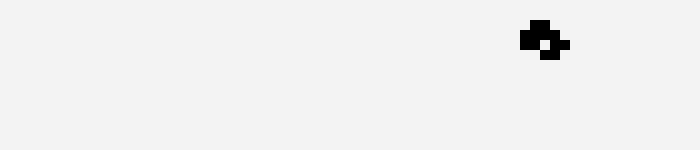
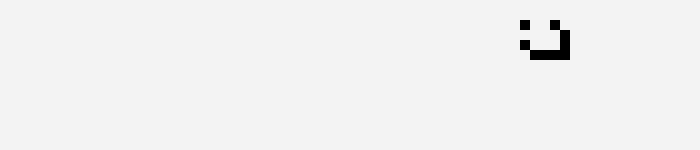

In [16]:
spaceship = [[0, 0, 1, 1, 0],
             [1, 1, 0, 1, 1],
             [1, 1, 1, 1, 0],
             [0, 1, 1, 0, 0]]
X = np.zeros((15, 70))
X[3:7,3:8] = spaceship
life_animation(X, dpi=15, frames=100, interval=50, mode='once')